# Big-Data-Final-Project-2023
## Chest X-Ray Images (Pneumonia)

The objective is to develop a neural network model, capable of detecting the presence of Pneumonia in X-ray radiographs of patients. For the development of this model the computer programs pySpark and BigDl are mainly used.

Authors:
- María José Rimón Martinez.
- Alfonso Ortigado López.

Kaggle competition link: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia 

# **INTRODUCTION**
From NIH topics https://www.nhlbi.nih.gov/health/pneumonia and https://www.radiologyinfo.org/en/info/pneumonia#:~:text=Chest%20x%2Dray%3A%20An%20x,infiltrates)%20that%20identify%20an%20infection.

Pneumonia is an infection that affects one or both lungs. It causes the air sacs, or alveoli, of the lungs to fill up with fluid or pus. Bacteria, viruses, or fungi may cause pneumonia.

One of the ways to detect pneumonia is by X-ray.
When interpreting the x-ray, the radiologist will look for white patches in the lungs (called infiltrates) that identify an infection. This test will also help determine if you have any pneumonia-related complications, such as abscesses or pleural effusions (fluid surrounding the lungs).

## Neuronal networks
In the following work we have been provided with a series of images corresponding to lung X-rays of both healthy patients and patients with viral or bacterial pneumonia.

The aim of this project is to design a computational model capable of learning from the images provided, in such a way that it is able to identify whether a future X-ray belongs to a healthy patient or a patient with pneumonia.

For this type of model we will use so-called "artificial neural networks". These are a method of artificial intelligence that teaches computers to process data in a way that is inspired by the way the human brain does. It is a type of machine learning process called deep learning, which uses interconnected nodes or neurons in a layered structure that resembles the human brain. It creates an adaptive system that computers use to learn from their mistakes and continuously improve.

## Convolution process
In order to design this model, we need to process the images in such a way that they are data we can work with.

In image processing, convolution is the process of transforming an image by applying a kernel to each pixel and its local neighbours throughout the image. The kernel is a matrix of values whose size and values determine the transformation effect of the convolution process.

The processing it performs is illustrated below

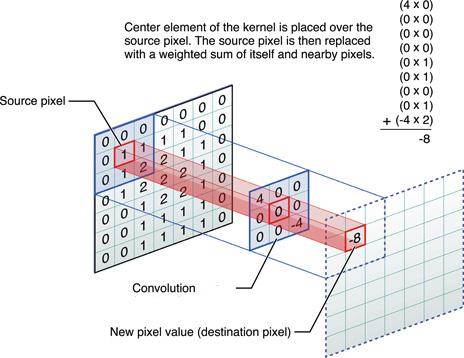


# **METHODOLOGY**
## BigDL and SPARK

We are asked to use Spark and BigDL. The latter is a distributed deep learning framework for Apache Spark and has a multitude of different libraries. To find out which is the best one to use, we visit the main page of the BigDL website, where we can see a diagram that shows us which library to use depending on the programme we are using.

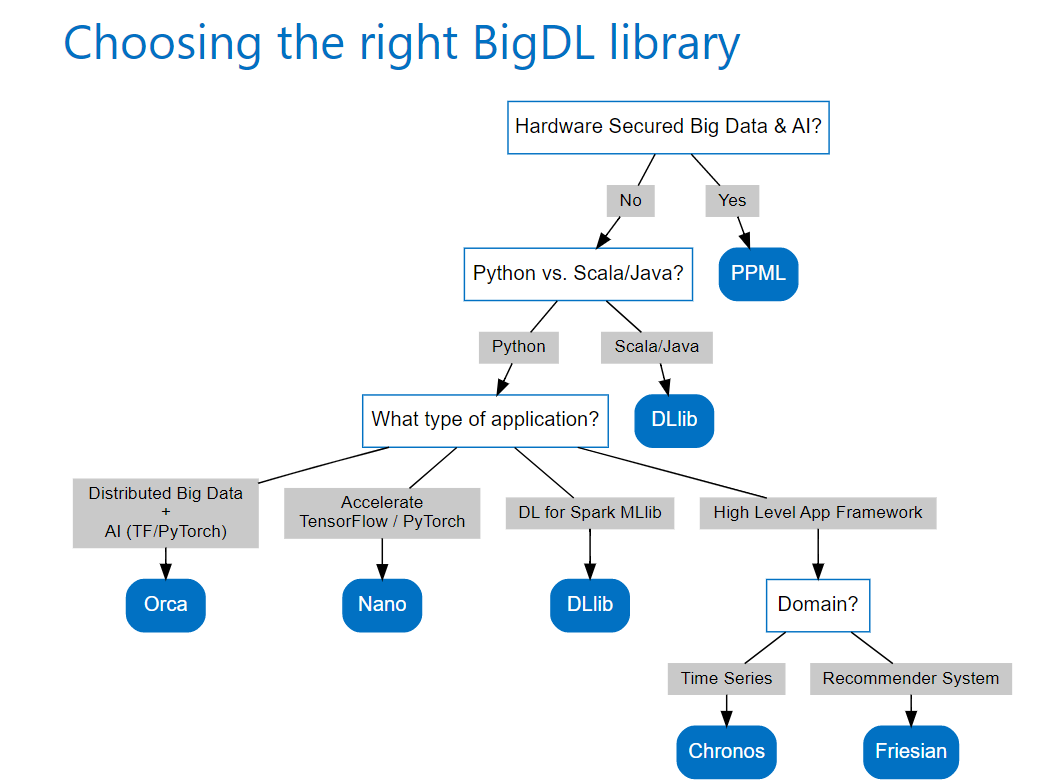

As we can see, the best option is the Dlib library.

## 1) What is pneumonia?

Pneumonia is an infection that inflames the air sacs of one or both lungs. The air sacs usually fill with purulent material (fluid or pus), which causes coughing up phlegm or pus, fevers, shortness of breath and chills. This disease is caused by pathogenic germs, the most common being bacteria and viruses present in the air we breathe. The body normally prevents these germs from escaping the immune system and infecting the lungs.
Pneumonia can be detected by the presence of purulent material in the lung by observing a grayish spot on a lung x-ray.



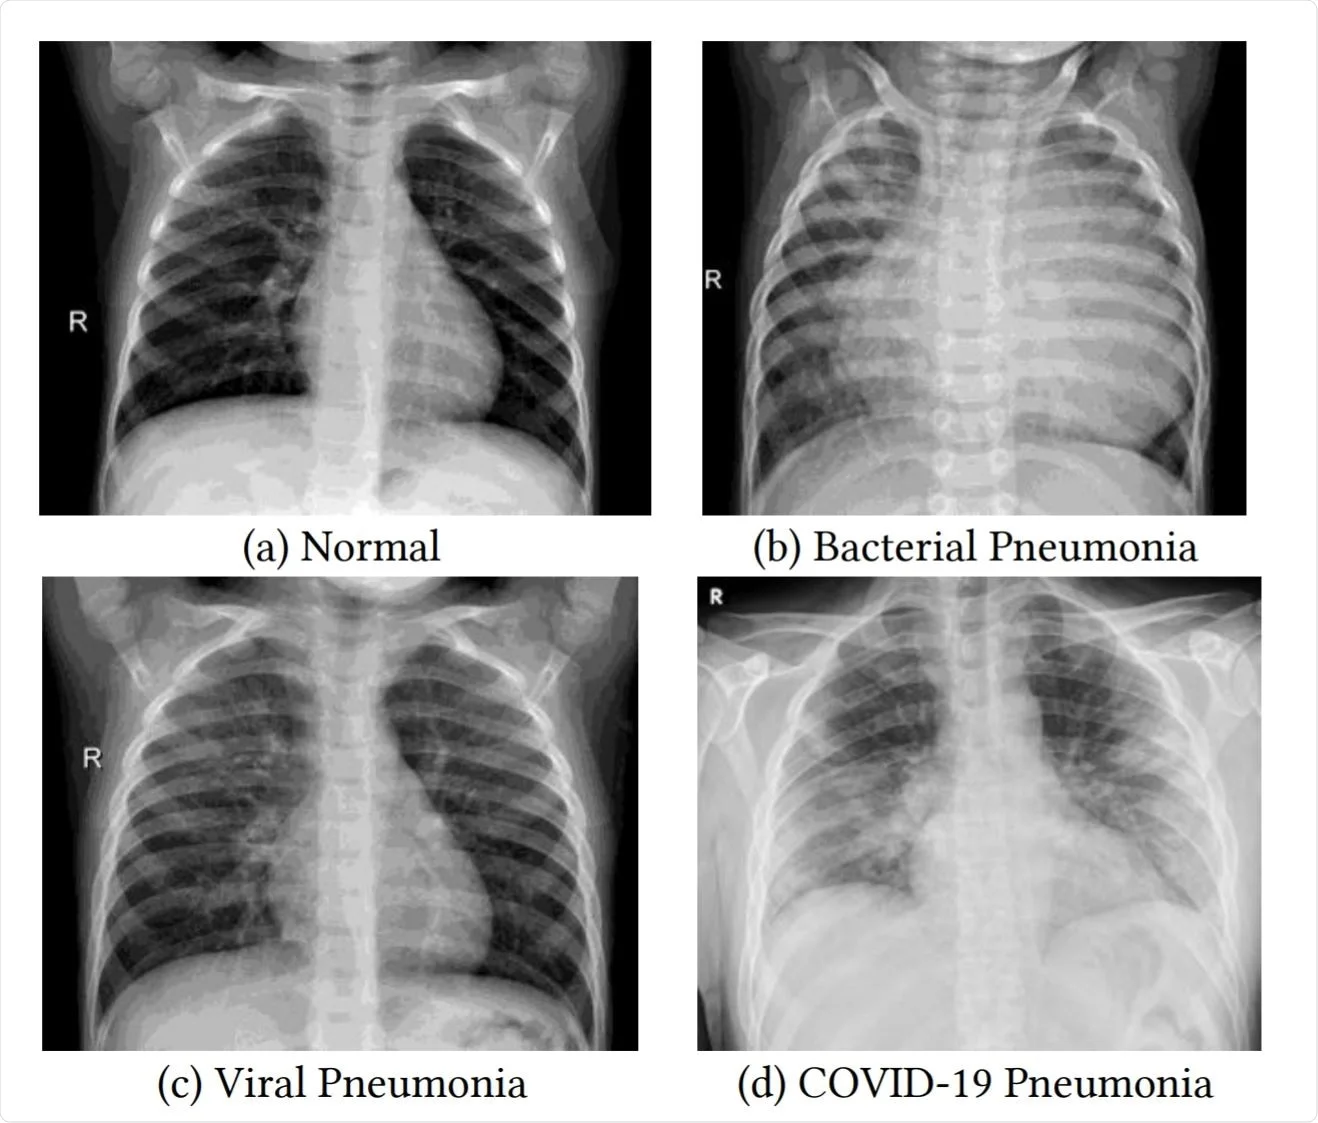

## 2) Installation of dependencies and libraries

All the data is in google drive (which are simply the image files)

In [1]:
import os

from bigdl.dllib.nn.criterion import CrossEntropyCriterion
from pyspark.ml import Pipeline
from pyspark.sql.functions import col, udf, lit, rand
from pyspark.sql.types import DoubleType, StringType

from bigdl.dllib.nncontext import *
from bigdl.dllib.feature.image import *
from bigdl.dllib.keras.layers import Dense, Input, Flatten
from bigdl.dllib.keras.models import *
from bigdl.dllib.net import *
from bigdl.dllib.nnframes import *
from optparse import OptionParser

In [2]:
appname = "pneumoPred"

Here we are going to get a neural network that has already been created on a packet of images, which it has learned to classify. It is made to classify and distinguish many features of this packet of images on which it is built.

In [3]:
#This has been done in terminal and buchsize of 4 because the memory of the computer did not allow to do it from colab.  
model_path = '/home/ubuntu/mariajose/master/bigdata/bigdlModels/bigdl_inception-v1_imagenet_0.9.0.model'
#model_path = '/home/ubuntu/mariajose/master/bigdata/bigdlModels/resnet18-5c106cde.pth'

spark_conf = SparkConf().set("spark.driver.memory", "5g") \
        .set("spark.driver.cores", 1)
        

In [4]:
ZooContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

sc = init_nncontext(spark_conf, cluster_mode="local")


Current pyspark location is : /home/ubuntu/miniconda3/envs/bigdata/lib/python3.10/site-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /home/ubuntu/miniconda3/envs/bigdata/lib/python3.10/site-packages/bigdl/share/friesian/lib/bigdl-friesian-spark_3.1.3-2.2.0-jar-with-dependencies.jar:/home/ubuntu/miniconda3/envs/bigdata/lib/python3.10/site-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_3.1.3-2.2.0-jar-with-dependencies.jar:/home/ubuntu/miniconda3/envs/bigdata/lib/python3.10/site-packages/bigdl/share/core/lib/all-2.2.0.jar:/home/ubuntu/miniconda3/envs/bigdata/lib/python3.10/site-packages/bigdl/share/orca/lib/bigdl-orca-spark_3.1.3-2.2.0-jar-with-dependencies.jar pyspark-shell 


2023-02-07 16:42:52 WARN  Utils:69 - Your hostname, ubuntu resolves to a loopback address: 127.0.1.1; using 192.168.1.46 instead (on interface wlo1)
2023-02-07 16:42:52 WARN  Utils:69 - Set SPARK_LOCAL_IP if you need to bind to another address


2023-02-07 16:42:53 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2023-02-07 16:42:59,974 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2023-02-07 16:42:59,977 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2023-02-07 16:42:59,978 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2023-02-07 16:42:59,979 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
23-02-07 16:42:59 [Thread-3] INFO  Engine$:122 - Auto detect executor number and executor cores number
23-02-07 16:43:00 [Thread-3] INFO  Engine$:124 - Executor number is 1 and executor cores number is 2
23-02-07 16:43:00 [Thread-3] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 17
2023-02-07 16:43:00 WARN  SparkContext:69 - Using an existing SparkContext; some configuration may not take effect.
23-02-07 16:43:00 [Thread-3] INFO  Engine$:461 - Find existing spark context. Checking the spark conf...
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.Sample
BigDLBasePickler registe


User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_MONOTONIC_DYNAMIC_SCHEDULE=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HIDDEN_HELPER_AFFINITY='noverbose,warnings,granularity=core,none'
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_

## 3) Import and pre-process the data

We define a function that takes the neural network mentioned above and we remove the part of it that does not interest us, that is, the final part of the classification, the part that takes the characteristics of the image packet on which it is created. Moreover, we "freeze" the process until this part, since the network is very precise and fine-tuned. Later we add the input and specify that the shape of the image is 224 x 224 pixels and that it has three channels, simply because that is how the neural network works, it is designed that way.

In [5]:
def get_model(model_path, label_length=2, graphlayer="pool5/drop_7x7_s1"):
    full_model = Net.load_bigdl(model_path)
    # create a new model by remove layers after pool5/drop_7x7_s1
    model = full_model.new_graph([graphlayer])
    # freeze layers from input to pool4/3x3_s2 inclusive
    model.freeze_up_to(["pool4/3x3_s2"])

    inputNode = Input(name="input", shape=(3, 224, 224))
    inception = model.to_keras()(inputNode)
    flatten = Flatten()(inception)
    logits = Dense(label_length)(flatten)

    lrModel = Model(inputNode, logits)
    return lrModel


In [6]:
lrModel = get_model(model_path)

creating: createZooKerasInput
creating: createZooKerasFlatten
creating: createZooKerasDense
creating: createZooKerasModel


In [7]:
trainSet = 'train'
testSet = 'test'
valSet = 'val'
dirPath = "/home/ubuntu/mariajose/master/bigdata/chest_xray/"


The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order.

In [8]:
import glob
nfnormal=[]
nfpneumonia=[]

nfnormal.append(len(glob.glob(os.path.join(dirPath, trainSet, 'NORMAL', '*.jp*'))))
nfpneumonia.append(len(glob.glob(os.path.join(dirPath, trainSet, 'PNEUMONIA', '*.jp*'))))
nfnormal.append(len(glob.glob(os.path.join(dirPath, testSet, 'NORMAL', '*.jp*'))))
nfpneumonia.append(len(glob.glob(os.path.join(dirPath, testSet, 'PNEUMONIA', '*.jp*'))))
nfnormal.append(len(glob.glob(os.path.join(dirPath, valSet, 'NORMAL', '*.jp*'))))
nfpneumonia.append(len(glob.glob(os.path.join(dirPath, valSet, 'PNEUMONIA', '*.jp*'))))
for i, iSet in enumerate([trainSet, testSet, valSet]):
    print(f'{iSet}set, {nfnormal[i]} normal xrays, {nfpneumonia[i]} pneumonia xrays, TOTAL: {nfnormal[i] + nfpneumonia[i]}')
  

trainset, 1341 normal xrays, 3875 pneumonia xrays, TOTAL: 5216
testset, 234 normal xrays, 390 pneumonia xrays, TOTAL: 624
valset, 8 normal xrays, 8 pneumonia xrays, TOTAL: 16


In [9]:
from pyspark.sql.functions import lit, col, udf, rand
from pyspark.sql.types import DoubleType, StringType

# For the tests we use the directory val

getName = udf(lambda row: os.path.basename(row[0]), StringType())
#getLabel = udf(lambda name: 2.0 if name.find('bacteria') > 0 else (3.0 if name.find('virus') > 0 else 1.0), DoubleType())

def loadDF(path):
    imgNormalPath = f"{path}/NORMAL/"
    imgPneumoniaPath = f"{path}/PNEUMONIA/"
    normalDF = NNImageReader.readImages(imgNormalPath, sc, resizeH=300, resizeW=300,
                                          image_codec=1).withColumn("label", lit(1.0))
    pneumoniaDF = NNImageReader.readImages(imgPneumoniaPath, sc, resizeH=300, resizeW=300,
                                          image_codec=1).withColumn("label", lit(2.0))
    return normalDF.union(pneumoniaDF).withColumn('name', getName(col('image')))

trainDF = loadDF(dirPath + trainSet)
testDF  = loadDF(dirPath + testSet)
valDF   = loadDF(dirPath + valSet)



valDF.count()


In [10]:
from pyspark import StorageLevel

#trainingDF = trainDF
validationDF = valDF

# It would be ideal to randomly unsort the data, but we don't have enough memory to do so.
# We may lose some predictability

trainingDF = trainDF.orderBy(rand())
#validationDF = validationDF.orderBy(rand())

#trainingDF = trainingDF.persist(StorageLevel.DISK_ONLY)


In [11]:
from bigdl.dllib.optim.optimizer import SGD, SequentialSchedule, Warmup, Poly,\
    Plateau, EveryEpoch, TrainSummary,\
    ValidationSummary, SeveralIteration, Step, L2Regularizer


train_summary = TrainSummary(log_dir="xray_save_summary", app_name=appname)
#val_summary = ValidationSummary(log_dir="xray_save_summary", app_name=appname)
train_summary.set_summary_trigger("LearningRate", SeveralIteration(50))
train_summary.set_summary_trigger("Loss", SeveralIteration(50))

creating: createTrainSummary
creating: createSeveralIteration
creating: createSeveralIteration


JavaObject id=o161

**Processing chain:**

To work the images, when Spark loads an image it loads a single column and this internally has 5 variables, the name (path), width, height, number of channels and format. For this preprocessing chain, we first extract the image from each column, the data we are interested in, then we resize it to 256 256 256 and then we crop 224, 224 and define three channels, for the reasons explained above. Finally it generates the "signature" (zeros and ones) with the tensors.   

In [12]:
# compose a pipeline that includes feature transform, pretrained model and Logistic Regression
transformer = ChainedPreprocessing(
    [RowToImageFeature(), ImageResize(256, 256), ImageCenterCrop(224, 224),
     ImageChannelNormalize(123.0, 117.0, 104.0), ImageMatToTensor(), ImageFeatureToTensor()])


creating: createRowToImageFeature
creating: createImageResize
creating: createImageCenterCrop
creating: createImageChannelNormalize
creating: createImageMatToTensor
creating: createImageFeatureToTensor
creating: createChainedPreprocessing



#preTrainedNNModel = NNModel(Model.loadModel(model_path), transformer) \
preTrainedNNModel = NNModel(gm, transformer) \
    .setFeaturesCol("image") \
    .setPredictionCol("embedding")

lrModel = Sequential().add(Linear(1000, 2)).add(LogSoftMax())

Here, the classifier makes the model learn, classify images. 

These images are now passed through the neural network but first it processes them, with a learning rate of 0.002, the records it will work with are 4 and finally it specifies 2 processes. Then we say in which column we want to save everything (image).

In [13]:

%%time
batch_size=4
learning_rate=0.002 # 0.002
nb_epoch=2

#classifier = NNClassifier(lrModel, ClassNLLCriterion(), SeqToTensor([1000])) \
classifier = NNClassifier(lrModel, CrossEntropyCriterion(), transformer) \
    .setLearningRate(learning_rate) \
    .setBatchSize(batch_size) \
    .setMaxEpoch(nb_epoch) \
    .setFeaturesCol("image") \
    .setCachingSample(False) \
    .setTrainSummary(train_summary) \


#    .setFeaturesCol("embedding") \

pipeline = Pipeline(stages=[classifier])
#pipeline = Pipeline(stages=[preTrainedNNModel, classifier])
#pipeline = Pipeline(stages=[preTrainedNNModel])



creating: createCrossEntropyCriterion
creating: createScalarToTensor
creating: createFeatureLabelPreprocessing
creating: createNNClassifier
CPU times: user 126 ms, sys: 32.5 ms, total: 159 ms
Wall time: 155 ms


Data fitting. It is now that our model learns

In [14]:
%%time
#xRayChestModel = classifier.fit(trainingDF)
xRayChestModel = pipeline.fit(trainingDF)

####################

23-02-07 16:51:50 [Thread-3] INFO  InternalDistriOptimizer$:1009 - Model[e6344ce8] isTorch is false
23-02-07 16:51:51 [Thread-3] INFO  DistriOptimizer$:830 - caching training rdd ...


23-02-07 16:59:16 [Thread-3] INFO  DistriOptimizer$:655 - Cache thread models...
23-02-07 16:59:16 [Executor task launch worker for task 0.0 in stage 6.0 (TID 221)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 10519
23-02-07 16:59:16 [Executor task launch worker for task 0.0 in stage 6.0 (TID 221)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 10519
23-02-07 16:59:16 [Executor task launch worker for task 0.0 in stage 6.0 (TID 221)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 10519
23-02-07 16:59:16 [Executor task launch worker for task 0.0 in stage 6.0 (TID 221)] INFO  DistriOptimizer$:638 - model thread pool size is 1
2023-02-07 16:59:17 WARN  BlockManager:69 - Asked to remove block test_0weights0, which does not exist
2023-02-07 16:59:17 WARN  BlockManager:69 - Asked to remove block test_0gradients0, which does not exist
23-02-07 16:59:17 [Thread-3] INFO  DistriOptimizer$:657 - Cache thread models... done
23-02-07 16:59:17 [Thread-3] INFO  DistriOptimizer$:

23-02-07 16:59:34 [Thread-3] INFO  DistriOptimizer$:167 - Count dataset complete. Time elapsed: 17.184097288s
23-02-07 16:59:34 [Thread-3] INFO  DistriOptimizer$:175 - config  {
	learningRate: 0.002
	computeThresholdbatchSize: 100
	maxDropPercentage: 0.0
	warmupIterationNum: 200
	isLayerwiseScaled: true
	dropPercentage: 0.0
 }
23-02-07 16:59:34 [Thread-3] INFO  DistriOptimizer$:179 - Shuffle data
23-02-07 16:59:34 [Thread-3] INFO  DistriOptimizer$:182 - Shuffle data complete. Takes 0.044379051s


23-02-07 16:59:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4/5216][Iteration 1][Wall Clock 4.09338266s] Trained 4.0 records in 4.09338266 seconds. Throughput is 0.97718686 records/second. Loss is 1.4811375. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 16:59:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 8/5216][Iteration 2][Wall Clock 5.102465502s] Trained 4.0 records in 1.009082842 seconds. Throughput is 3.963996 records/second. Loss is 1.7014673. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 16:59:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 12/5216][Iteration 3][Wall Clock 6.131737015s] Trained 4.0 records in 1.029271513 seconds. Throughput is 3.8862438 records/second. Loss is 0.35641733. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 16:59:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 16/5216][Iteration 4][Wall Clock 7.14047698s] Trained 4.0 records in 1.008739965 seconds. Throughput is 3.965343 records/second. Loss is 0.1748492. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 16:59:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 20/5216][Iteration 5][Wall Clock 8.152311447s] Trained 4.0 records in 1.011834467 seconds. Throughput is 3.9532156 records/second. Loss is 0.536584. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 16:59:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 24/5216][Iteration 6][Wall Clock 9.11211077s] Trained 4.0 records in 0.959799323 seconds. Throughput is 4.1675377 records/second. Loss is 0.3462993. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 16:59:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 28/5216][Iteration 7][Wall Clock 10.053733277s] Trained 4.0 records in 0.941622507 seconds. Throughput is 4.247987 records/second. Loss is 0.15392116. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 16:59:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 32/5216][Iteration 8][Wall Clock 10.996573842s] Trained 4.0 records in 0.942840565 seconds. Throughput is 4.242499 records/second. Loss is 1.8396931. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 16:59:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 36/5216][Iteration 9][Wall Clock 11.992462661s] Trained 4.0 records in 0.995888819 seconds. Throughput is 4.0165124 records/second. Loss is 1.6858518. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 16:59:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 40/5216][Iteration 10][Wall Clock 12.935388222s] Trained 4.0 records in 0.942925561 seconds. Throughput is 4.2421165 records/second. Loss is 1.1118788. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 16:59:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 44/5216][Iteration 11][Wall Clock 13.84698093s] Trained 4.0 records in 0.911592708 seconds. Throughput is 4.3879247 records/second. Loss is 1.1808622. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 48/5216][Iteration 12][Wall Clock 26.008977015s] Trained 4.0 records in 12.161996085 seconds. Throughput is 0.3288934 records/second. Loss is 0.16435689. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 52/5216][Iteration 13][Wall Clock 26.932520808s] Trained 4.0 records in 0.923543793 seconds. Throughput is 4.3311424 records/second. Loss is 0.48422465. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 56/5216][Iteration 14][Wall Clock 27.902250697s] Trained 4.0 records in 0.969729889 seconds. Throughput is 4.12486 records/second. Loss is 0.4845778. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 60/5216][Iteration 15][Wall Clock 28.822574777s] Trained 4.0 records in 0.92032408 seconds. Throughput is 4.346295 records/second. Loss is 0.089270994. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


2023-02-07 16:42:59.995 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.utils.Engine$ - Auto detect executor number and executor cores number
2023-02-07 16:43:00.001 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.utils.Engine$ - Executor number is 1 and executor cores number is 2
2023-02-07 16:43:00.758 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.utils.ThreadPool$ - Set mkl threads to 1 on thread 17
2023-02-07 16:43:00.772 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.utils.Engine$ - Find existing spark context. Checking the spark conf...
2023-02-07 16:51:50.911 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.keras.models.InternalDistriOptimizer$ - Model[e6344ce8] isTorch is false
2023-02-07 16:51:51.077 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - caching training rdd ...
2023-02-07 16:59:16.503 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - Cache thread models...
2023-02-07 16:59:16.641 [Executor task launch worker f

23-02-07 17:00:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 68/5216][Iteration 17][Wall Clock 30.666973428s] Trained 4.0 records in 0.882377153 seconds. Throughput is 4.533209 records/second. Loss is 0.66387993. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 72/5216][Iteration 18][Wall Clock 31.580039253s] Trained 4.0 records in 0.913065825 seconds. Throughput is 4.380845 records/second. Loss is 0.9792793. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 76/5216][Iteration 19][Wall Clock 32.472421456s] Trained 4.0 records in 0.892382203 seconds. Throughput is 4.482384 records/second. Loss is 0.26706046. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 80/5216][Iteration 20][Wall Clock 33.502080019s] Trained 4.0 records in 1.029658563 seconds. Throughput is 3.884783 records/second. Loss is 0.07897278. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 84/5216][Iteration 21][Wall Clock 34.466043536s] Trained 4.0 records in 0.963963517 seconds. Throughput is 4.1495347 records/second. Loss is 0.9677289. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 88/5216][Iteration 22][Wall Clock 35.282398565s] Trained 4.0 records in 0.816355029 seconds. Throughput is 4.899829 records/second. Loss is 0.011938691. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 92/5216][Iteration 23][Wall Clock 36.138460483s] Trained 4.0 records in 0.856061918 seconds. Throughput is 4.6725593 records/second. Loss is 0.5937765. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 96/5216][Iteration 24][Wall Clock 37.135480964s] Trained 4.0 records in 0.997020481 seconds. Throughput is 4.011954 records/second. Loss is 0.29868972. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 100/5216][Iteration 25][Wall Clock 38.066828557s] Trained 4.0 records in 0.931347593 seconds. Throughput is 4.294852 records/second. Loss is 0.3899673. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 104/5216][Iteration 26][Wall Clock 38.875096278s] Trained 4.0 records in 0.808267721 seconds. Throughput is 4.9488554 records/second. Loss is 0.963107. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 108/5216][Iteration 27][Wall Clock 39.808043666s] Trained 4.0 records in 0.932947388 seconds. Throughput is 4.287487 records/second. Loss is 0.65979886. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 112/5216][Iteration 28][Wall Clock 40.712806055s] Trained 4.0 records in 0.904762389 seconds. Throughput is 4.42105 records/second. Loss is 0.40282306. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 116/5216][Iteration 29][Wall Clock 41.683050699s] Trained 4.0 records in 0.970244644 seconds. Throughput is 4.1226716 records/second. Loss is 0.9731655. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 120/5216][Iteration 30][Wall Clock 42.624320835s] Trained 4.0 records in 0.941270136 seconds. Throughput is 4.249577 records/second. Loss is 0.1622153. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 124/5216][Iteration 31][Wall Clock 43.526820856s] Trained 4.0 records in 0.902500021 seconds. Throughput is 4.4321327 records/second. Loss is 0.52028644. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 128/5216][Iteration 32][Wall Clock 44.454892781s] Trained 4.0 records in 0.928071925 seconds. Throughput is 4.310011 records/second. Loss is 0.008820921. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 132/5216][Iteration 33][Wall Clock 45.405840406s] Trained 4.0 records in 0.950947625 seconds. Throughput is 4.2063303 records/second. Loss is 0.16403398. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 136/5216][Iteration 34][Wall Clock 46.275435998s] Trained 4.0 records in 0.869595592 seconds. Throughput is 4.599839 records/second. Loss is 1.5523367. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 140/5216][Iteration 35][Wall Clock 47.113380818s] Trained 4.0 records in 0.83794482 seconds. Throughput is 4.773584 records/second. Loss is 0.6250625. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 144/5216][Iteration 36][Wall Clock 47.923755442s] Trained 4.0 records in 0.810374624 seconds. Throughput is 4.935989 records/second. Loss is 0.110169694. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 148/5216][Iteration 37][Wall Clock 48.789640204s] Trained 4.0 records in 0.865884762 seconds. Throughput is 4.619552 records/second. Loss is 0.35918322. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


ytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 64/5216][Iteration 16][Wall Clock 29.784596275s] Trained 4.0 records in 0.962021498 seconds. Throughput is 4.1579113 records/second. Loss is 0.27548838. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:00:05.245 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 68/5216][Iteration 17][Wall Clock 30.666973428s] Trained 4.0 records in 0.882377153 seconds. Throughput is 4.533209 records/second. Loss is 0.66387993. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:00:06.159 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 72/5216][Iteration 18][Wall Clock 31.580039253s] Trained 4.0 records in 0.913065825 seconds. Throughput is 4.380845 records/second. Loss is 0.9792793. Modele6344ce8's hyper parameters: Current learning r

23-02-07 17:00:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 156/5216][Iteration 39][Wall Clock 50.581094678s] Trained 4.0 records in 0.907426189 seconds. Throughput is 4.408072 records/second. Loss is 1.4577632. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 160/5216][Iteration 40][Wall Clock 51.473711823s] Trained 4.0 records in 0.892617145 seconds. Throughput is 4.4812045 records/second. Loss is 0.25580186. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 164/5216][Iteration 41][Wall Clock 52.331043457s] Trained 4.0 records in 0.857331634 seconds. Throughput is 4.665639 records/second. Loss is 0.032343388. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 168/5216][Iteration 42][Wall Clock 53.211186172s] Trained 4.0 records in 0.880142715 seconds. Throughput is 4.544718 records/second. Loss is 0.38611674. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 172/5216][Iteration 43][Wall Clock 54.105535841s] Trained 4.0 records in 0.894349669 seconds. Throughput is 4.4725237 records/second. Loss is 0.0048265383. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 176/5216][Iteration 44][Wall Clock 55.002434814s] Trained 4.0 records in 0.896898973 seconds. Throughput is 4.459811 records/second. Loss is 2.6273727E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 180/5216][Iteration 45][Wall Clock 55.825460591s] Trained 4.0 records in 0.823025777 seconds. Throughput is 4.860115 records/second. Loss is 0.021764323. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 184/5216][Iteration 46][Wall Clock 56.736196663s] Trained 4.0 records in 0.910736072 seconds. Throughput is 4.3920517 records/second. Loss is 0.2706111. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 188/5216][Iteration 47][Wall Clock 57.728225994s] Trained 4.0 records in 0.992029331 seconds. Throughput is 4.032139 records/second. Loss is 0.18625157. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 192/5216][Iteration 48][Wall Clock 58.680124354s] Trained 4.0 records in 0.95189836 seconds. Throughput is 4.2021294 records/second. Loss is 0.60940564. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 196/5216][Iteration 49][Wall Clock 59.69009208s] Trained 4.0 records in 1.009967726 seconds. Throughput is 3.9605227 records/second. Loss is 0.14736065. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 200/5216][Iteration 50][Wall Clock 60.586604836s] Trained 4.0 records in 0.896512756 seconds. Throughput is 4.4617324 records/second. Loss is 0.31535274. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 204/5216][Iteration 51][Wall Clock 61.517404336s] Trained 4.0 records in 0.9307995 seconds. Throughput is 4.297381 records/second. Loss is 0.17960313. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 208/5216][Iteration 52][Wall Clock 62.433324595s] Trained 4.0 records in 0.915920259 seconds. Throughput is 4.3671923 records/second. Loss is 0.24797599. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 212/5216][Iteration 53][Wall Clock 63.37733072s] Trained 4.0 records in 0.944006125 seconds. Throughput is 4.2372603 records/second. Loss is 0.5692937. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 216/5216][Iteration 54][Wall Clock 64.342610317s] Trained 4.0 records in 0.965279597 seconds. Throughput is 4.143877 records/second. Loss is 0.0027595162. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 220/5216][Iteration 55][Wall Clock 65.166837333s] Trained 4.0 records in 0.824227016 seconds. Throughput is 4.8530316 records/second. Loss is 0.012196064. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 224/5216][Iteration 56][Wall Clock 66.107507443s] Trained 4.0 records in 0.94067011 seconds. Throughput is 4.252288 records/second. Loss is 0.2781404. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 228/5216][Iteration 57][Wall Clock 66.979742796s] Trained 4.0 records in 0.872235353 seconds. Throughput is 4.5859184 records/second. Loss is 0.0048359036. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 232/5216][Iteration 58][Wall Clock 67.829735319s] Trained 4.0 records in 0.849992523 seconds. Throughput is 4.705924 records/second. Loss is 0.23282239. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 236/5216][Iteration 59][Wall Clock 68.795942544s] Trained 4.0 records in 0.966207225 seconds. Throughput is 4.139899 records/second. Loss is 0.42176682. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 240/5216][Iteration 60][Wall Clock 69.757880369s] Trained 4.0 records in 0.961937825 seconds. Throughput is 4.1582727 records/second. Loss is 0.7503989. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
nalytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 152/5216][Iteration 38][Wall Clock 49.673668489s] Trained 4.0 records in 0.884028285 seconds. Throughput is 4.524742 records/second. Loss is 0.071825236. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:00:25.180 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 156/5216][Iteration 39][Wall Clock 50.581094678s] Trained 4.0 records in 0.907426189 seconds. Throughput is 4.408072 records/second. Loss is 1.4577632. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is

23-02-07 17:00:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 244/5216][Iteration 61][Wall Clock 70.683585s] Trained 4.0 records in 0.925704631 seconds. Throughput is 4.3210325 records/second. Loss is 0.3955365. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 248/5216][Iteration 62][Wall Clock 71.571400812s] Trained 4.0 records in 0.887815812 seconds. Throughput is 4.505439 records/second. Loss is 0.032221507. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 252/5216][Iteration 63][Wall Clock 72.518846648s] Trained 4.0 records in 0.947445836 seconds. Throughput is 4.2218776 records/second. Loss is 0.0546404. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 256/5216][Iteration 64][Wall Clock 73.360617423s] Trained 4.0 records in 0.841770775 seconds. Throughput is 4.7518873 records/second. Loss is 0.2216992. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 260/5216][Iteration 65][Wall Clock 74.321756557s] Trained 4.0 records in 0.961139134 seconds. Throughput is 4.1617284 records/second. Loss is 0.03454885. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 264/5216][Iteration 66][Wall Clock 75.166311088s] Trained 4.0 records in 0.844554531 seconds. Throughput is 4.7362247 records/second. Loss is 1.1293517. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 268/5216][Iteration 67][Wall Clock 76.050769418s] Trained 4.0 records in 0.88445833 seconds. Throughput is 4.522542 records/second. Loss is 0.1424742. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 272/5216][Iteration 68][Wall Clock 76.884848415s] Trained 4.0 records in 0.834078997 seconds. Throughput is 4.795709 records/second. Loss is 0.2957378. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 276/5216][Iteration 69][Wall Clock 77.821602332s] Trained 4.0 records in 0.936753917 seconds. Throughput is 4.270065 records/second. Loss is 0.0027861297. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 280/5216][Iteration 70][Wall Clock 78.623450176s] Trained 4.0 records in 0.801847844 seconds. Throughput is 4.9884777 records/second. Loss is 0.080762446. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 284/5216][Iteration 71][Wall Clock 79.571683315s] Trained 4.0 records in 0.948233139 seconds. Throughput is 4.218372 records/second. Loss is 0.0105710775. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 288/5216][Iteration 72][Wall Clock 80.420925704s] Trained 4.0 records in 0.849242389 seconds. Throughput is 4.7100806 records/second. Loss is 0.012280792. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 292/5216][Iteration 73][Wall Clock 81.367697517s] Trained 4.0 records in 0.946771813 seconds. Throughput is 4.224883 records/second. Loss is 0.72160137. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 296/5216][Iteration 74][Wall Clock 82.216116966s] Trained 4.0 records in 0.848419449 seconds. Throughput is 4.714649 records/second. Loss is 0.6694006. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 300/5216][Iteration 75][Wall Clock 83.070374353s] Trained 4.0 records in 0.854257387 seconds. Throughput is 4.6824293 records/second. Loss is 0.789889. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 304/5216][Iteration 76][Wall Clock 84.117397204s] Trained 4.0 records in 1.047022851 seconds. Throughput is 3.8203561 records/second. Loss is 0.103191346. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:00:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 308/5216][Iteration 77][Wall Clock 85.019141075s] Trained 4.0 records in 0.901743871 seconds. Throughput is 4.435849 records/second. Loss is 0.0055605173. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 312/5216][Iteration 78][Wall Clock 85.858275889s] Trained 4.0 records in 0.839134814 seconds. Throughput is 4.7668147 records/second. Loss is 0.08848569. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 316/5216][Iteration 79][Wall Clock 86.681862155s] Trained 4.0 records in 0.823586266 seconds. Throughput is 4.856807 records/second. Loss is 0.3113615. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 320/5216][Iteration 80][Wall Clock 87.532478054s] Trained 4.0 records in 0.850615899 seconds. Throughput is 4.702475 records/second. Loss is 0.17979455. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 324/5216][Iteration 81][Wall Clock 88.450538046s] Trained 4.0 records in 0.918059992 seconds. Throughput is 4.3570137 records/second. Loss is 0.030433208. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 328/5216][Iteration 82][Wall Clock 89.300077448s] Trained 4.0 records in 0.849539402 seconds. Throughput is 4.7084336 records/second. Loss is 0.003178943. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
hread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 240/5216][Iteration 60][Wall Clock 69.757880369s] Trained 4.0 records in 0.961937825 seconds. Throughput is 4.1582727 records/second. Loss is 0.7503989. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:00:45.308 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 244/5216][Iteration 61][Wall Clock 70.683585s] Trained 4.0 records in 0.925704631 seconds. Throughput is 4.3210325 records/second. Loss is 0.3955365. Modele6344ce8's hyper parameters: Current learning rate is 0.

23-02-07 17:01:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 332/5216][Iteration 83][Wall Clock 90.151244268s] Trained 4.0 records in 0.85116682 seconds. Throughput is 4.699431 records/second. Loss is 0.6292265. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 336/5216][Iteration 84][Wall Clock 90.961465367s] Trained 4.0 records in 0.810221099 seconds. Throughput is 4.936924 records/second. Loss is 5.4347515E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 340/5216][Iteration 85][Wall Clock 91.792516945s] Trained 4.0 records in 0.831051578 seconds. Throughput is 4.813179 records/second. Loss is 0.013028782. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 344/5216][Iteration 86][Wall Clock 92.624570009s] Trained 4.0 records in 0.832053064 seconds. Throughput is 4.807386 records/second. Loss is 0.5360713. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 348/5216][Iteration 87][Wall Clock 93.444567959s] Trained 4.0 records in 0.81999795 seconds. Throughput is 4.878061 records/second. Loss is 0.080262296. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 352/5216][Iteration 88][Wall Clock 94.25359944s] Trained 4.0 records in 0.809031481 seconds. Throughput is 4.9441833 records/second. Loss is 0.34872493. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 356/5216][Iteration 89][Wall Clock 95.204115591s] Trained 4.0 records in 0.950516151 seconds. Throughput is 4.20824 records/second. Loss is 0.007601768. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 360/5216][Iteration 90][Wall Clock 96.031938582s] Trained 4.0 records in 0.827822991 seconds. Throughput is 4.8319507 records/second. Loss is 0.01909186. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 364/5216][Iteration 91][Wall Clock 96.809597063s] Trained 4.0 records in 0.777658481 seconds. Throughput is 5.1436462 records/second. Loss is 0.123208016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 368/5216][Iteration 92][Wall Clock 97.630722635s] Trained 4.0 records in 0.821125572 seconds. Throughput is 4.871362 records/second. Loss is 0.2331098. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 372/5216][Iteration 93][Wall Clock 98.510297169s] Trained 4.0 records in 0.879574534 seconds. Throughput is 4.547653 records/second. Loss is 0.06077365. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 376/5216][Iteration 94][Wall Clock 99.393038731s] Trained 4.0 records in 0.882741562 seconds. Throughput is 4.5313377 records/second. Loss is 0.02484034. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 380/5216][Iteration 95][Wall Clock 100.209720862s] Trained 4.0 records in 0.816682131 seconds. Throughput is 4.8978662 records/second. Loss is 0.59766144. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 384/5216][Iteration 96][Wall Clock 101.081283288s] Trained 4.0 records in 0.871562426 seconds. Throughput is 4.589459 records/second. Loss is 0.793376. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 388/5216][Iteration 97][Wall Clock 101.940655208s] Trained 4.0 records in 0.85937192 seconds. Throughput is 4.6545625 records/second. Loss is 0.40974736. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 392/5216][Iteration 98][Wall Clock 102.763240282s] Trained 4.0 records in 0.822585074 seconds. Throughput is 4.862719 records/second. Loss is 0.024811894. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 396/5216][Iteration 99][Wall Clock 103.592997741s] Trained 4.0 records in 0.829757459 seconds. Throughput is 4.820686 records/second. Loss is 0.0022614896. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 400/5216][Iteration 100][Wall Clock 104.445679957s] Trained 4.0 records in 0.852682216 seconds. Throughput is 4.691079 records/second. Loss is 0.082378045. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 404/5216][Iteration 101][Wall Clock 105.277405772s] Trained 4.0 records in 0.831725815 seconds. Throughput is 4.809277 records/second. Loss is 0.08100729. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 408/5216][Iteration 102][Wall Clock 106.154897462s] Trained 4.0 records in 0.87749169 seconds. Throughput is 4.558448 records/second. Loss is 0.11440659. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 412/5216][Iteration 103][Wall Clock 107.000585405s] Trained 4.0 records in 0.845687943 seconds. Throughput is 4.729877 records/second. Loss is 0.100401446. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
-02-07 17:01:03.946 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 328/5216][Iteration 82][Wall Clock 89.300077448s] Trained 4.0 records in 0.849539402 seconds. Throughput is 4.7084336 records/second. Loss is 0.003178943. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:01:04.798 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 332/5216][Iteration 83][Wall Clock 90.151244268s] Trained 4.0 records in 0.85116682 seconds. Throughput is 4.699431 records/second. Loss is 0.6292265. Modele6344ce8's hyper parameters: C

23-02-07 17:01:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 416/5216][Iteration 104][Wall Clock 107.83541036s] Trained 4.0 records in 0.834824955 seconds. Throughput is 4.7914233 records/second. Loss is 0.022053361. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 420/5216][Iteration 105][Wall Clock 108.688366835s] Trained 4.0 records in 0.852956475 seconds. Throughput is 4.689571 records/second. Loss is 0.029323936. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 424/5216][Iteration 106][Wall Clock 109.51879142s] Trained 4.0 records in 0.830424585 seconds. Throughput is 4.816813 records/second. Loss is 0.01026091. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 428/5216][Iteration 107][Wall Clock 110.331449097s] Trained 4.0 records in 0.812657677 seconds. Throughput is 4.922122 records/second. Loss is 0.028418947. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 432/5216][Iteration 108][Wall Clock 111.148333462s] Trained 4.0 records in 0.816884365 seconds. Throughput is 4.896654 records/second. Loss is 1.3754323. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 436/5216][Iteration 109][Wall Clock 111.924424549s] Trained 4.0 records in 0.776091087 seconds. Throughput is 5.154034 records/second. Loss is 0.007183776. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 440/5216][Iteration 110][Wall Clock 112.781604134s] Trained 4.0 records in 0.857179585 seconds. Throughput is 4.6664667 records/second. Loss is 0.2560145. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 444/5216][Iteration 111][Wall Clock 113.735808201s] Trained 4.0 records in 0.954204067 seconds. Throughput is 4.1919756 records/second. Loss is 0.3749405. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 448/5216][Iteration 112][Wall Clock 114.557908097s] Trained 4.0 records in 0.822099896 seconds. Throughput is 4.8655887 records/second. Loss is 0.15372798. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 452/5216][Iteration 113][Wall Clock 115.34918811s] Trained 4.0 records in 0.791280013 seconds. Throughput is 5.0551004 records/second. Loss is 0.016982406. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 456/5216][Iteration 114][Wall Clock 116.201896969s] Trained 4.0 records in 0.852708859 seconds. Throughput is 4.6909328 records/second. Loss is 0.02897884. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 460/5216][Iteration 115][Wall Clock 117.098303774s] Trained 4.0 records in 0.896406805 seconds. Throughput is 4.46226 records/second. Loss is 0.7087919. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 464/5216][Iteration 116][Wall Clock 117.935565528s] Trained 4.0 records in 0.837261754 seconds. Throughput is 4.7774787 records/second. Loss is 1.0244207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 468/5216][Iteration 117][Wall Clock 118.820336236s] Trained 4.0 records in 0.884770708 seconds. Throughput is 4.5209455 records/second. Loss is 0.0076432526. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 472/5216][Iteration 118][Wall Clock 119.766487562s] Trained 4.0 records in 0.946151326 seconds. Throughput is 4.2276535 records/second. Loss is 0.16024885. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 476/5216][Iteration 119][Wall Clock 120.704859126s] Trained 4.0 records in 0.938371564 seconds. Throughput is 4.262704 records/second. Loss is 0.16065982. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 480/5216][Iteration 120][Wall Clock 121.560889251s] Trained 4.0 records in 0.856030125 seconds. Throughput is 4.672733 records/second. Loss is 0.16961242. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 484/5216][Iteration 121][Wall Clock 122.499434619s] Trained 4.0 records in 0.938545368 seconds. Throughput is 4.2619143 records/second. Loss is 0.5684978. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 488/5216][Iteration 122][Wall Clock 123.307026184s] Trained 4.0 records in 0.807591565 seconds. Throughput is 4.9529986 records/second. Loss is 0.1105393. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 492/5216][Iteration 123][Wall Clock 124.153080492s] Trained 4.0 records in 0.846054308 seconds. Throughput is 4.727829 records/second. Loss is 0.1726609. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 496/5216][Iteration 124][Wall Clock 125.038146992s] Trained 4.0 records in 0.8850665 seconds. Throughput is 4.5194345 records/second. Loss is 0.83955127. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 500/5216][Iteration 125][Wall Clock 125.891941526s] Trained 4.0 records in 0.853794534 seconds. Throughput is 4.684968 records/second. Loss is 0.028733585. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
g is 1.7976931348623157E308.  
2023-02-07 17:01:22.508 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 416/5216][Iteration 104][Wall Clock 107.83541036s] Trained 4.0 records in 0.834824955 seconds. Throughput is 4.7914233 records/second. Loss is 0.022053361. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:01:23.362 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 420/5216][Iteration 105][Wall Clock 108.688366835s] Trained 4.0 records in 0.852956475 seconds. Throughput is 4.689571 records/second. Loss is 0.02932

23-02-07 17:01:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 504/5216][Iteration 126][Wall Clock 126.717834397s] Trained 4.0 records in 0.825892871 seconds. Throughput is 4.843243 records/second. Loss is 0.013833791. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 508/5216][Iteration 127][Wall Clock 127.660856317s] Trained 4.0 records in 0.94302192 seconds. Throughput is 4.241683 records/second. Loss is 0.021564119. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 512/5216][Iteration 128][Wall Clock 128.545253857s] Trained 4.0 records in 0.88439754 seconds. Throughput is 4.522853 records/second. Loss is 0.30029362. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 516/5216][Iteration 129][Wall Clock 129.404133887s] Trained 4.0 records in 0.85888003 seconds. Throughput is 4.657228 records/second. Loss is 0.039184935. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 520/5216][Iteration 130][Wall Clock 130.221885849s] Trained 4.0 records in 0.817751962 seconds. Throughput is 4.891459 records/second. Loss is 0.12507632. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 524/5216][Iteration 131][Wall Clock 131.088267263s] Trained 4.0 records in 0.866381414 seconds. Throughput is 4.6169043 records/second. Loss is 0.70431876. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 528/5216][Iteration 132][Wall Clock 131.912308517s] Trained 4.0 records in 0.824041254 seconds. Throughput is 4.854126 records/second. Loss is 0.0987936. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 532/5216][Iteration 133][Wall Clock 132.858551997s] Trained 4.0 records in 0.94624348 seconds. Throughput is 4.227242 records/second. Loss is 0.10430524. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 536/5216][Iteration 134][Wall Clock 133.718412804s] Trained 4.0 records in 0.859860807 seconds. Throughput is 4.651916 records/second. Loss is 0.18346602. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 540/5216][Iteration 135][Wall Clock 134.551115635s] Trained 4.0 records in 0.832702831 seconds. Throughput is 4.8036346 records/second. Loss is 0.021608248. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 544/5216][Iteration 136][Wall Clock 135.420893637s] Trained 4.0 records in 0.869778002 seconds. Throughput is 4.5988746 records/second. Loss is 0.3173062. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 548/5216][Iteration 137][Wall Clock 136.314239353s] Trained 4.0 records in 0.893345716 seconds. Throughput is 4.47755 records/second. Loss is 0.12614444. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 552/5216][Iteration 138][Wall Clock 137.212812301s] Trained 4.0 records in 0.898572948 seconds. Throughput is 4.451503 records/second. Loss is 0.038293134. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 556/5216][Iteration 139][Wall Clock 138.057021843s] Trained 4.0 records in 0.844209542 seconds. Throughput is 4.73816 records/second. Loss is 0.1533299. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 560/5216][Iteration 140][Wall Clock 138.996137943s] Trained 4.0 records in 0.9391161 seconds. Throughput is 4.259324 records/second. Loss is 0.13985392. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 564/5216][Iteration 141][Wall Clock 139.928553589s] Trained 4.0 records in 0.932415646 seconds. Throughput is 4.2899323 records/second. Loss is 0.0932494. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 568/5216][Iteration 142][Wall Clock 140.79180276s] Trained 4.0 records in 0.863249171 seconds. Throughput is 4.6336565 records/second. Loss is 0.07022372. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 572/5216][Iteration 143][Wall Clock 141.63098022s] Trained 4.0 records in 0.83917746 seconds. Throughput is 4.766572 records/second. Loss is 0.0065531284. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 576/5216][Iteration 144][Wall Clock 142.560723075s] Trained 4.0 records in 0.929742855 seconds. Throughput is 4.3022647 records/second. Loss is 0.0041078627. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 580/5216][Iteration 145][Wall Clock 143.466949325s] Trained 4.0 records in 0.90622625 seconds. Throughput is 4.4139085 records/second. Loss is 0.056493416. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 584/5216][Iteration 146][Wall Clock 144.372401107s] Trained 4.0 records in 0.905451782 seconds. Throughput is 4.417684 records/second. Loss is 0.109798804. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:01:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 588/5216][Iteration 147][Wall Clock 145.217772935s] Trained 4.0 records in 0.845371828 seconds. Throughput is 4.7316456 records/second. Loss is 0.0013786554. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
per parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:01:41.409 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 504/5216][Iteration 126][Wall Clock 126.717834397s] Trained 4.0 records in 0.825892871 seconds. Throughput is 4.843243 records/second. Loss is 0.013833791. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:01:42.353 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 508/5216][Iteration 127][Wall Clock 127.660856317s] Trained 4.0 records in 0.9430219

23-02-07 17:02:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 592/5216][Iteration 148][Wall Clock 146.089634327s] Trained 4.0 records in 0.871861392 seconds. Throughput is 4.5878854 records/second. Loss is 0.055729985. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 596/5216][Iteration 149][Wall Clock 146.930000411s] Trained 4.0 records in 0.840366084 seconds. Throughput is 4.7598305 records/second. Loss is 0.042697202. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 600/5216][Iteration 150][Wall Clock 147.803890884s] Trained 4.0 records in 0.873890473 seconds. Throughput is 4.577233 records/second. Loss is 0.6405667. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 604/5216][Iteration 151][Wall Clock 148.645376078s] Trained 4.0 records in 0.841485194 seconds. Throughput is 4.7535 records/second. Loss is 0.40127736. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 608/5216][Iteration 152][Wall Clock 149.485156663s] Trained 4.0 records in 0.839780585 seconds. Throughput is 4.7631493 records/second. Loss is 0.023149863. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 612/5216][Iteration 153][Wall Clock 150.334865571s] Trained 4.0 records in 0.849708908 seconds. Throughput is 4.7074943 records/second. Loss is 0.70287293. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 616/5216][Iteration 154][Wall Clock 151.073924251s] Trained 4.0 records in 0.73905868 seconds. Throughput is 5.41229 records/second. Loss is 0.024192423. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 620/5216][Iteration 155][Wall Clock 151.838663732s] Trained 4.0 records in 0.764739481 seconds. Throughput is 5.23054 records/second. Loss is 0.013789743. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 624/5216][Iteration 156][Wall Clock 152.701912372s] Trained 4.0 records in 0.86324864 seconds. Throughput is 4.6336594 records/second. Loss is 0.05070427. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 628/5216][Iteration 157][Wall Clock 153.530569829s] Trained 4.0 records in 0.828657457 seconds. Throughput is 4.827085 records/second. Loss is 0.25025985. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 632/5216][Iteration 158][Wall Clock 154.428976471s] Trained 4.0 records in 0.898406642 seconds. Throughput is 4.452327 records/second. Loss is 0.16898069. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 636/5216][Iteration 159][Wall Clock 155.260468713s] Trained 4.0 records in 0.831492242 seconds. Throughput is 4.810628 records/second. Loss is 0.014098398. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 640/5216][Iteration 160][Wall Clock 156.09949892s] Trained 4.0 records in 0.839030207 seconds. Throughput is 4.767409 records/second. Loss is 0.28734475. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 644/5216][Iteration 161][Wall Clock 156.937691221s] Trained 4.0 records in 0.838192301 seconds. Throughput is 4.772175 records/second. Loss is 0.034670144. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 648/5216][Iteration 162][Wall Clock 157.760812587s] Trained 4.0 records in 0.823121366 seconds. Throughput is 4.8595505 records/second. Loss is 0.011179313. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 652/5216][Iteration 163][Wall Clock 158.542785775s] Trained 4.0 records in 0.781973188 seconds. Throughput is 5.115265 records/second. Loss is 0.017708108. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 656/5216][Iteration 164][Wall Clock 159.416075635s] Trained 4.0 records in 0.87328986 seconds. Throughput is 4.5803804 records/second. Loss is 0.0047539026. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 660/5216][Iteration 165][Wall Clock 160.27719128s] Trained 4.0 records in 0.861115645 seconds. Throughput is 4.645137 records/second. Loss is 0.0027567819. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 664/5216][Iteration 166][Wall Clock 161.195808663s] Trained 4.0 records in 0.918617383 seconds. Throughput is 4.35437 records/second. Loss is 0.15328497. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 668/5216][Iteration 167][Wall Clock 162.045830255s] Trained 4.0 records in 0.850021592 seconds. Throughput is 4.705763 records/second. Loss is 8.1405044E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 672/5216][Iteration 168][Wall Clock 162.991173482s] Trained 4.0 records in 0.945343227 seconds. Throughput is 4.2312675 records/second. Loss is 0.046906896. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 676/5216][Iteration 169][Wall Clock 163.820257244s] Trained 4.0 records in 0.829083762 seconds. Throughput is 4.824603 records/second. Loss is 0.5147609. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
316456 records/second. Loss is 0.0013786554. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:02:00.798 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 592/5216][Iteration 148][Wall Clock 146.089634327s] Trained 4.0 records in 0.871861392 seconds. Throughput is 4.5878854 records/second. Loss is 0.055729985. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:02:01.639 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 596/5216][Iteration 149]

23-02-07 17:02:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 680/5216][Iteration 170][Wall Clock 164.67124907s] Trained 4.0 records in 0.850991826 seconds. Throughput is 4.7003975 records/second. Loss is 0.34671956. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 684/5216][Iteration 171][Wall Clock 165.62132955s] Trained 4.0 records in 0.95008048 seconds. Throughput is 4.21017 records/second. Loss is 0.5293577. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 688/5216][Iteration 172][Wall Clock 166.416070882s] Trained 4.0 records in 0.794741332 seconds. Throughput is 5.033084 records/second. Loss is 0.08551305. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 692/5216][Iteration 173][Wall Clock 167.26235052s] Trained 4.0 records in 0.846279638 seconds. Throughput is 4.72657 records/second. Loss is 0.006300032. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 696/5216][Iteration 174][Wall Clock 168.144341579s] Trained 4.0 records in 0.881991059 seconds. Throughput is 4.5351934 records/second. Loss is 1.2336686. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 700/5216][Iteration 175][Wall Clock 168.995026867s] Trained 4.0 records in 0.850685288 seconds. Throughput is 4.702091 records/second. Loss is 0.33084577. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 704/5216][Iteration 176][Wall Clock 169.858063841s] Trained 4.0 records in 0.863036974 seconds. Throughput is 4.6347957 records/second. Loss is 0.8400552. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 708/5216][Iteration 177][Wall Clock 170.706625812s] Trained 4.0 records in 0.848561971 seconds. Throughput is 4.713857 records/second. Loss is 0.121160366. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 712/5216][Iteration 178][Wall Clock 171.580201317s] Trained 4.0 records in 0.873575505 seconds. Throughput is 4.578883 records/second. Loss is 0.2364919. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 716/5216][Iteration 179][Wall Clock 172.401367219s] Trained 4.0 records in 0.821165902 seconds. Throughput is 4.871123 records/second. Loss is 0.2161776. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 720/5216][Iteration 180][Wall Clock 173.2117268s] Trained 4.0 records in 0.810359581 seconds. Throughput is 4.9360805 records/second. Loss is 0.05228673. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 724/5216][Iteration 181][Wall Clock 174.037608681s] Trained 4.0 records in 0.825881881 seconds. Throughput is 4.8433075 records/second. Loss is 0.0077738166. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 728/5216][Iteration 182][Wall Clock 174.997501126s] Trained 4.0 records in 0.959892445 seconds. Throughput is 4.1671333 records/second. Loss is 0.41229385. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 732/5216][Iteration 183][Wall Clock 175.851850466s] Trained 4.0 records in 0.85434934 seconds. Throughput is 4.681926 records/second. Loss is 0.183581. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 736/5216][Iteration 184][Wall Clock 176.676084789s] Trained 4.0 records in 0.824234323 seconds. Throughput is 4.852989 records/second. Loss is 0.30004042. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 740/5216][Iteration 185][Wall Clock 177.612345907s] Trained 4.0 records in 0.936261118 seconds. Throughput is 4.2723126 records/second. Loss is 0.5923455. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 744/5216][Iteration 186][Wall Clock 178.52845836s] Trained 4.0 records in 0.916112453 seconds. Throughput is 4.3662763 records/second. Loss is 0.19942059. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 748/5216][Iteration 187][Wall Clock 179.373234931s] Trained 4.0 records in 0.844776571 seconds. Throughput is 4.7349796 records/second. Loss is 0.020491838. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 752/5216][Iteration 188][Wall Clock 180.22989795s] Trained 4.0 records in 0.856663019 seconds. Throughput is 4.6692805 records/second. Loss is 0.16647771. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 756/5216][Iteration 189][Wall Clock 181.070033772s] Trained 4.0 records in 0.840135822 seconds. Throughput is 4.761135 records/second. Loss is 0.05192092. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 760/5216][Iteration 190][Wall Clock 182.007374867s] Trained 4.0 records in 0.937341095 seconds. Throughput is 4.26739 records/second. Loss is 0.022735164. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 764/5216][Iteration 191][Wall Clock 182.827049556s] Trained 4.0 records in 0.819674689 seconds. Throughput is 4.879985 records/second. Loss is 0.25076663. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
.820257244s] Trained 4.0 records in 0.829083762 seconds. Throughput is 4.824603 records/second. Loss is 0.5147609. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:02:19.396 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 680/5216][Iteration 170][Wall Clock 164.67124907s] Trained 4.0 records in 0.850991826 seconds. Throughput is 4.7003975 records/second. Loss is 0.34671956. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:02:20.348 [Thread-3] INFO  com.intel.analytics.b

23-02-07 17:02:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 768/5216][Iteration 192][Wall Clock 183.710413436s] Trained 4.0 records in 0.88336388 seconds. Throughput is 4.5281453 records/second. Loss is 0.08144516. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 772/5216][Iteration 193][Wall Clock 184.621317891s] Trained 4.0 records in 0.910904455 seconds. Throughput is 4.3912396 records/second. Loss is 0.054091252. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 776/5216][Iteration 194][Wall Clock 185.414460936s] Trained 4.0 records in 0.793143045 seconds. Throughput is 5.0432267 records/second. Loss is 0.22473927. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 780/5216][Iteration 195][Wall Clock 186.240548073s] Trained 4.0 records in 0.826087137 seconds. Throughput is 4.8421044 records/second. Loss is 0.014006399. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 784/5216][Iteration 196][Wall Clock 187.109197358s] Trained 4.0 records in 0.868649285 seconds. Throughput is 4.6048503 records/second. Loss is 0.64731336. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 788/5216][Iteration 197][Wall Clock 187.885315533s] Trained 4.0 records in 0.776118175 seconds. Throughput is 5.1538544 records/second. Loss is 0.27110076. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 792/5216][Iteration 198][Wall Clock 188.739867613s] Trained 4.0 records in 0.85455208 seconds. Throughput is 4.6808147 records/second. Loss is 0.027078908. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 796/5216][Iteration 199][Wall Clock 189.575801236s] Trained 4.0 records in 0.835933623 seconds. Throughput is 4.785069 records/second. Loss is 0.03583805. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 800/5216][Iteration 200][Wall Clock 190.464033359s] Trained 4.0 records in 0.888232123 seconds. Throughput is 4.5033274 records/second. Loss is 0.03387192. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 804/5216][Iteration 201][Wall Clock 191.312075913s] Trained 4.0 records in 0.848042554 seconds. Throughput is 4.7167444 records/second. Loss is 0.044493973. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 808/5216][Iteration 202][Wall Clock 192.124659865s] Trained 4.0 records in 0.812583952 seconds. Throughput is 4.9225683 records/second. Loss is 0.0043359995. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 812/5216][Iteration 203][Wall Clock 192.9520792s] Trained 4.0 records in 0.827419335 seconds. Throughput is 4.834308 records/second. Loss is 0.24553487. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 816/5216][Iteration 204][Wall Clock 193.749548597s] Trained 4.0 records in 0.797469397 seconds. Throughput is 5.0158668 records/second. Loss is 0.123538315. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 820/5216][Iteration 205][Wall Clock 194.620131345s] Trained 4.0 records in 0.870582748 seconds. Throughput is 4.5946236 records/second. Loss is 0.12526277. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 824/5216][Iteration 206][Wall Clock 195.511115352s] Trained 4.0 records in 0.890984007 seconds. Throughput is 4.4894185 records/second. Loss is 0.15057048. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 828/5216][Iteration 207][Wall Clock 196.5334485s] Trained 4.0 records in 1.022333148 seconds. Throughput is 3.9126189 records/second. Loss is 0.07810609. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 832/5216][Iteration 208][Wall Clock 197.484281592s] Trained 4.0 records in 0.950833092 seconds. Throughput is 4.206837 records/second. Loss is 0.058723316. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 836/5216][Iteration 209][Wall Clock 198.405904041s] Trained 4.0 records in 0.921622449 seconds. Throughput is 4.340172 records/second. Loss is 0.2636414. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 840/5216][Iteration 210][Wall Clock 199.241399918s] Trained 4.0 records in 0.835495877 seconds. Throughput is 4.7875757 records/second. Loss is 0.042699188. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 844/5216][Iteration 211][Wall Clock 200.138183171s] Trained 4.0 records in 0.896783253 seconds. Throughput is 4.4603868 records/second. Loss is 0.1330894. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 848/5216][Iteration 212][Wall Clock 201.011247452s] Trained 4.0 records in 0.873064281 seconds. Throughput is 4.581564 records/second. Loss is 0.39902908. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 852/5216][Iteration 213][Wall Clock 201.852150042s] Trained 4.0 records in 0.84090259 seconds. Throughput is 4.7567935 records/second. Loss is 0.20918569. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
r$ - [Epoch 1 764/5216][Iteration 191][Wall Clock 182.827049556s] Trained 4.0 records in 0.819674689 seconds. Throughput is 4.879985 records/second. Loss is 0.25076663. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:02:38.452 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 768/5216][Iteration 192][Wall Clock 183.710413436s] Trained 4.0 records in 0.88336388 seconds. Throughput is 4.5281453 records/second. Loss is 0.08144516. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-

23-02-07 17:02:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 856/5216][Iteration 214][Wall Clock 202.686659707s] Trained 4.0 records in 0.834509665 seconds. Throughput is 4.793234 records/second. Loss is 0.012956172. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 860/5216][Iteration 215][Wall Clock 203.506409623s] Trained 4.0 records in 0.819749916 seconds. Throughput is 4.879537 records/second. Loss is 0.012198269. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 864/5216][Iteration 216][Wall Clock 204.324216592s] Trained 4.0 records in 0.817806969 seconds. Throughput is 4.89113 records/second. Loss is 0.028517015. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:02:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 868/5216][Iteration 217][Wall Clock 205.235615889s] Trained 4.0 records in 0.911399297 seconds. Throughput is 4.3888555 records/second. Loss is 0.026341723. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 872/5216][Iteration 218][Wall Clock 206.052878303s] Trained 4.0 records in 0.817262414 seconds. Throughput is 4.8943887 records/second. Loss is 0.06954782. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 876/5216][Iteration 219][Wall Clock 206.904707052s] Trained 4.0 records in 0.851828749 seconds. Throughput is 4.6957793 records/second. Loss is 0.0012341142. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 880/5216][Iteration 220][Wall Clock 207.79939368s] Trained 4.0 records in 0.894686628 seconds. Throughput is 4.470839 records/second. Loss is 0.026567996. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 884/5216][Iteration 221][Wall Clock 208.726422559s] Trained 4.0 records in 0.927028879 seconds. Throughput is 4.3148603 records/second. Loss is 0.22580391. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 888/5216][Iteration 222][Wall Clock 209.568188678s] Trained 4.0 records in 0.841766119 seconds. Throughput is 4.7519135 records/second. Loss is 0.3948009. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 892/5216][Iteration 223][Wall Clock 210.432224718s] Trained 4.0 records in 0.86403604 seconds. Throughput is 4.6294365 records/second. Loss is 0.027275875. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 896/5216][Iteration 224][Wall Clock 211.318218065s] Trained 4.0 records in 0.885993347 seconds. Throughput is 4.5147066 records/second. Loss is 0.033508226. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 900/5216][Iteration 225][Wall Clock 212.252621126s] Trained 4.0 records in 0.934403061 seconds. Throughput is 4.280808 records/second. Loss is 0.41359195. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 904/5216][Iteration 226][Wall Clock 213.118002919s] Trained 4.0 records in 0.865381793 seconds. Throughput is 4.622237 records/second. Loss is 0.21154706. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 908/5216][Iteration 227][Wall Clock 214.022252675s] Trained 4.0 records in 0.904249756 seconds. Throughput is 4.423557 records/second. Loss is 0.33994877. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 912/5216][Iteration 228][Wall Clock 214.839029992s] Trained 4.0 records in 0.816777317 seconds. Throughput is 4.897296 records/second. Loss is 0.08321522. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 916/5216][Iteration 229][Wall Clock 215.726929728s] Trained 4.0 records in 0.887899736 seconds. Throughput is 4.505013 records/second. Loss is 0.028979445. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 920/5216][Iteration 230][Wall Clock 216.616329772s] Trained 4.0 records in 0.889400044 seconds. Throughput is 4.4974136 records/second. Loss is 1.9210472. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 924/5216][Iteration 231][Wall Clock 217.564639343s] Trained 4.0 records in 0.948309571 seconds. Throughput is 4.218032 records/second. Loss is 0.121529356. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 928/5216][Iteration 232][Wall Clock 218.452479381s] Trained 4.0 records in 0.887840038 seconds. Throughput is 4.5053163 records/second. Loss is 0.0047892034. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 932/5216][Iteration 233][Wall Clock 219.284685104s] Trained 4.0 records in 0.832205723 seconds. Throughput is 4.806504 records/second. Loss is 0.0065882504. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 936/5216][Iteration 234][Wall Clock 220.217365997s] Trained 4.0 records in 0.932680893 seconds. Throughput is 4.288712 records/second. Loss is 0.006143868. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
6.608 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 852/5216][Iteration 213][Wall Clock 201.852150042s] Trained 4.0 records in 0.84090259 seconds. Throughput is 4.7567935 records/second. Loss is 0.20918569. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:02:57.444 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 856/5216][Iteration 214][Wall Clock 202.686659707s] Trained 4.0 records in 0.834509665 seconds. Throughput is 4.793234 records/second. Loss is 0.012956172. Modele6344ce8's hyper parameters: Current le

23-02-07 17:03:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 940/5216][Iteration 235][Wall Clock 221.138044157s] Trained 4.0 records in 0.92067816 seconds. Throughput is 4.3446236 records/second. Loss is 0.16952862. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 944/5216][Iteration 236][Wall Clock 221.991742431s] Trained 4.0 records in 0.853698274 seconds. Throughput is 4.6854963 records/second. Loss is 0.02435603. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 948/5216][Iteration 237][Wall Clock 222.831206929s] Trained 4.0 records in 0.839464498 seconds. Throughput is 4.7649426 records/second. Loss is 0.48990938. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 952/5216][Iteration 238][Wall Clock 223.761109312s] Trained 4.0 records in 0.929902383 seconds. Throughput is 4.301527 records/second. Loss is 0.10061012. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 956/5216][Iteration 239][Wall Clock 224.580760352s] Trained 4.0 records in 0.81965104 seconds. Throughput is 4.8801255 records/second. Loss is 0.096249744. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 960/5216][Iteration 240][Wall Clock 225.639027189s] Trained 4.0 records in 1.058266837 seconds. Throughput is 3.779765 records/second. Loss is 0.35657004. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 964/5216][Iteration 241][Wall Clock 226.497911414s] Trained 4.0 records in 0.858884225 seconds. Throughput is 4.657205 records/second. Loss is 0.23046069. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 968/5216][Iteration 242][Wall Clock 227.437761466s] Trained 4.0 records in 0.939850052 seconds. Throughput is 4.255998 records/second. Loss is 0.20299748. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 972/5216][Iteration 243][Wall Clock 228.240339041s] Trained 4.0 records in 0.802577575 seconds. Throughput is 4.983942 records/second. Loss is 0.09940494. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 976/5216][Iteration 244][Wall Clock 229.07106957s] Trained 4.0 records in 0.830730529 seconds. Throughput is 4.815039 records/second. Loss is 0.01893419. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 980/5216][Iteration 245][Wall Clock 229.830587855s] Trained 4.0 records in 0.759518285 seconds. Throughput is 5.266496 records/second. Loss is 0.22527295. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 984/5216][Iteration 246][Wall Clock 230.763657457s] Trained 4.0 records in 0.933069602 seconds. Throughput is 4.286926 records/second. Loss is 0.23979996. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 988/5216][Iteration 247][Wall Clock 231.590834052s] Trained 4.0 records in 0.827176595 seconds. Throughput is 4.8357267 records/second. Loss is 0.033814877. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 992/5216][Iteration 248][Wall Clock 232.38001385s] Trained 4.0 records in 0.789179798 seconds. Throughput is 5.0685534 records/second. Loss is 0.008399442. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 996/5216][Iteration 249][Wall Clock 233.202701475s] Trained 4.0 records in 0.822687625 seconds. Throughput is 4.8621125 records/second. Loss is 1.200148. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1000/5216][Iteration 250][Wall Clock 234.184962946s] Trained 4.0 records in 0.982261471 seconds. Throughput is 4.0722356 records/second. Loss is 0.026094496. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1004/5216][Iteration 251][Wall Clock 235.047380942s] Trained 4.0 records in 0.862417996 seconds. Throughput is 4.638122 records/second. Loss is 0.46536103. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1008/5216][Iteration 252][Wall Clock 235.912096087s] Trained 4.0 records in 0.864715145 seconds. Throughput is 4.6258006 records/second. Loss is 0.09049937. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1012/5216][Iteration 253][Wall Clock 236.837988615s] Trained 4.0 records in 0.925892528 seconds. Throughput is 4.3201556 records/second. Loss is 0.03399402. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1016/5216][Iteration 254][Wall Clock 237.824440957s] Trained 4.0 records in 0.986452342 seconds. Throughput is 4.054935 records/second. Loss is 0.022673607. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1020/5216][Iteration 255][Wall Clock 238.743831454s] Trained 4.0 records in 0.919390497 seconds. Throughput is 4.3507085 records/second. Loss is 0.20376535. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1024/5216][Iteration 256][Wall Clock 239.619138009s] Trained 4.0 records in 0.875306555 seconds. Throughput is 4.5698276 records/second. Loss is 0.45104283. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
te is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:03:15.910 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 940/5216][Iteration 235][Wall Clock 221.138044157s] Trained 4.0 records in 0.92067816 seconds. Throughput is 4.3446236 records/second. Loss is 0.16952862. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:03:16.765 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 944/5216][Iteration 236][Wall Clock 221.991742431s] Trained 4.0 records in 0.853698274 seconds. Throughput is 4.6854963 r

23-02-07 17:03:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1028/5216][Iteration 257][Wall Clock 240.507700678s] Trained 4.0 records in 0.888562669 seconds. Throughput is 4.5016522 records/second. Loss is 0.014940143. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1032/5216][Iteration 258][Wall Clock 241.483689883s] Trained 4.0 records in 0.975989205 seconds. Throughput is 4.098406 records/second. Loss is 0.0041067004. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1036/5216][Iteration 259][Wall Clock 242.356818032s] Trained 4.0 records in 0.873128149 seconds. Throughput is 4.5812287 records/second. Loss is 0.006224245. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1040/5216][Iteration 260][Wall Clock 243.302355426s] Trained 4.0 records in 0.945537394 seconds. Throughput is 4.2303987 records/second. Loss is 0.4359322. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1044/5216][Iteration 261][Wall Clock 244.164906683s] Trained 4.0 records in 0.862551257 seconds. Throughput is 4.6374054 records/second. Loss is 0.038416397. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1048/5216][Iteration 262][Wall Clock 245.071758168s] Trained 4.0 records in 0.906851485 seconds. Throughput is 4.410866 records/second. Loss is 0.020092478. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1052/5216][Iteration 263][Wall Clock 245.978916274s] Trained 4.0 records in 0.907158106 seconds. Throughput is 4.4093747 records/second. Loss is 0.0034422427. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1056/5216][Iteration 264][Wall Clock 246.886356709s] Trained 4.0 records in 0.907440435 seconds. Throughput is 4.408003 records/second. Loss is 0.024760604. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1060/5216][Iteration 265][Wall Clock 247.853414477s] Trained 4.0 records in 0.967057768 seconds. Throughput is 4.1362576 records/second. Loss is 0.09532657. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1064/5216][Iteration 266][Wall Clock 248.828578356s] Trained 4.0 records in 0.975163879 seconds. Throughput is 4.101875 records/second. Loss is 0.19822544. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1068/5216][Iteration 267][Wall Clock 249.680303711s] Trained 4.0 records in 0.851725355 seconds. Throughput is 4.6963496 records/second. Loss is 0.07299051. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1072/5216][Iteration 268][Wall Clock 250.584080384s] Trained 4.0 records in 0.903776673 seconds. Throughput is 4.4258723 records/second. Loss is 0.006019056. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1076/5216][Iteration 269][Wall Clock 251.458485847s] Trained 4.0 records in 0.874405463 seconds. Throughput is 4.574537 records/second. Loss is 0.056991078. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1080/5216][Iteration 270][Wall Clock 252.412900705s] Trained 4.0 records in 0.954414858 seconds. Throughput is 4.1910496 records/second. Loss is 0.014298543. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1084/5216][Iteration 271][Wall Clock 253.278523906s] Trained 4.0 records in 0.865623201 seconds. Throughput is 4.6209483 records/second. Loss is 0.1036092. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1088/5216][Iteration 272][Wall Clock 254.262636768s] Trained 4.0 records in 0.984112862 seconds. Throughput is 4.0645742 records/second. Loss is 0.02065354. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1092/5216][Iteration 273][Wall Clock 255.138683193s] Trained 4.0 records in 0.876046425 seconds. Throughput is 4.565968 records/second. Loss is 0.005421579. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1096/5216][Iteration 274][Wall Clock 255.970546873s] Trained 4.0 records in 0.83186368 seconds. Throughput is 4.8084803 records/second. Loss is 0.6396245. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1100/5216][Iteration 275][Wall Clock 256.924503559s] Trained 4.0 records in 0.953956686 seconds. Throughput is 4.193063 records/second. Loss is 0.039604522. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1104/5216][Iteration 276][Wall Clock 257.740263854s] Trained 4.0 records in 0.815760295 seconds. Throughput is 4.903401 records/second. Loss is 0.011428207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1108/5216][Iteration 277][Wall Clock 258.618756696s] Trained 4.0 records in 0.878492842 seconds. Throughput is 4.5532527 records/second. Loss is 0.25416586. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1112/5216][Iteration 278][Wall Clock 259.422209607s] Trained 4.0 records in 0.803452911 seconds. Throughput is 4.9785123 records/second. Loss is 0.026911438. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
d. Loss is 0.45104283. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:03:35.299 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1028/5216][Iteration 257][Wall Clock 240.507700678s] Trained 4.0 records in 0.888562669 seconds. Throughput is 4.5016522 records/second. Loss is 0.014940143. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:03:36.276 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1032/5216][Iteration 258][Wall Clock 241.

23-02-07 17:03:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1116/5216][Iteration 279][Wall Clock 260.299142791s] Trained 4.0 records in 0.876933184 seconds. Throughput is 4.5613513 records/second. Loss is 0.24891895. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1120/5216][Iteration 280][Wall Clock 261.13972815s] Trained 4.0 records in 0.840585359 seconds. Throughput is 4.758589 records/second. Loss is 0.35226044. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1124/5216][Iteration 281][Wall Clock 261.971368716s] Trained 4.0 records in 0.831640566 seconds. Throughput is 4.80977 records/second. Loss is 0.029856771. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1128/5216][Iteration 282][Wall Clock 262.811631741s] Trained 4.0 records in 0.840263025 seconds. Throughput is 4.760414 records/second. Loss is 0.77824324. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1132/5216][Iteration 283][Wall Clock 263.661233977s] Trained 4.0 records in 0.849602236 seconds. Throughput is 4.7080855 records/second. Loss is 0.017166324. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:03:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1136/5216][Iteration 284][Wall Clock 264.557581997s] Trained 4.0 records in 0.89634802 seconds. Throughput is 4.4625525 records/second. Loss is 0.7028341. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1140/5216][Iteration 285][Wall Clock 265.447995804s] Trained 4.0 records in 0.890413807 seconds. Throughput is 4.4922934 records/second. Loss is 0.07494826. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1144/5216][Iteration 286][Wall Clock 266.256820071s] Trained 4.0 records in 0.808824267 seconds. Throughput is 4.9454503 records/second. Loss is 0.05490683. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1148/5216][Iteration 287][Wall Clock 267.24057042s] Trained 4.0 records in 0.983750349 seconds. Throughput is 4.0660725 records/second. Loss is 0.008082509. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1152/5216][Iteration 288][Wall Clock 268.060115183s] Trained 4.0 records in 0.819544763 seconds. Throughput is 4.8807583 records/second. Loss is 0.0985468. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1156/5216][Iteration 289][Wall Clock 268.889910357s] Trained 4.0 records in 0.829795174 seconds. Throughput is 4.8204665 records/second. Loss is 0.2872749. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1160/5216][Iteration 290][Wall Clock 269.787068946s] Trained 4.0 records in 0.897158589 seconds. Throughput is 4.458521 records/second. Loss is 6.020069E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1164/5216][Iteration 291][Wall Clock 270.678457658s] Trained 4.0 records in 0.891388712 seconds. Throughput is 4.48738 records/second. Loss is 0.0018434227. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1168/5216][Iteration 292][Wall Clock 271.557569598s] Trained 4.0 records in 0.87911194 seconds. Throughput is 4.5500464 records/second. Loss is 0.2289947. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1172/5216][Iteration 293][Wall Clock 272.345317349s] Trained 4.0 records in 0.787747751 seconds. Throughput is 5.077768 records/second. Loss is 0.3303935. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1176/5216][Iteration 294][Wall Clock 273.265491769s] Trained 4.0 records in 0.92017442 seconds. Throughput is 4.347002 records/second. Loss is 0.064179085. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1180/5216][Iteration 295][Wall Clock 274.199092018s] Trained 4.0 records in 0.933600249 seconds. Throughput is 4.284489 records/second. Loss is 0.0060274154. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1184/5216][Iteration 296][Wall Clock 275.03502827s] Trained 4.0 records in 0.835936252 seconds. Throughput is 4.7850537 records/second. Loss is 0.03865529. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1188/5216][Iteration 297][Wall Clock 275.875766302s] Trained 4.0 records in 0.840738032 seconds. Throughput is 4.7577243 records/second. Loss is 3.5452843E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1192/5216][Iteration 298][Wall Clock 276.697630881s] Trained 4.0 records in 0.821864579 seconds. Throughput is 4.8669815 records/second. Loss is 0.033853322. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1196/5216][Iteration 299][Wall Clock 277.563121948s] Trained 4.0 records in 0.865491067 seconds. Throughput is 4.6216536 records/second. Loss is 0.24953812. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1200/5216][Iteration 300][Wall Clock 278.432365793s] Trained 4.0 records in 0.869243845 seconds. Throughput is 4.601701 records/second. Loss is 9.913445E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
l Clock 259.422209607s] Trained 4.0 records in 0.803452911 seconds. Throughput is 4.9785123 records/second. Loss is 0.026911438. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:03:55.106 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1116/5216][Iteration 279][Wall Clock 260.299142791s] Trained 4.0 records in 0.876933184 seconds. Throughput is 4.5613513 records/second. Loss is 0.24891895. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:03:55.947 [Thread-3] INFO  com

23-02-07 17:04:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1204/5216][Iteration 301][Wall Clock 279.283730444s] Trained 4.0 records in 0.851364651 seconds. Throughput is 4.698339 records/second. Loss is 0.062051162. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1208/5216][Iteration 302][Wall Clock 280.110167559s] Trained 4.0 records in 0.826437115 seconds. Throughput is 4.8400536 records/second. Loss is 0.0716313. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1212/5216][Iteration 303][Wall Clock 281.031076492s] Trained 4.0 records in 0.920908933 seconds. Throughput is 4.343535 records/second. Loss is 0.06611431. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1216/5216][Iteration 304][Wall Clock 281.968957003s] Trained 4.0 records in 0.937880511 seconds. Throughput is 4.2649355 records/second. Loss is 0.00490728. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1220/5216][Iteration 305][Wall Clock 282.859546214s] Trained 4.0 records in 0.890589211 seconds. Throughput is 4.4914083 records/second. Loss is 0.009041414. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1224/5216][Iteration 306][Wall Clock 283.699588024s] Trained 4.0 records in 0.84004181 seconds. Throughput is 4.7616677 records/second. Loss is 0.010410607. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1228/5216][Iteration 307][Wall Clock 284.543444094s] Trained 4.0 records in 0.84385607 seconds. Throughput is 4.7401447 records/second. Loss is 0.1446676. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1232/5216][Iteration 308][Wall Clock 285.330308982s] Trained 4.0 records in 0.786864888 seconds. Throughput is 5.083465 records/second. Loss is 0.7181489. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1236/5216][Iteration 309][Wall Clock 286.157722086s] Trained 4.0 records in 0.827413104 seconds. Throughput is 4.834345 records/second. Loss is 0.2927972. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1240/5216][Iteration 310][Wall Clock 287.044238148s] Trained 4.0 records in 0.886516062 seconds. Throughput is 4.512045 records/second. Loss is 0.0010511279. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1244/5216][Iteration 311][Wall Clock 287.952475423s] Trained 4.0 records in 0.908237275 seconds. Throughput is 4.404135 records/second. Loss is 0.34049803. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1248/5216][Iteration 312][Wall Clock 288.83652831s] Trained 4.0 records in 0.884052887 seconds. Throughput is 4.5246162 records/second. Loss is 0.40265235. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1252/5216][Iteration 313][Wall Clock 289.681255403s] Trained 4.0 records in 0.844727093 seconds. Throughput is 4.735257 records/second. Loss is 0.23178. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1256/5216][Iteration 314][Wall Clock 290.534522258s] Trained 4.0 records in 0.853266855 seconds. Throughput is 4.6878653 records/second. Loss is 0.0036862195. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1260/5216][Iteration 315][Wall Clock 291.349977829s] Trained 4.0 records in 0.815455571 seconds. Throughput is 4.9052334 records/second. Loss is 0.001191318. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1264/5216][Iteration 316][Wall Clock 292.376565047s] Trained 4.0 records in 1.026587218 seconds. Throughput is 3.8964052 records/second. Loss is 0.0026220381. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1268/5216][Iteration 317][Wall Clock 293.248655048s] Trained 4.0 records in 0.872090001 seconds. Throughput is 4.586683 records/second. Loss is 0.014000297. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1272/5216][Iteration 318][Wall Clock 294.105690799s] Trained 4.0 records in 0.857035751 seconds. Throughput is 4.6672497 records/second. Loss is 0.13071421. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1276/5216][Iteration 319][Wall Clock 294.972366945s] Trained 4.0 records in 0.866676146 seconds. Throughput is 4.615334 records/second. Loss is 0.3289169. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1280/5216][Iteration 320][Wall Clock 295.818247726s] Trained 4.0 records in 0.845880781 seconds. Throughput is 4.728799 records/second. Loss is 0.008098811. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1284/5216][Iteration 321][Wall Clock 296.816160053s] Trained 4.0 records in 0.997912327 seconds. Throughput is 4.008368 records/second. Loss is 0.0015265644. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
om.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1200/5216][Iteration 300][Wall Clock 278.432365793s] Trained 4.0 records in 0.869243845 seconds. Throughput is 4.601701 records/second. Loss is 9.913445E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:04:14.103 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1204/5216][Iteration 301][Wall Clock 279.283730444s] Trained 4.0 records in 0.851364651 seconds. Throughput is 4.698339 records/second. Loss is 0.062051162. Modele6344ce8's hyper parameters: Current learning rate is 0.00

23-02-07 17:04:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1288/5216][Iteration 322][Wall Clock 297.619025773s] Trained 4.0 records in 0.80286572 seconds. Throughput is 4.982153 records/second. Loss is 0.08552803. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1292/5216][Iteration 323][Wall Clock 298.429383408s] Trained 4.0 records in 0.810357635 seconds. Throughput is 4.9360924 records/second. Loss is 4.2057037E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1296/5216][Iteration 324][Wall Clock 299.35145093s] Trained 4.0 records in 0.922067522 seconds. Throughput is 4.338077 records/second. Loss is 0.116510265. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1300/5216][Iteration 325][Wall Clock 300.203937447s] Trained 4.0 records in 0.852486517 seconds. Throughput is 4.6921563 records/second. Loss is 0.07060346. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1304/5216][Iteration 326][Wall Clock 301.086521085s] Trained 4.0 records in 0.882583638 seconds. Throughput is 4.5321484 records/second. Loss is 0.1932984. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1308/5216][Iteration 327][Wall Clock 301.979805581s] Trained 4.0 records in 0.893284496 seconds. Throughput is 4.4778566 records/second. Loss is 0.19430286. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1312/5216][Iteration 328][Wall Clock 302.952056764s] Trained 4.0 records in 0.972251183 seconds. Throughput is 4.1141634 records/second. Loss is 0.8857308. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1316/5216][Iteration 329][Wall Clock 303.775749301s] Trained 4.0 records in 0.823692537 seconds. Throughput is 4.8561807 records/second. Loss is 0.04645542. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1320/5216][Iteration 330][Wall Clock 304.579892604s] Trained 4.0 records in 0.804143303 seconds. Throughput is 4.974238 records/second. Loss is 0.0044743717. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1324/5216][Iteration 331][Wall Clock 305.398456837s] Trained 4.0 records in 0.818564233 seconds. Throughput is 4.886605 records/second. Loss is 0.14077783. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1328/5216][Iteration 332][Wall Clock 306.286056853s] Trained 4.0 records in 0.887600016 seconds. Throughput is 4.5065346 records/second. Loss is 0.1633895. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1332/5216][Iteration 333][Wall Clock 307.130291082s] Trained 4.0 records in 0.844234229 seconds. Throughput is 4.7380214 records/second. Loss is 0.102560595. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1336/5216][Iteration 334][Wall Clock 307.941431261s] Trained 4.0 records in 0.811140179 seconds. Throughput is 4.93133 records/second. Loss is 0.0013035536. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1340/5216][Iteration 335][Wall Clock 308.82069533s] Trained 4.0 records in 0.879264069 seconds. Throughput is 4.549259 records/second. Loss is 0.011861309. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1344/5216][Iteration 336][Wall Clock 309.680544596s] Trained 4.0 records in 0.859849266 seconds. Throughput is 4.651978 records/second. Loss is 0.3729497. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1348/5216][Iteration 337][Wall Clock 310.620406612s] Trained 4.0 records in 0.939862016 seconds. Throughput is 4.255944 records/second. Loss is 2.2100186. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1352/5216][Iteration 338][Wall Clock 311.400913405s] Trained 4.0 records in 0.780506793 seconds. Throughput is 5.1248755 records/second. Loss is 0.122475676. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1356/5216][Iteration 339][Wall Clock 312.223763909s] Trained 4.0 records in 0.822850504 seconds. Throughput is 4.8611503 records/second. Loss is 0.07343389. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1360/5216][Iteration 340][Wall Clock 313.064865613s] Trained 4.0 records in 0.841101704 seconds. Throughput is 4.755667 records/second. Loss is 0.010014683. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1364/5216][Iteration 341][Wall Clock 313.939361794s] Trained 4.0 records in 0.874496181 seconds. Throughput is 4.5740623 records/second. Loss is 0.010588676. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1368/5216][Iteration 342][Wall Clock 314.873752127s] Trained 4.0 records in 0.934390333 seconds. Throughput is 4.280866 records/second. Loss is 0.14413625. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1372/5216][Iteration 343][Wall Clock 315.681496638s] Trained 4.0 records in 0.807744511 seconds. Throughput is 4.9520607 records/second. Loss is 0.071541905. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:04:32.451 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1288/5216][Iteration 322][Wall Clock 297.619025773s] Trained 4.0 records in 0.80286572 seconds. Throughput is 4.982153 records/second. Loss is 0.08552803. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:04:33.263 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1292/5216][Iteration 323][Wall Clock 298.429383408s] Trained 4.0 records in 0.810357635 seconds. Throughput is 4.9360924 records

23-02-07 17:04:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1376/5216][Iteration 344][Wall Clock 316.523995744s] Trained 4.0 records in 0.842499106 seconds. Throughput is 4.74778 records/second. Loss is 0.07893664. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1380/5216][Iteration 345][Wall Clock 318.020093033s] Trained 4.0 records in 1.496097289 seconds. Throughput is 2.6736228 records/second. Loss is 0.40393707. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1384/5216][Iteration 346][Wall Clock 319.194284819s] Trained 4.0 records in 1.174191786 seconds. Throughput is 3.4065983 records/second. Loss is 0.09990162. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1388/5216][Iteration 347][Wall Clock 320.04473576s] Trained 4.0 records in 0.850450941 seconds. Throughput is 4.7033873 records/second. Loss is 0.08427299. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1392/5216][Iteration 348][Wall Clock 321.001991021s] Trained 4.0 records in 0.957255261 seconds. Throughput is 4.1786137 records/second. Loss is 0.42893848. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1396/5216][Iteration 349][Wall Clock 321.860699795s] Trained 4.0 records in 0.858708774 seconds. Throughput is 4.6581564 records/second. Loss is 0.12526178. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1400/5216][Iteration 350][Wall Clock 322.691679084s] Trained 4.0 records in 0.830979289 seconds. Throughput is 4.8135977 records/second. Loss is 0.24674982. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1404/5216][Iteration 351][Wall Clock 323.503985673s] Trained 4.0 records in 0.812306589 seconds. Throughput is 4.924249 records/second. Loss is 0.10778306. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:04:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1408/5216][Iteration 352][Wall Clock 324.305069969s] Trained 4.0 records in 0.801084296 seconds. Throughput is 4.9932323 records/second. Loss is 0.072121665. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1412/5216][Iteration 353][Wall Clock 325.16757004s] Trained 4.0 records in 0.862500071 seconds. Throughput is 4.637681 records/second. Loss is 0.12754825. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1416/5216][Iteration 354][Wall Clock 326.018305614s] Trained 4.0 records in 0.850735574 seconds. Throughput is 4.7018137 records/second. Loss is 0.3485238. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1420/5216][Iteration 355][Wall Clock 326.868836798s] Trained 4.0 records in 0.850531184 seconds. Throughput is 4.7029433 records/second. Loss is 0.003849566. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1424/5216][Iteration 356][Wall Clock 327.691460222s] Trained 4.0 records in 0.822623424 seconds. Throughput is 4.862492 records/second. Loss is 0.06813615. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1428/5216][Iteration 357][Wall Clock 328.57694809s] Trained 4.0 records in 0.885487868 seconds. Throughput is 4.517284 records/second. Loss is 0.035451457. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1432/5216][Iteration 358][Wall Clock 329.430747148s] Trained 4.0 records in 0.853799058 seconds. Throughput is 4.684943 records/second. Loss is 0.077367455. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1436/5216][Iteration 359][Wall Clock 330.241429519s] Trained 4.0 records in 0.810682371 seconds. Throughput is 4.934115 records/second. Loss is 0.027343303. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1440/5216][Iteration 360][Wall Clock 331.076916498s] Trained 4.0 records in 0.835486979 seconds. Throughput is 4.7876267 records/second. Loss is 0.0010043979. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1444/5216][Iteration 361][Wall Clock 331.986724592s] Trained 4.0 records in 0.909808094 seconds. Throughput is 4.3965316 records/second. Loss is 0.04520505. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1448/5216][Iteration 362][Wall Clock 332.777958085s] Trained 4.0 records in 0.791233493 seconds. Throughput is 5.055398 records/second. Loss is 0.13525052. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1452/5216][Iteration 363][Wall Clock 333.686756513s] Trained 4.0 records in 0.908798428 seconds. Throughput is 4.401416 records/second. Loss is 0.09620485. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1456/5216][Iteration 364][Wall Clock 334.642919483s] Trained 4.0 records in 0.95616297 seconds. Throughput is 4.1833873 records/second. Loss is 0.08678621. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1460/5216][Iteration 365][Wall Clock 335.485375724s] Trained 4.0 records in 0.842456241 seconds. Throughput is 4.748021 records/second. Loss is 0.02311942. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
cords/second. Loss is 0.071541905. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:04:51.369 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1376/5216][Iteration 344][Wall Clock 316.523995744s] Trained 4.0 records in 0.842499106 seconds. Throughput is 4.74778 records/second. Loss is 0.07893664. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:04:52.866 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1380/5216][Iteration 345][Wall Clo

23-02-07 17:05:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1464/5216][Iteration 366][Wall Clock 336.282232989s] Trained 4.0 records in 0.796857265 seconds. Throughput is 5.0197196 records/second. Loss is 0.06567207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1468/5216][Iteration 367][Wall Clock 337.11520543s] Trained 4.0 records in 0.832972441 seconds. Throughput is 4.8020797 records/second. Loss is 0.38890442. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1472/5216][Iteration 368][Wall Clock 338.047332541s] Trained 4.0 records in 0.932127111 seconds. Throughput is 4.2912602 records/second. Loss is 0.1468209. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1476/5216][Iteration 369][Wall Clock 338.863130301s] Trained 4.0 records in 0.81579776 seconds. Throughput is 4.9031763 records/second. Loss is 0.0507202. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1480/5216][Iteration 370][Wall Clock 339.716099035s] Trained 4.0 records in 0.852968734 seconds. Throughput is 4.6895037 records/second. Loss is 0.12857924. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1484/5216][Iteration 371][Wall Clock 340.646927536s] Trained 4.0 records in 0.930828501 seconds. Throughput is 4.297247 records/second. Loss is 0.005755782. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1488/5216][Iteration 372][Wall Clock 341.478372283s] Trained 4.0 records in 0.831444747 seconds. Throughput is 4.810903 records/second. Loss is 0.0012540221. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1492/5216][Iteration 373][Wall Clock 342.395160483s] Trained 4.0 records in 0.9167882 seconds. Throughput is 4.3630576 records/second. Loss is 0.0023228228. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1496/5216][Iteration 374][Wall Clock 343.309249201s] Trained 4.0 records in 0.914088718 seconds. Throughput is 4.3759427 records/second. Loss is 0.35372177. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1500/5216][Iteration 375][Wall Clock 344.188561595s] Trained 4.0 records in 0.879312394 seconds. Throughput is 4.549009 records/second. Loss is 0.011275649. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1504/5216][Iteration 376][Wall Clock 345.013239606s] Trained 4.0 records in 0.824678011 seconds. Throughput is 4.850378 records/second. Loss is 0.34567726. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1508/5216][Iteration 377][Wall Clock 345.842805198s] Trained 4.0 records in 0.829565592 seconds. Throughput is 4.8218007 records/second. Loss is 0.0058966577. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1512/5216][Iteration 378][Wall Clock 346.674351039s] Trained 4.0 records in 0.831545841 seconds. Throughput is 4.810318 records/second. Loss is 0.008412063. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1516/5216][Iteration 379][Wall Clock 347.531899922s] Trained 4.0 records in 0.857548883 seconds. Throughput is 4.664457 records/second. Loss is 0.057874143. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1520/5216][Iteration 380][Wall Clock 348.463316192s] Trained 4.0 records in 0.93141627 seconds. Throughput is 4.294535 records/second. Loss is 0.0065668374. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1524/5216][Iteration 381][Wall Clock 349.415841807s] Trained 4.0 records in 0.952525615 seconds. Throughput is 4.1993623 records/second. Loss is 0.012657791. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1528/5216][Iteration 382][Wall Clock 350.24890009s] Trained 4.0 records in 0.833058283 seconds. Throughput is 4.8015847 records/second. Loss is 0.032291498. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1532/5216][Iteration 383][Wall Clock 351.143875099s] Trained 4.0 records in 0.894975009 seconds. Throughput is 4.4693985 records/second. Loss is 0.027394652. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1536/5216][Iteration 384][Wall Clock 352.003687022s] Trained 4.0 records in 0.859811923 seconds. Throughput is 4.65218 records/second. Loss is 0.0123464465. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1540/5216][Iteration 385][Wall Clock 352.805756219s] Trained 4.0 records in 0.802069197 seconds. Throughput is 4.987101 records/second. Loss is 0.0038047992. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1544/5216][Iteration 386][Wall Clock 353.632399603s] Trained 4.0 records in 0.826643384 seconds. Throughput is 4.8388457 records/second. Loss is 0.036268577. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1548/5216][Iteration 387][Wall Clock 354.552162186s] Trained 4.0 records in 0.919762583 seconds. Throughput is 4.3489485 records/second. Loss is 0.0066066682. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ll Clock 335.485375724s] Trained 4.0 records in 0.842456241 seconds. Throughput is 4.748021 records/second. Loss is 0.02311942. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:05:11.143 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1464/5216][Iteration 366][Wall Clock 336.282232989s] Trained 4.0 records in 0.796857265 seconds. Throughput is 5.0197196 records/second. Loss is 0.06567207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:05:11.977 [Thread-3] INFO  co

23-02-07 17:05:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1552/5216][Iteration 388][Wall Clock 355.337941564s] Trained 4.0 records in 0.785779378 seconds. Throughput is 5.0904875 records/second. Loss is 0.52243555. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1556/5216][Iteration 389][Wall Clock 356.175986736s] Trained 4.0 records in 0.838045172 seconds. Throughput is 4.773012 records/second. Loss is 0.026475072. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1560/5216][Iteration 390][Wall Clock 357.121225148s] Trained 4.0 records in 0.945238412 seconds. Throughput is 4.2317367 records/second. Loss is 0.811358. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1564/5216][Iteration 391][Wall Clock 358.048044353s] Trained 4.0 records in 0.926819205 seconds. Throughput is 4.3158364 records/second. Loss is 0.019494414. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1568/5216][Iteration 392][Wall Clock 358.868529732s] Trained 4.0 records in 0.820485379 seconds. Throughput is 4.875163 records/second. Loss is 0.006169766. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1572/5216][Iteration 393][Wall Clock 359.841141384s] Trained 4.0 records in 0.972611652 seconds. Throughput is 4.1126385 records/second. Loss is 0.15897365. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1576/5216][Iteration 394][Wall Clock 360.683249929s] Trained 4.0 records in 0.842108545 seconds. Throughput is 4.7499814 records/second. Loss is 0.03518969. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1580/5216][Iteration 395][Wall Clock 361.531815904s] Trained 4.0 records in 0.848565975 seconds. Throughput is 4.713835 records/second. Loss is 0.7840376. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1584/5216][Iteration 396][Wall Clock 362.420027051s] Trained 4.0 records in 0.888211147 seconds. Throughput is 4.5034337 records/second. Loss is 0.012487099. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1588/5216][Iteration 397][Wall Clock 363.363724798s] Trained 4.0 records in 0.943697747 seconds. Throughput is 4.238645 records/second. Loss is 0.019291714. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1592/5216][Iteration 398][Wall Clock 364.252290334s] Trained 4.0 records in 0.888565536 seconds. Throughput is 4.5016375 records/second. Loss is 0.967101. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1596/5216][Iteration 399][Wall Clock 365.0896704s] Trained 4.0 records in 0.837380066 seconds. Throughput is 4.7768035 records/second. Loss is 0.16605917. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1600/5216][Iteration 400][Wall Clock 365.855439189s] Trained 4.0 records in 0.765768789 seconds. Throughput is 5.223509 records/second. Loss is 0.1634603. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1604/5216][Iteration 401][Wall Clock 366.662975157s] Trained 4.0 records in 0.807535968 seconds. Throughput is 4.95334 records/second. Loss is 0.03766705. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1608/5216][Iteration 402][Wall Clock 367.598451684s] Trained 4.0 records in 0.935476527 seconds. Throughput is 4.2758956 records/second. Loss is 0.08826707. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1612/5216][Iteration 403][Wall Clock 368.415456586s] Trained 4.0 records in 0.817004902 seconds. Throughput is 4.8959312 records/second. Loss is 0.020003468. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1616/5216][Iteration 404][Wall Clock 369.29338391s] Trained 4.0 records in 0.877927324 seconds. Throughput is 4.5561857 records/second. Loss is 0.0027151108. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1620/5216][Iteration 405][Wall Clock 370.103449068s] Trained 4.0 records in 0.810065158 seconds. Throughput is 4.9378743 records/second. Loss is 0.006327197. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1624/5216][Iteration 406][Wall Clock 370.962906764s] Trained 4.0 records in 0.859457696 seconds. Throughput is 4.6540976 records/second. Loss is 0.0398143. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1628/5216][Iteration 407][Wall Clock 371.882417935s] Trained 4.0 records in 0.919511171 seconds. Throughput is 4.350137 records/second. Loss is 0.032339234. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1548/5216][Iteration 387][Wall Clock 354.552162186s] Trained 4.0 records in 0.919762583 seconds. Throughput is 4.3489485 records/second. Loss is 0.0066066682. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:05:30.212 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1552/5216][Iteration 388][Wall Clock 355.337941564s] Trained 4.0 records in 0.785779378 seconds. Throughput is 5.0904875 records/second. Loss is 0.52243555. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:05:31.051 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1556/5216][Iteration 389][Wall Clock 356.175986736s] Trained 4.0 records in 0.838045172 seconds. Throughput is 4.773012 records/second. Loss is 0.026475072. Modele6344ce

23-02-07 17:05:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1636/5216][Iteration 409][Wall Clock 373.519956052s] Trained 4.0 records in 0.786424219 seconds. Throughput is 5.0863132 records/second. Loss is 0.04203903. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1640/5216][Iteration 410][Wall Clock 374.391623119s] Trained 4.0 records in 0.871667067 seconds. Throughput is 4.5889077 records/second. Loss is 0.0017539263. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1644/5216][Iteration 411][Wall Clock 375.234530124s] Trained 4.0 records in 0.842907005 seconds. Throughput is 4.745482 records/second. Loss is 0.0032517016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1648/5216][Iteration 412][Wall Clock 376.174443533s] Trained 4.0 records in 0.939913409 seconds. Throughput is 4.255711 records/second. Loss is 1.4164449. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1652/5216][Iteration 413][Wall Clock 377.06752161s] Trained 4.0 records in 0.893078077 seconds. Throughput is 4.478892 records/second. Loss is 0.21477073. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1656/5216][Iteration 414][Wall Clock 377.927530646s] Trained 4.0 records in 0.860009036 seconds. Throughput is 4.651114 records/second. Loss is 0.7092383. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1660/5216][Iteration 415][Wall Clock 378.771889099s] Trained 4.0 records in 0.844358453 seconds. Throughput is 4.7373247 records/second. Loss is 0.25120866. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1664/5216][Iteration 416][Wall Clock 379.606413499s] Trained 4.0 records in 0.8345244 seconds. Throughput is 4.7931495 records/second. Loss is 0.0064994693. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1668/5216][Iteration 417][Wall Clock 380.53336653s] Trained 4.0 records in 0.926953031 seconds. Throughput is 4.315213 records/second. Loss is 0.002944868. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1672/5216][Iteration 418][Wall Clock 381.415829473s] Trained 4.0 records in 0.882462943 seconds. Throughput is 4.5327682 records/second. Loss is 0.14691024. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1676/5216][Iteration 419][Wall Clock 382.244303716s] Trained 4.0 records in 0.828474243 seconds. Throughput is 4.8281527 records/second. Loss is 0.06603533. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1680/5216][Iteration 420][Wall Clock 383.062359044s] Trained 4.0 records in 0.818055328 seconds. Throughput is 4.8896446 records/second. Loss is 0.03399252. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1684/5216][Iteration 421][Wall Clock 383.866856808s] Trained 4.0 records in 0.804497764 seconds. Throughput is 4.972046 records/second. Loss is 0.03620161. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:05:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1688/5216][Iteration 422][Wall Clock 384.689360482s] Trained 4.0 records in 0.822503674 seconds. Throughput is 4.8632 records/second. Loss is 0.05677865. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1692/5216][Iteration 423][Wall Clock 385.604365659s] Trained 4.0 records in 0.915005177 seconds. Throughput is 4.37156 records/second. Loss is 0.097865425. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1696/5216][Iteration 424][Wall Clock 386.490265906s] Trained 4.0 records in 0.885900247 seconds. Throughput is 4.515181 records/second. Loss is 0.058150433. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1700/5216][Iteration 425][Wall Clock 387.397655128s] Trained 4.0 records in 0.907389222 seconds. Throughput is 4.408252 records/second. Loss is 0.27161878. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1704/5216][Iteration 426][Wall Clock 388.237872513s] Trained 4.0 records in 0.840217385 seconds. Throughput is 4.7606726 records/second. Loss is 0.016459085. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1708/5216][Iteration 427][Wall Clock 389.120558867s] Trained 4.0 records in 0.882686354 seconds. Throughput is 4.531621 records/second. Loss is 0.83879226. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1712/5216][Iteration 428][Wall Clock 390.039861394s] Trained 4.0 records in 0.919302527 seconds. Throughput is 4.351125 records/second. Loss is 0.24260035. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1716/5216][Iteration 429][Wall Clock 390.881358941s] Trained 4.0 records in 0.841497547 seconds. Throughput is 4.7534304 records/second. Loss is 0.14199993. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1720/5216][Iteration 430][Wall Clock 391.790153962s] Trained 4.0 records in 0.908795021 seconds. Throughput is 4.4014325 records/second. Loss is 0.06611394. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ng rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:05:48.407 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1636/5216][Iteration 409][Wall Clock 373.519956052s] Trained 4.0 records in 0.786424219 seconds. Throughput is 5.0863132 records/second. Loss is 0.04203903. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:05:49.279 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1640/5216][Iteration 410][Wall Clock 374.391623119s] Trained 4.0 records in 0.871667067 seconds. Throughput is 4.5

23-02-07 17:06:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1724/5216][Iteration 431][Wall Clock 392.573851142s] Trained 4.0 records in 0.78369718 seconds. Throughput is 5.104012 records/second. Loss is 0.0029459298. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1728/5216][Iteration 432][Wall Clock 393.45612722s] Trained 4.0 records in 0.882276078 seconds. Throughput is 4.5337286 records/second. Loss is 0.6756037. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1732/5216][Iteration 433][Wall Clock 394.318480745s] Trained 4.0 records in 0.862353525 seconds. Throughput is 4.638469 records/second. Loss is 0.84230584. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1736/5216][Iteration 434][Wall Clock 395.246111455s] Trained 4.0 records in 0.92763071 seconds. Throughput is 4.312061 records/second. Loss is 0.13046929. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1740/5216][Iteration 435][Wall Clock 396.107266444s] Trained 4.0 records in 0.861154989 seconds. Throughput is 4.6449246 records/second. Loss is 0.14406872. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1744/5216][Iteration 436][Wall Clock 397.031402858s] Trained 4.0 records in 0.924136414 seconds. Throughput is 4.3283653 records/second. Loss is 0.10964422. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1748/5216][Iteration 437][Wall Clock 397.858780537s] Trained 4.0 records in 0.827377679 seconds. Throughput is 4.8345513 records/second. Loss is 0.48711997. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1752/5216][Iteration 438][Wall Clock 398.714730911s] Trained 4.0 records in 0.855950374 seconds. Throughput is 4.673168 records/second. Loss is 0.046404973. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1756/5216][Iteration 439][Wall Clock 399.608147596s] Trained 4.0 records in 0.893416685 seconds. Throughput is 4.4771943 records/second. Loss is 0.042388286. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1760/5216][Iteration 440][Wall Clock 400.497169306s] Trained 4.0 records in 0.88902171 seconds. Throughput is 4.4993277 records/second. Loss is 0.07317918. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1764/5216][Iteration 441][Wall Clock 401.400017913s] Trained 4.0 records in 0.902848607 seconds. Throughput is 4.430422 records/second. Loss is 4.3022633E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1768/5216][Iteration 442][Wall Clock 402.320757985s] Trained 4.0 records in 0.920740072 seconds. Throughput is 4.3443313 records/second. Loss is 0.055073638. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1772/5216][Iteration 443][Wall Clock 403.285297834s] Trained 4.0 records in 0.964539849 seconds. Throughput is 4.147055 records/second. Loss is 0.1092429. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1776/5216][Iteration 444][Wall Clock 404.146543739s] Trained 4.0 records in 0.861245905 seconds. Throughput is 4.644434 records/second. Loss is 0.0018314421. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1780/5216][Iteration 445][Wall Clock 404.96443446s] Trained 4.0 records in 0.817890721 seconds. Throughput is 4.890629 records/second. Loss is 0.5385399. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1784/5216][Iteration 446][Wall Clock 405.846174848s] Trained 4.0 records in 0.881740388 seconds. Throughput is 4.536483 records/second. Loss is 0.002954483. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1788/5216][Iteration 447][Wall Clock 406.688182517s] Trained 4.0 records in 0.842007669 seconds. Throughput is 4.7505503 records/second. Loss is 0.21155074. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1792/5216][Iteration 448][Wall Clock 407.625105655s] Trained 4.0 records in 0.936923138 seconds. Throughput is 4.269294 records/second. Loss is 0.017416. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1796/5216][Iteration 449][Wall Clock 408.536992481s] Trained 4.0 records in 0.911886826 seconds. Throughput is 4.3865094 records/second. Loss is 0.0021737516. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1800/5216][Iteration 450][Wall Clock 409.476430118s] Trained 4.0 records in 0.939437637 seconds. Throughput is 4.2578664 records/second. Loss is 0.0330756. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1804/5216][Iteration 451][Wall Clock 410.331314106s] Trained 4.0 records in 0.854883988 seconds. Throughput is 4.6789975 records/second. Loss is 1.9097927. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1808/5216][Iteration 452][Wall Clock 411.223940677s] Trained 4.0 records in 0.892626571 seconds. Throughput is 4.4811573 records/second. Loss is 0.0023934245. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
014325 records/second. Loss is 0.06611394. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:06:07.474 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1724/5216][Iteration 431][Wall Clock 392.573851142s] Trained 4.0 records in 0.78369718 seconds. Throughput is 5.104012 records/second. Loss is 0.0029459298. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:06:08.357 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1728/5216][Iteration 

23-02-07 17:06:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1812/5216][Iteration 453][Wall Clock 412.144373541s] Trained 4.0 records in 0.920432864 seconds. Throughput is 4.3457813 records/second. Loss is 0.012744606. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1816/5216][Iteration 454][Wall Clock 412.93559019s] Trained 4.0 records in 0.791216649 seconds. Throughput is 5.0555053 records/second. Loss is 0.014422238. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1820/5216][Iteration 455][Wall Clock 413.765954184s] Trained 4.0 records in 0.830363994 seconds. Throughput is 4.8171644 records/second. Loss is 0.05467695. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1824/5216][Iteration 456][Wall Clock 414.654844221s] Trained 4.0 records in 0.888890037 seconds. Throughput is 4.4999943 records/second. Loss is 0.7767815. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1828/5216][Iteration 457][Wall Clock 415.490195972s] Trained 4.0 records in 0.835351751 seconds. Throughput is 4.788402 records/second. Loss is 0.24659799. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1832/5216][Iteration 458][Wall Clock 416.375893796s] Trained 4.0 records in 0.885697824 seconds. Throughput is 4.516213 records/second. Loss is 0.030649766. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1836/5216][Iteration 459][Wall Clock 417.259279328s] Trained 4.0 records in 0.883385532 seconds. Throughput is 4.528034 records/second. Loss is 0.0038987398. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1840/5216][Iteration 460][Wall Clock 418.114086269s] Trained 4.0 records in 0.854806941 seconds. Throughput is 4.679419 records/second. Loss is 0.08536565. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1844/5216][Iteration 461][Wall Clock 418.946316371s] Trained 4.0 records in 0.832230102 seconds. Throughput is 4.806363 records/second. Loss is 0.2520828. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1848/5216][Iteration 462][Wall Clock 419.831305758s] Trained 4.0 records in 0.884989387 seconds. Throughput is 4.5198283 records/second. Loss is 0.001998037. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1852/5216][Iteration 463][Wall Clock 420.614562616s] Trained 4.0 records in 0.783256858 seconds. Throughput is 5.1068816 records/second. Loss is 0.058581803. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1856/5216][Iteration 464][Wall Clock 421.48055068s] Trained 4.0 records in 0.865988064 seconds. Throughput is 4.6190014 records/second. Loss is 0.13398838. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1860/5216][Iteration 465][Wall Clock 422.313144012s] Trained 4.0 records in 0.832593332 seconds. Throughput is 4.8042665 records/second. Loss is 0.0023349077. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1864/5216][Iteration 466][Wall Clock 423.195470114s] Trained 4.0 records in 0.882326102 seconds. Throughput is 4.533471 records/second. Loss is 0.04665165. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1868/5216][Iteration 467][Wall Clock 427.999894077s] Trained 4.0 records in 4.804423963 seconds. Throughput is 0.832566 records/second. Loss is 0.16322549. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1872/5216][Iteration 468][Wall Clock 428.850015591s] Trained 4.0 records in 0.850121514 seconds. Throughput is 4.7052097 records/second. Loss is 2.2804737E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1876/5216][Iteration 469][Wall Clock 429.671745246s] Trained 4.0 records in 0.821729655 seconds. Throughput is 4.867781 records/second. Loss is 0.67989016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1880/5216][Iteration 470][Wall Clock 430.477787871s] Trained 4.0 records in 0.806042625 seconds. Throughput is 4.962517 records/second. Loss is 0.10047255. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1884/5216][Iteration 471][Wall Clock 431.423022248s] Trained 4.0 records in 0.945234377 seconds. Throughput is 4.231755 records/second. Loss is 0.03529343. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1888/5216][Iteration 472][Wall Clock 432.214508406s] Trained 4.0 records in 0.791486158 seconds. Throughput is 5.053784 records/second. Loss is 0.028082326. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1892/5216][Iteration 473][Wall Clock 433.238014449s] Trained 4.0 records in 1.023506043 seconds. Throughput is 3.9081352 records/second. Loss is 0.003969148. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1896/5216][Iteration 474][Wall Clock 434.115620164s] Trained 4.0 records in 0.877605715 seconds. Throughput is 4.557855 records/second. Loss is 0.82615525. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
52][Wall Clock 411.223940677s] Trained 4.0 records in 0.892626571 seconds. Throughput is 4.4811573 records/second. Loss is 0.0023934245. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:06:27.057 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1812/5216][Iteration 453][Wall Clock 412.144373541s] Trained 4.0 records in 0.920432864 seconds. Throughput is 4.3457813 records/second. Loss is 0.012744606. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:06:27.849 [Thread-3] I

23-02-07 17:06:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1900/5216][Iteration 475][Wall Clock 434.992129885s] Trained 4.0 records in 0.876509721 seconds. Throughput is 4.563555 records/second. Loss is 0.0089441985. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1904/5216][Iteration 476][Wall Clock 435.824054899s] Trained 4.0 records in 0.831925014 seconds. Throughput is 4.8081255 records/second. Loss is 0.08609685. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1908/5216][Iteration 477][Wall Clock 436.695451273s] Trained 4.0 records in 0.871396374 seconds. Throughput is 4.5903335 records/second. Loss is 0.03387864. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1912/5216][Iteration 478][Wall Clock 437.631866564s] Trained 4.0 records in 0.936415291 seconds. Throughput is 4.271609 records/second. Loss is 0.008441031. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1916/5216][Iteration 479][Wall Clock 438.487912691s] Trained 4.0 records in 0.856046127 seconds. Throughput is 4.6726456 records/second. Loss is 0.014999028. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1920/5216][Iteration 480][Wall Clock 439.371598496s] Trained 4.0 records in 0.883685805 seconds. Throughput is 4.5264955 records/second. Loss is 0.03899236. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1924/5216][Iteration 481][Wall Clock 440.262459751s] Trained 4.0 records in 0.890861255 seconds. Throughput is 4.490037 records/second. Loss is 0.1753893. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1928/5216][Iteration 482][Wall Clock 441.035199461s] Trained 4.0 records in 0.77273971 seconds. Throughput is 5.1763873 records/second. Loss is 0.0010312796. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1932/5216][Iteration 483][Wall Clock 441.829547518s] Trained 4.0 records in 0.794348057 seconds. Throughput is 5.035576 records/second. Loss is 0.06068761. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1936/5216][Iteration 484][Wall Clock 442.720316129s] Trained 4.0 records in 0.890768611 seconds. Throughput is 4.4905043 records/second. Loss is 0.12930691. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1940/5216][Iteration 485][Wall Clock 443.609154714s] Trained 4.0 records in 0.888838585 seconds. Throughput is 4.5002546 records/second. Loss is 0.5750767. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:06:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1944/5216][Iteration 486][Wall Clock 444.479982072s] Trained 4.0 records in 0.870827358 seconds. Throughput is 4.593333 records/second. Loss is 0.15688607. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1948/5216][Iteration 487][Wall Clock 445.35566824s] Trained 4.0 records in 0.875686168 seconds. Throughput is 4.5678463 records/second. Loss is 0.12788692. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1952/5216][Iteration 488][Wall Clock 446.229091316s] Trained 4.0 records in 0.873423076 seconds. Throughput is 4.579682 records/second. Loss is 0.0017246902. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1956/5216][Iteration 489][Wall Clock 447.045247285s] Trained 4.0 records in 0.816155969 seconds. Throughput is 4.901024 records/second. Loss is 0.013551578. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1960/5216][Iteration 490][Wall Clock 447.807001681s] Trained 4.0 records in 0.761754396 seconds. Throughput is 5.251036 records/second. Loss is 0.037629083. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1964/5216][Iteration 491][Wall Clock 448.630405086s] Trained 4.0 records in 0.823403405 seconds. Throughput is 4.8578863 records/second. Loss is 9.000301E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1968/5216][Iteration 492][Wall Clock 449.481790435s] Trained 4.0 records in 0.851385349 seconds. Throughput is 4.698225 records/second. Loss is 0.33327925. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1972/5216][Iteration 493][Wall Clock 450.322310294s] Trained 4.0 records in 0.840519859 seconds. Throughput is 4.75896 records/second. Loss is 0.6337321. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1976/5216][Iteration 494][Wall Clock 451.288687732s] Trained 4.0 records in 0.966377438 seconds. Throughput is 4.1391697 records/second. Loss is 0.0042933524. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1980/5216][Iteration 495][Wall Clock 452.099950118s] Trained 4.0 records in 0.811262386 seconds. Throughput is 4.9305873 records/second. Loss is 0.029916458. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
read-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1896/5216][Iteration 474][Wall Clock 434.115620164s] Trained 4.0 records in 0.877605715 seconds. Throughput is 4.557855 records/second. Loss is 0.82615525. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:06:49.918 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1900/5216][Iteration 475][Wall Clock 434.992129885s] Trained 4.0 records in 0.876509721 seconds. Throughput is 4.563555 records/second. Loss is 0.0089441985. Modele6344ce8's hyper parameters: Current learni

23-02-07 17:07:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1984/5216][Iteration 496][Wall Clock 452.976435892s] Trained 4.0 records in 0.876485774 seconds. Throughput is 4.563679 records/second. Loss is 0.0064541698. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1988/5216][Iteration 497][Wall Clock 453.818857468s] Trained 4.0 records in 0.842421576 seconds. Throughput is 4.748216 records/second. Loss is 0.0977268. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1992/5216][Iteration 498][Wall Clock 454.739982541s] Trained 4.0 records in 0.921125073 seconds. Throughput is 4.3425155 records/second. Loss is 7.479191E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 1996/5216][Iteration 499][Wall Clock 455.602228534s] Trained 4.0 records in 0.862245993 seconds. Throughput is 4.6390476 records/second. Loss is 0.010582238. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2000/5216][Iteration 500][Wall Clock 456.473521117s] Trained 4.0 records in 0.871292583 seconds. Throughput is 4.5908804 records/second. Loss is 0.010941625. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2004/5216][Iteration 501][Wall Clock 457.292277961s] Trained 4.0 records in 0.818756844 seconds. Throughput is 4.8854556 records/second. Loss is 0.069793284. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2008/5216][Iteration 502][Wall Clock 458.130662289s] Trained 4.0 records in 0.838384328 seconds. Throughput is 4.7710814 records/second. Loss is 0.0026615262. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2012/5216][Iteration 503][Wall Clock 459.019704839s] Trained 4.0 records in 0.88904255 seconds. Throughput is 4.4992223 records/second. Loss is 0.048440114. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2016/5216][Iteration 504][Wall Clock 459.84910104s] Trained 4.0 records in 0.829396201 seconds. Throughput is 4.8227854 records/second. Loss is 0.23152892. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2020/5216][Iteration 505][Wall Clock 461.333998154s] Trained 4.0 records in 1.484897114 seconds. Throughput is 2.6937892 records/second. Loss is 0.30422807. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2024/5216][Iteration 506][Wall Clock 463.795157721s] Trained 4.0 records in 2.461159567 seconds. Throughput is 1.6252502 records/second. Loss is 0.001726538. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2028/5216][Iteration 507][Wall Clock 464.704338169s] Trained 4.0 records in 0.909180448 seconds. Throughput is 4.3995667 records/second. Loss is 7.017851E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2032/5216][Iteration 508][Wall Clock 465.624571867s] Trained 4.0 records in 0.920233698 seconds. Throughput is 4.3467216 records/second. Loss is 0.20695004. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2036/5216][Iteration 509][Wall Clock 466.539278298s] Trained 4.0 records in 0.914706431 seconds. Throughput is 4.3729877 records/second. Loss is 0.011933766. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2040/5216][Iteration 510][Wall Clock 467.35272969s] Trained 4.0 records in 0.813451392 seconds. Throughput is 4.917319 records/second. Loss is 0.008846406. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2044/5216][Iteration 511][Wall Clock 468.198938201s] Trained 4.0 records in 0.846208511 seconds. Throughput is 4.7269673 records/second. Loss is 0.012228936. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2048/5216][Iteration 512][Wall Clock 469.05489294s] Trained 4.0 records in 0.855954739 seconds. Throughput is 4.6731443 records/second. Loss is 0.20887753. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2052/5216][Iteration 513][Wall Clock 469.904560066s] Trained 4.0 records in 0.849667126 seconds. Throughput is 4.707726 records/second. Loss is 0.021509368. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2056/5216][Iteration 514][Wall Clock 470.74719394s] Trained 4.0 records in 0.842633874 seconds. Throughput is 4.7470202 records/second. Loss is 1.079875. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2060/5216][Iteration 515][Wall Clock 471.589527159s] Trained 4.0 records in 0.842333219 seconds. Throughput is 4.7487144 records/second. Loss is 0.62979037. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2064/5216][Iteration 516][Wall Clock 472.494510724s] Trained 4.0 records in 0.904983565 seconds. Throughput is 4.4199696 records/second. Loss is 0.00419569. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2068/5216][Iteration 517][Wall Clock 473.272411184s] Trained 4.0 records in 0.77790046 seconds. Throughput is 5.142046 records/second. Loss is 0.06953399. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
 learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:07:07.916 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1984/5216][Iteration 496][Wall Clock 452.976435892s] Trained 4.0 records in 0.876485774 seconds. Throughput is 4.563679 records/second. Loss is 0.0064541698. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:07:08.759 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 1988/5216][Iteration 497][Wall Clock 453.818857468s] Trained 4.0 records in 0.842421576 seconds. Throughput 

23-02-07 17:07:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2072/5216][Iteration 518][Wall Clock 474.135273143s] Trained 4.0 records in 0.862861959 seconds. Throughput is 4.635736 records/second. Loss is 0.0019783974. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2076/5216][Iteration 519][Wall Clock 475.051371436s] Trained 4.0 records in 0.916098293 seconds. Throughput is 4.3663435 records/second. Loss is 2.4163723E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2080/5216][Iteration 520][Wall Clock 475.942524426s] Trained 4.0 records in 0.89115299 seconds. Throughput is 4.4885674 records/second. Loss is 0.37996665. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2084/5216][Iteration 521][Wall Clock 476.788033064s] Trained 4.0 records in 0.845508638 seconds. Throughput is 4.7308803 records/second. Loss is 0.011370733. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2088/5216][Iteration 522][Wall Clock 477.641479071s] Trained 4.0 records in 0.853446007 seconds. Throughput is 4.686881 records/second. Loss is 0.1164793. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2092/5216][Iteration 523][Wall Clock 478.566503158s] Trained 4.0 records in 0.925024087 seconds. Throughput is 4.3242116 records/second. Loss is 0.003851533. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2096/5216][Iteration 524][Wall Clock 479.497041323s] Trained 4.0 records in 0.930538165 seconds. Throughput is 4.298588 records/second. Loss is 1.1847043. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2100/5216][Iteration 525][Wall Clock 480.32052802s] Trained 4.0 records in 0.823486697 seconds. Throughput is 4.8573947 records/second. Loss is 0.0013077855. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2104/5216][Iteration 526][Wall Clock 481.235433853s] Trained 4.0 records in 0.914905833 seconds. Throughput is 4.3720345 records/second. Loss is 0.0027914643. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2108/5216][Iteration 527][Wall Clock 482.064106813s] Trained 4.0 records in 0.82867296 seconds. Throughput is 4.826995 records/second. Loss is 0.055879407. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2112/5216][Iteration 528][Wall Clock 482.951464671s] Trained 4.0 records in 0.887357858 seconds. Throughput is 4.5077643 records/second. Loss is 0.09562304. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2116/5216][Iteration 529][Wall Clock 483.865465815s] Trained 4.0 records in 0.914001144 seconds. Throughput is 4.376362 records/second. Loss is 0.20072621. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2120/5216][Iteration 530][Wall Clock 484.759628819s] Trained 4.0 records in 0.894163004 seconds. Throughput is 4.4734573 records/second. Loss is 0.16037993. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2124/5216][Iteration 531][Wall Clock 485.618920678s] Trained 4.0 records in 0.859291859 seconds. Throughput is 4.654996 records/second. Loss is 0.091045894. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2128/5216][Iteration 532][Wall Clock 486.463399144s] Trained 4.0 records in 0.844478466 seconds. Throughput is 4.736651 records/second. Loss is 0.25128096. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2132/5216][Iteration 533][Wall Clock 487.303298204s] Trained 4.0 records in 0.83989906 seconds. Throughput is 4.762477 records/second. Loss is 0.00210011. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2136/5216][Iteration 534][Wall Clock 488.221597195s] Trained 4.0 records in 0.918298991 seconds. Throughput is 4.35588 records/second. Loss is 0.037896946. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2140/5216][Iteration 535][Wall Clock 489.074294561s] Trained 4.0 records in 0.852697366 seconds. Throughput is 4.690996 records/second. Loss is 0.058012187. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2144/5216][Iteration 536][Wall Clock 489.947428755s] Trained 4.0 records in 0.873134194 seconds. Throughput is 4.5811973 records/second. Loss is 0.381191. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2148/5216][Iteration 537][Wall Clock 490.850839261s] Trained 4.0 records in 0.903410506 seconds. Throughput is 4.427666 records/second. Loss is 0.60469615. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2152/5216][Iteration 538][Wall Clock 491.735738608s] Trained 4.0 records in 0.884899347 seconds. Throughput is 4.5202885 records/second. Loss is 0.013674676. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2156/5216][Iteration 539][Wall Clock 492.533808519s] Trained 4.0 records in 0.798069911 seconds. Throughput is 5.012092 records/second. Loss is 0.0040339828. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
s. Throughput is 5.142046 records/second. Loss is 0.06953399. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:07:29.088 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2072/5216][Iteration 518][Wall Clock 474.135273143s] Trained 4.0 records in 0.862861959 seconds. Throughput is 4.635736 records/second. Loss is 0.0019783974. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:07:30.004 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 20

23-02-07 17:07:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2160/5216][Iteration 540][Wall Clock 493.458678825s] Trained 4.0 records in 0.924870306 seconds. Throughput is 4.3249307 records/second. Loss is 0.007272333. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2164/5216][Iteration 541][Wall Clock 494.321696824s] Trained 4.0 records in 0.863017999 seconds. Throughput is 4.6348977 records/second. Loss is 0.008131295. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2168/5216][Iteration 542][Wall Clock 495.137048179s] Trained 4.0 records in 0.815351355 seconds. Throughput is 4.9058604 records/second. Loss is 0.5228783. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2172/5216][Iteration 543][Wall Clock 495.98869872s] Trained 4.0 records in 0.851650541 seconds. Throughput is 4.696762 records/second. Loss is 1.1198606. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2176/5216][Iteration 544][Wall Clock 496.903662869s] Trained 4.0 records in 0.914964149 seconds. Throughput is 4.371756 records/second. Loss is 0.019171238. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2180/5216][Iteration 545][Wall Clock 497.803319338s] Trained 4.0 records in 0.899656469 seconds. Throughput is 4.4461417 records/second. Loss is 0.1175298. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2184/5216][Iteration 546][Wall Clock 498.662781644s] Trained 4.0 records in 0.859462306 seconds. Throughput is 4.6540728 records/second. Loss is 0.007520497. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2188/5216][Iteration 547][Wall Clock 499.545069911s] Trained 4.0 records in 0.882288267 seconds. Throughput is 4.5336657 records/second. Loss is 0.09597677. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2192/5216][Iteration 548][Wall Clock 500.642140759s] Trained 4.0 records in 1.097070848 seconds. Throughput is 3.6460729 records/second. Loss is 0.0011219978. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2196/5216][Iteration 549][Wall Clock 501.565730107s] Trained 4.0 records in 0.923589348 seconds. Throughput is 4.3309293 records/second. Loss is 0.00462085. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2200/5216][Iteration 550][Wall Clock 502.516212718s] Trained 4.0 records in 0.950482611 seconds. Throughput is 4.2083883 records/second. Loss is 0.010014728. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2204/5216][Iteration 551][Wall Clock 503.30345649s] Trained 4.0 records in 0.787243772 seconds. Throughput is 5.0810184 records/second. Loss is 0.03404419. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:07:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2208/5216][Iteration 552][Wall Clock 504.320476059s] Trained 4.0 records in 1.017019569 seconds. Throughput is 3.9330611 records/second. Loss is 0.60262954. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2212/5216][Iteration 553][Wall Clock 505.176682415s] Trained 4.0 records in 0.856206356 seconds. Throughput is 4.671771 records/second. Loss is 0.47492805. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2216/5216][Iteration 554][Wall Clock 505.991186878s] Trained 4.0 records in 0.814504463 seconds. Throughput is 4.9109616 records/second. Loss is 0.067114785. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2220/5216][Iteration 555][Wall Clock 506.832811115s] Trained 4.0 records in 0.841624237 seconds. Throughput is 4.7527146 records/second. Loss is 0.09831691. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2224/5216][Iteration 556][Wall Clock 507.623389837s] Trained 4.0 records in 0.790578722 seconds. Throughput is 5.0595846 records/second. Loss is 0.03444331. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2228/5216][Iteration 557][Wall Clock 508.618577266s] Trained 4.0 records in 0.995187429 seconds. Throughput is 4.0193434 records/second. Loss is 0.54187167. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2232/5216][Iteration 558][Wall Clock 510.39921891s] Trained 4.0 records in 1.780641644 seconds. Throughput is 2.2463813 records/second. Loss is 0.0013111234. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2236/5216][Iteration 559][Wall Clock 511.183265352s] Trained 4.0 records in 0.784046442 seconds. Throughput is 5.1017385 records/second. Loss is 0.273133. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2240/5216][Iteration 560][Wall Clock 512.065273418s] Trained 4.0 records in 0.882008066 seconds. Throughput is 4.5351057 records/second. Loss is 0.003356725. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2244/5216][Iteration 561][Wall Clock 513.006068916s] Trained 4.0 records in 0.940795498 seconds. Throughput is 4.251721 records/second. Loss is 0.3150077. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
1 2156/5216][Iteration 539][Wall Clock 492.533808519s] Trained 4.0 records in 0.798069911 seconds. Throughput is 5.012092 records/second. Loss is 0.0040339828. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:07:48.423 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2160/5216][Iteration 540][Wall Clock 493.458678825s] Trained 4.0 records in 0.924870306 seconds. Throughput is 4.3249307 records/second. Loss is 0.007272333. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:

23-02-07 17:08:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2248/5216][Iteration 562][Wall Clock 513.810020241s] Trained 4.0 records in 0.803951325 seconds. Throughput is 4.9754257 records/second. Loss is 0.0044330955. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2252/5216][Iteration 563][Wall Clock 514.734713487s] Trained 4.0 records in 0.924693246 seconds. Throughput is 4.325759 records/second. Loss is 0.005910486. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2256/5216][Iteration 564][Wall Clock 515.582866652s] Trained 4.0 records in 0.848153165 seconds. Throughput is 4.7161293 records/second. Loss is 0.36428735. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2260/5216][Iteration 565][Wall Clock 516.495303802s] Trained 4.0 records in 0.91243715 seconds. Throughput is 4.3838634 records/second. Loss is 0.007917836. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2264/5216][Iteration 566][Wall Clock 517.359459013s] Trained 4.0 records in 0.864155211 seconds. Throughput is 4.628798 records/second. Loss is 0.07710454. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2268/5216][Iteration 567][Wall Clock 518.188724743s] Trained 4.0 records in 0.82926573 seconds. Throughput is 4.8235445 records/second. Loss is 0.026043318. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2272/5216][Iteration 568][Wall Clock 519.12515593s] Trained 4.0 records in 0.936431187 seconds. Throughput is 4.2715364 records/second. Loss is 0.023825638. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2276/5216][Iteration 569][Wall Clock 519.97534705s] Trained 4.0 records in 0.85019112 seconds. Throughput is 4.7048244 records/second. Loss is 0.031162202. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2280/5216][Iteration 570][Wall Clock 520.861751084s] Trained 4.0 records in 0.886404034 seconds. Throughput is 4.5126147 records/second. Loss is 0.014695287. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2284/5216][Iteration 571][Wall Clock 521.687912883s] Trained 4.0 records in 0.826161799 seconds. Throughput is 4.8416667 records/second. Loss is 0.09603925. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2288/5216][Iteration 572][Wall Clock 522.581636891s] Trained 4.0 records in 0.893724008 seconds. Throughput is 4.4756546 records/second. Loss is 0.1725221. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2292/5216][Iteration 573][Wall Clock 523.53445514s] Trained 4.0 records in 0.952818249 seconds. Throughput is 4.1980724 records/second. Loss is 0.011469722. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2296/5216][Iteration 574][Wall Clock 524.310368737s] Trained 4.0 records in 0.775913597 seconds. Throughput is 5.1552134 records/second. Loss is 0.0024027228. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2300/5216][Iteration 575][Wall Clock 525.237279353s] Trained 4.0 records in 0.926910616 seconds. Throughput is 4.3154106 records/second. Loss is 0.040610675. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2304/5216][Iteration 576][Wall Clock 526.019764594s] Trained 4.0 records in 0.782485241 seconds. Throughput is 5.1119175 records/second. Loss is 3.2544136E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2308/5216][Iteration 577][Wall Clock 526.960578936s] Trained 4.0 records in 0.940814342 seconds. Throughput is 4.251636 records/second. Loss is 0.73309815. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2312/5216][Iteration 578][Wall Clock 527.774677761s] Trained 4.0 records in 0.814098825 seconds. Throughput is 4.9134083 records/second. Loss is 0.022480823. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2316/5216][Iteration 579][Wall Clock 528.708220573s] Trained 4.0 records in 0.933542812 seconds. Throughput is 4.284753 records/second. Loss is 0.034581065. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2320/5216][Iteration 580][Wall Clock 529.65307197s] Trained 4.0 records in 0.944851397 seconds. Throughput is 4.23347 records/second. Loss is 1.1099899. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2324/5216][Iteration 581][Wall Clock 530.499032307s] Trained 4.0 records in 0.845960337 seconds. Throughput is 4.728354 records/second. Loss is 0.0054116845. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2328/5216][Iteration 582][Wall Clock 531.378582843s] Trained 4.0 records in 0.879550536 seconds. Throughput is 4.5477777 records/second. Loss is 0.0011243224. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
23-02-07 17:08:07.984 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2244/5216][Iteration 561][Wall Clock 513.006068916s] Trained 4.0 records in 0.940795498 seconds. Throughput is 4.251721 records/second. Loss is 0.3150077. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:08:08.789 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2248/5216][Iteration 562][Wall Clock 513.810020241s] Trained 4.0 records in 0.803951325 seconds. Throughput is 4.9754257 records/second. Loss is 0.0044330955. Modele6344ce8's hyper 

23-02-07 17:08:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2332/5216][Iteration 583][Wall Clock 532.179111801s] Trained 4.0 records in 0.800528958 seconds. Throughput is 4.9966965 records/second. Loss is 0.25136372. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2336/5216][Iteration 584][Wall Clock 532.98945734s] Trained 4.0 records in 0.810345539 seconds. Throughput is 4.936166 records/second. Loss is 0.3445601. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2340/5216][Iteration 585][Wall Clock 533.788671157s] Trained 4.0 records in 0.799213817 seconds. Throughput is 5.0049186 records/second. Loss is 0.0175609. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2344/5216][Iteration 586][Wall Clock 534.632419975s] Trained 4.0 records in 0.843748818 seconds. Throughput is 4.7407475 records/second. Loss is 0.0061448514. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2348/5216][Iteration 587][Wall Clock 536.040542502s] Trained 4.0 records in 1.408122527 seconds. Throughput is 2.8406618 records/second. Loss is 1.0237098E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2352/5216][Iteration 588][Wall Clock 536.877237569s] Trained 4.0 records in 0.836695067 seconds. Throughput is 4.780714 records/second. Loss is 0.0013447553. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2356/5216][Iteration 589][Wall Clock 537.832381155s] Trained 4.0 records in 0.955143586 seconds. Throughput is 4.187852 records/second. Loss is 0.28381765. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2360/5216][Iteration 590][Wall Clock 538.721735364s] Trained 4.0 records in 0.889354209 seconds. Throughput is 4.4976454 records/second. Loss is 0.001283586. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2364/5216][Iteration 591][Wall Clock 539.630958605s] Trained 4.0 records in 0.909223241 seconds. Throughput is 4.3993597 records/second. Loss is 0.32076758. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2368/5216][Iteration 592][Wall Clock 540.466268284s] Trained 4.0 records in 0.835309679 seconds. Throughput is 4.7886434 records/second. Loss is 0.13237408. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2372/5216][Iteration 593][Wall Clock 541.311945645s] Trained 4.0 records in 0.845677361 seconds. Throughput is 4.729936 records/second. Loss is 0.013579577. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2376/5216][Iteration 594][Wall Clock 542.143058923s] Trained 4.0 records in 0.831113278 seconds. Throughput is 4.812822 records/second. Loss is 0.02842237. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2380/5216][Iteration 595][Wall Clock 542.941885126s] Trained 4.0 records in 0.798826203 seconds. Throughput is 5.007347 records/second. Loss is 3.966987E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2384/5216][Iteration 596][Wall Clock 543.812463637s] Trained 4.0 records in 0.870578511 seconds. Throughput is 4.594646 records/second. Loss is 0.05857107. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2388/5216][Iteration 597][Wall Clock 544.732457832s] Trained 4.0 records in 0.919994195 seconds. Throughput is 4.3478537 records/second. Loss is 0.052924752. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2392/5216][Iteration 598][Wall Clock 545.560664416s] Trained 4.0 records in 0.828206584 seconds. Throughput is 4.829713 records/second. Loss is 0.0772018. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2396/5216][Iteration 599][Wall Clock 546.407963173s] Trained 4.0 records in 0.847298757 seconds. Throughput is 4.7208853 records/second. Loss is 0.007810846. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2400/5216][Iteration 600][Wall Clock 547.233297663s] Trained 4.0 records in 0.82533449 seconds. Throughput is 4.84652 records/second. Loss is 0.039712384. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2404/5216][Iteration 601][Wall Clock 548.040108031s] Trained 4.0 records in 0.806810368 seconds. Throughput is 4.957794 records/second. Loss is 0.08265414. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2408/5216][Iteration 602][Wall Clock 548.976038166s] Trained 4.0 records in 0.935930135 seconds. Throughput is 4.2738233 records/second. Loss is 0.001245141. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2412/5216][Iteration 603][Wall Clock 549.846612703s] Trained 4.0 records in 0.870574537 seconds. Throughput is 4.594667 records/second. Loss is 0.009083167. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2416/5216][Iteration 604][Wall Clock 550.687762691s] Trained 4.0 records in 0.841149988 seconds. Throughput is 4.7553945 records/second. Loss is 0.034419872. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
e8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:08:27.169 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2332/5216][Iteration 583][Wall Clock 532.179111801s] Trained 4.0 records in 0.800528958 seconds. Throughput is 4.9966965 records/second. Loss is 0.25136372. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:08:27.980 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2336/5216][Iteration 584][Wall Clock 532.98945734s] Trained 4.0 records in 0

23-02-07 17:08:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2420/5216][Iteration 605][Wall Clock 551.55507453s] Trained 4.0 records in 0.867311839 seconds. Throughput is 4.6119514 records/second. Loss is 0.005774379. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2424/5216][Iteration 606][Wall Clock 552.331634173s] Trained 4.0 records in 0.776559643 seconds. Throughput is 5.150924 records/second. Loss is 0.0025173724. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2428/5216][Iteration 607][Wall Clock 553.208772412s] Trained 4.0 records in 0.877138239 seconds. Throughput is 4.5602846 records/second. Loss is 0.07467386. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2432/5216][Iteration 608][Wall Clock 554.028971868s] Trained 4.0 records in 0.820199456 seconds. Throughput is 4.8768625 records/second. Loss is 0.03650543. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2436/5216][Iteration 609][Wall Clock 554.897169242s] Trained 4.0 records in 0.868197374 seconds. Throughput is 4.6072474 records/second. Loss is 0.37923664. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2440/5216][Iteration 610][Wall Clock 555.727198365s] Trained 4.0 records in 0.830029123 seconds. Throughput is 4.819108 records/second. Loss is 0.024786085. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2444/5216][Iteration 611][Wall Clock 556.607792599s] Trained 4.0 records in 0.880594234 seconds. Throughput is 4.542387 records/second. Loss is 0.0010468364. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2448/5216][Iteration 612][Wall Clock 557.40397817s] Trained 4.0 records in 0.796185571 seconds. Throughput is 5.0239544 records/second. Loss is 0.31116873. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2452/5216][Iteration 613][Wall Clock 558.32552745s] Trained 4.0 records in 0.92154928 seconds. Throughput is 4.3405166 records/second. Loss is 0.025807127. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2456/5216][Iteration 614][Wall Clock 559.179605399s] Trained 4.0 records in 0.854077949 seconds. Throughput is 4.6834135 records/second. Loss is 0.78521615. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2460/5216][Iteration 615][Wall Clock 560.075405629s] Trained 4.0 records in 0.89580023 seconds. Throughput is 4.4652815 records/second. Loss is 6.3335896E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2464/5216][Iteration 616][Wall Clock 560.923842823s] Trained 4.0 records in 0.848437194 seconds. Throughput is 4.7145505 records/second. Loss is 0.002714336. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2468/5216][Iteration 617][Wall Clock 561.73652753s] Trained 4.0 records in 0.812684707 seconds. Throughput is 4.921958 records/second. Loss is 0.043366484. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2472/5216][Iteration 618][Wall Clock 562.649083915s] Trained 4.0 records in 0.912556385 seconds. Throughput is 4.383291 records/second. Loss is 0.22313802. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2476/5216][Iteration 619][Wall Clock 563.458232066s] Trained 4.0 records in 0.809148151 seconds. Throughput is 4.9434705 records/second. Loss is 2.1631753. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:08:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2480/5216][Iteration 620][Wall Clock 564.255925703s] Trained 4.0 records in 0.797693637 seconds. Throughput is 5.0144567 records/second. Loss is 0.02559612. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2484/5216][Iteration 621][Wall Clock 565.128941248s] Trained 4.0 records in 0.873015545 seconds. Throughput is 4.58182 records/second. Loss is 0.12533751. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2488/5216][Iteration 622][Wall Clock 565.973836155s] Trained 4.0 records in 0.844894907 seconds. Throughput is 4.734317 records/second. Loss is 0.012495697. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2492/5216][Iteration 623][Wall Clock 566.845527104s] Trained 4.0 records in 0.871690949 seconds. Throughput is 4.5887823 records/second. Loss is 0.045214295. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2496/5216][Iteration 624][Wall Clock 567.741097225s] Trained 4.0 records in 0.895570121 seconds. Throughput is 4.4664288 records/second. Loss is 0.44993395. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2500/5216][Iteration 625][Wall Clock 568.613893893s] Trained 4.0 records in 0.872796668 seconds. Throughput is 4.582969 records/second. Loss is 0.27152982. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


rds in 0.841149988 seconds. Throughput is 4.7553945 records/second. Loss is 0.034419872. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:08:46.558 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2420/5216][Iteration 605][Wall Clock 551.55507453s] Trained 4.0 records in 0.867311839 seconds. Throughput is 4.6119514 records/second. Loss is 0.005774379. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:08:47.335 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2424/5216][Iteration 606][Wall Clock 552.331634173s] Trained 4.0 records in 0.776559643 seconds. Throughput is 5.150924 records/second. Loss is 0.0025173724. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:08:48.213 [Thread-3] INFO  co

23-02-07 17:09:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2508/5216][Iteration 627][Wall Clock 570.311159499s] Trained 4.0 records in 0.841198391 seconds. Throughput is 4.7551208 records/second. Loss is 0.038846582. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2512/5216][Iteration 628][Wall Clock 571.151590705s] Trained 4.0 records in 0.840431206 seconds. Throughput is 4.7594614 records/second. Loss is 0.34555408. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2516/5216][Iteration 629][Wall Clock 572.018279385s] Trained 4.0 records in 0.86668868 seconds. Throughput is 4.6152673 records/second. Loss is 0.9167111. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2520/5216][Iteration 630][Wall Clock 573.057910097s] Trained 4.0 records in 1.039630712 seconds. Throughput is 3.8475199 records/second. Loss is 0.26240036. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2524/5216][Iteration 631][Wall Clock 573.832493649s] Trained 4.0 records in 0.774583552 seconds. Throughput is 5.164065 records/second. Loss is 0.78364503. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2528/5216][Iteration 632][Wall Clock 574.687746506s] Trained 4.0 records in 0.855252857 seconds. Throughput is 4.6769795 records/second. Loss is 0.49316347. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2532/5216][Iteration 633][Wall Clock 575.560353581s] Trained 4.0 records in 0.872607075 seconds. Throughput is 4.583965 records/second. Loss is 7.2172284E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2536/5216][Iteration 634][Wall Clock 576.310502953s] Trained 4.0 records in 0.750149372 seconds. Throughput is 5.3322716 records/second. Loss is 0.7038243. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2540/5216][Iteration 635][Wall Clock 577.172103438s] Trained 4.0 records in 0.861600485 seconds. Throughput is 4.6425233 records/second. Loss is 0.21101904. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2544/5216][Iteration 636][Wall Clock 578.090163021s] Trained 4.0 records in 0.918059583 seconds. Throughput is 4.3570156 records/second. Loss is 0.118012354. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2548/5216][Iteration 637][Wall Clock 578.976542268s] Trained 4.0 records in 0.886379247 seconds. Throughput is 4.512741 records/second. Loss is 0.02001986. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
23-02-07 17:09:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2552/5216][Iteration 638][Wall Clock 579.732053652s] Trained 4.0 records in 0.755511384 seconds. Throughput is 5.294427 records/second. Loss is 0.034007616. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2556/5216][Iteration 639][Wall Clock 580.666604558s] Trained 4.0 records in 0.934550906 seconds. Throughput is 4.280131 records/second. Loss is 0.087839395. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2560/5216][Iteration 640][Wall Clock 581.591492621s] Trained 4.0 records in 0.924888063 seconds. Throughput is 4.3248477 records/second. Loss is 0.014712043. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2564/5216][Iteration 641][Wall Clock 582.538707857s] Trained 4.0 records in 0.947215236 seconds. Throughput is 4.222905 records/second. Loss is 0.60521793. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2568/5216][Iteration 642][Wall Clock 583.331414665s] Trained 4.0 records in 0.792706808 seconds. Throughput is 5.046002 records/second. Loss is 0.0023319125. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2572/5216][Iteration 643][Wall Clock 584.089179375s] Trained 4.0 records in 0.75776471 seconds. Throughput is 5.2786837 records/second. Loss is 0.07618285. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2576/5216][Iteration 644][Wall Clock 584.946526381s] Trained 4.0 records in 0.857347006 seconds. Throughput is 4.6655555 records/second. Loss is 0.15994072. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2580/5216][Iteration 645][Wall Clock 585.841217944s] Trained 4.0 records in 0.894691563 seconds. Throughput is 4.470814 records/second. Loss is 0.088482976. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2584/5216][Iteration 646][Wall Clock 586.730378698s] Trained 4.0 records in 0.889160754 seconds. Throughput is 4.4986243 records/second. Loss is 0.015130997. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2588/5216][Iteration 647][Wall Clock 587.555196746s] Trained 4.0 records in 0.824818048 seconds. Throughput is 4.849554 records/second. Loss is 0.10950143. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
im.DistriOptimizer$ - [Epoch 1 2504/5216][Iteration 626][Wall Clock 569.469961108s] Trained 4.0 records in 0.856067215 seconds. Throughput is 4.67253 records/second. Loss is 0.42751226. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:09:05.332 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2508/5216][Iteration 627][Wall Clock 570.311159499s] Trained 4.0 records in 0.841198391 seconds. Throughput is 4.7551208 records/second. Loss is 0.038846582. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.79769313486

23-02-07 17:09:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2592/5216][Iteration 648][Wall Clock 588.490356095s] Trained 4.0 records in 0.935159349 seconds. Throughput is 4.277346 records/second. Loss is 0.008919656. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2596/5216][Iteration 649][Wall Clock 589.302710218s] Trained 4.0 records in 0.812354123 seconds. Throughput is 4.9239607 records/second. Loss is 0.0010410845. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2600/5216][Iteration 650][Wall Clock 590.214908775s] Trained 4.0 records in 0.912198557 seconds. Throughput is 4.3850102 records/second. Loss is 0.025041595. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2604/5216][Iteration 651][Wall Clock 591.063501361s] Trained 4.0 records in 0.848592586 seconds. Throughput is 4.7136874 records/second. Loss is 0.27166462. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2608/5216][Iteration 652][Wall Clock 591.940413483s] Trained 4.0 records in 0.876912122 seconds. Throughput is 4.5614605 records/second. Loss is 0.081305765. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2612/5216][Iteration 653][Wall Clock 592.799783408s] Trained 4.0 records in 0.859369925 seconds. Throughput is 4.654573 records/second. Loss is 0.48543862. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2616/5216][Iteration 654][Wall Clock 593.703096787s] Trained 4.0 records in 0.903313379 seconds. Throughput is 4.428142 records/second. Loss is 0.2146018. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2620/5216][Iteration 655][Wall Clock 594.628413041s] Trained 4.0 records in 0.925316254 seconds. Throughput is 4.3228464 records/second. Loss is 0.16260985. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2624/5216][Iteration 656][Wall Clock 595.573798958s] Trained 4.0 records in 0.945385917 seconds. Throughput is 4.2310762 records/second. Loss is 0.14788829. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2628/5216][Iteration 657][Wall Clock 596.460043868s] Trained 4.0 records in 0.88624491 seconds. Throughput is 4.5134254 records/second. Loss is 0.18795452. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2632/5216][Iteration 658][Wall Clock 597.245213671s] Trained 4.0 records in 0.785169803 seconds. Throughput is 5.0944395 records/second. Loss is 0.9320481. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2636/5216][Iteration 659][Wall Clock 598.128221019s] Trained 4.0 records in 0.883007348 seconds. Throughput is 4.5299735 records/second. Loss is 0.09335047. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2640/5216][Iteration 660][Wall Clock 598.940338648s] Trained 4.0 records in 0.812117629 seconds. Throughput is 4.925395 records/second. Loss is 0.01113832. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2644/5216][Iteration 661][Wall Clock 599.808754133s] Trained 4.0 records in 0.868415485 seconds. Throughput is 4.60609 records/second. Loss is 0.20004404. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2648/5216][Iteration 662][Wall Clock 600.704003981s] Trained 4.0 records in 0.895249848 seconds. Throughput is 4.4680266 records/second. Loss is 0.48626605. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2652/5216][Iteration 663][Wall Clock 601.603445054s] Trained 4.0 records in 0.899441073 seconds. Throughput is 4.4472065 records/second. Loss is 0.077333376. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2656/5216][Iteration 664][Wall Clock 602.577830127s] Trained 4.0 records in 0.974385073 seconds. Throughput is 4.105153 records/second. Loss is 0.0905102. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2660/5216][Iteration 665][Wall Clock 603.562178635s] Trained 4.0 records in 0.984348508 seconds. Throughput is 4.0636015 records/second. Loss is 0.1840608. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2664/5216][Iteration 666][Wall Clock 604.414618682s] Trained 4.0 records in 0.852440047 seconds. Throughput is 4.692412 records/second. Loss is 1.213824. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2668/5216][Iteration 667][Wall Clock 605.363073735s] Trained 4.0 records in 0.948455053 seconds. Throughput is 4.217385 records/second. Loss is 0.18498899. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2672/5216][Iteration 668][Wall Clock 606.105344536s] Trained 4.0 records in 0.742270801 seconds. Throughput is 5.388869 records/second. Loss is 0.0016833842. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2676/5216][Iteration 669][Wall Clock 606.998808178s] Trained 4.0 records in 0.893463642 seconds. Throughput is 4.4769588 records/second. Loss is 0.10808551. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
76931348623157E308.  
2023-02-07 17:09:23.531 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2592/5216][Iteration 648][Wall Clock 588.490356095s] Trained 4.0 records in 0.935159349 seconds. Throughput is 4.277346 records/second. Loss is 0.008919656. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:09:24.343 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2596/5216][Iteration 649][Wall Clock 589.302710218s] Trained 4.0 records in 0.812354123 seconds. Throughput is 4.9239607 records/second. Loss is 0.0010410845

23-02-07 17:09:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2680/5216][Iteration 670][Wall Clock 607.949157686s] Trained 4.0 records in 0.950349508 seconds. Throughput is 4.2089777 records/second. Loss is 0.24417108. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2684/5216][Iteration 671][Wall Clock 608.794040835s] Trained 4.0 records in 0.844883149 seconds. Throughput is 4.7343826 records/second. Loss is 0.076527804. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2688/5216][Iteration 672][Wall Clock 609.677058552s] Trained 4.0 records in 0.883017717 seconds. Throughput is 4.5299206 records/second. Loss is 0.004493148. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2692/5216][Iteration 673][Wall Clock 610.565334876s] Trained 4.0 records in 0.888276324 seconds. Throughput is 4.5031033 records/second. Loss is 0.057940967. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2696/5216][Iteration 674][Wall Clock 611.518427246s] Trained 4.0 records in 0.95309237 seconds. Throughput is 4.196865 records/second. Loss is 0.0062434673. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2700/5216][Iteration 675][Wall Clock 612.270423373s] Trained 4.0 records in 0.751996127 seconds. Throughput is 5.3191767 records/second. Loss is 0.06874922. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2704/5216][Iteration 676][Wall Clock 613.10915831s] Trained 4.0 records in 0.838734937 seconds. Throughput is 4.7690873 records/second. Loss is 0.07915727. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2708/5216][Iteration 677][Wall Clock 613.899561605s] Trained 4.0 records in 0.790403295 seconds. Throughput is 5.0607076 records/second. Loss is 0.044967026. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2712/5216][Iteration 678][Wall Clock 614.735292657s] Trained 4.0 records in 0.835731052 seconds. Throughput is 4.7862287 records/second. Loss is 0.009949923. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2716/5216][Iteration 679][Wall Clock 615.677671686s] Trained 4.0 records in 0.942379029 seconds. Throughput is 4.2445765 records/second. Loss is 0.010596812. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2720/5216][Iteration 680][Wall Clock 616.429269829s] Trained 4.0 records in 0.751598143 seconds. Throughput is 5.321993 records/second. Loss is 0.42526478. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2724/5216][Iteration 681][Wall Clock 617.225702701s] Trained 4.0 records in 0.796432872 seconds. Throughput is 5.0223947 records/second. Loss is 0.25055793. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2728/5216][Iteration 682][Wall Clock 618.191711486s] Trained 4.0 records in 0.966008785 seconds. Throughput is 4.140749 records/second. Loss is 0.14668117. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2732/5216][Iteration 683][Wall Clock 619.034910559s] Trained 4.0 records in 0.843199073 seconds. Throughput is 4.7438383 records/second. Loss is 0.3186773. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2736/5216][Iteration 684][Wall Clock 619.956757965s] Trained 4.0 records in 0.921847406 seconds. Throughput is 4.3391128 records/second. Loss is 0.06788857. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2740/5216][Iteration 685][Wall Clock 620.800554118s] Trained 4.0 records in 0.843796153 seconds. Throughput is 4.7404814 records/second. Loss is 0.14627805. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2744/5216][Iteration 686][Wall Clock 621.664819879s] Trained 4.0 records in 0.864265761 seconds. Throughput is 4.6282063 records/second. Loss is 0.21365967. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2748/5216][Iteration 687][Wall Clock 622.53300771s] Trained 4.0 records in 0.868187831 seconds. Throughput is 4.607298 records/second. Loss is 0.01977481. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2752/5216][Iteration 688][Wall Clock 623.346647581s] Trained 4.0 records in 0.813639871 seconds. Throughput is 4.9161797 records/second. Loss is 0.09599322. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:09:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2756/5216][Iteration 689][Wall Clock 624.184676095s] Trained 4.0 records in 0.838028514 seconds. Throughput is 4.7731075 records/second. Loss is 0.013740569. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2760/5216][Iteration 690][Wall Clock 625.068294208s] Trained 4.0 records in 0.883618113 seconds. Throughput is 4.5268426 records/second. Loss is 0.012486011. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2764/5216][Iteration 691][Wall Clock 625.925257681s] Trained 4.0 records in 0.856963473 seconds. Throughput is 4.6676435 records/second. Loss is 0.016526207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:09:43.001 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2680/5216][Iteration 670][Wall Clock 607.949157686s] Trained 4.0 records in 0.950349508 seconds. Throughput is 4.2089777 records/second. Loss is 0.24417108. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:09:43.846 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2684/5216][Iteration 671][Wall Clock 608.794040835s] Trained 4.

23-02-07 17:10:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2768/5216][Iteration 692][Wall Clock 626.753863561s] Trained 4.0 records in 0.82860588 seconds. Throughput is 4.8273854 records/second. Loss is 0.12380512. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2772/5216][Iteration 693][Wall Clock 627.517640664s] Trained 4.0 records in 0.763777103 seconds. Throughput is 5.23713 records/second. Loss is 0.02081275. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2776/5216][Iteration 694][Wall Clock 628.390868115s] Trained 4.0 records in 0.873227451 seconds. Throughput is 4.580708 records/second. Loss is 0.016599119. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2780/5216][Iteration 695][Wall Clock 629.250349584s] Trained 4.0 records in 0.859481469 seconds. Throughput is 4.653969 records/second. Loss is 0.37090403. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2784/5216][Iteration 696][Wall Clock 630.082339866s] Trained 4.0 records in 0.831990282 seconds. Throughput is 4.8077483 records/second. Loss is 0.3533795. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2788/5216][Iteration 697][Wall Clock 630.969742841s] Trained 4.0 records in 0.887402975 seconds. Throughput is 4.507535 records/second. Loss is 0.0544174. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2792/5216][Iteration 698][Wall Clock 631.806527993s] Trained 4.0 records in 0.836785152 seconds. Throughput is 4.7801995 records/second. Loss is 0.0038845274. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2796/5216][Iteration 699][Wall Clock 632.638183521s] Trained 4.0 records in 0.831655528 seconds. Throughput is 4.809684 records/second. Loss is 0.110282406. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2800/5216][Iteration 700][Wall Clock 633.473193376s] Trained 4.0 records in 0.835009855 seconds. Throughput is 4.7903624 records/second. Loss is 0.08778338. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2804/5216][Iteration 701][Wall Clock 634.329193432s] Trained 4.0 records in 0.856000056 seconds. Throughput is 4.672897 records/second. Loss is 0.25271305. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2808/5216][Iteration 702][Wall Clock 635.259818244s] Trained 4.0 records in 0.930624812 seconds. Throughput is 4.2981877 records/second. Loss is 0.05954855. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2812/5216][Iteration 703][Wall Clock 636.174095253s] Trained 4.0 records in 0.914277009 seconds. Throughput is 4.3750415 records/second. Loss is 0.1376125. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2816/5216][Iteration 704][Wall Clock 637.051439174s] Trained 4.0 records in 0.877343921 seconds. Throughput is 4.5592155 records/second. Loss is 0.09593153. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2820/5216][Iteration 705][Wall Clock 637.855024024s] Trained 4.0 records in 0.80358485 seconds. Throughput is 4.9776945 records/second. Loss is 0.21494375. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2824/5216][Iteration 706][Wall Clock 638.712702009s] Trained 4.0 records in 0.857677985 seconds. Throughput is 4.663755 records/second. Loss is 0.007900149. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2828/5216][Iteration 707][Wall Clock 639.607424255s] Trained 4.0 records in 0.894722246 seconds. Throughput is 4.470661 records/second. Loss is 0.09611014. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2832/5216][Iteration 708][Wall Clock 640.425815995s] Trained 4.0 records in 0.81839174 seconds. Throughput is 4.8876348 records/second. Loss is 0.15126798. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2836/5216][Iteration 709][Wall Clock 641.246675681s] Trained 4.0 records in 0.820859686 seconds. Throughput is 4.87294 records/second. Loss is 0.031414717. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2840/5216][Iteration 710][Wall Clock 642.166866649s] Trained 4.0 records in 0.920190968 seconds. Throughput is 4.346924 records/second. Loss is 0.0330737. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2844/5216][Iteration 711][Wall Clock 643.033103364s] Trained 4.0 records in 0.866236715 seconds. Throughput is 4.617676 records/second. Loss is 0.25618416. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2848/5216][Iteration 712][Wall Clock 643.840035976s] Trained 4.0 records in 0.806932612 seconds. Throughput is 4.957043 records/second. Loss is 6.1932206E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2852/5216][Iteration 713][Wall Clock 644.78576589s] Trained 4.0 records in 0.945729914 seconds. Throughput is 4.2295375 records/second. Loss is 0.009751447. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
] Trained 4.0 records in 0.856963473 seconds. Throughput is 4.6676435 records/second. Loss is 0.016526207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:10:01.816 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2768/5216][Iteration 692][Wall Clock 626.753863561s] Trained 4.0 records in 0.82860588 seconds. Throughput is 4.8273854 records/second. Loss is 0.12380512. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:10:02.580 [Thread-3] INFO  com.intel.analytics.bigdl.

23-02-07 17:10:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2856/5216][Iteration 714][Wall Clock 645.651090692s] Trained 4.0 records in 0.865324802 seconds. Throughput is 4.622542 records/second. Loss is 0.028216746. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2860/5216][Iteration 715][Wall Clock 646.518447154s] Trained 4.0 records in 0.867356462 seconds. Throughput is 4.611714 records/second. Loss is 0.0016001165. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2864/5216][Iteration 716][Wall Clock 647.398754939s] Trained 4.0 records in 0.880307785 seconds. Throughput is 4.543865 records/second. Loss is 0.025647193. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2868/5216][Iteration 717][Wall Clock 648.24618865s] Trained 4.0 records in 0.847433711 seconds. Throughput is 4.7201333 records/second. Loss is 0.38756597. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2872/5216][Iteration 718][Wall Clock 649.189128326s] Trained 4.0 records in 0.942939676 seconds. Throughput is 4.242053 records/second. Loss is 0.044121444. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2876/5216][Iteration 719][Wall Clock 650.025866134s] Trained 4.0 records in 0.836737808 seconds. Throughput is 4.78047 records/second. Loss is 0.0027108192. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2880/5216][Iteration 720][Wall Clock 650.853069798s] Trained 4.0 records in 0.827203664 seconds. Throughput is 4.8355684 records/second. Loss is 0.17846666. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2884/5216][Iteration 721][Wall Clock 651.736741715s] Trained 4.0 records in 0.883671917 seconds. Throughput is 4.5265665 records/second. Loss is 0.12917225. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2888/5216][Iteration 722][Wall Clock 652.575659425s] Trained 4.0 records in 0.83891771 seconds. Throughput is 4.768048 records/second. Loss is 0.46228462. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2892/5216][Iteration 723][Wall Clock 653.353483873s] Trained 4.0 records in 0.777824448 seconds. Throughput is 5.1425486 records/second. Loss is 0.0019090772. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2896/5216][Iteration 724][Wall Clock 654.153671967s] Trained 4.0 records in 0.800188094 seconds. Throughput is 4.998825 records/second. Loss is 0.06649892. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2900/5216][Iteration 725][Wall Clock 654.987280191s] Trained 4.0 records in 0.833608224 seconds. Throughput is 4.798417 records/second. Loss is 0.38251245. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2904/5216][Iteration 726][Wall Clock 655.838049876s] Trained 4.0 records in 0.850769685 seconds. Throughput is 4.701625 records/second. Loss is 0.009879351. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2908/5216][Iteration 727][Wall Clock 656.675229631s] Trained 4.0 records in 0.837179755 seconds. Throughput is 4.7779465 records/second. Loss is 0.05506766. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2912/5216][Iteration 728][Wall Clock 657.49770527s] Trained 4.0 records in 0.822475639 seconds. Throughput is 4.863366 records/second. Loss is 0.074499875. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2916/5216][Iteration 729][Wall Clock 658.349261403s] Trained 4.0 records in 0.851556133 seconds. Throughput is 4.697283 records/second. Loss is 0.12519707. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2920/5216][Iteration 730][Wall Clock 659.171661536s] Trained 4.0 records in 0.822400133 seconds. Throughput is 4.8638124 records/second. Loss is 0.50787604. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2924/5216][Iteration 731][Wall Clock 660.034276014s] Trained 4.0 records in 0.862614478 seconds. Throughput is 4.637066 records/second. Loss is 0.2186227. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2928/5216][Iteration 732][Wall Clock 660.987792269s] Trained 4.0 records in 0.953516255 seconds. Throughput is 4.194999 records/second. Loss is 0.55916727. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2932/5216][Iteration 733][Wall Clock 661.828790178s] Trained 4.0 records in 0.840997909 seconds. Throughput is 4.756254 records/second. Loss is 0.0030733645. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2936/5216][Iteration 734][Wall Clock 662.696303605s] Trained 4.0 records in 0.867513427 seconds. Throughput is 4.61088 records/second. Loss is 0.0938491. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
llib.optim.DistriOptimizer$ - [Epoch 1 2852/5216][Iteration 713][Wall Clock 644.78576589s] Trained 4.0 records in 0.945729914 seconds. Throughput is 4.2295375 records/second. Loss is 0.009751447. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:10:20.725 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2856/5216][Iteration 714][Wall Clock 645.651090692s] Trained 4.0 records in 0.865324802 seconds. Throughput is 4.622542 records/second. Loss is 0.028216746. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976

23-02-07 17:10:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2940/5216][Iteration 735][Wall Clock 663.507203616s] Trained 4.0 records in 0.810900011 seconds. Throughput is 4.9327908 records/second. Loss is 2.7757883E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2944/5216][Iteration 736][Wall Clock 664.444137012s] Trained 4.0 records in 0.936933396 seconds. Throughput is 4.269247 records/second. Loss is 0.039757922. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2948/5216][Iteration 737][Wall Clock 665.328033101s] Trained 4.0 records in 0.883896089 seconds. Throughput is 4.5254188 records/second. Loss is 0.69544554. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2952/5216][Iteration 738][Wall Clock 666.171059563s] Trained 4.0 records in 0.843026462 seconds. Throughput is 4.7448096 records/second. Loss is 0.061515994. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2956/5216][Iteration 739][Wall Clock 667.029366278s] Trained 4.0 records in 0.858306715 seconds. Throughput is 4.660339 records/second. Loss is 0.53250945. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2960/5216][Iteration 740][Wall Clock 667.953890534s] Trained 4.0 records in 0.924524256 seconds. Throughput is 4.3265495 records/second. Loss is 0.33235437. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2964/5216][Iteration 741][Wall Clock 668.761712361s] Trained 4.0 records in 0.807821827 seconds. Throughput is 4.951587 records/second. Loss is 0.3754814. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2968/5216][Iteration 742][Wall Clock 669.622526395s] Trained 4.0 records in 0.860814034 seconds. Throughput is 4.6467643 records/second. Loss is 0.45486036. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2972/5216][Iteration 743][Wall Clock 670.443977809s] Trained 4.0 records in 0.821451414 seconds. Throughput is 4.8694296 records/second. Loss is 0.048036695. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2976/5216][Iteration 744][Wall Clock 671.246413126s] Trained 4.0 records in 0.802435317 seconds. Throughput is 4.984825 records/second. Loss is 0.049700946. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2980/5216][Iteration 745][Wall Clock 672.014417384s] Trained 4.0 records in 0.768004258 seconds. Throughput is 5.2083044 records/second. Loss is 0.27775675. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2984/5216][Iteration 746][Wall Clock 672.837671758s] Trained 4.0 records in 0.823254374 seconds. Throughput is 4.8587656 records/second. Loss is 0.01579376. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2988/5216][Iteration 747][Wall Clock 673.678466715s] Trained 4.0 records in 0.840794957 seconds. Throughput is 4.7574024 records/second. Loss is 0.012722075. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2992/5216][Iteration 748][Wall Clock 674.576081307s] Trained 4.0 records in 0.897614592 seconds. Throughput is 4.4562554 records/second. Loss is 0.5355227. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 2996/5216][Iteration 749][Wall Clock 675.511124965s] Trained 4.0 records in 0.935043658 seconds. Throughput is 4.2778754 records/second. Loss is 0.002616465. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3000/5216][Iteration 750][Wall Clock 676.361802088s] Trained 4.0 records in 0.850677123 seconds. Throughput is 4.7021365 records/second. Loss is 0.039219648. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3004/5216][Iteration 751][Wall Clock 677.181167707s] Trained 4.0 records in 0.819365619 seconds. Throughput is 4.8818254 records/second. Loss is 0.035223074. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3008/5216][Iteration 752][Wall Clock 678.078492793s] Trained 4.0 records in 0.897325086 seconds. Throughput is 4.457693 records/second. Loss is 0.015598059. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3012/5216][Iteration 753][Wall Clock 679.00216245s] Trained 4.0 records in 0.923669657 seconds. Throughput is 4.3305526 records/second. Loss is 0.04949534. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3016/5216][Iteration 754][Wall Clock 679.811378948s] Trained 4.0 records in 0.809216498 seconds. Throughput is 4.943053 records/second. Loss is 0.19845715. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3020/5216][Iteration 755][Wall Clock 680.611734047s] Trained 4.0 records in 0.800355099 seconds. Throughput is 4.9977818 records/second. Loss is 1.5491247E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3024/5216][Iteration 756][Wall Clock 681.473777882s] Trained 4.0 records in 0.862043835 seconds. Throughput is 4.6401353 records/second. Loss is 0.103232466. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
.7976931348623157E308.  
2023-02-07 17:10:38.594 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2940/5216][Iteration 735][Wall Clock 663.507203616s] Trained 4.0 records in 0.810900011 seconds. Throughput is 4.9327908 records/second. Loss is 2.7757883E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:10:39.532 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 2944/5216][Iteration 736][Wall Clock 664.444137012s] Trained 4.0 records in 0.936933396 seconds. Throughput is 4.269247 records/second. Loss is 0.03975

23-02-07 17:10:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3028/5216][Iteration 757][Wall Clock 682.308706352s] Trained 4.0 records in 0.83492847 seconds. Throughput is 4.7908297 records/second. Loss is 0.043411016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3032/5216][Iteration 758][Wall Clock 683.248552235s] Trained 4.0 records in 0.939845883 seconds. Throughput is 4.256017 records/second. Loss is 0.022169288. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3036/5216][Iteration 759][Wall Clock 684.058371533s] Trained 4.0 records in 0.809819298 seconds. Throughput is 4.9393735 records/second. Loss is 0.006562516. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:10:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3040/5216][Iteration 760][Wall Clock 684.822723325s] Trained 4.0 records in 0.764351792 seconds. Throughput is 5.2331924 records/second. Loss is 0.008030623. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3044/5216][Iteration 761][Wall Clock 685.682981586s] Trained 4.0 records in 0.860258261 seconds. Throughput is 4.6497664 records/second. Loss is 0.010162026. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3048/5216][Iteration 762][Wall Clock 686.580570152s] Trained 4.0 records in 0.897588566 seconds. Throughput is 4.4563847 records/second. Loss is 0.008973971. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3052/5216][Iteration 763][Wall Clock 687.467161529s] Trained 4.0 records in 0.886591377 seconds. Throughput is 4.5116615 records/second. Loss is 0.022393659. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3056/5216][Iteration 764][Wall Clock 688.372896087s] Trained 4.0 records in 0.905734558 seconds. Throughput is 4.416305 records/second. Loss is 0.02345489. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3060/5216][Iteration 765][Wall Clock 689.303756847s] Trained 4.0 records in 0.93086076 seconds. Throughput is 4.297098 records/second. Loss is 0.002091825. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3064/5216][Iteration 766][Wall Clock 690.146735406s] Trained 4.0 records in 0.842978559 seconds. Throughput is 4.7450795 records/second. Loss is 6.056428E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3068/5216][Iteration 767][Wall Clock 690.944780004s] Trained 4.0 records in 0.798044598 seconds. Throughput is 5.012251 records/second. Loss is 1.3434887E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3072/5216][Iteration 768][Wall Clock 691.878665422s] Trained 4.0 records in 0.933885418 seconds. Throughput is 4.2831807 records/second. Loss is 0.21761838. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3076/5216][Iteration 769][Wall Clock 692.792428746s] Trained 4.0 records in 0.913763324 seconds. Throughput is 4.377501 records/second. Loss is 0.037861176. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3080/5216][Iteration 770][Wall Clock 693.624396742s] Trained 4.0 records in 0.831967996 seconds. Throughput is 4.807877 records/second. Loss is 0.23591945. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3084/5216][Iteration 771][Wall Clock 694.43835891s] Trained 4.0 records in 0.813962168 seconds. Throughput is 4.914233 records/second. Loss is 0.0035301745. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3088/5216][Iteration 772][Wall Clock 695.279384856s] Trained 4.0 records in 0.841025946 seconds. Throughput is 4.756096 records/second. Loss is 0.027853101. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3092/5216][Iteration 773][Wall Clock 696.150851039s] Trained 4.0 records in 0.871466183 seconds. Throughput is 4.589966 records/second. Loss is 0.017175406. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3096/5216][Iteration 774][Wall Clock 696.942580356s] Trained 4.0 records in 0.791729317 seconds. Throughput is 5.052232 records/second. Loss is 0.092021644. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3100/5216][Iteration 775][Wall Clock 697.78800461s] Trained 4.0 records in 0.845424254 seconds. Throughput is 4.7313523 records/second. Loss is 0.06574023. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3104/5216][Iteration 776][Wall Clock 698.630999024s] Trained 4.0 records in 0.842994414 seconds. Throughput is 4.74499 records/second. Loss is 0.0045580864. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3108/5216][Iteration 777][Wall Clock 699.458973833s] Trained 4.0 records in 0.827974809 seconds. Throughput is 4.8310647 records/second. Loss is 0.09022151. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3112/5216][Iteration 778][Wall Clock 700.362104187s] Trained 4.0 records in 0.903130354 seconds. Throughput is 4.4290395 records/second. Loss is 0.022939235. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ss is 0.103232466. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:10:57.408 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3028/5216][Iteration 757][Wall Clock 682.308706352s] Trained 4.0 records in 0.83492847 seconds. Throughput is 4.7908297 records/second. Loss is 0.043411016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:10:58.348 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3032/5216][Iteration 758][Wall Clock 683.24855

23-02-07 17:11:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3116/5216][Iteration 779][Wall Clock 701.300789784s] Trained 4.0 records in 0.938685597 seconds. Throughput is 4.2612777 records/second. Loss is 0.0112672. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3120/5216][Iteration 780][Wall Clock 702.049416005s] Trained 4.0 records in 0.748626221 seconds. Throughput is 5.34312 records/second. Loss is 0.0026814342. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3124/5216][Iteration 781][Wall Clock 702.998007222s] Trained 4.0 records in 0.948591217 seconds. Throughput is 4.216779 records/second. Loss is 0.008888245. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3128/5216][Iteration 782][Wall Clock 703.986151549s] Trained 4.0 records in 0.988144327 seconds. Throughput is 4.0479918 records/second. Loss is 0.107884265. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3132/5216][Iteration 783][Wall Clock 704.829761394s] Trained 4.0 records in 0.843609845 seconds. Throughput is 4.741528 records/second. Loss is 0.26401666. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3136/5216][Iteration 784][Wall Clock 705.623962475s] Trained 4.0 records in 0.794201081 seconds. Throughput is 5.036508 records/second. Loss is 0.014948547. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3140/5216][Iteration 785][Wall Clock 706.477746275s] Trained 4.0 records in 0.8537838 seconds. Throughput is 4.685027 records/second. Loss is 0.001354903. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3144/5216][Iteration 786][Wall Clock 707.410848439s] Trained 4.0 records in 0.933102164 seconds. Throughput is 4.286776 records/second. Loss is 0.12529661. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3148/5216][Iteration 787][Wall Clock 708.444454913s] Trained 4.0 records in 1.033606474 seconds. Throughput is 3.8699446 records/second. Loss is 0.018363357. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3152/5216][Iteration 788][Wall Clock 709.25625294s] Trained 4.0 records in 0.811798027 seconds. Throughput is 4.927334 records/second. Loss is 0.4022721. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3156/5216][Iteration 789][Wall Clock 710.06688948s] Trained 4.0 records in 0.81063654 seconds. Throughput is 4.934394 records/second. Loss is 0.2498618. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3160/5216][Iteration 790][Wall Clock 710.890461969s] Trained 4.0 records in 0.823572489 seconds. Throughput is 4.856889 records/second. Loss is 0.0033378005. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3164/5216][Iteration 791][Wall Clock 711.733354222s] Trained 4.0 records in 0.842892253 seconds. Throughput is 4.745565 records/second. Loss is 0.051225998. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3168/5216][Iteration 792][Wall Clock 712.560521059s] Trained 4.0 records in 0.827166837 seconds. Throughput is 4.8357835 records/second. Loss is 0.929457. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3172/5216][Iteration 793][Wall Clock 713.560260069s] Trained 4.0 records in 0.99973901 seconds. Throughput is 4.0010443 records/second. Loss is 0.06644991. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3176/5216][Iteration 794][Wall Clock 714.405467128s] Trained 4.0 records in 0.845207059 seconds. Throughput is 4.7325683 records/second. Loss is 0.0037384778. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3180/5216][Iteration 795][Wall Clock 715.368909928s] Trained 4.0 records in 0.9634428 seconds. Throughput is 4.1517773 records/second. Loss is 0.07600568. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3184/5216][Iteration 796][Wall Clock 716.220170654s] Trained 4.0 records in 0.851260726 seconds. Throughput is 4.698913 records/second. Loss is 0.012929827. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3188/5216][Iteration 797][Wall Clock 717.122411407s] Trained 4.0 records in 0.902240753 seconds. Throughput is 4.4334064 records/second. Loss is 0.17991513. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3192/5216][Iteration 798][Wall Clock 718.092983005s] Trained 4.0 records in 0.970571598 seconds. Throughput is 4.121283 records/second. Loss is 0.0077209026. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3196/5216][Iteration 799][Wall Clock 719.054391292s] Trained 4.0 records in 0.961408287 seconds. Throughput is 4.1605635 records/second. Loss is 0.124089025. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3200/5216][Iteration 800][Wall Clock 719.93338172s] Trained 4.0 records in 0.878990428 seconds. Throughput is 4.5506754 records/second. Loss is 1.9199448. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ock 700.362104187s] Trained 4.0 records in 0.903130354 seconds. Throughput is 4.4290395 records/second. Loss is 0.022939235. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:11:16.411 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3116/5216][Iteration 779][Wall Clock 701.300789784s] Trained 4.0 records in 0.938685597 seconds. Throughput is 4.2612777 records/second. Loss is 0.0112672. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:11:17.160 [Thread-3] INFO  com.intel.

23-02-07 17:11:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3204/5216][Iteration 801][Wall Clock 720.855837638s] Trained 4.0 records in 0.922455918 seconds. Throughput is 4.336251 records/second. Loss is 0.06282289. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3208/5216][Iteration 802][Wall Clock 721.696383087s] Trained 4.0 records in 0.840545449 seconds. Throughput is 4.7588143 records/second. Loss is 0.056938075. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3212/5216][Iteration 803][Wall Clock 722.596237613s] Trained 4.0 records in 0.899854526 seconds. Throughput is 4.445163 records/second. Loss is 0.53398836. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3216/5216][Iteration 804][Wall Clock 723.406561093s] Trained 4.0 records in 0.81032348 seconds. Throughput is 4.9363003 records/second. Loss is 0.003974408. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3220/5216][Iteration 805][Wall Clock 724.265870503s] Trained 4.0 records in 0.85930941 seconds. Throughput is 4.6549006 records/second. Loss is 0.79100406. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3224/5216][Iteration 806][Wall Clock 725.129457297s] Trained 4.0 records in 0.863586794 seconds. Throughput is 4.631845 records/second. Loss is 0.0151604265. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3228/5216][Iteration 807][Wall Clock 725.982018675s] Trained 4.0 records in 0.852561378 seconds. Throughput is 4.6917443 records/second. Loss is 0.11201755. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3232/5216][Iteration 808][Wall Clock 726.908615751s] Trained 4.0 records in 0.926597076 seconds. Throughput is 4.316871 records/second. Loss is 0.11243838. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3236/5216][Iteration 809][Wall Clock 727.836139813s] Trained 4.0 records in 0.927524062 seconds. Throughput is 4.3125563 records/second. Loss is 0.016470663. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3240/5216][Iteration 810][Wall Clock 728.67048319s] Trained 4.0 records in 0.834343377 seconds. Throughput is 4.794189 records/second. Loss is 0.0947161. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3244/5216][Iteration 811][Wall Clock 729.549673175s] Trained 4.0 records in 0.879189985 seconds. Throughput is 4.5496426 records/second. Loss is 0.038092643. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3248/5216][Iteration 812][Wall Clock 730.390475961s] Trained 4.0 records in 0.840802786 seconds. Throughput is 4.757358 records/second. Loss is 0.48499826. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3252/5216][Iteration 813][Wall Clock 731.298610236s] Trained 4.0 records in 0.908134275 seconds. Throughput is 4.404635 records/second. Loss is 0.014806282. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3256/5216][Iteration 814][Wall Clock 732.18010036s] Trained 4.0 records in 0.881490124 seconds. Throughput is 4.5377707 records/second. Loss is 0.1862312. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3260/5216][Iteration 815][Wall Clock 733.049342955s] Trained 4.0 records in 0.869242595 seconds. Throughput is 4.6017075 records/second. Loss is 0.070005745. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3264/5216][Iteration 816][Wall Clock 733.975515901s] Trained 4.0 records in 0.926172946 seconds. Throughput is 4.3188477 records/second. Loss is 1.7625093E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3268/5216][Iteration 817][Wall Clock 734.71576618s] Trained 4.0 records in 0.740250279 seconds. Throughput is 5.403578 records/second. Loss is 0.20118469. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3272/5216][Iteration 818][Wall Clock 735.539469271s] Trained 4.0 records in 0.823703091 seconds. Throughput is 4.8561187 records/second. Loss is 0.104603305. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3276/5216][Iteration 819][Wall Clock 736.385250799s] Trained 4.0 records in 0.845781528 seconds. Throughput is 4.729354 records/second. Loss is 0.054223973. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3280/5216][Iteration 820][Wall Clock 737.187482839s] Trained 4.0 records in 0.80223204 seconds. Throughput is 4.9860888 records/second. Loss is 0.085052796. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3284/5216][Iteration 821][Wall Clock 738.082728065s] Trained 4.0 records in 0.895245226 seconds. Throughput is 4.4680495 records/second. Loss is 0.027570963. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
tel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3200/5216][Iteration 800][Wall Clock 719.93338172s] Trained 4.0 records in 0.878990428 seconds. Throughput is 4.5506754 records/second. Loss is 1.9199448. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:11:35.977 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3204/5216][Iteration 801][Wall Clock 720.855837638s] Trained 4.0 records in 0.922455918 seconds. Throughput is 4.336251 records/second. Loss is 0.06282289. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Curre

23-02-07 17:11:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3288/5216][Iteration 822][Wall Clock 739.132556531s] Trained 4.0 records in 1.049828466 seconds. Throughput is 3.8101466 records/second. Loss is 0.023873687. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3292/5216][Iteration 823][Wall Clock 740.230946255s] Trained 4.0 records in 1.098389724 seconds. Throughput is 3.6416945 records/second. Loss is 0.044944167. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3296/5216][Iteration 824][Wall Clock 741.059154837s] Trained 4.0 records in 0.828208582 seconds. Throughput is 4.8297014 records/second. Loss is 0.0021850765. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3300/5216][Iteration 825][Wall Clock 741.934154961s] Trained 4.0 records in 0.875000124 seconds. Throughput is 4.571428 records/second. Loss is 0.46805453. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3304/5216][Iteration 826][Wall Clock 742.807969463s] Trained 4.0 records in 0.873814502 seconds. Throughput is 4.5776305 records/second. Loss is 0.037531376. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3308/5216][Iteration 827][Wall Clock 743.715024061s] Trained 4.0 records in 0.907054598 seconds. Throughput is 4.409878 records/second. Loss is 0.011103317. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:11:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3312/5216][Iteration 828][Wall Clock 744.522662269s] Trained 4.0 records in 0.807638208 seconds. Throughput is 4.9527125 records/second. Loss is 1.1312349. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3316/5216][Iteration 829][Wall Clock 745.459680687s] Trained 4.0 records in 0.937018418 seconds. Throughput is 4.26886 records/second. Loss is 0.061814204. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3320/5216][Iteration 830][Wall Clock 746.471178386s] Trained 4.0 records in 1.011497699 seconds. Throughput is 3.954532 records/second. Loss is 0.113116845. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3324/5216][Iteration 831][Wall Clock 747.326677124s] Trained 4.0 records in 0.855498738 seconds. Throughput is 4.6756353 records/second. Loss is 0.01069567. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3328/5216][Iteration 832][Wall Clock 748.228314551s] Trained 4.0 records in 0.901637427 seconds. Throughput is 4.436373 records/second. Loss is 0.18203229. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3332/5216][Iteration 833][Wall Clock 749.159483961s] Trained 4.0 records in 0.93116941 seconds. Throughput is 4.295674 records/second. Loss is 0.09714618. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3336/5216][Iteration 834][Wall Clock 749.985792408s] Trained 4.0 records in 0.826308447 seconds. Throughput is 4.8408074 records/second. Loss is 0.22486308. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3340/5216][Iteration 835][Wall Clock 750.800053302s] Trained 4.0 records in 0.814260894 seconds. Throughput is 4.9124303 records/second. Loss is 0.08665937. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3344/5216][Iteration 836][Wall Clock 751.730626503s] Trained 4.0 records in 0.930573201 seconds. Throughput is 4.2984257 records/second. Loss is 0.20257762. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3348/5216][Iteration 837][Wall Clock 752.605200146s] Trained 4.0 records in 0.874573643 seconds. Throughput is 4.573657 records/second. Loss is 0.021128237. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3352/5216][Iteration 838][Wall Clock 753.57130741s] Trained 4.0 records in 0.966107264 seconds. Throughput is 4.140327 records/second. Loss is 0.053186305. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3356/5216][Iteration 839][Wall Clock 754.401787956s] Trained 4.0 records in 0.830480546 seconds. Throughput is 4.8164883 records/second. Loss is 0.21537954. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3360/5216][Iteration 840][Wall Clock 755.242462649s] Trained 4.0 records in 0.840674693 seconds. Throughput is 4.758083 records/second. Loss is 0.07276666. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3364/5216][Iteration 841][Wall Clock 756.058042653s] Trained 4.0 records in 0.815580004 seconds. Throughput is 4.904485 records/second. Loss is 0.51387876. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3368/5216][Iteration 842][Wall Clock 756.938061039s] Trained 4.0 records in 0.880018386 seconds. Throughput is 4.5453596 records/second. Loss is 0.022551402. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3372/5216][Iteration 843][Wall Clock 757.748567166s] Trained 4.0 records in 0.810506127 seconds. Throughput is 4.935188 records/second. Loss is 0.7497045. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:11:54.264 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3288/5216][Iteration 822][Wall Clock 739.132556531s] Trained 4.0 records in 1.049828466 seconds. Throughput is 3.8101466 records/second. Loss is 0.023873687. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:11:55.363 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3292/5216][Iteration 823][Wall Clock 740.230946255s] Trained 4.0 records in 1.098389724 seconds. Throughput is 3.6416945 records/s

23-02-07 17:12:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3376/5216][Iteration 844][Wall Clock 758.616362071s] Trained 4.0 records in 0.867794905 seconds. Throughput is 4.609384 records/second. Loss is 0.02140554. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3380/5216][Iteration 845][Wall Clock 759.49355534s] Trained 4.0 records in 0.877193269 seconds. Throughput is 4.5599985 records/second. Loss is 0.035112336. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3384/5216][Iteration 846][Wall Clock 760.353841625s] Trained 4.0 records in 0.860286285 seconds. Throughput is 4.649615 records/second. Loss is 0.033905715. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3388/5216][Iteration 847][Wall Clock 761.221029736s] Trained 4.0 records in 0.867188111 seconds. Throughput is 4.6126094 records/second. Loss is 0.32675394. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3392/5216][Iteration 848][Wall Clock 762.069981477s] Trained 4.0 records in 0.848951741 seconds. Throughput is 4.711693 records/second. Loss is 0.11841079. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3396/5216][Iteration 849][Wall Clock 762.878426547s] Trained 4.0 records in 0.80844507 seconds. Throughput is 4.9477696 records/second. Loss is 3.4940243E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3400/5216][Iteration 850][Wall Clock 763.720498267s] Trained 4.0 records in 0.84207172 seconds. Throughput is 4.7501893 records/second. Loss is 0.11242191. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3404/5216][Iteration 851][Wall Clock 764.611322777s] Trained 4.0 records in 0.89082451 seconds. Throughput is 4.4902225 records/second. Loss is 0.6466013. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3408/5216][Iteration 852][Wall Clock 765.468638704s] Trained 4.0 records in 0.857315927 seconds. Throughput is 4.6657248 records/second. Loss is 0.26344624. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3412/5216][Iteration 853][Wall Clock 766.252732799s] Trained 4.0 records in 0.784094095 seconds. Throughput is 5.1014285 records/second. Loss is 0.01459221. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3416/5216][Iteration 854][Wall Clock 767.055465527s] Trained 4.0 records in 0.802732728 seconds. Throughput is 4.982979 records/second. Loss is 0.06696643. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3420/5216][Iteration 855][Wall Clock 767.903124157s] Trained 4.0 records in 0.84765863 seconds. Throughput is 4.7188807 records/second. Loss is 0.013636798. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3424/5216][Iteration 856][Wall Clock 768.755020778s] Trained 4.0 records in 0.851896621 seconds. Throughput is 4.6954055 records/second. Loss is 0.006908089. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3428/5216][Iteration 857][Wall Clock 769.667631667s] Trained 4.0 records in 0.912610889 seconds. Throughput is 4.383029 records/second. Loss is 0.2577719. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3432/5216][Iteration 858][Wall Clock 770.519252727s] Trained 4.0 records in 0.85162106 seconds. Throughput is 4.6969247 records/second. Loss is 0.06226541. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3436/5216][Iteration 859][Wall Clock 771.658702738s] Trained 4.0 records in 1.139450011 seconds. Throughput is 3.5104656 records/second. Loss is 0.00679262. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3440/5216][Iteration 860][Wall Clock 773.060716071s] Trained 4.0 records in 1.402013333 seconds. Throughput is 2.85304 records/second. Loss is 0.08578454. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3444/5216][Iteration 861][Wall Clock 773.903985469s] Trained 4.0 records in 0.843269398 seconds. Throughput is 4.7434425 records/second. Loss is 0.24287623. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3448/5216][Iteration 862][Wall Clock 774.85148536s] Trained 4.0 records in 0.947499891 seconds. Throughput is 4.2216363 records/second. Loss is 0.24702169. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3452/5216][Iteration 863][Wall Clock 775.790629432s] Trained 4.0 records in 0.939144072 seconds. Throughput is 4.259197 records/second. Loss is 0.4466135. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3456/5216][Iteration 864][Wall Clock 776.67716896s] Trained 4.0 records in 0.886539528 seconds. Throughput is 4.511925 records/second. Loss is 0.7281585. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3460/5216][Iteration 865][Wall Clock 777.679256784s] Trained 4.0 records in 1.002087824 seconds. Throughput is 3.991666 records/second. Loss is 0.04753249. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ecords/second. Loss is 0.7497045. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:12:13.758 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3376/5216][Iteration 844][Wall Clock 758.616362071s] Trained 4.0 records in 0.867794905 seconds. Throughput is 4.609384 records/second. Loss is 0.02140554. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:12:14.635 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3380/5216][Iteration 845][Wall Clo

23-02-07 17:12:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3464/5216][Iteration 866][Wall Clock 778.557664528s] Trained 4.0 records in 0.878407744 seconds. Throughput is 4.5536942 records/second. Loss is 0.018531367. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3468/5216][Iteration 867][Wall Clock 779.449851845s] Trained 4.0 records in 0.892187317 seconds. Throughput is 4.4833636 records/second. Loss is 0.122523345. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3472/5216][Iteration 868][Wall Clock 780.304886456s] Trained 4.0 records in 0.855034611 seconds. Throughput is 4.6781735 records/second. Loss is 0.035592034. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3476/5216][Iteration 869][Wall Clock 781.162557335s] Trained 4.0 records in 0.857670879 seconds. Throughput is 4.6637936 records/second. Loss is 0.64783424. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3480/5216][Iteration 870][Wall Clock 781.986340597s] Trained 4.0 records in 0.823783262 seconds. Throughput is 4.855646 records/second. Loss is 0.007779464. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3484/5216][Iteration 871][Wall Clock 782.800201745s] Trained 4.0 records in 0.813861148 seconds. Throughput is 4.9148436 records/second. Loss is 0.17224556. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3488/5216][Iteration 872][Wall Clock 783.691465631s] Trained 4.0 records in 0.891263886 seconds. Throughput is 4.4880085 records/second. Loss is 0.014846295. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3492/5216][Iteration 873][Wall Clock 784.545992524s] Trained 4.0 records in 0.854526893 seconds. Throughput is 4.680953 records/second. Loss is 0.0050576925. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3496/5216][Iteration 874][Wall Clock 785.456642527s] Trained 4.0 records in 0.910650003 seconds. Throughput is 4.392467 records/second. Loss is 0.01045838. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3500/5216][Iteration 875][Wall Clock 786.336098479s] Trained 4.0 records in 0.879455952 seconds. Throughput is 4.5482664 records/second. Loss is 0.0062214136. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3504/5216][Iteration 876][Wall Clock 787.284108897s] Trained 4.0 records in 0.948010418 seconds. Throughput is 4.2193627 records/second. Loss is 0.029678345. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3508/5216][Iteration 877][Wall Clock 788.260209568s] Trained 4.0 records in 0.976100671 seconds. Throughput is 4.097938 records/second. Loss is 0.007108927. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3512/5216][Iteration 878][Wall Clock 789.172840691s] Trained 4.0 records in 0.912631123 seconds. Throughput is 4.382932 records/second. Loss is 0.092077225. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3516/5216][Iteration 879][Wall Clock 790.003764777s] Trained 4.0 records in 0.830924086 seconds. Throughput is 4.8139176 records/second. Loss is 0.40415025. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3520/5216][Iteration 880][Wall Clock 790.81931965s] Trained 4.0 records in 0.815554873 seconds. Throughput is 4.9046364 records/second. Loss is 6.5279007E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3524/5216][Iteration 881][Wall Clock 791.627768109s] Trained 4.0 records in 0.808448459 seconds. Throughput is 4.947749 records/second. Loss is 0.022498935. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3528/5216][Iteration 882][Wall Clock 792.466516176s] Trained 4.0 records in 0.838748067 seconds. Throughput is 4.7690125 records/second. Loss is 0.002775371. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3532/5216][Iteration 883][Wall Clock 793.283272165s] Trained 4.0 records in 0.816755989 seconds. Throughput is 4.8974233 records/second. Loss is 6.810427E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3536/5216][Iteration 884][Wall Clock 794.160012734s] Trained 4.0 records in 0.876740569 seconds. Throughput is 4.562353 records/second. Loss is 0.20977941. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3540/5216][Iteration 885][Wall Clock 794.968253672s] Trained 4.0 records in 0.808240938 seconds. Throughput is 4.9490194 records/second. Loss is 0.16753331. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3544/5216][Iteration 886][Wall Clock 795.834184047s] Trained 4.0 records in 0.865930375 seconds. Throughput is 4.619309 records/second. Loss is 0.8515727. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3548/5216][Iteration 887][Wall Clock 796.662795609s] Trained 4.0 records in 0.828611562 seconds. Throughput is 4.8273525 records/second. Loss is 0.122950435. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
 777.679256784s] Trained 4.0 records in 1.002087824 seconds. Throughput is 3.991666 records/second. Loss is 0.04753249. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:12:33.709 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3464/5216][Iteration 866][Wall Clock 778.557664528s] Trained 4.0 records in 0.878407744 seconds. Throughput is 4.5536942 records/second. Loss is 0.018531367. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:12:34.602 [Thread-3] INFO  com.intel.

23-02-07 17:12:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3552/5216][Iteration 888][Wall Clock 797.470480715s] Trained 4.0 records in 0.807685106 seconds. Throughput is 4.9524255 records/second. Loss is 0.19767565. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3556/5216][Iteration 889][Wall Clock 798.271173402s] Trained 4.0 records in 0.800692687 seconds. Throughput is 4.9956746 records/second. Loss is 0.12443507. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3560/5216][Iteration 890][Wall Clock 799.093308643s] Trained 4.0 records in 0.822135241 seconds. Throughput is 4.8653793 records/second. Loss is 0.0012837648. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3564/5216][Iteration 891][Wall Clock 799.934446979s] Trained 4.0 records in 0.841138336 seconds. Throughput is 4.7554603 records/second. Loss is 0.91630363. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3568/5216][Iteration 892][Wall Clock 800.767130162s] Trained 4.0 records in 0.832683183 seconds. Throughput is 4.8037477 records/second. Loss is 0.13671352. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3572/5216][Iteration 893][Wall Clock 801.65220193s] Trained 4.0 records in 0.885071768 seconds. Throughput is 4.5194077 records/second. Loss is 0.024802238. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3576/5216][Iteration 894][Wall Clock 802.516693627s] Trained 4.0 records in 0.864491697 seconds. Throughput is 4.6269965 records/second. Loss is 0.03522429. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3580/5216][Iteration 895][Wall Clock 803.495294905s] Trained 4.0 records in 0.978601278 seconds. Throughput is 4.0874667 records/second. Loss is 0.06618625. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:12:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3584/5216][Iteration 896][Wall Clock 804.381683542s] Trained 4.0 records in 0.886388637 seconds. Throughput is 4.512693 records/second. Loss is 0.6151019. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3588/5216][Iteration 897][Wall Clock 805.240143754s] Trained 4.0 records in 0.858460212 seconds. Throughput is 4.6595054 records/second. Loss is 0.08316726. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3592/5216][Iteration 898][Wall Clock 806.17997031s] Trained 4.0 records in 0.939826556 seconds. Throughput is 4.2561045 records/second. Loss is 0.13028942. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3596/5216][Iteration 899][Wall Clock 807.050663989s] Trained 4.0 records in 0.870693679 seconds. Throughput is 4.594038 records/second. Loss is 8.519292E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3600/5216][Iteration 900][Wall Clock 807.895495293s] Trained 4.0 records in 0.844831304 seconds. Throughput is 4.734673 records/second. Loss is 0.010086179. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3604/5216][Iteration 901][Wall Clock 808.830793528s] Trained 4.0 records in 0.935298235 seconds. Throughput is 4.2767105 records/second. Loss is 0.0019797683. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3608/5216][Iteration 902][Wall Clock 809.66403304s] Trained 4.0 records in 0.833239512 seconds. Throughput is 4.8005404 records/second. Loss is 0.01462476. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3612/5216][Iteration 903][Wall Clock 810.528271287s] Trained 4.0 records in 0.864238247 seconds. Throughput is 4.628353 records/second. Loss is 0.012216896. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3616/5216][Iteration 904][Wall Clock 811.412028376s] Trained 4.0 records in 0.883757089 seconds. Throughput is 4.5261307 records/second. Loss is 0.06510109. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3620/5216][Iteration 905][Wall Clock 812.234647257s] Trained 4.0 records in 0.822618881 seconds. Throughput is 4.862519 records/second. Loss is 0.15562789. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3624/5216][Iteration 906][Wall Clock 813.083133046s] Trained 4.0 records in 0.848485789 seconds. Throughput is 4.7142806 records/second. Loss is 0.3409136. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3628/5216][Iteration 907][Wall Clock 814.013336191s] Trained 4.0 records in 0.930203145 seconds. Throughput is 4.300136 records/second. Loss is 0.062364407. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3632/5216][Iteration 908][Wall Clock 814.84124773s] Trained 4.0 records in 0.827911539 seconds. Throughput is 4.831434 records/second. Loss is 3.6153197E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3548/5216][Iteration 887][Wall Clock 796.662795609s] Trained 4.0 records in 0.828611562 seconds. Throughput is 4.8273525 records/second. Loss is 0.122950435. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:12:52.633 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3552/5216][Iteration 888][Wall Clock 797.470480715s] Trained 4.0 records in 0.807685106 seconds. Throughput is 4.9524255 records/second. Loss is 0.19767565. Modele6344ce8's hyper parameters: Current learning rate 

23-02-07 17:13:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3636/5216][Iteration 909][Wall Clock 815.725859831s] Trained 4.0 records in 0.884612101 seconds. Throughput is 4.521756 records/second. Loss is 0.03488663. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3640/5216][Iteration 910][Wall Clock 816.589527956s] Trained 4.0 records in 0.863668125 seconds. Throughput is 4.6314087 records/second. Loss is 0.29495886. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3644/5216][Iteration 911][Wall Clock 817.516760858s] Trained 4.0 records in 0.927232902 seconds. Throughput is 4.3139105 records/second. Loss is 0.0017898679. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3648/5216][Iteration 912][Wall Clock 818.36380999s] Trained 4.0 records in 0.847049132 seconds. Throughput is 4.722276 records/second. Loss is 0.04510285. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3652/5216][Iteration 913][Wall Clock 819.302844787s] Trained 4.0 records in 0.939034797 seconds. Throughput is 4.259693 records/second. Loss is 0.4184476. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3656/5216][Iteration 914][Wall Clock 820.133912512s] Trained 4.0 records in 0.831067725 seconds. Throughput is 4.8130856 records/second. Loss is 0.0264045. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3660/5216][Iteration 915][Wall Clock 820.98289062s] Trained 4.0 records in 0.848978108 seconds. Throughput is 4.711547 records/second. Loss is 0.002873361. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3664/5216][Iteration 916][Wall Clock 821.83246772s] Trained 4.0 records in 0.8495771 seconds. Throughput is 4.708225 records/second. Loss is 1.6397238E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3668/5216][Iteration 917][Wall Clock 822.744189836s] Trained 4.0 records in 0.911722116 seconds. Throughput is 4.3873014 records/second. Loss is 0.017923288. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3672/5216][Iteration 918][Wall Clock 823.559515019s] Trained 4.0 records in 0.815325183 seconds. Throughput is 4.906018 records/second. Loss is 0.0156997. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3676/5216][Iteration 919][Wall Clock 824.44229853s] Trained 4.0 records in 0.882783511 seconds. Throughput is 4.531122 records/second. Loss is 0.006572038. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3680/5216][Iteration 920][Wall Clock 825.375467782s] Trained 4.0 records in 0.933169252 seconds. Throughput is 4.286468 records/second. Loss is 0.16761838. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3684/5216][Iteration 921][Wall Clock 826.229565144s] Trained 4.0 records in 0.854097362 seconds. Throughput is 4.6833067 records/second. Loss is 0.060282372. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3688/5216][Iteration 922][Wall Clock 827.078079449s] Trained 4.0 records in 0.848514305 seconds. Throughput is 4.714122 records/second. Loss is 0.014359027. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3692/5216][Iteration 923][Wall Clock 828.010307155s] Trained 4.0 records in 0.932227706 seconds. Throughput is 4.290797 records/second. Loss is 0.07608231. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3696/5216][Iteration 924][Wall Clock 828.813260642s] Trained 4.0 records in 0.802953487 seconds. Throughput is 4.981609 records/second. Loss is 0.009889886. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3700/5216][Iteration 925][Wall Clock 829.64093438s] Trained 4.0 records in 0.827673738 seconds. Throughput is 4.8328223 records/second. Loss is 0.20556477. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3704/5216][Iteration 926][Wall Clock 830.448186086s] Trained 4.0 records in 0.807251706 seconds. Throughput is 4.955084 records/second. Loss is 0.0061952993. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3708/5216][Iteration 927][Wall Clock 831.289245217s] Trained 4.0 records in 0.841059131 seconds. Throughput is 4.755908 records/second. Loss is 0.023769144. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3712/5216][Iteration 928][Wall Clock 832.210097862s] Trained 4.0 records in 0.920852645 seconds. Throughput is 4.3438 records/second. Loss is 6.723702E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3716/5216][Iteration 929][Wall Clock 833.141939323s] Trained 4.0 records in 0.931841461 seconds. Throughput is 4.292576 records/second. Loss is 0.0019428134. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3720/5216][Iteration 930][Wall Clock 833.979095315s] Trained 4.0 records in 0.837155992 seconds. Throughput is 4.778082 records/second. Loss is 0.16650054. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ing rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:13:10.898 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3636/5216][Iteration 909][Wall Clock 815.725859831s] Trained 4.0 records in 0.884612101 seconds. Throughput is 4.521756 records/second. Loss is 0.03488663. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:13:11.762 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3640/5216][Iteration 910][Wall Clock 816.589527956s] Trained 4.0 records in 0.863668125 seconds. Throughput is 4.63

23-02-07 17:13:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3724/5216][Iteration 931][Wall Clock 834.891061638s] Trained 4.0 records in 0.911966323 seconds. Throughput is 4.386127 records/second. Loss is 0.20755282. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3728/5216][Iteration 932][Wall Clock 835.774276316s] Trained 4.0 records in 0.883214678 seconds. Throughput is 4.52891 records/second. Loss is 0.009340316. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3732/5216][Iteration 933][Wall Clock 837.483050489s] Trained 4.0 records in 1.708774173 seconds. Throughput is 2.3408594 records/second. Loss is 0.1404365. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3736/5216][Iteration 934][Wall Clock 838.368081124s] Trained 4.0 records in 0.885030635 seconds. Throughput is 4.5196176 records/second. Loss is 0.026600845. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3740/5216][Iteration 935][Wall Clock 839.304747098s] Trained 4.0 records in 0.936665974 seconds. Throughput is 4.270466 records/second. Loss is 0.013736114. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3744/5216][Iteration 936][Wall Clock 840.134336943s] Trained 4.0 records in 0.829589845 seconds. Throughput is 4.8216596 records/second. Loss is 0.0011345595. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3748/5216][Iteration 937][Wall Clock 840.974137623s] Trained 4.0 records in 0.83980068 seconds. Throughput is 4.7630353 records/second. Loss is 0.12501973. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3752/5216][Iteration 938][Wall Clock 841.791847915s] Trained 4.0 records in 0.817710292 seconds. Throughput is 4.891708 records/second. Loss is 0.07210798. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3756/5216][Iteration 939][Wall Clock 842.809275973s] Trained 4.0 records in 1.017428058 seconds. Throughput is 3.931482 records/second. Loss is 0.27139214. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3760/5216][Iteration 940][Wall Clock 843.629735368s] Trained 4.0 records in 0.820459395 seconds. Throughput is 4.8753176 records/second. Loss is 0.0067223012. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3764/5216][Iteration 941][Wall Clock 844.529505863s] Trained 4.0 records in 0.899770495 seconds. Throughput is 4.445578 records/second. Loss is 1.0603666E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3768/5216][Iteration 942][Wall Clock 845.471691071s] Trained 4.0 records in 0.942185208 seconds. Throughput is 4.2454495 records/second. Loss is 0.3308561. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3772/5216][Iteration 943][Wall Clock 846.320306473s] Trained 4.0 records in 0.848615402 seconds. Throughput is 4.7135606 records/second. Loss is 0.06275558. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3776/5216][Iteration 944][Wall Clock 847.131167879s] Trained 4.0 records in 0.810861406 seconds. Throughput is 4.9330254 records/second. Loss is 0.0049034357. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3780/5216][Iteration 945][Wall Clock 848.063767389s] Trained 4.0 records in 0.93259951 seconds. Throughput is 4.289087 records/second. Loss is 0.02958025. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3784/5216][Iteration 946][Wall Clock 849.013897205s] Trained 4.0 records in 0.950129816 seconds. Throughput is 4.209951 records/second. Loss is 0.19455004. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3788/5216][Iteration 947][Wall Clock 849.834323649s] Trained 4.0 records in 0.820426444 seconds. Throughput is 4.875513 records/second. Loss is 2.8160214E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3792/5216][Iteration 948][Wall Clock 850.674948945s] Trained 4.0 records in 0.840625296 seconds. Throughput is 4.758363 records/second. Loss is 0.018218338. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3796/5216][Iteration 949][Wall Clock 851.526755212s] Trained 4.0 records in 0.851806267 seconds. Throughput is 4.6959033 records/second. Loss is 8.935034E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3800/5216][Iteration 950][Wall Clock 852.394186296s] Trained 4.0 records in 0.867431084 seconds. Throughput is 4.611317 records/second. Loss is 0.0017096996. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3804/5216][Iteration 951][Wall Clock 853.221636191s] Trained 4.0 records in 0.827449895 seconds. Throughput is 4.8341293 records/second. Loss is 4.7048926E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3808/5216][Iteration 952][Wall Clock 854.079530534s] Trained 4.0 records in 0.857894343 seconds. Throughput is 4.6625786 records/second. Loss is 0.28645298. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
778082 records/second. Loss is 0.16650054. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:13:30.073 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3724/5216][Iteration 931][Wall Clock 834.891061638s] Trained 4.0 records in 0.911966323 seconds. Throughput is 4.386127 records/second. Loss is 0.20755282. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:13:30.957 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3728/5216][Iteration 932

23-02-07 17:13:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3812/5216][Iteration 953][Wall Clock 854.916910161s] Trained 4.0 records in 0.837379627 seconds. Throughput is 4.776806 records/second. Loss is 0.0062829256. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3816/5216][Iteration 954][Wall Clock 855.838173274s] Trained 4.0 records in 0.921263113 seconds. Throughput is 4.341865 records/second. Loss is 0.0028151572. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3820/5216][Iteration 955][Wall Clock 856.674765905s] Trained 4.0 records in 0.836592631 seconds. Throughput is 4.7812996 records/second. Loss is 0.024906114. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3824/5216][Iteration 956][Wall Clock 857.46926736s] Trained 4.0 records in 0.794501455 seconds. Throughput is 5.0346036 records/second. Loss is 0.0042183995. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3828/5216][Iteration 957][Wall Clock 858.317752861s] Trained 4.0 records in 0.848485501 seconds. Throughput is 4.714282 records/second. Loss is 0.013329774. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3832/5216][Iteration 958][Wall Clock 859.184518906s] Trained 4.0 records in 0.866766045 seconds. Throughput is 4.6148553 records/second. Loss is 0.22674341. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3836/5216][Iteration 959][Wall Clock 860.113084525s] Trained 4.0 records in 0.928565619 seconds. Throughput is 4.307719 records/second. Loss is 7.292628E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3840/5216][Iteration 960][Wall Clock 860.930970113s] Trained 4.0 records in 0.817885588 seconds. Throughput is 4.89066 records/second. Loss is 1.1509657E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3844/5216][Iteration 961][Wall Clock 861.811993991s] Trained 4.0 records in 0.881023878 seconds. Throughput is 4.540172 records/second. Loss is 0.4204926. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3848/5216][Iteration 962][Wall Clock 862.616229725s] Trained 4.0 records in 0.804235734 seconds. Throughput is 4.973666 records/second. Loss is 0.0066513866. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3852/5216][Iteration 963][Wall Clock 863.533339375s] Trained 4.0 records in 0.91710965 seconds. Throughput is 4.3615284 records/second. Loss is 0.0027003437. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:13:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3856/5216][Iteration 964][Wall Clock 864.415566987s] Trained 4.0 records in 0.882227612 seconds. Throughput is 4.5339775 records/second. Loss is 0.05285479. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3860/5216][Iteration 965][Wall Clock 865.236918188s] Trained 4.0 records in 0.821351201 seconds. Throughput is 4.8700237 records/second. Loss is 0.044520646. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3864/5216][Iteration 966][Wall Clock 866.064068857s] Trained 4.0 records in 0.827150669 seconds. Throughput is 4.8358784 records/second. Loss is 0.6137071. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3868/5216][Iteration 967][Wall Clock 866.955901878s] Trained 4.0 records in 0.891833021 seconds. Throughput is 4.4851446 records/second. Loss is 0.052978903. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3872/5216][Iteration 968][Wall Clock 867.806316742s] Trained 4.0 records in 0.850414864 seconds. Throughput is 4.7035866 records/second. Loss is 0.024491936. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3876/5216][Iteration 969][Wall Clock 868.7392753s] Trained 4.0 records in 0.932958558 seconds. Throughput is 4.287436 records/second. Loss is 0.009210199. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3880/5216][Iteration 970][Wall Clock 869.515902508s] Trained 4.0 records in 0.776627208 seconds. Throughput is 5.1504765 records/second. Loss is 0.7160998. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3884/5216][Iteration 971][Wall Clock 870.456831595s] Trained 4.0 records in 0.940929087 seconds. Throughput is 4.251117 records/second. Loss is 0.068629965. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3888/5216][Iteration 972][Wall Clock 871.311662873s] Trained 4.0 records in 0.854831278 seconds. Throughput is 4.679286 records/second. Loss is 0.020476356. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3892/5216][Iteration 973][Wall Clock 872.16431089s] Trained 4.0 records in 0.852648017 seconds. Throughput is 4.6912675 records/second. Loss is 0.43221402. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3896/5216][Iteration 974][Wall Clock 872.981717668s] Trained 4.0 records in 0.817406778 seconds. Throughput is 4.8935246 records/second. Loss is 0.032729. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
][Iteration 952][Wall Clock 854.079530534s] Trained 4.0 records in 0.857894343 seconds. Throughput is 4.6625786 records/second. Loss is 0.28645298. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:13:50.109 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3812/5216][Iteration 953][Wall Clock 854.916910161s] Trained 4.0 records in 0.837379627 seconds. Throughput is 4.776806 records/second. Loss is 0.0062829256. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:13:51.031 [T

23-02-07 17:14:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3900/5216][Iteration 975][Wall Clock 873.891516811s] Trained 4.0 records in 0.909799143 seconds. Throughput is 4.396575 records/second. Loss is 0.28687346. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3904/5216][Iteration 976][Wall Clock 874.758662098s] Trained 4.0 records in 0.867145287 seconds. Throughput is 4.6128373 records/second. Loss is 0.27335137. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3908/5216][Iteration 977][Wall Clock 875.592284224s] Trained 4.0 records in 0.833622126 seconds. Throughput is 4.7983375 records/second. Loss is 0.12755258. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3912/5216][Iteration 978][Wall Clock 876.445205252s] Trained 4.0 records in 0.852921028 seconds. Throughput is 4.689766 records/second. Loss is 0.080068216. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3916/5216][Iteration 979][Wall Clock 878.118900084s] Trained 4.0 records in 1.673694832 seconds. Throughput is 2.389922 records/second. Loss is 0.081877194. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3920/5216][Iteration 980][Wall Clock 879.070467691s] Trained 4.0 records in 0.951567607 seconds. Throughput is 4.20359 records/second. Loss is 0.0025972724. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3924/5216][Iteration 981][Wall Clock 879.876800561s] Trained 4.0 records in 0.80633287 seconds. Throughput is 4.9607306 records/second. Loss is 0.032902256. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3928/5216][Iteration 982][Wall Clock 880.743841342s] Trained 4.0 records in 0.867040781 seconds. Throughput is 4.6133933 records/second. Loss is 0.0654972. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3932/5216][Iteration 983][Wall Clock 881.603008576s] Trained 4.0 records in 0.859167234 seconds. Throughput is 4.655671 records/second. Loss is 0.57990116. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3936/5216][Iteration 984][Wall Clock 882.473889793s] Trained 4.0 records in 0.870881217 seconds. Throughput is 4.593049 records/second. Loss is 0.22668886. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3940/5216][Iteration 985][Wall Clock 883.295890149s] Trained 4.0 records in 0.822000356 seconds. Throughput is 4.8661776 records/second. Loss is 0.0065703243. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3944/5216][Iteration 986][Wall Clock 884.153922515s] Trained 4.0 records in 0.858032366 seconds. Throughput is 4.661829 records/second. Loss is 0.5622048. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3948/5216][Iteration 987][Wall Clock 885.088627032s] Trained 4.0 records in 0.934704517 seconds. Throughput is 4.279427 records/second. Loss is 0.008365899. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3952/5216][Iteration 988][Wall Clock 885.974789035s] Trained 4.0 records in 0.886162003 seconds. Throughput is 4.5138474 records/second. Loss is 0.023780063. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3956/5216][Iteration 989][Wall Clock 886.831679986s] Trained 4.0 records in 0.856890951 seconds. Throughput is 4.6680384 records/second. Loss is 0.32478434. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3960/5216][Iteration 990][Wall Clock 887.652801693s] Trained 4.0 records in 0.821121707 seconds. Throughput is 4.871385 records/second. Loss is 0.25921023. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3964/5216][Iteration 991][Wall Clock 888.463110954s] Trained 4.0 records in 0.810309261 seconds. Throughput is 4.936387 records/second. Loss is 0.0050811768. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3968/5216][Iteration 992][Wall Clock 889.200058263s] Trained 4.0 records in 0.736947309 seconds. Throughput is 5.4277964 records/second. Loss is 0.0037217438. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3972/5216][Iteration 993][Wall Clock 890.012716245s] Trained 4.0 records in 0.812657982 seconds. Throughput is 4.92212 records/second. Loss is 0.09554147. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3976/5216][Iteration 994][Wall Clock 890.863220051s] Trained 4.0 records in 0.850503806 seconds. Throughput is 4.703095 records/second. Loss is 0.0943719. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3980/5216][Iteration 995][Wall Clock 891.708787645s] Trained 4.0 records in 0.845567594 seconds. Throughput is 4.7305503 records/second. Loss is 0.038618237. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
7:14:08.184 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3896/5216][Iteration 974][Wall Clock 872.981717668s] Trained 4.0 records in 0.817406778 seconds. Throughput is 4.8935246 records/second. Loss is 0.032729. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:14:09.095 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3900/5216][Iteration 975][Wall Clock 873.891516811s] Trained 4.0 records in 0.909799143 seconds. Throughput is 4.396575 records/second. Loss is 0.28687346. Modele6344ce8's hyper parameters: Cu

23-02-07 17:14:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3984/5216][Iteration 996][Wall Clock 892.643863474s] Trained 4.0 records in 0.935075829 seconds. Throughput is 4.277728 records/second. Loss is 9.2580914E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3988/5216][Iteration 997][Wall Clock 893.4856233s] Trained 4.0 records in 0.841759826 seconds. Throughput is 4.7519493 records/second. Loss is 0.062130354. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3992/5216][Iteration 998][Wall Clock 894.407798737s] Trained 4.0 records in 0.922175437 seconds. Throughput is 4.3375697 records/second. Loss is 0.33138943. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 3996/5216][Iteration 999][Wall Clock 895.289127061s] Trained 4.0 records in 0.881328324 seconds. Throughput is 4.538604 records/second. Loss is 0.6130745. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4000/5216][Iteration 1000][Wall Clock 896.140409615s] Trained 4.0 records in 0.851282554 seconds. Throughput is 4.6987925 records/second. Loss is 0.0303967. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4004/5216][Iteration 1001][Wall Clock 897.01832527s] Trained 4.0 records in 0.877915655 seconds. Throughput is 4.5562463 records/second. Loss is 0.02962029. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4008/5216][Iteration 1002][Wall Clock 897.788886969s] Trained 4.0 records in 0.770561699 seconds. Throughput is 5.1910186 records/second. Loss is 0.28925106. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4012/5216][Iteration 1003][Wall Clock 898.587109238s] Trained 4.0 records in 0.798222269 seconds. Throughput is 5.0111356 records/second. Loss is 0.12787221. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4016/5216][Iteration 1004][Wall Clock 899.477825667s] Trained 4.0 records in 0.890716429 seconds. Throughput is 4.490767 records/second. Loss is 0.14147228. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4020/5216][Iteration 1005][Wall Clock 900.331326847s] Trained 4.0 records in 0.85350118 seconds. Throughput is 4.6865783 records/second. Loss is 6.812811E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4024/5216][Iteration 1006][Wall Clock 901.177306488s] Trained 4.0 records in 0.845979641 seconds. Throughput is 4.728246 records/second. Loss is 0.01338996. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4028/5216][Iteration 1007][Wall Clock 902.048476576s] Trained 4.0 records in 0.871170088 seconds. Throughput is 4.5915256 records/second. Loss is 0.2962627. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4032/5216][Iteration 1008][Wall Clock 903.009323561s] Trained 4.0 records in 0.960846985 seconds. Throughput is 4.162994 records/second. Loss is 0.012237057. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4036/5216][Iteration 1009][Wall Clock 903.81114824s] Trained 4.0 records in 0.801824679 seconds. Throughput is 4.9886217 records/second. Loss is 0.02050209. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4040/5216][Iteration 1010][Wall Clock 904.657942487s] Trained 4.0 records in 0.846794247 seconds. Throughput is 4.7236977 records/second. Loss is 0.025538698. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4044/5216][Iteration 1011][Wall Clock 905.59007308s] Trained 4.0 records in 0.932130593 seconds. Throughput is 4.2912445 records/second. Loss is 0.8179451. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4048/5216][Iteration 1012][Wall Clock 906.43995658s] Trained 4.0 records in 0.8498835 seconds. Throughput is 4.706527 records/second. Loss is 0.050209723. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4052/5216][Iteration 1013][Wall Clock 907.303860554s] Trained 4.0 records in 0.863903974 seconds. Throughput is 4.630144 records/second. Loss is 0.025435418. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4056/5216][Iteration 1014][Wall Clock 908.226373804s] Trained 4.0 records in 0.92251325 seconds. Throughput is 4.335981 records/second. Loss is 0.09398842. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4060/5216][Iteration 1015][Wall Clock 909.175756843s] Trained 4.0 records in 0.949383039 seconds. Throughput is 4.2132626 records/second. Loss is 0.7192974. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4064/5216][Iteration 1016][Wall Clock 910.036163817s] Trained 4.0 records in 0.860406974 seconds. Throughput is 4.6489625 records/second. Loss is 5.8341026E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4068/5216][Iteration 1017][Wall Clock 910.807091211s] Trained 4.0 records in 0.770927394 seconds. Throughput is 5.188556 records/second. Loss is 0.006806463. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ers: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:14:27.856 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3984/5216][Iteration 996][Wall Clock 892.643863474s] Trained 4.0 records in 0.935075829 seconds. Throughput is 4.277728 records/second. Loss is 9.2580914E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:14:28.698 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 3988/5216][Iteration 997][Wall Clock 893.4856233s] Trained 4.0 records in 0.841759826 seconds

23-02-07 17:14:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4072/5216][Iteration 1018][Wall Clock 911.723053391s] Trained 4.0 records in 0.91596218 seconds. Throughput is 4.3669925 records/second. Loss is 0.002813667. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4076/5216][Iteration 1019][Wall Clock 912.601748878s] Trained 4.0 records in 0.878695487 seconds. Throughput is 4.5522027 records/second. Loss is 0.0024761558. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4080/5216][Iteration 1020][Wall Clock 913.471895902s] Trained 4.0 records in 0.870147024 seconds. Throughput is 4.5969243 records/second. Loss is 0.068036675. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4084/5216][Iteration 1021][Wall Clock 914.400463234s] Trained 4.0 records in 0.928567332 seconds. Throughput is 4.307711 records/second. Loss is 8.369088E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4088/5216][Iteration 1022][Wall Clock 915.279759224s] Trained 4.0 records in 0.87929599 seconds. Throughput is 4.5490937 records/second. Loss is 0.006223008. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4092/5216][Iteration 1023][Wall Clock 916.106963964s] Trained 4.0 records in 0.82720474 seconds. Throughput is 4.835562 records/second. Loss is 0.042997025. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4096/5216][Iteration 1024][Wall Clock 917.020248109s] Trained 4.0 records in 0.913284145 seconds. Throughput is 4.379798 records/second. Loss is 0.09720102. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4100/5216][Iteration 1025][Wall Clock 917.903209452s] Trained 4.0 records in 0.882961343 seconds. Throughput is 4.5302095 records/second. Loss is 1.2348113. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4104/5216][Iteration 1026][Wall Clock 918.681226731s] Trained 4.0 records in 0.778017279 seconds. Throughput is 5.141274 records/second. Loss is 0.05247107. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4108/5216][Iteration 1027][Wall Clock 919.569495115s] Trained 4.0 records in 0.888268384 seconds. Throughput is 4.5031433 records/second. Loss is 0.018989265. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4112/5216][Iteration 1028][Wall Clock 920.379633517s] Trained 4.0 records in 0.810138402 seconds. Throughput is 4.937428 records/second. Loss is 0.021964673. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4116/5216][Iteration 1029][Wall Clock 921.232071139s] Trained 4.0 records in 0.852437622 seconds. Throughput is 4.6924257 records/second. Loss is 0.027981479. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4120/5216][Iteration 1030][Wall Clock 922.075435986s] Trained 4.0 records in 0.843364847 seconds. Throughput is 4.7429056 records/second. Loss is 0.1171518. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4124/5216][Iteration 1031][Wall Clock 922.914989121s] Trained 4.0 records in 0.839553135 seconds. Throughput is 4.7644396 records/second. Loss is 0.0014692247. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4128/5216][Iteration 1032][Wall Clock 923.794176464s] Trained 4.0 records in 0.879187343 seconds. Throughput is 4.549656 records/second. Loss is 0.08963902. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:14:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4132/5216][Iteration 1033][Wall Clock 924.680892133s] Trained 4.0 records in 0.886715669 seconds. Throughput is 4.511029 records/second. Loss is 0.25079796. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4136/5216][Iteration 1034][Wall Clock 925.510675464s] Trained 4.0 records in 0.829783331 seconds. Throughput is 4.8205357 records/second. Loss is 0.048379797. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4140/5216][Iteration 1035][Wall Clock 926.383263759s] Trained 4.0 records in 0.872588295 seconds. Throughput is 4.5840635 records/second. Loss is 0.028945364. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4144/5216][Iteration 1036][Wall Clock 927.16058028s] Trained 4.0 records in 0.777316521 seconds. Throughput is 5.145909 records/second. Loss is 0.63507336. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4148/5216][Iteration 1037][Wall Clock 927.986679904s] Trained 4.0 records in 0.826099624 seconds. Throughput is 4.842031 records/second. Loss is 2.374053E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4152/5216][Iteration 1038][Wall Clock 928.915768626s] Trained 4.0 records in 0.929088722 seconds. Throughput is 4.305294 records/second. Loss is 0.01219736. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4156/5216][Iteration 1039][Wall Clock 929.760639609s] Trained 4.0 records in 0.844870983 seconds. Throughput is 4.734451 records/second. Loss is 0.07461331. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
70927394 seconds. Throughput is 5.188556 records/second. Loss is 0.006806463. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:14:46.945 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4072/5216][Iteration 1018][Wall Clock 911.723053391s] Trained 4.0 records in 0.91596218 seconds. Throughput is 4.3669925 records/second. Loss is 0.002813667. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:14:47.824 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer

23-02-07 17:15:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4160/5216][Iteration 1040][Wall Clock 930.696933183s] Trained 4.0 records in 0.936293574 seconds. Throughput is 4.2721643 records/second. Loss is 0.005941659. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4164/5216][Iteration 1041][Wall Clock 931.627415365s] Trained 4.0 records in 0.930482182 seconds. Throughput is 4.2988462 records/second. Loss is 0.040235717. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4168/5216][Iteration 1042][Wall Clock 932.542993183s] Trained 4.0 records in 0.915577818 seconds. Throughput is 4.368826 records/second. Loss is 0.03068629. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4172/5216][Iteration 1043][Wall Clock 933.405104444s] Trained 4.0 records in 0.862111261 seconds. Throughput is 4.6397724 records/second. Loss is 0.29809853. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4176/5216][Iteration 1044][Wall Clock 934.279588811s] Trained 4.0 records in 0.874484367 seconds. Throughput is 4.5741243 records/second. Loss is 5.159974E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4180/5216][Iteration 1045][Wall Clock 935.106065179s] Trained 4.0 records in 0.826476368 seconds. Throughput is 4.8398237 records/second. Loss is 1.6021733. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4184/5216][Iteration 1046][Wall Clock 935.896868016s] Trained 4.0 records in 0.790802837 seconds. Throughput is 5.058151 records/second. Loss is 5.624294E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4188/5216][Iteration 1047][Wall Clock 936.711247556s] Trained 4.0 records in 0.81437954 seconds. Throughput is 4.911715 records/second. Loss is 0.0014164709. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4192/5216][Iteration 1048][Wall Clock 937.596403547s] Trained 4.0 records in 0.885155991 seconds. Throughput is 4.5189776 records/second. Loss is 0.034157142. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4196/5216][Iteration 1049][Wall Clock 938.467388417s] Trained 4.0 records in 0.87098487 seconds. Throughput is 4.5925026 records/second. Loss is 0.08363273. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4200/5216][Iteration 1050][Wall Clock 939.371411439s] Trained 4.0 records in 0.904023022 seconds. Throughput is 4.424666 records/second. Loss is 0.004949093. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4204/5216][Iteration 1051][Wall Clock 940.246268733s] Trained 4.0 records in 0.874857294 seconds. Throughput is 4.572174 records/second. Loss is 0.00993304. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4208/5216][Iteration 1052][Wall Clock 941.103245598s] Trained 4.0 records in 0.856976865 seconds. Throughput is 4.6675706 records/second. Loss is 0.23171957. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4212/5216][Iteration 1053][Wall Clock 941.995562539s] Trained 4.0 records in 0.892316941 seconds. Throughput is 4.4827123 records/second. Loss is 0.22926937. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4216/5216][Iteration 1054][Wall Clock 942.900700702s] Trained 4.0 records in 0.905138163 seconds. Throughput is 4.419215 records/second. Loss is 0.043052584. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4220/5216][Iteration 1055][Wall Clock 943.878987083s] Trained 4.0 records in 0.978286381 seconds. Throughput is 4.0887823 records/second. Loss is 0.019080743. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4224/5216][Iteration 1056][Wall Clock 944.878501254s] Trained 4.0 records in 0.999514171 seconds. Throughput is 4.001944 records/second. Loss is 0.50245816. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4228/5216][Iteration 1057][Wall Clock 945.729847139s] Trained 4.0 records in 0.851345885 seconds. Throughput is 4.698443 records/second. Loss is 0.037988625. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4232/5216][Iteration 1058][Wall Clock 946.508472249s] Trained 4.0 records in 0.77862511 seconds. Throughput is 5.1372604 records/second. Loss is 0.16556677. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4236/5216][Iteration 1059][Wall Clock 947.351583447s] Trained 4.0 records in 0.843111198 seconds. Throughput is 4.744333 records/second. Loss is 0.025305618. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4240/5216][Iteration 1060][Wall Clock 948.194498971s] Trained 4.0 records in 0.842915524 seconds. Throughput is 4.745434 records/second. Loss is 0.7051781. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
dl.dllib.optim.DistriOptimizer$ - [Epoch 1 4156/5216][Iteration 1039][Wall Clock 929.760639609s] Trained 4.0 records in 0.844870983 seconds. Throughput is 4.734451 records/second. Loss is 0.07461331. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:15:05.929 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4160/5216][Iteration 1040][Wall Clock 930.696933183s] Trained 4.0 records in 0.936293574 seconds. Throughput is 4.2721643 records/second. Loss is 0.005941659. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening i

23-02-07 17:15:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4244/5216][Iteration 1061][Wall Clock 949.104037832s] Trained 4.0 records in 0.909538861 seconds. Throughput is 4.397833 records/second. Loss is 0.029499814. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4248/5216][Iteration 1062][Wall Clock 949.978836601s] Trained 4.0 records in 0.874798769 seconds. Throughput is 4.57248 records/second. Loss is 0.10225744. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4252/5216][Iteration 1063][Wall Clock 950.857059403s] Trained 4.0 records in 0.878222802 seconds. Throughput is 4.5546527 records/second. Loss is 0.06020144. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4256/5216][Iteration 1064][Wall Clock 951.701422375s] Trained 4.0 records in 0.844362972 seconds. Throughput is 4.737299 records/second. Loss is 0.025857657. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4260/5216][Iteration 1065][Wall Clock 952.522265559s] Trained 4.0 records in 0.820843184 seconds. Throughput is 4.8730383 records/second. Loss is 0.016348436. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4264/5216][Iteration 1066][Wall Clock 953.390421894s] Trained 4.0 records in 0.868156335 seconds. Throughput is 4.6074653 records/second. Loss is 1.372695E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4268/5216][Iteration 1067][Wall Clock 954.314810893s] Trained 4.0 records in 0.924388999 seconds. Throughput is 4.327183 records/second. Loss is 7.6058507E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4272/5216][Iteration 1068][Wall Clock 955.176506376s] Trained 4.0 records in 0.861695483 seconds. Throughput is 4.642011 records/second. Loss is 0.0016165376. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4276/5216][Iteration 1069][Wall Clock 956.165442522s] Trained 4.0 records in 0.988936146 seconds. Throughput is 4.0447507 records/second. Loss is 2.4658442E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4280/5216][Iteration 1070][Wall Clock 957.282880223s] Trained 4.0 records in 1.117437701 seconds. Throughput is 3.5796177 records/second. Loss is 0.0077533275. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4284/5216][Iteration 1071][Wall Clock 958.109471903s] Trained 4.0 records in 0.82659168 seconds. Throughput is 4.8391485 records/second. Loss is 0.04007642. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4288/5216][Iteration 1072][Wall Clock 958.925066438s] Trained 4.0 records in 0.815594535 seconds. Throughput is 4.9043975 records/second. Loss is 0.19023448. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4292/5216][Iteration 1073][Wall Clock 959.834239357s] Trained 4.0 records in 0.909172919 seconds. Throughput is 4.3996034 records/second. Loss is 0.0030549169. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4296/5216][Iteration 1074][Wall Clock 960.69503525s] Trained 4.0 records in 0.860795893 seconds. Throughput is 4.646862 records/second. Loss is 9.2568994E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4300/5216][Iteration 1075][Wall Clock 961.629416496s] Trained 4.0 records in 0.934381246 seconds. Throughput is 4.2809076 records/second. Loss is 0.002519846. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4304/5216][Iteration 1076][Wall Clock 962.402551782s] Trained 4.0 records in 0.773135286 seconds. Throughput is 5.1737385 records/second. Loss is 0.0071308315. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4308/5216][Iteration 1077][Wall Clock 963.288389226s] Trained 4.0 records in 0.885837444 seconds. Throughput is 4.515501 records/second. Loss is 0.013717569. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4312/5216][Iteration 1078][Wall Clock 964.203452422s] Trained 4.0 records in 0.915063196 seconds. Throughput is 4.3712826 records/second. Loss is 0.096482545. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4316/5216][Iteration 1079][Wall Clock 965.050120388s] Trained 4.0 records in 0.846667966 seconds. Throughput is 4.7244024 records/second. Loss is 0.002529949. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4320/5216][Iteration 1080][Wall Clock 965.818156578s] Trained 4.0 records in 0.76803619 seconds. Throughput is 5.208088 records/second. Loss is 0.027675211. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4324/5216][Iteration 1081][Wall Clock 966.736175831s] Trained 4.0 records in 0.918019253 seconds. Throughput is 4.3572073 records/second. Loss is 0.07348697. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4328/5216][Iteration 1082][Wall Clock 967.595980069s] Trained 4.0 records in 0.859804238 seconds. Throughput is 4.6522217 records/second. Loss is 0.04751075. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
s 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:15:24.347 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4244/5216][Iteration 1061][Wall Clock 949.104037832s] Trained 4.0 records in 0.909538861 seconds. Throughput is 4.397833 records/second. Loss is 0.029499814. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:15:25.223 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4248/5216][Iteration 1062][Wall Clock 949.978836601s] Trained 4.0 records in 0.874798769 seconds. Throughput is 4.57248 r

23-02-07 17:15:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4332/5216][Iteration 1083][Wall Clock 968.523471467s] Trained 4.0 records in 0.927491398 seconds. Throughput is 4.3127084 records/second. Loss is 0.024675563. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4336/5216][Iteration 1084][Wall Clock 969.358120496s] Trained 4.0 records in 0.834649029 seconds. Throughput is 4.7924337 records/second. Loss is 9.0542436E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4340/5216][Iteration 1085][Wall Clock 970.226452882s] Trained 4.0 records in 0.868332386 seconds. Throughput is 4.606531 records/second. Loss is 0.0110128075. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4344/5216][Iteration 1086][Wall Clock 971.098368089s] Trained 4.0 records in 0.871915207 seconds. Throughput is 4.587602 records/second. Loss is 0.22170672. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4348/5216][Iteration 1087][Wall Clock 971.88437311s] Trained 4.0 records in 0.786005021 seconds. Throughput is 5.089026 records/second. Loss is 0.007565759. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4352/5216][Iteration 1088][Wall Clock 972.678302608s] Trained 4.0 records in 0.793929498 seconds. Throughput is 5.0382304 records/second. Loss is 0.009373814. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4356/5216][Iteration 1089][Wall Clock 973.576747395s] Trained 4.0 records in 0.898444787 seconds. Throughput is 4.452138 records/second. Loss is 0.25910312. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4360/5216][Iteration 1090][Wall Clock 974.433437511s] Trained 4.0 records in 0.856690116 seconds. Throughput is 4.6691327 records/second. Loss is 0.056505427. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4364/5216][Iteration 1091][Wall Clock 975.30668723s] Trained 4.0 records in 0.873249719 seconds. Throughput is 4.580591 records/second. Loss is 0.004553318. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4368/5216][Iteration 1092][Wall Clock 976.171887727s] Trained 4.0 records in 0.865200497 seconds. Throughput is 4.6232057 records/second. Loss is 0.032289296. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4372/5216][Iteration 1093][Wall Clock 977.094390615s] Trained 4.0 records in 0.922502888 seconds. Throughput is 4.33603 records/second. Loss is 0.08176744. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4376/5216][Iteration 1094][Wall Clock 977.943731509s] Trained 4.0 records in 0.849340894 seconds. Throughput is 4.709534 records/second. Loss is 0.01485759. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4380/5216][Iteration 1095][Wall Clock 978.881090872s] Trained 4.0 records in 0.937359363 seconds. Throughput is 4.267307 records/second. Loss is 0.066075996. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4384/5216][Iteration 1096][Wall Clock 979.766774373s] Trained 4.0 records in 0.885683501 seconds. Throughput is 4.516286 records/second. Loss is 0.020864367. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4388/5216][Iteration 1097][Wall Clock 980.613113197s] Trained 4.0 records in 0.846338824 seconds. Throughput is 4.7262397 records/second. Loss is 0.10963141. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4392/5216][Iteration 1098][Wall Clock 981.481338609s] Trained 4.0 records in 0.868225412 seconds. Throughput is 4.6070986 records/second. Loss is 0.012687489. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4396/5216][Iteration 1099][Wall Clock 982.434456933s] Trained 4.0 records in 0.953118324 seconds. Throughput is 4.1967506 records/second. Loss is 0.005900562. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4400/5216][Iteration 1100][Wall Clock 983.294164375s] Trained 4.0 records in 0.859707442 seconds. Throughput is 4.6527457 records/second. Loss is 0.2581022. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:15:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4404/5216][Iteration 1101][Wall Clock 984.225813136s] Trained 4.0 records in 0.931648761 seconds. Throughput is 4.2934637 records/second. Loss is 0.037947558. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4408/5216][Iteration 1102][Wall Clock 985.100928471s] Trained 4.0 records in 0.875115335 seconds. Throughput is 4.570826 records/second. Loss is 0.015359573. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4412/5216][Iteration 1103][Wall Clock 986.034554465s] Trained 4.0 records in 0.933625994 seconds. Throughput is 4.284371 records/second. Loss is 0.018688604. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4416/5216][Iteration 1104][Wall Clock 986.874647747s] Trained 4.0 records in 0.840093282 seconds. Throughput is 4.7613764 records/second. Loss is 0.08032214. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
59804238 seconds. Throughput is 4.6522217 records/second. Loss is 0.04751075. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:15:43.777 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4332/5216][Iteration 1083][Wall Clock 968.523471467s] Trained 4.0 records in 0.927491398 seconds. Throughput is 4.3127084 records/second. Loss is 0.024675563. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:15:44.612 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimiz

23-02-07 17:16:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4420/5216][Iteration 1105][Wall Clock 987.738795196s] Trained 4.0 records in 0.864147449 seconds. Throughput is 4.62884 records/second. Loss is 0.08369563. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4424/5216][Iteration 1106][Wall Clock 988.592545265s] Trained 4.0 records in 0.853750069 seconds. Throughput is 4.685212 records/second. Loss is 0.4358942. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4428/5216][Iteration 1107][Wall Clock 989.42034044s] Trained 4.0 records in 0.827795175 seconds. Throughput is 4.8321133 records/second. Loss is 0.0016350448. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4432/5216][Iteration 1108][Wall Clock 990.318716878s] Trained 4.0 records in 0.898376438 seconds. Throughput is 4.4524765 records/second. Loss is 0.009446554. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4436/5216][Iteration 1109][Wall Clock 991.247605022s] Trained 4.0 records in 0.928888144 seconds. Throughput is 4.3062234 records/second. Loss is 0.46566045. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4440/5216][Iteration 1110][Wall Clock 992.158258411s] Trained 4.0 records in 0.910653389 seconds. Throughput is 4.3924503 records/second. Loss is 0.008424461. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4444/5216][Iteration 1111][Wall Clock 992.992437702s] Trained 4.0 records in 0.834179291 seconds. Throughput is 4.795132 records/second. Loss is 0.0043060184. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4448/5216][Iteration 1112][Wall Clock 993.830419878s] Trained 4.0 records in 0.837982176 seconds. Throughput is 4.773371 records/second. Loss is 0.04357448. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4452/5216][Iteration 1113][Wall Clock 994.702595422s] Trained 4.0 records in 0.872175544 seconds. Throughput is 4.5862327 records/second. Loss is 0.017963558. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4456/5216][Iteration 1114][Wall Clock 995.555299949s] Trained 4.0 records in 0.852704527 seconds. Throughput is 4.6909566 records/second. Loss is 0.012422502. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4460/5216][Iteration 1115][Wall Clock 996.347278931s] Trained 4.0 records in 0.791978982 seconds. Throughput is 5.050639 records/second. Loss is 6.574392E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4464/5216][Iteration 1116][Wall Clock 997.189585576s] Trained 4.0 records in 0.842306645 seconds. Throughput is 4.748864 records/second. Loss is 0.018979594. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4468/5216][Iteration 1117][Wall Clock 997.948120652s] Trained 4.0 records in 0.758535076 seconds. Throughput is 5.273322 records/second. Loss is 0.0019461066. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4472/5216][Iteration 1118][Wall Clock 998.842337079s] Trained 4.0 records in 0.894216427 seconds. Throughput is 4.47319 records/second. Loss is 0.0044056773. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4476/5216][Iteration 1119][Wall Clock 999.704834138s] Trained 4.0 records in 0.862497059 seconds. Throughput is 4.637697 records/second. Loss is 0.0144973695. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4480/5216][Iteration 1120][Wall Clock 1000.594341691s] Trained 4.0 records in 0.889507553 seconds. Throughput is 4.4968705 records/second. Loss is 0.0011695623. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4484/5216][Iteration 1121][Wall Clock 1001.502215594s] Trained 4.0 records in 0.907873903 seconds. Throughput is 4.405898 records/second. Loss is 0.078327544. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4488/5216][Iteration 1122][Wall Clock 1002.345952851s] Trained 4.0 records in 0.843737257 seconds. Throughput is 4.7408123 records/second. Loss is 0.0054390132. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4492/5216][Iteration 1123][Wall Clock 1003.14486927s] Trained 4.0 records in 0.798916419 seconds. Throughput is 5.0067816 records/second. Loss is 0.041849326. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4496/5216][Iteration 1124][Wall Clock 1004.095382302s] Trained 4.0 records in 0.950513032 seconds. Throughput is 4.208254 records/second. Loss is 0.23768735. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4500/5216][Iteration 1125][Wall Clock 1004.988071758s] Trained 4.0 records in 0.892689456 seconds. Throughput is 4.4808416 records/second. Loss is 0.011406183. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4416/5216][Iteration 1104][Wall Clock 986.874647747s] Trained 4.0 records in 0.840093282 seconds. Throughput is 4.7613764 records/second. Loss is 0.08032214. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:16:03.002 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4420/5216][Iteration 1105][Wall Clock 987.738795196s] Trained 4.0 records in 0.864147449 seconds. Throughput is 4.62884 records/second. Loss is 0.08369563. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampen

23-02-07 17:16:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4504/5216][Iteration 1126][Wall Clock 1005.821810037s] Trained 4.0 records in 0.833738279 seconds. Throughput is 4.797669 records/second. Loss is 0.0059574246. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4508/5216][Iteration 1127][Wall Clock 1006.635000621s] Trained 4.0 records in 0.813190584 seconds. Throughput is 4.918896 records/second. Loss is 6.361753E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4512/5216][Iteration 1128][Wall Clock 1007.546538654s] Trained 4.0 records in 0.911538033 seconds. Throughput is 4.388188 records/second. Loss is 0.12127799. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4516/5216][Iteration 1129][Wall Clock 1008.385726562s] Trained 4.0 records in 0.839187908 seconds. Throughput is 4.766513 records/second. Loss is 0.08798398. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4520/5216][Iteration 1130][Wall Clock 1009.243465254s] Trained 4.0 records in 0.857738692 seconds. Throughput is 4.663425 records/second. Loss is 9.819269E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4524/5216][Iteration 1131][Wall Clock 1010.047701321s] Trained 4.0 records in 0.804236067 seconds. Throughput is 4.9736643 records/second. Loss is 0.044501625. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4528/5216][Iteration 1132][Wall Clock 1010.915910471s] Trained 4.0 records in 0.86820915 seconds. Throughput is 4.607185 records/second. Loss is 0.11588475. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4532/5216][Iteration 1133][Wall Clock 1011.819899806s] Trained 4.0 records in 0.903989335 seconds. Throughput is 4.424831 records/second. Loss is 0.0011821985. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4536/5216][Iteration 1134][Wall Clock 1012.819147472s] Trained 4.0 records in 0.999247666 seconds. Throughput is 4.0030117 records/second. Loss is 0.021734484. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4540/5216][Iteration 1135][Wall Clock 1013.876677601s] Trained 4.0 records in 1.057530129 seconds. Throughput is 3.782398 records/second. Loss is 9.5009804E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4544/5216][Iteration 1136][Wall Clock 1014.735501323s] Trained 4.0 records in 0.858823722 seconds. Throughput is 4.657533 records/second. Loss is 0.118901655. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4548/5216][Iteration 1137][Wall Clock 1015.546282523s] Trained 4.0 records in 0.8107812 seconds. Throughput is 4.9335136 records/second. Loss is 0.0024147332. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4552/5216][Iteration 1138][Wall Clock 1016.365042349s] Trained 4.0 records in 0.818759826 seconds. Throughput is 4.8854375 records/second. Loss is 0.002419144. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4556/5216][Iteration 1139][Wall Clock 1017.248581936s] Trained 4.0 records in 0.883539587 seconds. Throughput is 4.527245 records/second. Loss is 0.29897937. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4560/5216][Iteration 1140][Wall Clock 1018.078335759s] Trained 4.0 records in 0.829753823 seconds. Throughput is 4.820707 records/second. Loss is 5.9366226E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4564/5216][Iteration 1141][Wall Clock 1018.855280869s] Trained 4.0 records in 0.77694511 seconds. Throughput is 5.148369 records/second. Loss is 0.12827422. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4568/5216][Iteration 1142][Wall Clock 1019.705575083s] Trained 4.0 records in 0.850294214 seconds. Throughput is 4.704254 records/second. Loss is 0.0013116151. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4572/5216][Iteration 1143][Wall Clock 1020.625788938s] Trained 4.0 records in 0.920213855 seconds. Throughput is 4.3468156 records/second. Loss is 0.017340682. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4576/5216][Iteration 1144][Wall Clock 1021.505445383s] Trained 4.0 records in 0.879656445 seconds. Throughput is 4.54723 records/second. Loss is 0.015406847. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4580/5216][Iteration 1145][Wall Clock 1022.359811709s] Trained 4.0 records in 0.854366326 seconds. Throughput is 4.681833 records/second. Loss is 0.11346195. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4584/5216][Iteration 1146][Wall Clock 1023.243469045s] Trained 4.0 records in 0.883657336 seconds. Throughput is 4.5266414 records/second. Loss is 0.0021087527. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4588/5216][Iteration 1147][Wall Clock 1024.193385109s] Trained 4.0 records in 0.949916064 seconds. Throughput is 4.2108984 records/second. Loss is 0.25929776. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
rent learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:16:21.095 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4504/5216][Iteration 1126][Wall Clock 1005.821810037s] Trained 4.0 records in 0.833738279 seconds. Throughput is 4.797669 records/second. Loss is 0.0059574246. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:16:21.908 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4508/5216][Iteration 1127][Wall Clock 1006.635000621s] Trained 4.0 records in 0.813190584 seconds.

23-02-07 17:16:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4592/5216][Iteration 1148][Wall Clock 1024.999628112s] Trained 4.0 records in 0.806243003 seconds. Throughput is 4.961283 records/second. Loss is 0.055880547. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4596/5216][Iteration 1149][Wall Clock 1025.885472888s] Trained 4.0 records in 0.885844776 seconds. Throughput is 4.515464 records/second. Loss is 0.013368666. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4600/5216][Iteration 1150][Wall Clock 1026.703152366s] Trained 4.0 records in 0.817679478 seconds. Throughput is 4.8918924 records/second. Loss is 0.005106747. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4604/5216][Iteration 1151][Wall Clock 1027.560790726s] Trained 4.0 records in 0.85763836 seconds. Throughput is 4.6639705 records/second. Loss is 0.014601976. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4608/5216][Iteration 1152][Wall Clock 1028.412428154s] Trained 4.0 records in 0.851637428 seconds. Throughput is 4.6968346 records/second. Loss is 0.051807463. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4612/5216][Iteration 1153][Wall Clock 1029.263892942s] Trained 4.0 records in 0.851464788 seconds. Throughput is 4.697787 records/second. Loss is 0.03965778. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4616/5216][Iteration 1154][Wall Clock 1030.116939527s] Trained 4.0 records in 0.853046585 seconds. Throughput is 4.6890755 records/second. Loss is 0.007850915. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4620/5216][Iteration 1155][Wall Clock 1031.016357614s] Trained 4.0 records in 0.899418087 seconds. Throughput is 4.44732 records/second. Loss is 0.011230782. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4624/5216][Iteration 1156][Wall Clock 1031.854910051s] Trained 4.0 records in 0.838552437 seconds. Throughput is 4.7701254 records/second. Loss is 7.69496E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4628/5216][Iteration 1157][Wall Clock 1032.667308152s] Trained 4.0 records in 0.812398101 seconds. Throughput is 4.9236946 records/second. Loss is 0.024241969. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4632/5216][Iteration 1158][Wall Clock 1033.576046503s] Trained 4.0 records in 0.908738351 seconds. Throughput is 4.4017067 records/second. Loss is 2.0992756E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4636/5216][Iteration 1159][Wall Clock 1034.456160653s] Trained 4.0 records in 0.88011415 seconds. Throughput is 4.544865 records/second. Loss is 2.4437904E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4640/5216][Iteration 1160][Wall Clock 1035.31411208s] Trained 4.0 records in 0.857951427 seconds. Throughput is 4.6622686 records/second. Loss is 3.5828352E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4644/5216][Iteration 1161][Wall Clock 1036.17697318s] Trained 4.0 records in 0.8628611 seconds. Throughput is 4.6357403 records/second. Loss is 0.0013556182. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4648/5216][Iteration 1162][Wall Clock 1037.098504379s] Trained 4.0 records in 0.921531199 seconds. Throughput is 4.340602 records/second. Loss is 0.22450449. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4652/5216][Iteration 1163][Wall Clock 1037.978998356s] Trained 4.0 records in 0.880493977 seconds. Throughput is 4.5429044 records/second. Loss is 0.00387913. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4656/5216][Iteration 1164][Wall Clock 1038.902952756s] Trained 4.0 records in 0.9239544 seconds. Throughput is 4.329218 records/second. Loss is 0.08849963. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4660/5216][Iteration 1165][Wall Clock 1039.713299124s] Trained 4.0 records in 0.810346368 seconds. Throughput is 4.936161 records/second. Loss is 0.0024704337. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4664/5216][Iteration 1166][Wall Clock 1040.651450095s] Trained 4.0 records in 0.938150971 seconds. Throughput is 4.263706 records/second. Loss is 0.004342675. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4668/5216][Iteration 1167][Wall Clock 1041.534593298s] Trained 4.0 records in 0.883143203 seconds. Throughput is 4.529277 records/second. Loss is 0.0018027425. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4672/5216][Iteration 1168][Wall Clock 1042.333355803s] Trained 4.0 records in 0.798762505 seconds. Throughput is 5.007746 records/second. Loss is 0.0028327405. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:16:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4676/5216][Iteration 1169][Wall Clock 1043.166488815s] Trained 4.0 records in 0.833133012 seconds. Throughput is 4.801154 records/second. Loss is 0.12575412. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
5109s] Trained 4.0 records in 0.949916064 seconds. Throughput is 4.2108984 records/second. Loss is 0.25929776. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:16:40.283 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4592/5216][Iteration 1148][Wall Clock 1024.999628112s] Trained 4.0 records in 0.806243003 seconds. Throughput is 4.961283 records/second. Loss is 0.055880547. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:16:41.170 [Thread-3] INFO  com.intel.analytic

23-02-07 17:16:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4680/5216][Iteration 1170][Wall Clock 1044.028398263s] Trained 4.0 records in 0.861909448 seconds. Throughput is 4.6408587 records/second. Loss is 0.0018203557. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4684/5216][Iteration 1171][Wall Clock 1044.97974779s] Trained 4.0 records in 0.951349527 seconds. Throughput is 4.2045536 records/second. Loss is 0.0013856292. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4688/5216][Iteration 1172][Wall Clock 1045.820327688s] Trained 4.0 records in 0.840579898 seconds. Throughput is 4.7586193 records/second. Loss is 0.00847825. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4692/5216][Iteration 1173][Wall Clock 1046.670665252s] Trained 4.0 records in 0.850337564 seconds. Throughput is 4.7040143 records/second. Loss is 0.0021896958. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4696/5216][Iteration 1174][Wall Clock 1047.515899338s] Trained 4.0 records in 0.845234086 seconds. Throughput is 4.7324166 records/second. Loss is 0.0011931062. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4700/5216][Iteration 1175][Wall Clock 1048.335363918s] Trained 4.0 records in 0.81946458 seconds. Throughput is 4.881236 records/second. Loss is 0.1569239. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4704/5216][Iteration 1176][Wall Clock 1049.156019404s] Trained 4.0 records in 0.820655486 seconds. Throughput is 4.8741527 records/second. Loss is 0.04759494. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4708/5216][Iteration 1177][Wall Clock 1049.905467699s] Trained 4.0 records in 0.749448295 seconds. Throughput is 5.3372593 records/second. Loss is 0.0015734732. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4712/5216][Iteration 1178][Wall Clock 1050.80411418s] Trained 4.0 records in 0.898646481 seconds. Throughput is 4.4511385 records/second. Loss is 0.065293. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4716/5216][Iteration 1179][Wall Clock 1051.634464237s] Trained 4.0 records in 0.830350057 seconds. Throughput is 4.8172455 records/second. Loss is 0.00912863. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4720/5216][Iteration 1180][Wall Clock 1052.498965556s] Trained 4.0 records in 0.864501319 seconds. Throughput is 4.626945 records/second. Loss is 0.10803044. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4724/5216][Iteration 1181][Wall Clock 1053.275182727s] Trained 4.0 records in 0.776217171 seconds. Throughput is 5.1531973 records/second. Loss is 0.033438068. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4728/5216][Iteration 1182][Wall Clock 1054.148455204s] Trained 4.0 records in 0.873272477 seconds. Throughput is 4.580472 records/second. Loss is 0.026731938. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4732/5216][Iteration 1183][Wall Clock 1055.072479757s] Trained 4.0 records in 0.924024553 seconds. Throughput is 4.3288894 records/second. Loss is 0.055308744. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4736/5216][Iteration 1184][Wall Clock 1055.921800732s] Trained 4.0 records in 0.849320975 seconds. Throughput is 4.709645 records/second. Loss is 9.453297E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4740/5216][Iteration 1185][Wall Clock 1056.759935806s] Trained 4.0 records in 0.838135074 seconds. Throughput is 4.7725005 records/second. Loss is 0.039539017. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4744/5216][Iteration 1186][Wall Clock 1057.587662425s] Trained 4.0 records in 0.827726619 seconds. Throughput is 4.8325133 records/second. Loss is 0.15734717. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4748/5216][Iteration 1187][Wall Clock 1058.513050836s] Trained 4.0 records in 0.925388411 seconds. Throughput is 4.3225093 records/second. Loss is 0.015410155. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4752/5216][Iteration 1188][Wall Clock 1059.357737296s] Trained 4.0 records in 0.84468646 seconds. Throughput is 4.735485 records/second. Loss is 0.06703259. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4756/5216][Iteration 1189][Wall Clock 1060.291137787s] Trained 4.0 records in 0.933400491 seconds. Throughput is 4.2854056 records/second. Loss is 0.00485193. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4760/5216][Iteration 1190][Wall Clock 1061.138540205s] Trained 4.0 records in 0.847402418 seconds. Throughput is 4.720308 records/second. Loss is 0.2896918. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2-07 17:16:58.459 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4676/5216][Iteration 1169][Wall Clock 1043.166488815s] Trained 4.0 records in 0.833133012 seconds. Throughput is 4.801154 records/second. Loss is 0.12575412. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:16:59.322 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4680/5216][Iteration 1170][Wall Clock 1044.028398263s] Trained 4.0 records in 0.861909448 seconds. Throughput is 4.6408587 records/second. Loss is 0.0018203557. Modele6344ce8's hyper p

23-02-07 17:17:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4764/5216][Iteration 1191][Wall Clock 1061.954347765s] Trained 4.0 records in 0.81580756 seconds. Throughput is 4.903117 records/second. Loss is 0.014676452. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4768/5216][Iteration 1192][Wall Clock 1062.804588555s] Trained 4.0 records in 0.85024079 seconds. Throughput is 4.70455 records/second. Loss is 0.010971818. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4772/5216][Iteration 1193][Wall Clock 1063.66611081s] Trained 4.0 records in 0.861522255 seconds. Throughput is 4.6429443 records/second. Loss is 0.007383585. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4776/5216][Iteration 1194][Wall Clock 1064.589496041s] Trained 4.0 records in 0.923385231 seconds. Throughput is 4.331887 records/second. Loss is 0.43780115. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4780/5216][Iteration 1195][Wall Clock 1065.533271934s] Trained 4.0 records in 0.943775893 seconds. Throughput is 4.238294 records/second. Loss is 0.12436031. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4784/5216][Iteration 1196][Wall Clock 1066.385557839s] Trained 4.0 records in 0.852285905 seconds. Throughput is 4.6932607 records/second. Loss is 0.14151268. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4788/5216][Iteration 1197][Wall Clock 1068.138814294s] Trained 4.0 records in 1.753256455 seconds. Throughput is 2.2814689 records/second. Loss is 0.009837896. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4792/5216][Iteration 1198][Wall Clock 1068.988266919s] Trained 4.0 records in 0.849452625 seconds. Throughput is 4.7089148 records/second. Loss is 0.0042164326. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4796/5216][Iteration 1199][Wall Clock 1069.99032648s] Trained 4.0 records in 1.002059561 seconds. Throughput is 3.9917786 records/second. Loss is 0.0033242106. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4800/5216][Iteration 1200][Wall Clock 1071.396473828s] Trained 4.0 records in 1.406147348 seconds. Throughput is 2.8446522 records/second. Loss is 0.0014222562. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4804/5216][Iteration 1201][Wall Clock 1072.385093275s] Trained 4.0 records in 0.988619447 seconds. Throughput is 4.0460463 records/second. Loss is 0.007405594. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4808/5216][Iteration 1202][Wall Clock 1073.331161035s] Trained 4.0 records in 0.94606776 seconds. Throughput is 4.228027 records/second. Loss is 3.116727E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4812/5216][Iteration 1203][Wall Clock 1074.217447831s] Trained 4.0 records in 0.886286796 seconds. Throughput is 4.5132117 records/second. Loss is 0.046090238. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4816/5216][Iteration 1204][Wall Clock 1075.029083918s] Trained 4.0 records in 0.811636087 seconds. Throughput is 4.928317 records/second. Loss is 0.07094972. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4820/5216][Iteration 1205][Wall Clock 1075.954999546s] Trained 4.0 records in 0.925915628 seconds. Throughput is 4.3200483 records/second. Loss is 0.035771206. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4824/5216][Iteration 1206][Wall Clock 1076.821206692s] Trained 4.0 records in 0.866207146 seconds. Throughput is 4.617833 records/second. Loss is 0.101599455. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4828/5216][Iteration 1207][Wall Clock 1077.667730428s] Trained 4.0 records in 0.846523736 seconds. Throughput is 4.725207 records/second. Loss is 0.002826631. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4832/5216][Iteration 1208][Wall Clock 1078.684320861s] Trained 4.0 records in 1.016590433 seconds. Throughput is 3.934721 records/second. Loss is 1.8537045E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4836/5216][Iteration 1209][Wall Clock 1079.539541866s] Trained 4.0 records in 0.855221005 seconds. Throughput is 4.6771536 records/second. Loss is 0.47267747. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4840/5216][Iteration 1210][Wall Clock 1080.402510734s] Trained 4.0 records in 0.862968868 seconds. Throughput is 4.6351614 records/second. Loss is 0.6009043. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4844/5216][Iteration 1211][Wall Clock 1081.29078486s] Trained 4.0 records in 0.888274126 seconds. Throughput is 4.503114 records/second. Loss is 1.8805265E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4848/5216][Iteration 1212][Wall Clock 1082.157257084s] Trained 4.0 records in 0.866472224 seconds. Throughput is 4.6164203 records/second. Loss is 0.9879737. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
/second. Loss is 0.2896918. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:17:17.257 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4764/5216][Iteration 1191][Wall Clock 1061.954347765s] Trained 4.0 records in 0.81580756 seconds. Throughput is 4.903117 records/second. Loss is 0.014676452. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:17:18.108 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4768/5216][Iteration 1192][Wall Cloc

23-02-07 17:17:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4852/5216][Iteration 1213][Wall Clock 1082.984056944s] Trained 4.0 records in 0.82679986 seconds. Throughput is 4.83793 records/second. Loss is 0.009428367. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4856/5216][Iteration 1214][Wall Clock 1083.831143251s] Trained 4.0 records in 0.847086307 seconds. Throughput is 4.722069 records/second. Loss is 0.052188993. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4860/5216][Iteration 1215][Wall Clock 1084.633528957s] Trained 4.0 records in 0.802385706 seconds. Throughput is 4.9851336 records/second. Loss is 0.14649265. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4864/5216][Iteration 1216][Wall Clock 1085.552688024s] Trained 4.0 records in 0.919159067 seconds. Throughput is 4.351804 records/second. Loss is 0.018297791. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4868/5216][Iteration 1217][Wall Clock 1086.481521768s] Trained 4.0 records in 0.928833744 seconds. Throughput is 4.3064756 records/second. Loss is 0.031939797. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4872/5216][Iteration 1218][Wall Clock 1087.298417592s] Trained 4.0 records in 0.816895824 seconds. Throughput is 4.896585 records/second. Loss is 0.008395135. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4876/5216][Iteration 1219][Wall Clock 1088.10959419s] Trained 4.0 records in 0.811176598 seconds. Throughput is 4.931109 records/second. Loss is 0.03180778. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4880/5216][Iteration 1220][Wall Clock 1089.036084131s] Trained 4.0 records in 0.926489941 seconds. Throughput is 4.31737 records/second. Loss is 0.53405255. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4884/5216][Iteration 1221][Wall Clock 1089.91887319s] Trained 4.0 records in 0.882789059 seconds. Throughput is 4.5310936 records/second. Loss is 0.20080334. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4888/5216][Iteration 1222][Wall Clock 1090.73232448s] Trained 4.0 records in 0.81345129 seconds. Throughput is 4.91732 records/second. Loss is 0.01867178. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4892/5216][Iteration 1223][Wall Clock 1091.639779663s] Trained 4.0 records in 0.907455183 seconds. Throughput is 4.407931 records/second. Loss is 0.16443075. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4896/5216][Iteration 1224][Wall Clock 1092.490454315s] Trained 4.0 records in 0.850674652 seconds. Throughput is 4.7021503 records/second. Loss is 0.007238239. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4900/5216][Iteration 1225][Wall Clock 1093.273348994s] Trained 4.0 records in 0.782894679 seconds. Throughput is 5.1092443 records/second. Loss is 3.784895E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4904/5216][Iteration 1226][Wall Clock 1094.1062441s] Trained 4.0 records in 0.832895106 seconds. Throughput is 4.8025255 records/second. Loss is 0.021552265. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4908/5216][Iteration 1227][Wall Clock 1094.893707186s] Trained 4.0 records in 0.787463086 seconds. Throughput is 5.079603 records/second. Loss is 0.14432502. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4912/5216][Iteration 1228][Wall Clock 1095.712739901s] Trained 4.0 records in 0.819032715 seconds. Throughput is 4.8838096 records/second. Loss is 0.53910744. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4916/5216][Iteration 1229][Wall Clock 1096.586019696s] Trained 4.0 records in 0.873279795 seconds. Throughput is 4.5804334 records/second. Loss is 0.5058849. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4920/5216][Iteration 1230][Wall Clock 1097.418074986s] Trained 4.0 records in 0.83205529 seconds. Throughput is 4.807373 records/second. Loss is 0.34886733. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4924/5216][Iteration 1231][Wall Clock 1098.307617003s] Trained 4.0 records in 0.889542017 seconds. Throughput is 4.496696 records/second. Loss is 3.0061603E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4928/5216][Iteration 1232][Wall Clock 1099.1922056s] Trained 4.0 records in 0.884588597 seconds. Throughput is 4.521876 records/second. Loss is 0.062550515. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4932/5216][Iteration 1233][Wall Clock 1100.129505958s] Trained 4.0 records in 0.937300358 seconds. Throughput is 4.2675753 records/second. Loss is 0.057301015. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
izer$ - [Epoch 1 4848/5216][Iteration 1212][Wall Clock 1082.157257084s] Trained 4.0 records in 0.866472224 seconds. Throughput is 4.6164203 records/second. Loss is 0.9879737. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:17:38.296 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4852/5216][Iteration 1213][Wall Clock 1082.984056944s] Trained 4.0 records in 0.82679986 seconds. Throughput is 4.83793 records/second. Loss is 0.009428367. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E30

23-02-07 17:17:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4936/5216][Iteration 1234][Wall Clock 1100.94482765s] Trained 4.0 records in 0.815321692 seconds. Throughput is 4.906039 records/second. Loss is 0.0015746951. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4940/5216][Iteration 1235][Wall Clock 1101.738682587s] Trained 4.0 records in 0.793854937 seconds. Throughput is 5.038704 records/second. Loss is 0.005798757. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4944/5216][Iteration 1236][Wall Clock 1102.651436763s] Trained 4.0 records in 0.912754176 seconds. Throughput is 4.382341 records/second. Loss is 0.54233336. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4948/5216][Iteration 1237][Wall Clock 1103.547436215s] Trained 4.0 records in 0.895999452 seconds. Throughput is 4.4642887 records/second. Loss is 7.4344873E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:17:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4952/5216][Iteration 1238][Wall Clock 1104.431963331s] Trained 4.0 records in 0.884527116 seconds. Throughput is 4.5221906 records/second. Loss is 0.008924693. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4956/5216][Iteration 1239][Wall Clock 1105.268240812s] Trained 4.0 records in 0.836277481 seconds. Throughput is 4.7831016 records/second. Loss is 0.022551585. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4960/5216][Iteration 1240][Wall Clock 1106.083407177s] Trained 4.0 records in 0.815166365 seconds. Throughput is 4.906974 records/second. Loss is 0.0053117424. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4964/5216][Iteration 1241][Wall Clock 1106.929231638s] Trained 4.0 records in 0.845824461 seconds. Throughput is 4.7291136 records/second. Loss is 0.049803555. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4968/5216][Iteration 1242][Wall Clock 1107.745463201s] Trained 4.0 records in 0.816231563 seconds. Throughput is 4.9005704 records/second. Loss is 9.847879E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4972/5216][Iteration 1243][Wall Clock 1108.665767647s] Trained 4.0 records in 0.920304446 seconds. Throughput is 4.346388 records/second. Loss is 0.0021504164. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4976/5216][Iteration 1244][Wall Clock 1109.55610928s] Trained 4.0 records in 0.890341633 seconds. Throughput is 4.4926577 records/second. Loss is 0.010773838. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4980/5216][Iteration 1245][Wall Clock 1110.470347788s] Trained 4.0 records in 0.914238508 seconds. Throughput is 4.375226 records/second. Loss is 0.3489017. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4984/5216][Iteration 1246][Wall Clock 1111.469916568s] Trained 4.0 records in 0.99956878 seconds. Throughput is 4.0017257 records/second. Loss is 0.035501752. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4988/5216][Iteration 1247][Wall Clock 1112.404210931s] Trained 4.0 records in 0.934294363 seconds. Throughput is 4.281306 records/second. Loss is 0.77216864. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4992/5216][Iteration 1248][Wall Clock 1113.258243464s] Trained 4.0 records in 0.854032533 seconds. Throughput is 4.6836624 records/second. Loss is 0.0016072989. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 4996/5216][Iteration 1249][Wall Clock 1114.094739395s] Trained 4.0 records in 0.836495931 seconds. Throughput is 4.7818522 records/second. Loss is 0.015259266. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5000/5216][Iteration 1250][Wall Clock 1115.01684508s] Trained 4.0 records in 0.922105685 seconds. Throughput is 4.337898 records/second. Loss is 0.031118214. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5004/5216][Iteration 1251][Wall Clock 1115.952377813s] Trained 4.0 records in 0.935532733 seconds. Throughput is 4.2756386 records/second. Loss is 0.008437604. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5008/5216][Iteration 1252][Wall Clock 1116.810940246s] Trained 4.0 records in 0.858562433 seconds. Throughput is 4.658951 records/second. Loss is 0.028301567. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5012/5216][Iteration 1253][Wall Clock 1117.735372825s] Trained 4.0 records in 0.924432579 seconds. Throughput is 4.3269787 records/second. Loss is 0.0734005. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5016/5216][Iteration 1254][Wall Clock 1118.667270659s] Trained 4.0 records in 0.931897834 seconds. Throughput is 4.292316 records/second. Loss is 0.001370281. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5020/5216][Iteration 1255][Wall Clock 1119.546190481s] Trained 4.0 records in 0.878919822 seconds. Throughput is 4.5510406 records/second. Loss is 1.0741875. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
t dampening is 1.7976931348623157E308.  
2023-02-07 17:17:56.266 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4936/5216][Iteration 1234][Wall Clock 1100.94482765s] Trained 4.0 records in 0.815321692 seconds. Throughput is 4.906039 records/second. Loss is 0.0015746951. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:17:57.061 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 4940/5216][Iteration 1235][Wall Clock 1101.738682587s] Trained 4.0 records in 0.793854937 seconds. Throughput is 5.038704 records/secon

23-02-07 17:18:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5024/5216][Iteration 1256][Wall Clock 1120.500929544s] Trained 4.0 records in 0.954739063 seconds. Throughput is 4.1896267 records/second. Loss is 0.578274. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5028/5216][Iteration 1257][Wall Clock 1121.43419348s] Trained 4.0 records in 0.933263936 seconds. Throughput is 4.2860327 records/second. Loss is 0.041507214. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5032/5216][Iteration 1258][Wall Clock 1122.242062856s] Trained 4.0 records in 0.807869376 seconds. Throughput is 4.9512954 records/second. Loss is 0.0419966. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5036/5216][Iteration 1259][Wall Clock 1123.050723964s] Trained 4.0 records in 0.808661108 seconds. Throughput is 4.946448 records/second. Loss is 0.03336194. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5040/5216][Iteration 1260][Wall Clock 1123.838693626s] Trained 4.0 records in 0.787969662 seconds. Throughput is 5.076338 records/second. Loss is 0.0014865398. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5044/5216][Iteration 1261][Wall Clock 1124.729615396s] Trained 4.0 records in 0.89092177 seconds. Throughput is 4.489732 records/second. Loss is 0.008881882. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5048/5216][Iteration 1262][Wall Clock 1125.532904921s] Trained 4.0 records in 0.803289525 seconds. Throughput is 4.9795246 records/second. Loss is 0.45879373. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5052/5216][Iteration 1263][Wall Clock 1126.382176027s] Trained 4.0 records in 0.849271106 seconds. Throughput is 4.7099214 records/second. Loss is 0.10318883. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5056/5216][Iteration 1264][Wall Clock 1127.319892531s] Trained 4.0 records in 0.937716504 seconds. Throughput is 4.2656817 records/second. Loss is 0.03531251. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5060/5216][Iteration 1265][Wall Clock 1128.167618061s] Trained 4.0 records in 0.84772553 seconds. Throughput is 4.7185082 records/second. Loss is 0.020108987. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5064/5216][Iteration 1266][Wall Clock 1128.992448767s] Trained 4.0 records in 0.824830706 seconds. Throughput is 4.84948 records/second. Loss is 0.0022158623. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5068/5216][Iteration 1267][Wall Clock 1129.829647973s] Trained 4.0 records in 0.837199206 seconds. Throughput is 4.7778354 records/second. Loss is 0.022659652. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5072/5216][Iteration 1268][Wall Clock 1130.742081682s] Trained 4.0 records in 0.912433709 seconds. Throughput is 4.38388 records/second. Loss is 0.0037449002. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5076/5216][Iteration 1269][Wall Clock 1131.67350421s] Trained 4.0 records in 0.931422528 seconds. Throughput is 4.2945065 records/second. Loss is 8.684397E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5080/5216][Iteration 1270][Wall Clock 1132.525422889s] Trained 4.0 records in 0.851918679 seconds. Throughput is 4.695284 records/second. Loss is 0.029899567. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5084/5216][Iteration 1271][Wall Clock 1133.397664036s] Trained 4.0 records in 0.872241147 seconds. Throughput is 4.585888 records/second. Loss is 0.0037593246. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5088/5216][Iteration 1272][Wall Clock 1134.291755644s] Trained 4.0 records in 0.894091608 seconds. Throughput is 4.4738145 records/second. Loss is 0.017435446. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5092/5216][Iteration 1273][Wall Clock 1135.10817504s] Trained 4.0 records in 0.816419396 seconds. Throughput is 4.8994427 records/second. Loss is 0.0018532276. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5096/5216][Iteration 1274][Wall Clock 1135.947975155s] Trained 4.0 records in 0.839800115 seconds. Throughput is 4.763038 records/second. Loss is 0.021931916. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5100/5216][Iteration 1275][Wall Clock 1136.758770207s] Trained 4.0 records in 0.810795052 seconds. Throughput is 4.9334292 records/second. Loss is 0.0050283074. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5104/5216][Iteration 1276][Wall Clock 1137.60762363s] Trained 4.0 records in 0.848853423 seconds. Throughput is 4.712239 records/second. Loss is 9.048581E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5108/5216][Iteration 1277][Wall Clock 1138.510264936s] Trained 4.0 records in 0.902641306 seconds. Throughput is 4.4314394 records/second. Loss is 0.18288842. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
.878919822 seconds. Throughput is 4.5510406 records/second. Loss is 1.0741875. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:18:15.833 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 5024/5216][Iteration 1256][Wall Clock 1120.500929544s] Trained 4.0 records in 0.954739063 seconds. Throughput is 4.1896267 records/second. Loss is 0.578274. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:18:16.766 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimiz

23-02-07 17:18:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5112/5216][Iteration 1278][Wall Clock 1139.347149142s] Trained 4.0 records in 0.836884206 seconds. Throughput is 4.779634 records/second. Loss is 0.03125742. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5116/5216][Iteration 1279][Wall Clock 1140.203066878s] Trained 4.0 records in 0.855917736 seconds. Throughput is 4.673346 records/second. Loss is 0.58638835. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5120/5216][Iteration 1280][Wall Clock 1141.07313717s] Trained 4.0 records in 0.870070292 seconds. Throughput is 4.5973296 records/second. Loss is 0.15121934. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5124/5216][Iteration 1281][Wall Clock 1141.956590451s] Trained 4.0 records in 0.883453281 seconds. Throughput is 4.527687 records/second. Loss is 0.16456331. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5128/5216][Iteration 1282][Wall Clock 1142.903708136s] Trained 4.0 records in 0.947117685 seconds. Throughput is 4.22334 records/second. Loss is 0.4618857. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5132/5216][Iteration 1283][Wall Clock 1143.848084402s] Trained 4.0 records in 0.944376266 seconds. Throughput is 4.2356 records/second. Loss is 0.074450225. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5136/5216][Iteration 1284][Wall Clock 1144.642681897s] Trained 4.0 records in 0.794597495 seconds. Throughput is 5.033995 records/second. Loss is 0.0041431785. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5140/5216][Iteration 1285][Wall Clock 1145.500530948s] Trained 4.0 records in 0.857849051 seconds. Throughput is 4.662825 records/second. Loss is 0.06280409. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5144/5216][Iteration 1286][Wall Clock 1146.424071165s] Trained 4.0 records in 0.923540217 seconds. Throughput is 4.3311596 records/second. Loss is 0.18391383. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5148/5216][Iteration 1287][Wall Clock 1147.178089829s] Trained 4.0 records in 0.754018664 seconds. Throughput is 5.3049083 records/second. Loss is 0.040741887. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5152/5216][Iteration 1288][Wall Clock 1148.093063472s] Trained 4.0 records in 0.914973643 seconds. Throughput is 4.371711 records/second. Loss is 0.708274. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5156/5216][Iteration 1289][Wall Clock 1148.937604137s] Trained 4.0 records in 0.844540665 seconds. Throughput is 4.7363024 records/second. Loss is 0.11715614. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5160/5216][Iteration 1290][Wall Clock 1149.821939737s] Trained 4.0 records in 0.8843356 seconds. Throughput is 4.52317 records/second. Loss is 0.097163886. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5164/5216][Iteration 1291][Wall Clock 1150.758626732s] Trained 4.0 records in 0.936686995 seconds. Throughput is 4.27037 records/second. Loss is 0.03380108. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5168/5216][Iteration 1292][Wall Clock 1151.672964507s] Trained 4.0 records in 0.914337775 seconds. Throughput is 4.374751 records/second. Loss is 0.028431356. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5172/5216][Iteration 1293][Wall Clock 1152.581325366s] Trained 4.0 records in 0.908360859 seconds. Throughput is 4.4035363 records/second. Loss is 0.003443092. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5176/5216][Iteration 1294][Wall Clock 1153.334306303s] Trained 4.0 records in 0.752980937 seconds. Throughput is 5.3122196 records/second. Loss is 0.019390702. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5180/5216][Iteration 1295][Wall Clock 1154.126298716s] Trained 4.0 records in 0.791992413 seconds. Throughput is 5.0505533 records/second. Loss is 0.5224191. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5184/5216][Iteration 1296][Wall Clock 1154.988731568s] Trained 4.0 records in 0.862432852 seconds. Throughput is 4.6380424 records/second. Loss is 0.023447625. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5188/5216][Iteration 1297][Wall Clock 1155.841133168s] Trained 4.0 records in 0.8524016 seconds. Throughput is 4.6926236 records/second. Loss is 0.0031764507. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5192/5216][Iteration 1298][Wall Clock 1156.759504497s] Trained 4.0 records in 0.918371329 seconds. Throughput is 4.355537 records/second. Loss is 0.17706582. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
 com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 5108/5216][Iteration 1277][Wall Clock 1138.510264936s] Trained 4.0 records in 0.902641306 seconds. Throughput is 4.4314394 records/second. Loss is 0.18288842. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:18:34.689 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 5112/5216][Iteration 1278][Wall Clock 1139.347149142s] Trained 4.0 records in 0.836884206 seconds. Throughput is 4.779634 records/second. Loss is 0.03125742. Modele6344ce8's hyper parameters: Current learning rate is

23-02-07 17:18:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5196/5216][Iteration 1299][Wall Clock 1157.647918393s] Trained 4.0 records in 0.888413896 seconds. Throughput is 4.502406 records/second. Loss is 0.0076494813. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5200/5216][Iteration 1300][Wall Clock 1158.506036574s] Trained 4.0 records in 0.858118181 seconds. Throughput is 4.6613626 records/second. Loss is 0.25073862. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5204/5216][Iteration 1301][Wall Clock 1159.4250265s] Trained 4.0 records in 0.918989926 seconds. Throughput is 4.352605 records/second. Loss is 0.03892636. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5208/5216][Iteration 1302][Wall Clock 1160.271314049s] Trained 4.0 records in 0.846287549 seconds. Throughput is 4.726526 records/second. Loss is 3.0642748E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5212/5216][Iteration 1303][Wall Clock 1161.142383748s] Trained 4.0 records in 0.871069699 seconds. Throughput is 4.5920553 records/second. Loss is 0.07606758. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 1 5216/5216][Iteration 1304][Wall Clock 1161.971249678s] Trained 4.0 records in 0.82886593 seconds. Throughput is 4.825871 records/second. Loss is 0.071387075. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
23-02-07 17:18:57 [Thread-3] INFO  DistriOptimizer$:474 - [Epoch 1 5216/5216][Iteration 1304][Wall Clock 1161.971249678s] Epoch finished. Wall clock time is 1162865.427787 ms


23-02-07 17:18:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4/5216][Iteration 1305][Wall Clock 1163.737483165s] Trained 4.0 records in 0.872055378 seconds. Throughput is 4.586865 records/second. Loss is 0.1862444. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 8/5216][Iteration 1306][Wall Clock 1164.602779884s] Trained 4.0 records in 0.865296719 seconds. Throughput is 4.6226916 records/second. Loss is 0.0074885488. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:18:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 12/5216][Iteration 1307][Wall Clock 1165.450110775s] Trained 4.0 records in 0.847330891 seconds. Throughput is 4.720706 records/second. Loss is 0.5974323. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 16/5216][Iteration 1308][Wall Clock 1166.314380663s] Trained 4.0 records in 0.864269888 seconds. Throughput is 4.628184 records/second. Loss is 0.122058645. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 20/5216][Iteration 1309][Wall Clock 1167.162657668s] Trained 4.0 records in 0.848277005 seconds. Throughput is 4.7154408 records/second. Loss is 0.16315797. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 24/5216][Iteration 1310][Wall Clock 1167.983075618s] Trained 4.0 records in 0.82041795 seconds. Throughput is 4.8755636 records/second. Loss is 1.4072657E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 28/5216][Iteration 1311][Wall Clock 1168.779153536s] Trained 4.0 records in 0.796077918 seconds. Throughput is 5.024634 records/second. Loss is 0.06170588. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 32/5216][Iteration 1312][Wall Clock 1169.667223284s] Trained 4.0 records in 0.888069748 seconds. Throughput is 4.504151 records/second. Loss is 0.019686282. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 36/5216][Iteration 1313][Wall Clock 1170.572446154s] Trained 4.0 records in 0.90522287 seconds. Throughput is 4.4188013 records/second. Loss is 7.8594685E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 40/5216][Iteration 1314][Wall Clock 1171.380881929s] Trained 4.0 records in 0.808435775 seconds. Throughput is 4.9478264 records/second. Loss is 0.12139106. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 44/5216][Iteration 1315][Wall Clock 1172.333603296s] Trained 4.0 records in 0.952721367 seconds. Throughput is 4.198499 records/second. Loss is 0.004481105. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 48/5216][Iteration 1316][Wall Clock 1173.253476441s] Trained 4.0 records in 0.919873145 seconds. Throughput is 4.348426 records/second. Loss is 0.3151009. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 52/5216][Iteration 1317][Wall Clock 1174.185350892s] Trained 4.0 records in 0.931874451 seconds. Throughput is 4.2924237 records/second. Loss is 7.623434E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 56/5216][Iteration 1318][Wall Clock 1175.031974266s] Trained 4.0 records in 0.846623374 seconds. Throughput is 4.7246513 records/second. Loss is 0.00935179. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 60/5216][Iteration 1319][Wall Clock 1175.842096332s] Trained 4.0 records in 0.810122066 seconds. Throughput is 4.9375277 records/second. Loss is 2.066493E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:18:52.998 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 5196/5216][Iteration 1299][Wall Clock 1157.647918393s] Trained 4.0 records in 0.888413896 seconds. Throughput is 4.502406 records/second. Loss is 0.0076494813. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:18:53.857 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 1 5200/5216][Iteration 1300][Wall Clock 1158.506036574s] Trained 4.0 records in 0.8581

23-02-07 17:19:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 64/5216][Iteration 1320][Wall Clock 1176.702825897s] Trained 4.0 records in 0.860729565 seconds. Throughput is 4.64722 records/second. Loss is 5.065203E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 68/5216][Iteration 1321][Wall Clock 1177.588307225s] Trained 4.0 records in 0.885481328 seconds. Throughput is 4.517317 records/second. Loss is 0.0037990808. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 72/5216][Iteration 1322][Wall Clock 1178.610392181s] Trained 4.0 records in 1.022084956 seconds. Throughput is 3.913569 records/second. Loss is 0.61453843. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 76/5216][Iteration 1323][Wall Clock 1179.422218799s] Trained 4.0 records in 0.811826618 seconds. Throughput is 4.9271603 records/second. Loss is 0.3865053. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 80/5216][Iteration 1324][Wall Clock 1180.281640871s] Trained 4.0 records in 0.859422072 seconds. Throughput is 4.65429 records/second. Loss is 0.005704522. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 84/5216][Iteration 1325][Wall Clock 1181.160315372s] Trained 4.0 records in 0.878674501 seconds. Throughput is 4.5523114 records/second. Loss is 0.010191515. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 88/5216][Iteration 1326][Wall Clock 1182.011350979s] Trained 4.0 records in 0.851035607 seconds. Throughput is 4.7001557 records/second. Loss is 7.56979E-6. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 92/5216][Iteration 1327][Wall Clock 1182.857719037s] Trained 4.0 records in 0.846368058 seconds. Throughput is 4.726076 records/second. Loss is 0.055455577. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 96/5216][Iteration 1328][Wall Clock 1183.71721731s] Trained 4.0 records in 0.859498273 seconds. Throughput is 4.6538777 records/second. Loss is 0.15747207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 100/5216][Iteration 1329][Wall Clock 1184.572012405s] Trained 4.0 records in 0.854795095 seconds. Throughput is 4.679484 records/second. Loss is 0.0059306026. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 104/5216][Iteration 1330][Wall Clock 1185.472633267s] Trained 4.0 records in 0.900620862 seconds. Throughput is 4.4413805 records/second. Loss is 0.098963626. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 108/5216][Iteration 1331][Wall Clock 1186.350190042s] Trained 4.0 records in 0.877556775 seconds. Throughput is 4.5581093 records/second. Loss is 0.105386324. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 112/5216][Iteration 1332][Wall Clock 1187.173615947s] Trained 4.0 records in 0.823425905 seconds. Throughput is 4.8577533 records/second. Loss is 0.31921723. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 116/5216][Iteration 1333][Wall Clock 1188.046948629s] Trained 4.0 records in 0.873332682 seconds. Throughput is 4.5801563 records/second. Loss is 0.041100726. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 120/5216][Iteration 1334][Wall Clock 1188.960343432s] Trained 4.0 records in 0.913394803 seconds. Throughput is 4.379267 records/second. Loss is 0.16143484. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 124/5216][Iteration 1335][Wall Clock 1189.811244177s] Trained 4.0 records in 0.850900745 seconds. Throughput is 4.7009006 records/second. Loss is 0.0057768226. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 128/5216][Iteration 1336][Wall Clock 1190.625343158s] Trained 4.0 records in 0.814098981 seconds. Throughput is 4.913408 records/second. Loss is 0.0039517283. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 132/5216][Iteration 1337][Wall Clock 1191.477293014s] Trained 4.0 records in 0.851949856 seconds. Throughput is 4.6951118 records/second. Loss is 0.027428806. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 136/5216][Iteration 1338][Wall Clock 1192.364613457s] Trained 4.0 records in 0.887320443 seconds. Throughput is 4.507954 records/second. Loss is 0.09975494. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 140/5216][Iteration 1339][Wall Clock 1193.281438576s] Trained 4.0 records in 0.916825119 seconds. Throughput is 4.362882 records/second. Loss is 0.056598663. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 144/5216][Iteration 1340][Wall Clock 1194.130820586s] Trained 4.0 records in 0.84938201 seconds. Throughput is 4.7093062 records/second. Loss is 0.04223731. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 148/5216][Iteration 1341][Wall Clock 1195.066316726s] Trained 4.0 records in 0.93549614 seconds. Throughput is 4.275806 records/second. Loss is 0.33646452. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ampening is 1.7976931348623157E308.  
2023-02-07 17:19:11.198 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 64/5216][Iteration 1320][Wall Clock 1176.702825897s] Trained 4.0 records in 0.860729565 seconds. Throughput is 4.64722 records/second. Loss is 5.065203E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:19:12.084 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 68/5216][Iteration 1321][Wall Clock 1177.588307225s] Trained 4.0 records in 0.885481328 seconds. Throughput is 4.517317 records/second. Loss is

23-02-07 17:19:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 152/5216][Iteration 1342][Wall Clock 1195.996457359s] Trained 4.0 records in 0.930140633 seconds. Throughput is 4.300425 records/second. Loss is 0.019638613. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 156/5216][Iteration 1343][Wall Clock 1196.893188681s] Trained 4.0 records in 0.896731322 seconds. Throughput is 4.4606447 records/second. Loss is 0.024087247. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 160/5216][Iteration 1344][Wall Clock 1197.686730496s] Trained 4.0 records in 0.793541815 seconds. Throughput is 5.0406923 records/second. Loss is 0.020901293. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 164/5216][Iteration 1345][Wall Clock 1198.546303212s] Trained 4.0 records in 0.859572716 seconds. Throughput is 4.653475 records/second. Loss is 0.0041431785. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 168/5216][Iteration 1346][Wall Clock 1199.370580017s] Trained 4.0 records in 0.824276805 seconds. Throughput is 4.852739 records/second. Loss is 1.6388297E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 172/5216][Iteration 1347][Wall Clock 1200.310436818s] Trained 4.0 records in 0.939856801 seconds. Throughput is 4.2559676 records/second. Loss is 0.19551185. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 176/5216][Iteration 1348][Wall Clock 1201.116581306s] Trained 4.0 records in 0.806144488 seconds. Throughput is 4.9618897 records/second. Loss is 0.055720113. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 180/5216][Iteration 1349][Wall Clock 1201.982438488s] Trained 4.0 records in 0.865857182 seconds. Throughput is 4.6196995 records/second. Loss is 0.001619786. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 184/5216][Iteration 1350][Wall Clock 1202.86769581s] Trained 4.0 records in 0.885257322 seconds. Throughput is 4.5184603 records/second. Loss is 0.042630926. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 188/5216][Iteration 1351][Wall Clock 1203.703231459s] Trained 4.0 records in 0.835535649 seconds. Throughput is 4.7873483 records/second. Loss is 0.022571921. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 192/5216][Iteration 1352][Wall Clock 1204.618096444s] Trained 4.0 records in 0.914864985 seconds. Throughput is 4.37223 records/second. Loss is 0.34370026. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 196/5216][Iteration 1353][Wall Clock 1205.433956953s] Trained 4.0 records in 0.815860509 seconds. Throughput is 4.9027987 records/second. Loss is 1.1789799E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 200/5216][Iteration 1354][Wall Clock 1206.382480405s] Trained 4.0 records in 0.948523452 seconds. Throughput is 4.2170806 records/second. Loss is 0.2775383. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 204/5216][Iteration 1355][Wall Clock 1207.182853065s] Trained 4.0 records in 0.80037266 seconds. Throughput is 4.997672 records/second. Loss is 0.26037234. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 208/5216][Iteration 1356][Wall Clock 1207.9901194s] Trained 4.0 records in 0.807266335 seconds. Throughput is 4.954994 records/second. Loss is 0.0044086874. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 212/5216][Iteration 1357][Wall Clock 1208.818817491s] Trained 4.0 records in 0.828698091 seconds. Throughput is 4.8268485 records/second. Loss is 0.22906598. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 216/5216][Iteration 1358][Wall Clock 1209.649958963s] Trained 4.0 records in 0.831141472 seconds. Throughput is 4.8126583 records/second. Loss is 0.2273907. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 220/5216][Iteration 1359][Wall Clock 1210.551121269s] Trained 4.0 records in 0.901162306 seconds. Throughput is 4.438712 records/second. Loss is 0.09933597. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 224/5216][Iteration 1360][Wall Clock 1211.443225503s] Trained 4.0 records in 0.892104234 seconds. Throughput is 4.4837813 records/second. Loss is 0.0022458136. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 228/5216][Iteration 1361][Wall Clock 1212.412243439s] Trained 4.0 records in 0.969017936 seconds. Throughput is 4.1278906 records/second. Loss is 0.0053707063. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 232/5216][Iteration 1362][Wall Clock 1213.287627657s] Trained 4.0 records in 0.875384218 seconds. Throughput is 4.5694222 records/second. Loss is 0.21272594. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 236/5216][Iteration 1363][Wall Clock 1214.086428471s] Trained 4.0 records in 0.798800814 seconds. Throughput is 5.007506 records/second. Loss is 0.0044281036. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
806 records/second. Loss is 0.33646452. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:19:30.502 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 152/5216][Iteration 1342][Wall Clock 1195.996457359s] Trained 4.0 records in 0.930140633 seconds. Throughput is 4.300425 records/second. Loss is 0.019638613. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:19:31.399 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 156/5216][Iteration 134

23-02-07 17:19:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 240/5216][Iteration 1364][Wall Clock 1214.89056834s] Trained 4.0 records in 0.804139869 seconds. Throughput is 4.974259 records/second. Loss is 0.0033845454. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 244/5216][Iteration 1365][Wall Clock 1215.82790076s] Trained 4.0 records in 0.93733242 seconds. Throughput is 4.26743 records/second. Loss is 0.0012996793. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 248/5216][Iteration 1366][Wall Clock 1216.694688563s] Trained 4.0 records in 0.866787803 seconds. Throughput is 4.61474 records/second. Loss is 0.1638813. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 252/5216][Iteration 1367][Wall Clock 1217.554431728s] Trained 4.0 records in 0.859743165 seconds. Throughput is 4.652552 records/second. Loss is 0.0047852546. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 256/5216][Iteration 1368][Wall Clock 1218.502574937s] Trained 4.0 records in 0.948143209 seconds. Throughput is 4.218772 records/second. Loss is 0.07197112. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 260/5216][Iteration 1369][Wall Clock 1219.374490337s] Trained 4.0 records in 0.8719154 seconds. Throughput is 4.587601 records/second. Loss is 0.103039436. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 264/5216][Iteration 1370][Wall Clock 1220.19433421s] Trained 4.0 records in 0.819843873 seconds. Throughput is 4.878978 records/second. Loss is 0.0012103319. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 268/5216][Iteration 1371][Wall Clock 1221.09456177s] Trained 4.0 records in 0.90022756 seconds. Throughput is 4.443321 records/second. Loss is 0.015596032. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 272/5216][Iteration 1372][Wall Clock 1222.035570204s] Trained 4.0 records in 0.941008434 seconds. Throughput is 4.2507586 records/second. Loss is 0.001365453. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 276/5216][Iteration 1373][Wall Clock 1222.908867244s] Trained 4.0 records in 0.87329704 seconds. Throughput is 4.5803432 records/second. Loss is 0.033779062. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 280/5216][Iteration 1374][Wall Clock 1223.742917658s] Trained 4.0 records in 0.834050414 seconds. Throughput is 4.795873 records/second. Loss is 0.00171417. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 284/5216][Iteration 1375][Wall Clock 1224.589476671s] Trained 4.0 records in 0.846559013 seconds. Throughput is 4.7250104 records/second. Loss is 0.009917006. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:19:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 288/5216][Iteration 1376][Wall Clock 1225.381586513s] Trained 4.0 records in 0.792109842 seconds. Throughput is 5.0498047 records/second. Loss is 1.1962343. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 292/5216][Iteration 1377][Wall Clock 1226.24853078s] Trained 4.0 records in 0.866944267 seconds. Throughput is 4.613907 records/second. Loss is 0.012600653. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 296/5216][Iteration 1378][Wall Clock 1227.1247147s] Trained 4.0 records in 0.87618392 seconds. Throughput is 4.5652514 records/second. Loss is 0.24877547. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 300/5216][Iteration 1379][Wall Clock 1228.04990752s] Trained 4.0 records in 0.92519282 seconds. Throughput is 4.323423 records/second. Loss is 0.17614964. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 304/5216][Iteration 1380][Wall Clock 1228.913305843s] Trained 4.0 records in 0.863398323 seconds. Throughput is 4.632856 records/second. Loss is 0.035816595. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 308/5216][Iteration 1381][Wall Clock 1229.789177424s] Trained 4.0 records in 0.875871581 seconds. Throughput is 4.5668793 records/second. Loss is 5.6684017E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 312/5216][Iteration 1382][Wall Clock 1230.649757656s] Trained 4.0 records in 0.860580232 seconds. Throughput is 4.648027 records/second. Loss is 0.002108574. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 316/5216][Iteration 1383][Wall Clock 1231.502006336s] Trained 4.0 records in 0.85224868 seconds. Throughput is 4.6934657 records/second. Loss is 6.836653E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 320/5216][Iteration 1384][Wall Clock 1232.369406933s] Trained 4.0 records in 0.867400597 seconds. Throughput is 4.6114793 records/second. Loss is 1.4215708E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
- [Epoch 2 236/5216][Iteration 1363][Wall Clock 1214.086428471s] Trained 4.0 records in 0.798800814 seconds. Throughput is 5.007506 records/second. Loss is 0.0044281036. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:19:49.409 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 240/5216][Iteration 1364][Wall Clock 1214.89056834s] Trained 4.0 records in 0.804139869 seconds. Throughput is 4.974259 records/second. Loss is 0.0033845454. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  

23-02-07 17:20:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 324/5216][Iteration 1385][Wall Clock 1233.261454883s] Trained 4.0 records in 0.89204795 seconds. Throughput is 4.484064 records/second. Loss is 6.425381E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 328/5216][Iteration 1386][Wall Clock 1234.11348066s] Trained 4.0 records in 0.852025777 seconds. Throughput is 4.694694 records/second. Loss is 0.07726711. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 332/5216][Iteration 1387][Wall Clock 1235.00040164s] Trained 4.0 records in 0.88692098 seconds. Throughput is 4.5099845 records/second. Loss is 0.0016283393. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 336/5216][Iteration 1388][Wall Clock 1235.824607716s] Trained 4.0 records in 0.824206076 seconds. Throughput is 4.853155 records/second. Loss is 8.1408024E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 340/5216][Iteration 1389][Wall Clock 1236.759424901s] Trained 4.0 records in 0.934817185 seconds. Throughput is 4.2789116 records/second. Loss is 3.3438206E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 344/5216][Iteration 1390][Wall Clock 1237.597462572s] Trained 4.0 records in 0.838037671 seconds. Throughput is 4.773055 records/second. Loss is 0.0065796524. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 348/5216][Iteration 1391][Wall Clock 1238.449760139s] Trained 4.0 records in 0.852297567 seconds. Throughput is 4.693197 records/second. Loss is 0.046732116. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 352/5216][Iteration 1392][Wall Clock 1239.42761924s] Trained 4.0 records in 0.977859101 seconds. Throughput is 4.090569 records/second. Loss is 6.0141087E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 356/5216][Iteration 1393][Wall Clock 1240.298530902s] Trained 4.0 records in 0.870911662 seconds. Throughput is 4.5928884 records/second. Loss is 0.0027976632. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 360/5216][Iteration 1394][Wall Clock 1241.19171131s] Trained 4.0 records in 0.893180408 seconds. Throughput is 4.4783783 records/second. Loss is 0.01876548. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 364/5216][Iteration 1395][Wall Clock 1242.069179442s] Trained 4.0 records in 0.877468132 seconds. Throughput is 4.5585704 records/second. Loss is 7.1924925E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 368/5216][Iteration 1396][Wall Clock 1242.909721718s] Trained 4.0 records in 0.840542276 seconds. Throughput is 4.758833 records/second. Loss is 2.9432774E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 372/5216][Iteration 1397][Wall Clock 1243.730173729s] Trained 4.0 records in 0.820452011 seconds. Throughput is 4.875361 records/second. Loss is 2.514124E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 376/5216][Iteration 1398][Wall Clock 1244.701352731s] Trained 4.0 records in 0.971179002 seconds. Throughput is 4.1187053 records/second. Loss is 0.17601301. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 380/5216][Iteration 1399][Wall Clock 1245.531457003s] Trained 4.0 records in 0.830104272 seconds. Throughput is 4.8186717 records/second. Loss is 0.015371107. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 384/5216][Iteration 1400][Wall Clock 1246.397559s] Trained 4.0 records in 0.866101997 seconds. Throughput is 4.618394 records/second. Loss is 0.002089478. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 388/5216][Iteration 1401][Wall Clock 1247.267115727s] Trained 4.0 records in 0.869556727 seconds. Throughput is 4.6000447 records/second. Loss is 0.028838288. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 392/5216][Iteration 1402][Wall Clock 1248.110231192s] Trained 4.0 records in 0.843115465 seconds. Throughput is 4.744309 records/second. Loss is 0.054544017. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 396/5216][Iteration 1403][Wall Clock 1249.031281637s] Trained 4.0 records in 0.921050445 seconds. Throughput is 4.3428674 records/second. Loss is 0.20001063. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 400/5216][Iteration 1404][Wall Clock 1249.915891865s] Trained 4.0 records in 0.884610228 seconds. Throughput is 4.521765 records/second. Loss is 0.0017864406. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 404/5216][Iteration 1405][Wall Clock 1250.795949063s] Trained 4.0 records in 0.880057198 seconds. Throughput is 4.545159 records/second. Loss is 0.085598804. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 408/5216][Iteration 1406][Wall Clock 1251.646269436s] Trained 4.0 records in 0.850320373 seconds. Throughput is 4.704109 records/second. Loss is 0.020668745. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
348623157E308.  
2023-02-07 17:20:07.791 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 324/5216][Iteration 1385][Wall Clock 1233.261454883s] Trained 4.0 records in 0.89204795 seconds. Throughput is 4.484064 records/second. Loss is 6.425381E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:20:08.643 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 328/5216][Iteration 1386][Wall Clock 1234.11348066s] Trained 4.0 records in 0.852025777 seconds. Throughput is 4.694694 records/second. Loss is 0.07726711. Model

23-02-07 17:20:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 412/5216][Iteration 1407][Wall Clock 1252.549478194s] Trained 4.0 records in 0.903208758 seconds. Throughput is 4.428655 records/second. Loss is 0.02549842. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 416/5216][Iteration 1408][Wall Clock 1253.36116358s] Trained 4.0 records in 0.811685386 seconds. Throughput is 4.9280176 records/second. Loss is 3.2627583E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 420/5216][Iteration 1409][Wall Clock 1254.168219535s] Trained 4.0 records in 0.807055955 seconds. Throughput is 4.956286 records/second. Loss is 0.07854673. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 424/5216][Iteration 1410][Wall Clock 1255.008283819s] Trained 4.0 records in 0.840064284 seconds. Throughput is 4.7615404 records/second. Loss is 0.00545612. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 428/5216][Iteration 1411][Wall Clock 1255.896308614s] Trained 4.0 records in 0.888024795 seconds. Throughput is 4.504379 records/second. Loss is 0.025182158. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 432/5216][Iteration 1412][Wall Clock 1256.743925123s] Trained 4.0 records in 0.847616509 seconds. Throughput is 4.7191153 records/second. Loss is 0.6665092. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 436/5216][Iteration 1413][Wall Clock 1257.639257065s] Trained 4.0 records in 0.895331942 seconds. Throughput is 4.467617 records/second. Loss is 0.014850993. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 440/5216][Iteration 1414][Wall Clock 1258.532195438s] Trained 4.0 records in 0.892938373 seconds. Throughput is 4.4795923 records/second. Loss is 0.0053192973. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 444/5216][Iteration 1415][Wall Clock 1259.364505065s] Trained 4.0 records in 0.832309627 seconds. Throughput is 4.805904 records/second. Loss is 0.020932205. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 448/5216][Iteration 1416][Wall Clock 1260.220118001s] Trained 4.0 records in 0.855612936 seconds. Throughput is 4.675011 records/second. Loss is 0.97972167. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 452/5216][Iteration 1417][Wall Clock 1261.145705386s] Trained 4.0 records in 0.925587385 seconds. Throughput is 4.3215804 records/second. Loss is 0.03237523. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 456/5216][Iteration 1418][Wall Clock 1262.042526618s] Trained 4.0 records in 0.896821232 seconds. Throughput is 4.4601974 records/second. Loss is 0.40786374. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 460/5216][Iteration 1419][Wall Clock 1262.936196346s] Trained 4.0 records in 0.893669728 seconds. Throughput is 4.4759264 records/second. Loss is 0.010852873. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 464/5216][Iteration 1420][Wall Clock 1263.766430049s] Trained 4.0 records in 0.830233703 seconds. Throughput is 4.8179207 records/second. Loss is 0.039873503. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 468/5216][Iteration 1421][Wall Clock 1264.574863229s] Trained 4.0 records in 0.80843318 seconds. Throughput is 4.9478426 records/second. Loss is 0.0019386709. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 472/5216][Iteration 1422][Wall Clock 1265.440830162s] Trained 4.0 records in 0.865966933 seconds. Throughput is 4.619114 records/second. Loss is 0.2171866. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 476/5216][Iteration 1423][Wall Clock 1266.341415667s] Trained 4.0 records in 0.900585505 seconds. Throughput is 4.441555 records/second. Loss is 0.04438947. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 480/5216][Iteration 1424][Wall Clock 1267.189879146s] Trained 4.0 records in 0.848463479 seconds. Throughput is 4.7144046 records/second. Loss is 0.62501055. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 484/5216][Iteration 1425][Wall Clock 1268.113648419s] Trained 4.0 records in 0.923769273 seconds. Throughput is 4.3300853 records/second. Loss is 0.061709397. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 488/5216][Iteration 1426][Wall Clock 1269.034892799s] Trained 4.0 records in 0.92124438 seconds. Throughput is 4.3419533 records/second. Loss is 0.080559194. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 492/5216][Iteration 1427][Wall Clock 1269.886439075s] Trained 4.0 records in 0.851546276 seconds. Throughput is 4.697337 records/second. Loss is 0.013171777. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 496/5216][Iteration 1428][Wall Clock 1270.734602726s] Trained 4.0 records in 0.848163651 seconds. Throughput is 4.716071 records/second. Loss is 0.4987532. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
rds/second. Loss is 0.020668745. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:20:27.088 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 412/5216][Iteration 1407][Wall Clock 1252.549478194s] Trained 4.0 records in 0.903208758 seconds. Throughput is 4.428655 records/second. Loss is 0.02549842. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:20:27.900 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 416/5216][Iteration 1408][Wall Clo

23-02-07 17:20:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 500/5216][Iteration 1429][Wall Clock 1271.573547352s] Trained 4.0 records in 0.838944626 seconds. Throughput is 4.767895 records/second. Loss is 0.02426152. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 504/5216][Iteration 1430][Wall Clock 1272.499126516s] Trained 4.0 records in 0.925579164 seconds. Throughput is 4.3216186 records/second. Loss is 0.05889877. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 508/5216][Iteration 1431][Wall Clock 1273.334461152s] Trained 4.0 records in 0.835334636 seconds. Throughput is 4.7885 records/second. Loss is 0.0074175596. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 512/5216][Iteration 1432][Wall Clock 1274.246237584s] Trained 4.0 records in 0.911776432 seconds. Throughput is 4.3870406 records/second. Loss is 0.21624003. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 516/5216][Iteration 1433][Wall Clock 1275.109857948s] Trained 4.0 records in 0.863620364 seconds. Throughput is 4.6316648 records/second. Loss is 0.010879993. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 520/5216][Iteration 1434][Wall Clock 1275.96835723s] Trained 4.0 records in 0.858499282 seconds. Throughput is 4.659293 records/second. Loss is 0.006568603. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 524/5216][Iteration 1435][Wall Clock 1276.894486396s] Trained 4.0 records in 0.926129166 seconds. Throughput is 4.319052 records/second. Loss is 0.0027942061. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 528/5216][Iteration 1436][Wall Clock 1277.723309732s] Trained 4.0 records in 0.828823336 seconds. Throughput is 4.826119 records/second. Loss is 0.38375938. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 532/5216][Iteration 1437][Wall Clock 1278.675658683s] Trained 4.0 records in 0.952348951 seconds. Throughput is 4.200141 records/second. Loss is 0.04975283. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 536/5216][Iteration 1438][Wall Clock 1279.675148698s] Trained 4.0 records in 0.999490015 seconds. Throughput is 4.002041 records/second. Loss is 1.129508E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 540/5216][Iteration 1439][Wall Clock 1280.602062531s] Trained 4.0 records in 0.926913833 seconds. Throughput is 4.315396 records/second. Loss is 0.01932767. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 544/5216][Iteration 1440][Wall Clock 1281.389838991s] Trained 4.0 records in 0.78777646 seconds. Throughput is 5.0775824 records/second. Loss is 0.021769673. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 548/5216][Iteration 1441][Wall Clock 1282.28799355s] Trained 4.0 records in 0.898154559 seconds. Throughput is 4.4535766 records/second. Loss is 8.857846E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 552/5216][Iteration 1442][Wall Clock 1283.065583065s] Trained 4.0 records in 0.777589515 seconds. Throughput is 5.1441026 records/second. Loss is 0.026157761. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 556/5216][Iteration 1443][Wall Clock 1283.947597584s] Trained 4.0 records in 0.882014519 seconds. Throughput is 4.535073 records/second. Loss is 0.018259257. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:20:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 560/5216][Iteration 1444][Wall Clock 1284.757307342s] Trained 4.0 records in 0.809709758 seconds. Throughput is 4.9400415 records/second. Loss is 8.404255E-6. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 564/5216][Iteration 1445][Wall Clock 1285.637036182s] Trained 4.0 records in 0.87972884 seconds. Throughput is 4.5468554 records/second. Loss is 0.0013950765. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 568/5216][Iteration 1446][Wall Clock 1286.48516063s] Trained 4.0 records in 0.848124448 seconds. Throughput is 4.716289 records/second. Loss is 0.016619384. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 572/5216][Iteration 1447][Wall Clock 1287.290220909s] Trained 4.0 records in 0.805060279 seconds. Throughput is 4.968572 records/second. Loss is 0.029329866. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 576/5216][Iteration 1448][Wall Clock 1288.172975728s] Trained 4.0 records in 0.882754819 seconds. Throughput is 4.5312696 records/second. Loss is 0.014940903. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 580/5216][Iteration 1449][Wall Clock 1289.079758168s] Trained 4.0 records in 0.90678244 seconds. Throughput is 4.4112015 records/second. Loss is 0.0061426163. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
96/5216][Iteration 1428][Wall Clock 1270.734602726s] Trained 4.0 records in 0.848163651 seconds. Throughput is 4.716071 records/second. Loss is 0.4987532. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:20:46.122 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 500/5216][Iteration 1429][Wall Clock 1271.573547352s] Trained 4.0 records in 0.838944626 seconds. Throughput is 4.767895 records/second. Loss is 0.02426152. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:20

23-02-07 17:21:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 584/5216][Iteration 1450][Wall Clock 1289.969483827s] Trained 4.0 records in 0.889725659 seconds. Throughput is 4.4957676 records/second. Loss is 0.103321016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 588/5216][Iteration 1451][Wall Clock 1290.813056808s] Trained 4.0 records in 0.843572981 seconds. Throughput is 4.7417355 records/second. Loss is 0.006864384. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 592/5216][Iteration 1452][Wall Clock 1291.598288396s] Trained 4.0 records in 0.785231588 seconds. Throughput is 5.0940385 records/second. Loss is 0.11896107. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 596/5216][Iteration 1453][Wall Clock 1292.471238934s] Trained 4.0 records in 0.872950538 seconds. Throughput is 4.582161 records/second. Loss is 0.0030049495. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 600/5216][Iteration 1454][Wall Clock 1293.325501221s] Trained 4.0 records in 0.854262287 seconds. Throughput is 4.6824026 records/second. Loss is 0.25128913. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 604/5216][Iteration 1455][Wall Clock 1294.220912368s] Trained 4.0 records in 0.895411147 seconds. Throughput is 4.4672217 records/second. Loss is 0.002343893. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 608/5216][Iteration 1456][Wall Clock 1295.080422491s] Trained 4.0 records in 0.859510123 seconds. Throughput is 4.653814 records/second. Loss is 2.2858381E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 612/5216][Iteration 1457][Wall Clock 1295.925454678s] Trained 4.0 records in 0.845032187 seconds. Throughput is 4.733547 records/second. Loss is 1.02341175E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 616/5216][Iteration 1458][Wall Clock 1296.785415754s] Trained 4.0 records in 0.859961076 seconds. Throughput is 4.6513734 records/second. Loss is 9.357333E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 620/5216][Iteration 1459][Wall Clock 1297.608591179s] Trained 4.0 records in 0.823175425 seconds. Throughput is 4.8592315 records/second. Loss is 0.0063474923. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 624/5216][Iteration 1460][Wall Clock 1298.445576709s] Trained 4.0 records in 0.83698553 seconds. Throughput is 4.779055 records/second. Loss is 1.4781952E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 628/5216][Iteration 1461][Wall Clock 1299.232875581s] Trained 4.0 records in 0.787298872 seconds. Throughput is 5.0806627 records/second. Loss is 0.0053022504. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 632/5216][Iteration 1462][Wall Clock 1300.132020432s] Trained 4.0 records in 0.899144851 seconds. Throughput is 4.4486713 records/second. Loss is 0.0013359785. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 636/5216][Iteration 1463][Wall Clock 1300.982410214s] Trained 4.0 records in 0.850389782 seconds. Throughput is 4.7037253 records/second. Loss is 0.043716818. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 640/5216][Iteration 1464][Wall Clock 1301.917684811s] Trained 4.0 records in 0.935274597 seconds. Throughput is 4.2768188 records/second. Loss is 0.051165044. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 644/5216][Iteration 1465][Wall Clock 1302.792303092s] Trained 4.0 records in 0.874618281 seconds. Throughput is 4.573424 records/second. Loss is 0.019179996. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 648/5216][Iteration 1466][Wall Clock 1303.640830092s] Trained 4.0 records in 0.848527 seconds. Throughput is 4.7140512 records/second. Loss is 0.029710874. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 652/5216][Iteration 1467][Wall Clock 1304.482169644s] Trained 4.0 records in 0.841339552 seconds. Throughput is 4.754323 records/second. Loss is 0.043326907. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 656/5216][Iteration 1468][Wall Clock 1305.292144186s] Trained 4.0 records in 0.809974542 seconds. Throughput is 4.938427 records/second. Loss is 0.0020989776. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 660/5216][Iteration 1469][Wall Clock 1306.172678165s] Trained 4.0 records in 0.880533979 seconds. Throughput is 4.542698 records/second. Loss is 0.01797089. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 664/5216][Iteration 1470][Wall Clock 1307.030021499s] Trained 4.0 records in 0.857343334 seconds. Throughput is 4.6655755 records/second. Loss is 0.037009034. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 668/5216][Iteration 1471][Wall Clock 1307.888722743s] Trained 4.0 records in 0.858701244 seconds. Throughput is 4.6581974 records/second. Loss is 0.11114803. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
623157E308.  
2023-02-07 17:21:04.528 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 584/5216][Iteration 1450][Wall Clock 1289.969483827s] Trained 4.0 records in 0.889725659 seconds. Throughput is 4.4957676 records/second. Loss is 0.103321016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:21:05.372 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 588/5216][Iteration 1451][Wall Clock 1290.813056808s] Trained 4.0 records in 0.843572981 seconds. Throughput is 4.7417355 records/second. Loss is 0.006864384. Mod

23-02-07 17:21:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 672/5216][Iteration 1472][Wall Clock 1308.821521442s] Trained 4.0 records in 0.932798699 seconds. Throughput is 4.288171 records/second. Loss is 3.6501884E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 676/5216][Iteration 1473][Wall Clock 1309.69894664s] Trained 4.0 records in 0.877425198 seconds. Throughput is 4.558793 records/second. Loss is 0.04747732. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 680/5216][Iteration 1474][Wall Clock 1310.628751416s] Trained 4.0 records in 0.929804776 seconds. Throughput is 4.301978 records/second. Loss is 1.9359589E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 684/5216][Iteration 1475][Wall Clock 1311.46426288s] Trained 4.0 records in 0.835511464 seconds. Throughput is 4.7874866 records/second. Loss is 0.8340646. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 688/5216][Iteration 1476][Wall Clock 1312.393274215s] Trained 4.0 records in 0.929011335 seconds. Throughput is 4.3056526 records/second. Loss is 1.1068509. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 692/5216][Iteration 1477][Wall Clock 1313.31257097s] Trained 4.0 records in 0.919296755 seconds. Throughput is 4.351152 records/second. Loss is 0.038343042. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 696/5216][Iteration 1478][Wall Clock 1314.118482211s] Trained 4.0 records in 0.805911241 seconds. Throughput is 4.9633255 records/second. Loss is 0.00668774. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 700/5216][Iteration 1479][Wall Clock 1314.938180726s] Trained 4.0 records in 0.819698515 seconds. Throughput is 4.8798428 records/second. Loss is 0.1748125. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 704/5216][Iteration 1480][Wall Clock 1315.787787049s] Trained 4.0 records in 0.849606323 seconds. Throughput is 4.7080626 records/second. Loss is 0.3837222. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 708/5216][Iteration 1481][Wall Clock 1316.631691883s] Trained 4.0 records in 0.843904834 seconds. Throughput is 4.739871 records/second. Loss is 0.050476. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 712/5216][Iteration 1482][Wall Clock 1317.407793219s] Trained 4.0 records in 0.776101336 seconds. Throughput is 5.153966 records/second. Loss is 0.004421681. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 716/5216][Iteration 1483][Wall Clock 1318.252536127s] Trained 4.0 records in 0.844742908 seconds. Throughput is 4.7351685 records/second. Loss is 0.027407818. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 720/5216][Iteration 1484][Wall Clock 1319.068182061s] Trained 4.0 records in 0.815645934 seconds. Throughput is 4.9040885 records/second. Loss is 0.046979994. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 724/5216][Iteration 1485][Wall Clock 1319.912525599s] Trained 4.0 records in 0.844343538 seconds. Throughput is 4.737408 records/second. Loss is 0.039395336. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 728/5216][Iteration 1486][Wall Clock 1320.696826536s] Trained 4.0 records in 0.784300937 seconds. Throughput is 5.1000834 records/second. Loss is 0.0043866932. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 732/5216][Iteration 1487][Wall Clock 1321.439184385s] Trained 4.0 records in 0.742357849 seconds. Throughput is 5.388237 records/second. Loss is 0.0012471676. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 736/5216][Iteration 1488][Wall Clock 1322.388953189s] Trained 4.0 records in 0.949768804 seconds. Throughput is 4.211551 records/second. Loss is 0.38611266. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 740/5216][Iteration 1489][Wall Clock 1323.221319894s] Trained 4.0 records in 0.832366705 seconds. Throughput is 4.8055744 records/second. Loss is 0.112095945. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 744/5216][Iteration 1490][Wall Clock 1324.14720738s] Trained 4.0 records in 0.925887486 seconds. Throughput is 4.3201795 records/second. Loss is 0.57880354. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 748/5216][Iteration 1491][Wall Clock 1324.953939558s] Trained 4.0 records in 0.806732178 seconds. Throughput is 4.958275 records/second. Loss is 0.03938672. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 752/5216][Iteration 1492][Wall Clock 1325.884422815s] Trained 4.0 records in 0.930483257 seconds. Throughput is 4.2988415 records/second. Loss is 0.020187527. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 756/5216][Iteration 1493][Wall Clock 1326.701302336s] Trained 4.0 records in 0.816879521 seconds. Throughput is 4.896683 records/second. Loss is 0.03503035. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
974 records/second. Loss is 0.11114803. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:21:23.389 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 672/5216][Iteration 1472][Wall Clock 1308.821521442s] Trained 4.0 records in 0.932798699 seconds. Throughput is 4.288171 records/second. Loss is 3.6501884E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:21:24.267 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 676/5216][Iteration 1473

23-02-07 17:21:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 760/5216][Iteration 1494][Wall Clock 1327.634291572s] Trained 4.0 records in 0.932989236 seconds. Throughput is 4.287295 records/second. Loss is 0.2845213. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 764/5216][Iteration 1495][Wall Clock 1328.498373776s] Trained 4.0 records in 0.864082204 seconds. Throughput is 4.629189 records/second. Loss is 0.04188837. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 768/5216][Iteration 1496][Wall Clock 1329.3141543s] Trained 4.0 records in 0.815780524 seconds. Throughput is 4.90328 records/second. Loss is 0.38884625. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 772/5216][Iteration 1497][Wall Clock 1330.172406339s] Trained 4.0 records in 0.858252039 seconds. Throughput is 4.6606355 records/second. Loss is 0.0041065514. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 776/5216][Iteration 1498][Wall Clock 1330.998004682s] Trained 4.0 records in 0.825598343 seconds. Throughput is 4.8449707 records/second. Loss is 0.08404109. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 780/5216][Iteration 1499][Wall Clock 1331.843569277s] Trained 4.0 records in 0.845564595 seconds. Throughput is 4.730567 records/second. Loss is 0.9748211. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 784/5216][Iteration 1500][Wall Clock 1332.734552224s] Trained 4.0 records in 0.890982947 seconds. Throughput is 4.4894238 records/second. Loss is 0.011111394. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 788/5216][Iteration 1501][Wall Clock 1333.579946088s] Trained 4.0 records in 0.845393864 seconds. Throughput is 4.7315226 records/second. Loss is 0.20345858. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 792/5216][Iteration 1502][Wall Clock 1334.458301931s] Trained 4.0 records in 0.878355843 seconds. Throughput is 4.5539627 records/second. Loss is 5.005598E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 796/5216][Iteration 1503][Wall Clock 1335.267294291s] Trained 4.0 records in 0.80899236 seconds. Throughput is 4.9444222 records/second. Loss is 0.64231145. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 800/5216][Iteration 1504][Wall Clock 1336.190188733s] Trained 4.0 records in 0.922894442 seconds. Throughput is 4.3341904 records/second. Loss is 0.30433697. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 804/5216][Iteration 1505][Wall Clock 1336.99478102s] Trained 4.0 records in 0.804592287 seconds. Throughput is 4.971462 records/second. Loss is 0.00872609. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 808/5216][Iteration 1506][Wall Clock 1337.939991892s] Trained 4.0 records in 0.945210872 seconds. Throughput is 4.2318597 records/second. Loss is 0.0029662848. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 812/5216][Iteration 1507][Wall Clock 1338.836077123s] Trained 4.0 records in 0.896085231 seconds. Throughput is 4.4638615 records/second. Loss is 0.011042148. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 816/5216][Iteration 1508][Wall Clock 1339.669458927s] Trained 4.0 records in 0.833381804 seconds. Throughput is 4.799721 records/second. Loss is 0.04043155. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 820/5216][Iteration 1509][Wall Clock 1340.560803887s] Trained 4.0 records in 0.89134496 seconds. Throughput is 4.4876003 records/second. Loss is 0.0030743778. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 824/5216][Iteration 1510][Wall Clock 1341.543681178s] Trained 4.0 records in 0.982877291 seconds. Throughput is 4.069684 records/second. Loss is 0.013191789. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 828/5216][Iteration 1511][Wall Clock 1342.475397355s] Trained 4.0 records in 0.931716177 seconds. Throughput is 4.293153 records/second. Loss is 0.0024040341. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 832/5216][Iteration 1512][Wall Clock 1343.246497689s] Trained 4.0 records in 0.771100334 seconds. Throughput is 5.187392 records/second. Loss is 0.013449252. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 836/5216][Iteration 1513][Wall Clock 1344.046200737s] Trained 4.0 records in 0.799703048 seconds. Throughput is 5.0018563 records/second. Loss is 0.007472649. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:21:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 840/5216][Iteration 1514][Wall Clock 1344.905465119s] Trained 4.0 records in 0.859264382 seconds. Throughput is 4.6551447 records/second. Loss is 0.0018913448. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
 756/5216][Iteration 1493][Wall Clock 1326.701302336s] Trained 4.0 records in 0.816879521 seconds. Throughput is 4.896683 records/second. Loss is 0.03503035. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:21:42.214 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 760/5216][Iteration 1494][Wall Clock 1327.634291572s] Trained 4.0 records in 0.932989236 seconds. Throughput is 4.287295 records/second. Loss is 0.2845213. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17

23-02-07 17:22:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 844/5216][Iteration 1515][Wall Clock 1345.79055014s] Trained 4.0 records in 0.885085021 seconds. Throughput is 4.5193396 records/second. Loss is 0.006402552. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 848/5216][Iteration 1516][Wall Clock 1346.658628368s] Trained 4.0 records in 0.868078228 seconds. Throughput is 4.6078796 records/second. Loss is 0.04854466. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 852/5216][Iteration 1517][Wall Clock 1347.557779763s] Trained 4.0 records in 0.899151395 seconds. Throughput is 4.448639 records/second. Loss is 0.10229015. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 856/5216][Iteration 1518][Wall Clock 1348.409585519s] Trained 4.0 records in 0.851805756 seconds. Throughput is 4.695906 records/second. Loss is 0.06413732. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 860/5216][Iteration 1519][Wall Clock 1349.261690391s] Trained 4.0 records in 0.852104872 seconds. Throughput is 4.694258 records/second. Loss is 0.005986631. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 864/5216][Iteration 1520][Wall Clock 1350.134001353s] Trained 4.0 records in 0.872310962 seconds. Throughput is 4.5855207 records/second. Loss is 0.48169738. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 868/5216][Iteration 1521][Wall Clock 1350.986693998s] Trained 4.0 records in 0.852692645 seconds. Throughput is 4.691022 records/second. Loss is 0.04501319. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 872/5216][Iteration 1522][Wall Clock 1351.803760831s] Trained 4.0 records in 0.817066833 seconds. Throughput is 4.8955603 records/second. Loss is 0.018217944. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 876/5216][Iteration 1523][Wall Clock 1352.689477439s] Trained 4.0 records in 0.885716608 seconds. Throughput is 4.516117 records/second. Loss is 0.010592073. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 880/5216][Iteration 1524][Wall Clock 1353.51537937s] Trained 4.0 records in 0.825901931 seconds. Throughput is 4.84319 records/second. Loss is 0.0031945407. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 884/5216][Iteration 1525][Wall Clock 1354.321518571s] Trained 4.0 records in 0.806139201 seconds. Throughput is 4.961922 records/second. Loss is 0.0040768385. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 888/5216][Iteration 1526][Wall Clock 1355.223043235s] Trained 4.0 records in 0.901524664 seconds. Throughput is 4.436928 records/second. Loss is 0.001249373. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 892/5216][Iteration 1527][Wall Clock 1356.112277437s] Trained 4.0 records in 0.889234202 seconds. Throughput is 4.4982524 records/second. Loss is 0.0044445097. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 896/5216][Iteration 1528][Wall Clock 1356.991997136s] Trained 4.0 records in 0.879719699 seconds. Throughput is 4.546903 records/second. Loss is 0.008483082. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 900/5216][Iteration 1529][Wall Clock 1357.752423582s] Trained 4.0 records in 0.760426446 seconds. Throughput is 5.260206 records/second. Loss is 0.09091045. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 904/5216][Iteration 1530][Wall Clock 1358.572800596s] Trained 4.0 records in 0.820377014 seconds. Throughput is 4.8758073 records/second. Loss is 2.964735E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 908/5216][Iteration 1531][Wall Clock 1359.42011936s] Trained 4.0 records in 0.847318764 seconds. Throughput is 4.7207737 records/second. Loss is 0.0023852587. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 912/5216][Iteration 1532][Wall Clock 1360.271214589s] Trained 4.0 records in 0.851095229 seconds. Throughput is 4.6998267 records/second. Loss is 0.062545344. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 916/5216][Iteration 1533][Wall Clock 1361.167932907s] Trained 4.0 records in 0.896718318 seconds. Throughput is 4.4607096 records/second. Loss is 0.030974697. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 920/5216][Iteration 1534][Wall Clock 1362.056686136s] Trained 4.0 records in 0.888753229 seconds. Throughput is 4.5006866 records/second. Loss is 0.005289465. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 924/5216][Iteration 1535][Wall Clock 1362.958664861s] Trained 4.0 records in 0.901978725 seconds. Throughput is 4.4346943 records/second. Loss is 6.1410666E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 928/5216][Iteration 1536][Wall Clock 1363.947641401s] Trained 4.0 records in 0.98897654 seconds. Throughput is 4.044585 records/second. Loss is 2.6464462E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
48623157E308.  
2023-02-07 17:22:00.380 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 844/5216][Iteration 1515][Wall Clock 1345.79055014s] Trained 4.0 records in 0.885085021 seconds. Throughput is 4.5193396 records/second. Loss is 0.006402552. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:22:01.248 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 848/5216][Iteration 1516][Wall Clock 1346.658628368s] Trained 4.0 records in 0.868078228 seconds. Throughput is 4.6078796 records/second. Loss is 0.04854466. Mod

23-02-07 17:22:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 932/5216][Iteration 1537][Wall Clock 1364.808505661s] Trained 4.0 records in 0.86086426 seconds. Throughput is 4.646493 records/second. Loss is 0.012026265. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 936/5216][Iteration 1538][Wall Clock 1365.606230666s] Trained 4.0 records in 0.797725005 seconds. Throughput is 5.0142593 records/second. Loss is 0.0030029416. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 940/5216][Iteration 1539][Wall Clock 1366.398880542s] Trained 4.0 records in 0.792649876 seconds. Throughput is 5.0463643 records/second. Loss is 0.007087514. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 944/5216][Iteration 1540][Wall Clock 1367.24954415s] Trained 4.0 records in 0.850663608 seconds. Throughput is 4.7022114 records/second. Loss is 0.068118766. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 948/5216][Iteration 1541][Wall Clock 1368.170893433s] Trained 4.0 records in 0.921349283 seconds. Throughput is 4.341459 records/second. Loss is 0.36383513. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 952/5216][Iteration 1542][Wall Clock 1374.22698431s] Trained 4.0 records in 6.056090877 seconds. Throughput is 0.66049206 records/second. Loss is 0.14718026. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 956/5216][Iteration 1543][Wall Clock 1375.07693504s] Trained 4.0 records in 0.84995073 seconds. Throughput is 4.7061553 records/second. Loss is 0.3130955. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 960/5216][Iteration 1544][Wall Clock 1376.005147167s] Trained 4.0 records in 0.928212127 seconds. Throughput is 4.30936 records/second. Loss is 0.04099655. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 964/5216][Iteration 1545][Wall Clock 1376.888833564s] Trained 4.0 records in 0.883686397 seconds. Throughput is 4.5264926 records/second. Loss is 5.632043E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 968/5216][Iteration 1546][Wall Clock 1377.731034281s] Trained 4.0 records in 0.842200717 seconds. Throughput is 4.7494617 records/second. Loss is 9.3244016E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 972/5216][Iteration 1547][Wall Clock 1378.567541169s] Trained 4.0 records in 0.836506888 seconds. Throughput is 4.78179 records/second. Loss is 0.87073845. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 976/5216][Iteration 1548][Wall Clock 1379.455600424s] Trained 4.0 records in 0.888059255 seconds. Throughput is 4.504204 records/second. Loss is 0.006616175. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 980/5216][Iteration 1549][Wall Clock 1380.299831572s] Trained 4.0 records in 0.844231148 seconds. Throughput is 4.738039 records/second. Loss is 0.0032779574. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 984/5216][Iteration 1550][Wall Clock 1381.122515232s] Trained 4.0 records in 0.82268366 seconds. Throughput is 4.8621364 records/second. Loss is 0.03818424. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 988/5216][Iteration 1551][Wall Clock 1387.31340362s] Trained 4.0 records in 6.190888388 seconds. Throughput is 0.64611083 records/second. Loss is 0.17095415. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 992/5216][Iteration 1552][Wall Clock 1388.145567907s] Trained 4.0 records in 0.832164287 seconds. Throughput is 4.806743 records/second. Loss is 0.15646411. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 996/5216][Iteration 1553][Wall Clock 1389.871736038s] Trained 4.0 records in 1.726168131 seconds. Throughput is 2.3172712 records/second. Loss is 0.0019617975. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1000/5216][Iteration 1554][Wall Clock 1390.822222722s] Trained 4.0 records in 0.950486684 seconds. Throughput is 4.2083707 records/second. Loss is 0.0070690513. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1004/5216][Iteration 1555][Wall Clock 1391.7366065s] Trained 4.0 records in 0.914383778 seconds. Throughput is 4.374531 records/second. Loss is 0.007255167. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1008/5216][Iteration 1556][Wall Clock 1392.61555072s] Trained 4.0 records in 0.87894422 seconds. Throughput is 4.5509143 records/second. Loss is 0.050271407. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1012/5216][Iteration 1557][Wall Clock 1393.477964459s] Trained 4.0 records in 0.862413739 seconds. Throughput is 4.638145 records/second. Loss is 0.011870235. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1016/5216][Iteration 1558][Wall Clock 1394.334924053s] Trained 4.0 records in 0.856959594 seconds. Throughput is 4.6676645 records/second. Loss is 0.35377002. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ds/second. Loss is 2.6464462E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:22:19.408 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 932/5216][Iteration 1537][Wall Clock 1364.808505661s] Trained 4.0 records in 0.86086426 seconds. Throughput is 4.646493 records/second. Loss is 0.012026265. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:22:20.206 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 936/5216][Iteration 1538][Wall 

23-02-07 17:22:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1020/5216][Iteration 1559][Wall Clock 1395.128353233s] Trained 4.0 records in 0.79342918 seconds. Throughput is 5.0414076 records/second. Loss is 0.20983656. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1024/5216][Iteration 1560][Wall Clock 1396.031964125s] Trained 4.0 records in 0.903610892 seconds. Throughput is 4.4266844 records/second. Loss is 0.012581915. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1028/5216][Iteration 1561][Wall Clock 1396.833855775s] Trained 4.0 records in 0.80189165 seconds. Throughput is 4.9882054 records/second. Loss is 0.0035257936. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1032/5216][Iteration 1562][Wall Clock 1397.707689518s] Trained 4.0 records in 0.873833743 seconds. Throughput is 4.57753 records/second. Loss is 0.0036904216. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1036/5216][Iteration 1563][Wall Clock 1398.526985425s] Trained 4.0 records in 0.819295907 seconds. Throughput is 4.8822412 records/second. Loss is 0.066197194. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1040/5216][Iteration 1564][Wall Clock 1399.439216938s] Trained 4.0 records in 0.912231513 seconds. Throughput is 4.384852 records/second. Loss is 8.6933374E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1044/5216][Iteration 1565][Wall Clock 1400.292156322s] Trained 4.0 records in 0.852939384 seconds. Throughput is 4.6896653 records/second. Loss is 0.0042033494. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1048/5216][Iteration 1566][Wall Clock 1401.129719563s] Trained 4.0 records in 0.837563241 seconds. Throughput is 4.7757587 records/second. Loss is 0.3896207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1052/5216][Iteration 1567][Wall Clock 1401.992704105s] Trained 4.0 records in 0.862984542 seconds. Throughput is 4.6350775 records/second. Loss is 0.13750336. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1056/5216][Iteration 1568][Wall Clock 1402.892988926s] Trained 4.0 records in 0.900284821 seconds. Throughput is 4.4430385 records/second. Loss is 0.0018409193. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1060/5216][Iteration 1569][Wall Clock 1403.802631105s] Trained 4.0 records in 0.909642179 seconds. Throughput is 4.3973336 records/second. Loss is 5.1417947E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:22:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1064/5216][Iteration 1570][Wall Clock 1404.636241152s] Trained 4.0 records in 0.833610047 seconds. Throughput is 4.7984066 records/second. Loss is 0.0012946427. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1068/5216][Iteration 1571][Wall Clock 1405.437570907s] Trained 4.0 records in 0.801329755 seconds. Throughput is 4.991703 records/second. Loss is 0.014584002. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1072/5216][Iteration 1572][Wall Clock 1406.344525417s] Trained 4.0 records in 0.90695451 seconds. Throughput is 4.4103646 records/second. Loss is 4.827976E-6. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1076/5216][Iteration 1573][Wall Clock 1407.189775513s] Trained 4.0 records in 0.845250096 seconds. Throughput is 4.7323275 records/second. Loss is 0.0060293674. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1080/5216][Iteration 1574][Wall Clock 1408.038645544s] Trained 4.0 records in 0.848870031 seconds. Throughput is 4.7121463 records/second. Loss is 0.02153024. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1084/5216][Iteration 1575][Wall Clock 1408.885729319s] Trained 4.0 records in 0.847083775 seconds. Throughput is 4.722083 records/second. Loss is 0.0034225285. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1088/5216][Iteration 1576][Wall Clock 1409.748577929s] Trained 4.0 records in 0.86284861 seconds. Throughput is 4.635807 records/second. Loss is 0.0033962727. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1092/5216][Iteration 1577][Wall Clock 1410.632124898s] Trained 4.0 records in 0.883546969 seconds. Throughput is 4.527207 records/second. Loss is 0.7564063. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1096/5216][Iteration 1578][Wall Clock 1411.523759734s] Trained 4.0 records in 0.891634836 seconds. Throughput is 4.4861417 records/second. Loss is 0.013114408. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1100/5216][Iteration 1579][Wall Clock 1412.36782707s] Trained 4.0 records in 0.844067336 seconds. Throughput is 4.7389584 records/second. Loss is 0.5695379. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
1016/5216][Iteration 1558][Wall Clock 1394.334924053s] Trained 4.0 records in 0.856959594 seconds. Throughput is 4.6676645 records/second. Loss is 0.35377002. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:22:49.738 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1020/5216][Iteration 1559][Wall Clock 1395.128353233s] Trained 4.0 records in 0.79342918 seconds. Throughput is 5.0414076 records/second. Loss is 0.20983656. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17

23-02-07 17:23:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1104/5216][Iteration 1580][Wall Clock 1413.238361648s] Trained 4.0 records in 0.870534578 seconds. Throughput is 4.5948777 records/second. Loss is 0.0018648207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1108/5216][Iteration 1581][Wall Clock 1414.114694953s] Trained 4.0 records in 0.876333305 seconds. Throughput is 4.564473 records/second. Loss is 0.00413242. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1112/5216][Iteration 1582][Wall Clock 1415.105776966s] Trained 4.0 records in 0.991082013 seconds. Throughput is 4.035993 records/second. Loss is 0.64252883. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1116/5216][Iteration 1583][Wall Clock 1415.9712165s] Trained 4.0 records in 0.865439534 seconds. Throughput is 4.6219287 records/second. Loss is 1.2218952E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1120/5216][Iteration 1584][Wall Clock 1416.907762166s] Trained 4.0 records in 0.936545666 seconds. Throughput is 4.271014 records/second. Loss is 0.010896519. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1124/5216][Iteration 1585][Wall Clock 1417.812766025s] Trained 4.0 records in 0.905003859 seconds. Throughput is 4.419871 records/second. Loss is 0.7009176. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1128/5216][Iteration 1586][Wall Clock 1418.656094889s] Trained 4.0 records in 0.843328864 seconds. Throughput is 4.743108 records/second. Loss is 0.3051928. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1132/5216][Iteration 1587][Wall Clock 1419.505564515s] Trained 4.0 records in 0.849469626 seconds. Throughput is 4.708821 records/second. Loss is 0.1752289. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1136/5216][Iteration 1588][Wall Clock 1420.360080101s] Trained 4.0 records in 0.854515586 seconds. Throughput is 4.6810145 records/second. Loss is 0.0010762513. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1140/5216][Iteration 1589][Wall Clock 1421.215029999s] Trained 4.0 records in 0.854949898 seconds. Throughput is 4.6786366 records/second. Loss is 0.20113906. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1144/5216][Iteration 1590][Wall Clock 1422.04503718s] Trained 4.0 records in 0.830007181 seconds. Throughput is 4.8192353 records/second. Loss is 3.0863285E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1148/5216][Iteration 1591][Wall Clock 1422.868475788s] Trained 4.0 records in 0.823438608 seconds. Throughput is 4.8576784 records/second. Loss is 0.0017426908. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1152/5216][Iteration 1592][Wall Clock 1423.69911225s] Trained 4.0 records in 0.830636462 seconds. Throughput is 4.8155847 records/second. Loss is 0.023133084. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1156/5216][Iteration 1593][Wall Clock 1424.551254931s] Trained 4.0 records in 0.852142681 seconds. Throughput is 4.6940494 records/second. Loss is 0.45975038. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1160/5216][Iteration 1594][Wall Clock 1425.404131646s] Trained 4.0 records in 0.852876715 seconds. Throughput is 4.6900096 records/second. Loss is 0.04613538. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1164/5216][Iteration 1595][Wall Clock 1426.257589823s] Trained 4.0 records in 0.853458177 seconds. Throughput is 4.6868143 records/second. Loss is 0.017408818. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1168/5216][Iteration 1596][Wall Clock 1427.104705029s] Trained 4.0 records in 0.847115206 seconds. Throughput is 4.7219076 records/second. Loss is 0.010323435. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1172/5216][Iteration 1597][Wall Clock 1427.988932013s] Trained 4.0 records in 0.884226984 seconds. Throughput is 4.5237255 records/second. Loss is 1.2457371E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1176/5216][Iteration 1598][Wall Clock 1428.895921188s] Trained 4.0 records in 0.906989175 seconds. Throughput is 4.410196 records/second. Loss is 2.9444695E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1180/5216][Iteration 1599][Wall Clock 1429.743515623s] Trained 4.0 records in 0.847594435 seconds. Throughput is 4.7192383 records/second. Loss is 9.892583E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1184/5216][Iteration 1600][Wall Clock 1430.675193008s] Trained 4.0 records in 0.931677385 seconds. Throughput is 4.2933316 records/second. Loss is 0.0022583604. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1188/5216][Iteration 1601][Wall Clock 1431.620299358s] Trained 4.0 records in 0.94510635 seconds. Throughput is 4.232328 records/second. Loss is 0.33762902. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:23:07.858 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1104/5216][Iteration 1580][Wall Clock 1413.238361648s] Trained 4.0 records in 0.870534578 seconds. Throughput is 4.5948777 records/second. Loss is 0.0018648207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:23:08.734 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1108/5216][Iteration 1581][Wall Clock 1414.114694953s] Trained 4.0 records in 0.876333305 seconds. Throughput is 4.564473 reco

23-02-07 17:23:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1192/5216][Iteration 1602][Wall Clock 1432.521540548s] Trained 4.0 records in 0.90124119 seconds. Throughput is 4.4383235 records/second. Loss is 0.02704966. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1196/5216][Iteration 1603][Wall Clock 1433.333984639s] Trained 4.0 records in 0.812444091 seconds. Throughput is 4.9234157 records/second. Loss is 9.316504E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1200/5216][Iteration 1604][Wall Clock 1434.210642603s] Trained 4.0 records in 0.876657964 seconds. Throughput is 4.562783 records/second. Loss is 0.0470227. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1204/5216][Iteration 1605][Wall Clock 1434.957629225s] Trained 4.0 records in 0.746986622 seconds. Throughput is 5.3548484 records/second. Loss is 0.008117437. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1208/5216][Iteration 1606][Wall Clock 1435.848464753s] Trained 4.0 records in 0.890835528 seconds. Throughput is 4.4901667 records/second. Loss is 0.015696354. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1212/5216][Iteration 1607][Wall Clock 1436.7107729s] Trained 4.0 records in 0.862308147 seconds. Throughput is 4.638713 records/second. Loss is 0.06945089. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1216/5216][Iteration 1608][Wall Clock 1437.664655785s] Trained 4.0 records in 0.953882885 seconds. Throughput is 4.193387 records/second. Loss is 0.1012159. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1220/5216][Iteration 1609][Wall Clock 1438.479933176s] Trained 4.0 records in 0.815277391 seconds. Throughput is 4.9063053 records/second. Loss is 0.03719013. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1224/5216][Iteration 1610][Wall Clock 1439.33286581s] Trained 4.0 records in 0.852932634 seconds. Throughput is 4.689702 records/second. Loss is 0.004629463. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1228/5216][Iteration 1611][Wall Clock 1440.157714212s] Trained 4.0 records in 0.824848402 seconds. Throughput is 4.8493757 records/second. Loss is 0.01250983. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1232/5216][Iteration 1612][Wall Clock 1440.948862821s] Trained 4.0 records in 0.791148609 seconds. Throughput is 5.05594 records/second. Loss is 0.4417565. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1236/5216][Iteration 1613][Wall Clock 1441.809426912s] Trained 4.0 records in 0.860564091 seconds. Throughput is 4.6481137 records/second. Loss is 0.053665116. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1240/5216][Iteration 1614][Wall Clock 1442.62028696s] Trained 4.0 records in 0.810860048 seconds. Throughput is 4.933034 records/second. Loss is 0.05051267. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1244/5216][Iteration 1615][Wall Clock 1443.455380908s] Trained 4.0 records in 0.835093948 seconds. Throughput is 4.7898803 records/second. Loss is 0.09704417. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1248/5216][Iteration 1616][Wall Clock 1444.386094463s] Trained 4.0 records in 0.930713555 seconds. Throughput is 4.2977777 records/second. Loss is 0.016091272. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1252/5216][Iteration 1617][Wall Clock 1445.206647208s] Trained 4.0 records in 0.820552745 seconds. Throughput is 4.8747625 records/second. Loss is 7.87735E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1256/5216][Iteration 1618][Wall Clock 1446.050400745s] Trained 4.0 records in 0.843753537 seconds. Throughput is 4.7407207 records/second. Loss is 0.09458509. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1260/5216][Iteration 1619][Wall Clock 1446.861301606s] Trained 4.0 records in 0.810900861 seconds. Throughput is 4.9327855 records/second. Loss is 0.41372785. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1264/5216][Iteration 1620][Wall Clock 1447.820886042s] Trained 4.0 records in 0.959584436 seconds. Throughput is 4.1684713 records/second. Loss is 0.15967084. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1268/5216][Iteration 1621][Wall Clock 1448.665056368s] Trained 4.0 records in 0.844170326 seconds. Throughput is 4.7383804 records/second. Loss is 0.12376159. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1272/5216][Iteration 1622][Wall Clock 1449.466094819s] Trained 4.0 records in 0.801038451 seconds. Throughput is 4.9935184 records/second. Loss is 0.11341261. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1276/5216][Iteration 1623][Wall Clock 1450.226432605s] Trained 4.0 records in 0.760337786 seconds. Throughput is 5.26082 records/second. Loss is 1.6522408E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ords in 0.94510635 seconds. Throughput is 4.232328 records/second. Loss is 0.33762902. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:23:27.152 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1192/5216][Iteration 1602][Wall Clock 1432.521540548s] Trained 4.0 records in 0.90124119 seconds. Throughput is 4.4383235 records/second. Loss is 0.02704966. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:23:27.964 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.Dist

23-02-07 17:23:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1280/5216][Iteration 1624][Wall Clock 1451.15477305s] Trained 4.0 records in 0.928340445 seconds. Throughput is 4.308764 records/second. Loss is 0.12673506. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1284/5216][Iteration 1625][Wall Clock 1452.089868896s] Trained 4.0 records in 0.935095846 seconds. Throughput is 4.2776365 records/second. Loss is 0.10168172. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1288/5216][Iteration 1626][Wall Clock 1452.941515495s] Trained 4.0 records in 0.851646599 seconds. Throughput is 4.696784 records/second. Loss is 0.05071508. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1292/5216][Iteration 1627][Wall Clock 1453.801324371s] Trained 4.0 records in 0.859808876 seconds. Throughput is 4.652197 records/second. Loss is 8.9401007E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1296/5216][Iteration 1628][Wall Clock 1454.718956101s] Trained 4.0 records in 0.91763173 seconds. Throughput is 4.359047 records/second. Loss is 0.112913325. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1300/5216][Iteration 1629][Wall Clock 1455.558262238s] Trained 4.0 records in 0.839306137 seconds. Throughput is 4.7658415 records/second. Loss is 0.21490313. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1304/5216][Iteration 1630][Wall Clock 1456.503412785s] Trained 4.0 records in 0.945150547 seconds. Throughput is 4.23213 records/second. Loss is 0.14445877. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1308/5216][Iteration 1631][Wall Clock 1457.29888711s] Trained 4.0 records in 0.795474325 seconds. Throughput is 5.028446 records/second. Loss is 3.1608343E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1312/5216][Iteration 1632][Wall Clock 1458.179047392s] Trained 4.0 records in 0.880160282 seconds. Throughput is 4.5446267 records/second. Loss is 0.030409925. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1316/5216][Iteration 1633][Wall Clock 1459.047721276s] Trained 4.0 records in 0.868673884 seconds. Throughput is 4.60472 records/second. Loss is 0.0057558864. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1320/5216][Iteration 1634][Wall Clock 1459.826567401s] Trained 4.0 records in 0.778846125 seconds. Throughput is 5.1358027 records/second. Loss is 0.6529913. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1324/5216][Iteration 1635][Wall Clock 1460.74678952s] Trained 4.0 records in 0.920222119 seconds. Throughput is 4.3467765 records/second. Loss is 0.021708399. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1328/5216][Iteration 1636][Wall Clock 1461.670163111s] Trained 4.0 records in 0.923373591 seconds. Throughput is 4.331941 records/second. Loss is 0.5623146. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1332/5216][Iteration 1637][Wall Clock 1462.524069575s] Trained 4.0 records in 0.853906464 seconds. Throughput is 4.684354 records/second. Loss is 0.006141603. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1336/5216][Iteration 1638][Wall Clock 1463.330334277s] Trained 4.0 records in 0.806264702 seconds. Throughput is 4.9611497 records/second. Loss is 0.0019081831. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1340/5216][Iteration 1639][Wall Clock 1464.192650339s] Trained 4.0 records in 0.862316062 seconds. Throughput is 4.6386704 records/second. Loss is 0.009218365. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:23:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1344/5216][Iteration 1640][Wall Clock 1465.097122203s] Trained 4.0 records in 0.904471864 seconds. Throughput is 4.42247 records/second. Loss is 8.356571E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1348/5216][Iteration 1641][Wall Clock 1465.965201737s] Trained 4.0 records in 0.868079534 seconds. Throughput is 4.6078725 records/second. Loss is 0.01733394. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1352/5216][Iteration 1642][Wall Clock 1466.779192804s] Trained 4.0 records in 0.813991067 seconds. Throughput is 4.9140587 records/second. Loss is 0.007275164. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1356/5216][Iteration 1643][Wall Clock 1467.639618261s] Trained 4.0 records in 0.860425457 seconds. Throughput is 4.648863 records/second. Loss is 0.14146507. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1360/5216][Iteration 1644][Wall Clock 1468.476562295s] Trained 4.0 records in 0.836944034 seconds. Throughput is 4.779292 records/second. Loss is 0.016620249. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
om.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1276/5216][Iteration 1623][Wall Clock 1450.226432605s] Trained 4.0 records in 0.760337786 seconds. Throughput is 5.26082 records/second. Loss is 1.6522408E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:23:45.795 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1280/5216][Iteration 1624][Wall Clock 1451.15477305s] Trained 4.0 records in 0.928340445 seconds. Throughput is 4.308764 records/second. Loss is 0.12673506. Modele6344ce8's hyper parameters: Current learning rate is 0

23-02-07 17:24:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1364/5216][Iteration 1645][Wall Clock 1469.33026438s] Trained 4.0 records in 0.853702085 seconds. Throughput is 4.6854753 records/second. Loss is 0.026059084. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1368/5216][Iteration 1646][Wall Clock 1470.133410264s] Trained 4.0 records in 0.803145884 seconds. Throughput is 4.9804153 records/second. Loss is 0.011534736. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1372/5216][Iteration 1647][Wall Clock 1471.040564016s] Trained 4.0 records in 0.907153752 seconds. Throughput is 4.409396 records/second. Loss is 0.089897044. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1376/5216][Iteration 1648][Wall Clock 1471.929956042s] Trained 4.0 records in 0.889392026 seconds. Throughput is 4.497454 records/second. Loss is 0.0013182461. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1380/5216][Iteration 1649][Wall Clock 1472.84567983s] Trained 4.0 records in 0.915723788 seconds. Throughput is 4.3681293 records/second. Loss is 0.0035117269. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1384/5216][Iteration 1650][Wall Clock 1473.680625637s] Trained 4.0 records in 0.834945807 seconds. Throughput is 4.79073 records/second. Loss is 0.022845611. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1388/5216][Iteration 1651][Wall Clock 1474.606886137s] Trained 4.0 records in 0.9262605 seconds. Throughput is 4.3184395 records/second. Loss is 0.018048346. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1392/5216][Iteration 1652][Wall Clock 1475.534355303s] Trained 4.0 records in 0.927469166 seconds. Throughput is 4.312812 records/second. Loss is 0.015307933. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1396/5216][Iteration 1653][Wall Clock 1476.313674093s] Trained 4.0 records in 0.77931879 seconds. Throughput is 5.1326876 records/second. Loss is 0.009807844. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1400/5216][Iteration 1654][Wall Clock 1477.142896675s] Trained 4.0 records in 0.829222582 seconds. Throughput is 4.8237953 records/second. Loss is 0.11753002. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1404/5216][Iteration 1655][Wall Clock 1478.072511032s] Trained 4.0 records in 0.929614357 seconds. Throughput is 4.3028593 records/second. Loss is 0.9973429. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1408/5216][Iteration 1656][Wall Clock 1478.932601645s] Trained 4.0 records in 0.860090613 seconds. Throughput is 4.650673 records/second. Loss is 0.030134946. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1412/5216][Iteration 1657][Wall Clock 1479.860763391s] Trained 4.0 records in 0.928161746 seconds. Throughput is 4.3095937 records/second. Loss is 0.00696137. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1416/5216][Iteration 1658][Wall Clock 1480.7283379s] Trained 4.0 records in 0.867574509 seconds. Throughput is 4.610555 records/second. Loss is 0.024345279. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1420/5216][Iteration 1659][Wall Clock 1481.563252684s] Trained 4.0 records in 0.834914784 seconds. Throughput is 4.790908 records/second. Loss is 0.06456494. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1424/5216][Iteration 1660][Wall Clock 1482.389720967s] Trained 4.0 records in 0.826468283 seconds. Throughput is 4.839871 records/second. Loss is 0.013124973. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1428/5216][Iteration 1661][Wall Clock 1483.336498306s] Trained 4.0 records in 0.946777339 seconds. Throughput is 4.2248583 records/second. Loss is 0.03430833. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1432/5216][Iteration 1662][Wall Clock 1484.277922524s] Trained 4.0 records in 0.941424218 seconds. Throughput is 4.248882 records/second. Loss is 0.00116992. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1436/5216][Iteration 1663][Wall Clock 1485.141610521s] Trained 4.0 records in 0.863687997 seconds. Throughput is 4.631302 records/second. Loss is 0.08483737. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1440/5216][Iteration 1664][Wall Clock 1485.946718678s] Trained 4.0 records in 0.805108157 seconds. Throughput is 4.968277 records/second. Loss is 0.0016165078. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1444/5216][Iteration 1665][Wall Clock 1486.824968634s] Trained 4.0 records in 0.878249956 seconds. Throughput is 4.554512 records/second. Loss is 0.101984926. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1448/5216][Iteration 1666][Wall Clock 1487.637914864s] Trained 4.0 records in 0.81294623 seconds. Throughput is 4.920375 records/second. Loss is 0.0020920634. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
s hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:24:03.981 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1364/5216][Iteration 1645][Wall Clock 1469.33026438s] Trained 4.0 records in 0.853702085 seconds. Throughput is 4.6854753 records/second. Loss is 0.026059084. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:24:04.785 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1368/5216][Iteration 1646][Wall Clock 1470.133410264s] Trained 4.0 records i

23-02-07 17:24:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1452/5216][Iteration 1667][Wall Clock 1488.503366672s] Trained 4.0 records in 0.865451808 seconds. Throughput is 4.6218634 records/second. Loss is 0.0020593107. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1456/5216][Iteration 1668][Wall Clock 1489.295184703s] Trained 4.0 records in 0.791818031 seconds. Throughput is 5.051666 records/second. Loss is 0.010669142. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1460/5216][Iteration 1669][Wall Clock 1490.143891295s] Trained 4.0 records in 0.848706592 seconds. Throughput is 4.7130537 records/second. Loss is 9.596944E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1464/5216][Iteration 1670][Wall Clock 1490.997189841s] Trained 4.0 records in 0.853298546 seconds. Throughput is 4.687691 records/second. Loss is 0.002290368. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1468/5216][Iteration 1671][Wall Clock 1491.900048123s] Trained 4.0 records in 0.902858282 seconds. Throughput is 4.430374 records/second. Loss is 0.5093679. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1472/5216][Iteration 1672][Wall Clock 1492.817521093s] Trained 4.0 records in 0.91747297 seconds. Throughput is 4.3598013 records/second. Loss is 0.03882558. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1476/5216][Iteration 1673][Wall Clock 1493.673670371s] Trained 4.0 records in 0.856149278 seconds. Throughput is 4.6720824 records/second. Loss is 0.045135275. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1480/5216][Iteration 1674][Wall Clock 1494.461867337s] Trained 4.0 records in 0.788196966 seconds. Throughput is 5.0748734 records/second. Loss is 0.08734453. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1484/5216][Iteration 1675][Wall Clock 1495.256246864s] Trained 4.0 records in 0.794379527 seconds. Throughput is 5.0353765 records/second. Loss is 0.46557754. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1488/5216][Iteration 1676][Wall Clock 1496.173104908s] Trained 4.0 records in 0.916858044 seconds. Throughput is 4.3627257 records/second. Loss is 0.088911325. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1492/5216][Iteration 1677][Wall Clock 1497.038885107s] Trained 4.0 records in 0.865780199 seconds. Throughput is 4.6201105 records/second. Loss is 0.0840573. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1496/5216][Iteration 1678][Wall Clock 1497.972356714s] Trained 4.0 records in 0.933471607 seconds. Throughput is 4.2850795 records/second. Loss is 0.0034610033. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1500/5216][Iteration 1679][Wall Clock 1498.908397644s] Trained 4.0 records in 0.93604093 seconds. Throughput is 4.2733173 records/second. Loss is 0.06515602. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1504/5216][Iteration 1680][Wall Clock 1499.754378216s] Trained 4.0 records in 0.845980572 seconds. Throughput is 4.728241 records/second. Loss is 0.01356712. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1508/5216][Iteration 1681][Wall Clock 1500.64414199s] Trained 4.0 records in 0.889763774 seconds. Throughput is 4.4955754 records/second. Loss is 0.0019093156. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1512/5216][Iteration 1682][Wall Clock 1501.521982958s] Trained 4.0 records in 0.877840968 seconds. Throughput is 4.556634 records/second. Loss is 0.0027699172. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1516/5216][Iteration 1683][Wall Clock 1502.336980764s] Trained 4.0 records in 0.814997806 seconds. Throughput is 4.9079885 records/second. Loss is 0.0015910268. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1520/5216][Iteration 1684][Wall Clock 1503.249232914s] Trained 4.0 records in 0.91225215 seconds. Throughput is 4.3847528 records/second. Loss is 0.003610164. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1524/5216][Iteration 1685][Wall Clock 1504.09800675s] Trained 4.0 records in 0.848773836 seconds. Throughput is 4.712681 records/second. Loss is 0.5344374. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1528/5216][Iteration 1686][Wall Clock 1504.946887998s] Trained 4.0 records in 0.848881248 seconds. Throughput is 4.7120843 records/second. Loss is 0.0016626716. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1532/5216][Iteration 1687][Wall Clock 1505.812602539s] Trained 4.0 records in 0.865714541 seconds. Throughput is 4.6204605 records/second. Loss is 0.021264635. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
 Clock 1487.637914864s] Trained 4.0 records in 0.81294623 seconds. Throughput is 4.920375 records/second. Loss is 0.0020920634. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:24:23.164 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1452/5216][Iteration 1667][Wall Clock 1488.503366672s] Trained 4.0 records in 0.865451808 seconds. Throughput is 4.6218634 records/second. Loss is 0.0020593107. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:24:23.957 [Thread-3] INF

23-02-07 17:24:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1536/5216][Iteration 1688][Wall Clock 1506.560636445s] Trained 4.0 records in 0.748033906 seconds. Throughput is 5.3473516 records/second. Loss is 0.002095908. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1540/5216][Iteration 1689][Wall Clock 1507.395047073s] Trained 4.0 records in 0.834410628 seconds. Throughput is 4.7938027 records/second. Loss is 0.03647085. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1544/5216][Iteration 1690][Wall Clock 1508.211164392s] Trained 4.0 records in 0.816117319 seconds. Throughput is 4.901256 records/second. Loss is 0.0049703754. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1548/5216][Iteration 1691][Wall Clock 1509.088029882s] Trained 4.0 records in 0.87686549 seconds. Throughput is 4.561703 records/second. Loss is 5.4752827E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1552/5216][Iteration 1692][Wall Clock 1509.932185132s] Trained 4.0 records in 0.84415525 seconds. Throughput is 4.738465 records/second. Loss is 0.0075727403. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1556/5216][Iteration 1693][Wall Clock 1510.813306692s] Trained 4.0 records in 0.88112156 seconds. Throughput is 4.5396686 records/second. Loss is 0.28097358. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1560/5216][Iteration 1694][Wall Clock 1511.646197398s] Trained 4.0 records in 0.832890706 seconds. Throughput is 4.802551 records/second. Loss is 4.338324E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1564/5216][Iteration 1695][Wall Clock 1512.569901209s] Trained 4.0 records in 0.923703811 seconds. Throughput is 4.3303924 records/second. Loss is 0.008066133. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1568/5216][Iteration 1696][Wall Clock 1513.409352844s] Trained 4.0 records in 0.839451635 seconds. Throughput is 4.7650156 records/second. Loss is 0.03438303. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1572/5216][Iteration 1697][Wall Clock 1514.305322711s] Trained 4.0 records in 0.895969867 seconds. Throughput is 4.464436 records/second. Loss is 0.053285286. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1576/5216][Iteration 1698][Wall Clock 1515.159681009s] Trained 4.0 records in 0.854358298 seconds. Throughput is 4.681876 records/second. Loss is 0.025564082. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1580/5216][Iteration 1699][Wall Clock 1515.92496147s] Trained 4.0 records in 0.765280461 seconds. Throughput is 5.226842 records/second. Loss is 5.123615E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1584/5216][Iteration 1700][Wall Clock 1516.820431926s] Trained 4.0 records in 0.895470456 seconds. Throughput is 4.4669256 records/second. Loss is 0.0010245144. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1588/5216][Iteration 1701][Wall Clock 1517.695828318s] Trained 4.0 records in 0.875396392 seconds. Throughput is 4.569359 records/second. Loss is 0.0059431493. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1592/5216][Iteration 1702][Wall Clock 1518.562059711s] Trained 4.0 records in 0.866231393 seconds. Throughput is 4.617704 records/second. Loss is 0.7194377. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1596/5216][Iteration 1703][Wall Clock 1519.439319598s] Trained 4.0 records in 0.877259887 seconds. Throughput is 4.5596523 records/second. Loss is 1.0609627E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1600/5216][Iteration 1704][Wall Clock 1520.239848403s] Trained 4.0 records in 0.800528805 seconds. Throughput is 4.996697 records/second. Loss is 0.39622808. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1604/5216][Iteration 1705][Wall Clock 1521.126076042s] Trained 4.0 records in 0.886227639 seconds. Throughput is 4.513513 records/second. Loss is 9.940267E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1608/5216][Iteration 1706][Wall Clock 1521.99576493s] Trained 4.0 records in 0.869688888 seconds. Throughput is 4.599346 records/second. Loss is 0.019255087. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1612/5216][Iteration 1707][Wall Clock 1522.912670669s] Trained 4.0 records in 0.916905739 seconds. Throughput is 4.3624983 records/second. Loss is 0.4335635. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1616/5216][Iteration 1708][Wall Clock 1523.738975802s] Trained 4.0 records in 0.826305133 seconds. Throughput is 4.8408265 records/second. Loss is 0.13774708. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:24:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1620/5216][Iteration 1709][Wall Clock 1524.601062681s] Trained 4.0 records in 0.862086879 seconds. Throughput is 4.6399035 records/second. Loss is 7.805228E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
23157E308.  
2023-02-07 17:24:41.231 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1536/5216][Iteration 1688][Wall Clock 1506.560636445s] Trained 4.0 records in 0.748033906 seconds. Throughput is 5.3473516 records/second. Loss is 0.002095908. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:24:42.066 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1540/5216][Iteration 1689][Wall Clock 1507.395047073s] Trained 4.0 records in 0.834410628 seconds. Throughput is 4.7938027 records/second. Loss is 0.03647085. M

23-02-07 17:25:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1624/5216][Iteration 1710][Wall Clock 1525.527650447s] Trained 4.0 records in 0.926587766 seconds. Throughput is 4.3169146 records/second. Loss is 0.29634067. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1628/5216][Iteration 1711][Wall Clock 1526.420629845s] Trained 4.0 records in 0.892979398 seconds. Throughput is 4.479387 records/second. Loss is 0.20227495. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1632/5216][Iteration 1712][Wall Clock 1527.273259671s] Trained 4.0 records in 0.852629826 seconds. Throughput is 4.6913676 records/second. Loss is 0.01681298. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1636/5216][Iteration 1713][Wall Clock 1528.089393181s] Trained 4.0 records in 0.81613351 seconds. Throughput is 4.901159 records/second. Loss is 0.17534302. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1640/5216][Iteration 1714][Wall Clock 1528.942757839s] Trained 4.0 records in 0.853364658 seconds. Throughput is 4.687328 records/second. Loss is 0.033867456. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1644/5216][Iteration 1715][Wall Clock 1529.831525767s] Trained 4.0 records in 0.888767928 seconds. Throughput is 4.5006123 records/second. Loss is 0.0034401119. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1648/5216][Iteration 1716][Wall Clock 1530.698242811s] Trained 4.0 records in 0.866717044 seconds. Throughput is 4.6151166 records/second. Loss is 1.0865927E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1652/5216][Iteration 1717][Wall Clock 1531.66677386s] Trained 4.0 records in 0.968531049 seconds. Throughput is 4.129966 records/second. Loss is 0.030067816. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1656/5216][Iteration 1718][Wall Clock 1532.517576983s] Trained 4.0 records in 0.850803123 seconds. Throughput is 4.7014403 records/second. Loss is 0.028631777. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1660/5216][Iteration 1719][Wall Clock 1533.33891185s] Trained 4.0 records in 0.821334867 seconds. Throughput is 4.870121 records/second. Loss is 0.015550733. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1664/5216][Iteration 1720][Wall Clock 1534.1340206s] Trained 4.0 records in 0.79510875 seconds. Throughput is 5.0307584 records/second. Loss is 0.0023997724. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1668/5216][Iteration 1721][Wall Clock 1534.952007215s] Trained 4.0 records in 0.817986615 seconds. Throughput is 4.8900557 records/second. Loss is 0.022551924. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1672/5216][Iteration 1722][Wall Clock 1535.816350012s] Trained 4.0 records in 0.864342797 seconds. Throughput is 4.6277933 records/second. Loss is 0.2750216. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1676/5216][Iteration 1723][Wall Clock 1536.647123702s] Trained 4.0 records in 0.83077369 seconds. Throughput is 4.814789 records/second. Loss is 1.9812584E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1680/5216][Iteration 1724][Wall Clock 1537.456952187s] Trained 4.0 records in 0.809828485 seconds. Throughput is 4.9393177 records/second. Loss is 0.0011795163. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1684/5216][Iteration 1725][Wall Clock 1538.251663404s] Trained 4.0 records in 0.794711217 seconds. Throughput is 5.0332747 records/second. Loss is 3.6227703E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1688/5216][Iteration 1726][Wall Clock 1539.074113345s] Trained 4.0 records in 0.822449941 seconds. Throughput is 4.8635178 records/second. Loss is 0.005697176. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1692/5216][Iteration 1727][Wall Clock 1539.854172158s] Trained 4.0 records in 0.780058813 seconds. Throughput is 5.1278186 records/second. Loss is 0.40367237. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1696/5216][Iteration 1728][Wall Clock 1540.790291392s] Trained 4.0 records in 0.936119234 seconds. Throughput is 4.2729597 records/second. Loss is 0.35891944. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1700/5216][Iteration 1729][Wall Clock 1541.636332036s] Trained 4.0 records in 0.846040644 seconds. Throughput is 4.7279053 records/second. Loss is 0.0056102276. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1704/5216][Iteration 1730][Wall Clock 1542.486657756s] Trained 4.0 records in 0.85032572 seconds. Throughput is 4.7040796 records/second. Loss is 0.27995518. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1708/5216][Iteration 1731][Wall Clock 1543.333233846s] Trained 4.0 records in 0.84657609 seconds. Throughput is 4.724915 records/second. Loss is 0.0074102283. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
 4.6399035 records/second. Loss is 7.805228E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:25:00.208 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1624/5216][Iteration 1710][Wall Clock 1525.527650447s] Trained 4.0 records in 0.926587766 seconds. Throughput is 4.3169146 records/second. Loss is 0.29634067. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:25:01.102 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1628/5216][Ite

23-02-07 17:25:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1712/5216][Iteration 1732][Wall Clock 1544.177513722s] Trained 4.0 records in 0.844279876 seconds. Throughput is 4.7377653 records/second. Loss is 0.24140805. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1716/5216][Iteration 1733][Wall Clock 1545.0448987s] Trained 4.0 records in 0.867384978 seconds. Throughput is 4.6115627 records/second. Loss is 0.014612287. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1720/5216][Iteration 1734][Wall Clock 1545.980153298s] Trained 4.0 records in 0.935254598 seconds. Throughput is 4.2769103 records/second. Loss is 0.047369223. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1724/5216][Iteration 1735][Wall Clock 1546.909332992s] Trained 4.0 records in 0.929179694 seconds. Throughput is 4.3048725 records/second. Loss is 5.964041E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1728/5216][Iteration 1736][Wall Clock 1547.753421106s] Trained 4.0 records in 0.844088114 seconds. Throughput is 4.7388415 records/second. Loss is 4.3803453E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1732/5216][Iteration 1737][Wall Clock 1548.618141555s] Trained 4.0 records in 0.864720449 seconds. Throughput is 4.6257725 records/second. Loss is 0.023063391. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1736/5216][Iteration 1738][Wall Clock 1549.512753964s] Trained 4.0 records in 0.894612409 seconds. Throughput is 4.47121 records/second. Loss is 0.0010109693. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1740/5216][Iteration 1739][Wall Clock 1550.332593586s] Trained 4.0 records in 0.819839622 seconds. Throughput is 4.879003 records/second. Loss is 0.02602508. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1744/5216][Iteration 1740][Wall Clock 1551.258103131s] Trained 4.0 records in 0.925509545 seconds. Throughput is 4.3219433 records/second. Loss is 9.126514E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1748/5216][Iteration 1741][Wall Clock 1552.168308247s] Trained 4.0 records in 0.910205116 seconds. Throughput is 4.3946137 records/second. Loss is 0.0025149584. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1752/5216][Iteration 1742][Wall Clock 1552.987946799s] Trained 4.0 records in 0.819638552 seconds. Throughput is 4.8802 records/second. Loss is 0.252933. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1756/5216][Iteration 1743][Wall Clock 1553.744279274s] Trained 4.0 records in 0.756332475 seconds. Throughput is 5.2886796 records/second. Loss is 0.41124585. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1760/5216][Iteration 1744][Wall Clock 1554.53720283s] Trained 4.0 records in 0.792923556 seconds. Throughput is 5.0446224 records/second. Loss is 0.37862352. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1764/5216][Iteration 1745][Wall Clock 1555.479440008s] Trained 4.0 records in 0.942237178 seconds. Throughput is 4.2452154 records/second. Loss is 0.3974782. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1768/5216][Iteration 1746][Wall Clock 1556.336270518s] Trained 4.0 records in 0.85683051 seconds. Throughput is 4.668368 records/second. Loss is 0.004413128. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1772/5216][Iteration 1747][Wall Clock 1557.223527486s] Trained 4.0 records in 0.887256968 seconds. Throughput is 4.508277 records/second. Loss is 1.0728836E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1776/5216][Iteration 1748][Wall Clock 1558.074418453s] Trained 4.0 records in 0.850890967 seconds. Throughput is 4.700955 records/second. Loss is 4.5216084E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1780/5216][Iteration 1749][Wall Clock 1559.032176024s] Trained 4.0 records in 0.957757571 seconds. Throughput is 4.176422 records/second. Loss is 0.065681964. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1784/5216][Iteration 1750][Wall Clock 1559.94836573s] Trained 4.0 records in 0.916189706 seconds. Throughput is 4.365908 records/second. Loss is 0.05540614. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1788/5216][Iteration 1751][Wall Clock 1560.801820864s] Trained 4.0 records in 0.853455134 seconds. Throughput is 4.686831 records/second. Loss is 0.17499845. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1792/5216][Iteration 1752][Wall Clock 1561.673843869s] Trained 4.0 records in 0.872023005 seconds. Throughput is 4.587035 records/second. Loss is 0.007091373. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
dllib.optim.DistriOptimizer$ - [Epoch 2 1708/5216][Iteration 1731][Wall Clock 1543.333233846s] Trained 4.0 records in 0.84657609 seconds. Throughput is 4.724915 records/second. Loss is 0.0074102283. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:25:18.869 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1712/5216][Iteration 1732][Wall Clock 1544.177513722s] Trained 4.0 records in 0.844279876 seconds. Throughput is 4.7377653 records/second. Loss is 0.24140805. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening

23-02-07 17:25:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1796/5216][Iteration 1753][Wall Clock 1562.512849249s] Trained 4.0 records in 0.83900538 seconds. Throughput is 4.76755 records/second. Loss is 0.9037957. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1800/5216][Iteration 1754][Wall Clock 1563.39788351s] Trained 4.0 records in 0.885034261 seconds. Throughput is 4.519599 records/second. Loss is 0.0732356. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1804/5216][Iteration 1755][Wall Clock 1564.210759281s] Trained 4.0 records in 0.812875771 seconds. Throughput is 4.920801 records/second. Loss is 0.023627967. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1808/5216][Iteration 1756][Wall Clock 1565.062224026s] Trained 4.0 records in 0.851464745 seconds. Throughput is 4.697787 records/second. Loss is 3.7670135E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1812/5216][Iteration 1757][Wall Clock 1565.901388281s] Trained 4.0 records in 0.839164255 seconds. Throughput is 4.7666473 records/second. Loss is 0.0046037138. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1816/5216][Iteration 1758][Wall Clock 1566.757452656s] Trained 4.0 records in 0.856064375 seconds. Throughput is 4.672546 records/second. Loss is 0.07774429. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1820/5216][Iteration 1759][Wall Clock 1567.673927553s] Trained 4.0 records in 0.916474897 seconds. Throughput is 4.3645496 records/second. Loss is 0.059031665. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1824/5216][Iteration 1760][Wall Clock 1568.501024984s] Trained 4.0 records in 0.827097431 seconds. Throughput is 4.8361897 records/second. Loss is 0.0014452934. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1828/5216][Iteration 1761][Wall Clock 1569.320253819s] Trained 4.0 records in 0.819228835 seconds. Throughput is 4.882641 records/second. Loss is 0.054035336. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1832/5216][Iteration 1762][Wall Clock 1570.162282266s] Trained 4.0 records in 0.842028447 seconds. Throughput is 4.7504334 records/second. Loss is 0.031888798. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1836/5216][Iteration 1763][Wall Clock 1571.065418298s] Trained 4.0 records in 0.903136032 seconds. Throughput is 4.429012 records/second. Loss is 0.018257022. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1840/5216][Iteration 1764][Wall Clock 1571.948800654s] Trained 4.0 records in 0.883382356 seconds. Throughput is 4.5280504 records/second. Loss is 0.011441782. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1844/5216][Iteration 1765][Wall Clock 1572.802873438s] Trained 4.0 records in 0.854072784 seconds. Throughput is 4.6834416 records/second. Loss is 0.051217884. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1848/5216][Iteration 1766][Wall Clock 1573.628045377s] Trained 4.0 records in 0.825171939 seconds. Throughput is 4.8474746 records/second. Loss is 0.07404426. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1852/5216][Iteration 1767][Wall Clock 1574.47702192s] Trained 4.0 records in 0.848976543 seconds. Throughput is 4.7115555 records/second. Loss is 6.3818693E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1856/5216][Iteration 1768][Wall Clock 1575.30162074s] Trained 4.0 records in 0.82459882 seconds. Throughput is 4.8508434 records/second. Loss is 0.002602011. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1860/5216][Iteration 1769][Wall Clock 1576.139944506s] Trained 4.0 records in 0.838323766 seconds. Throughput is 4.771426 records/second. Loss is 0.05867731. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1864/5216][Iteration 1770][Wall Clock 1576.99107703s] Trained 4.0 records in 0.851132524 seconds. Throughput is 4.6996207 records/second. Loss is 0.008820176. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1868/5216][Iteration 1771][Wall Clock 1577.822072634s] Trained 4.0 records in 0.830995604 seconds. Throughput is 4.8135033 records/second. Loss is 0.0015860796. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1872/5216][Iteration 1772][Wall Clock 1578.674730999s] Trained 4.0 records in 0.852658365 seconds. Throughput is 4.6912103 records/second. Loss is 0.013806835. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1876/5216][Iteration 1773][Wall Clock 1579.552395737s] Trained 4.0 records in 0.877664738 seconds. Throughput is 4.557549 records/second. Loss is 0.5496659. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1880/5216][Iteration 1774][Wall Clock 1580.354845444s] Trained 4.0 records in 0.802449707 seconds. Throughput is 4.984736 records/second. Loss is 0.008549869. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
rent learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:25:37.214 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1796/5216][Iteration 1753][Wall Clock 1562.512849249s] Trained 4.0 records in 0.83900538 seconds. Throughput is 4.76755 records/second. Loss is 0.9037957. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:25:38.099 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1800/5216][Iteration 1754][Wall Clock 1563.39788351s] Trained 4.0 records in 0.885034261 seconds. Throu

23-02-07 17:25:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1884/5216][Iteration 1775][Wall Clock 1581.147895739s] Trained 4.0 records in 0.793050295 seconds. Throughput is 5.0438166 records/second. Loss is 0.289824. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1888/5216][Iteration 1776][Wall Clock 1581.967550595s] Trained 4.0 records in 0.819654856 seconds. Throughput is 4.8801026 records/second. Loss is 0.0034818053. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1892/5216][Iteration 1777][Wall Clock 1582.826083832s] Trained 4.0 records in 0.858533237 seconds. Throughput is 4.659109 records/second. Loss is 0.0074374154. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1896/5216][Iteration 1778][Wall Clock 1583.683964728s] Trained 4.0 records in 0.857880896 seconds. Throughput is 4.662652 records/second. Loss is 0.01747331. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:25:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1900/5216][Iteration 1779][Wall Clock 1584.442580775s] Trained 4.0 records in 0.758616047 seconds. Throughput is 5.2727594 records/second. Loss is 0.05876352. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1904/5216][Iteration 1780][Wall Clock 1585.336482265s] Trained 4.0 records in 0.89390149 seconds. Throughput is 4.4747663 records/second. Loss is 0.003147453. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1908/5216][Iteration 1781][Wall Clock 1586.218796661s] Trained 4.0 records in 0.882314396 seconds. Throughput is 4.5335317 records/second. Loss is 0.059357613. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1912/5216][Iteration 1782][Wall Clock 1587.113489814s] Trained 4.0 records in 0.894693153 seconds. Throughput is 4.4708066 records/second. Loss is 0.029005956. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1916/5216][Iteration 1783][Wall Clock 1588.112470849s] Trained 4.0 records in 0.998981035 seconds. Throughput is 4.00408 records/second. Loss is 0.0036116838. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1920/5216][Iteration 1784][Wall Clock 1588.966186355s] Trained 4.0 records in 0.853715506 seconds. Throughput is 4.685402 records/second. Loss is 1.103453. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1924/5216][Iteration 1785][Wall Clock 1589.818782668s] Trained 4.0 records in 0.852596313 seconds. Throughput is 4.6915517 records/second. Loss is 0.07588409. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1928/5216][Iteration 1786][Wall Clock 1590.693788706s] Trained 4.0 records in 0.875006038 seconds. Throughput is 4.5713973 records/second. Loss is 0.0062651634. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1932/5216][Iteration 1787][Wall Clock 1591.512178822s] Trained 4.0 records in 0.818390116 seconds. Throughput is 4.8876443 records/second. Loss is 1.0728836E-6. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1936/5216][Iteration 1788][Wall Clock 1592.339118411s] Trained 4.0 records in 0.826939589 seconds. Throughput is 4.837113 records/second. Loss is 0.055366233. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1940/5216][Iteration 1789][Wall Clock 1593.18684435s] Trained 4.0 records in 0.847725939 seconds. Throughput is 4.7185063 records/second. Loss is 0.032805134. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1944/5216][Iteration 1790][Wall Clock 1594.047983224s] Trained 4.0 records in 0.861138874 seconds. Throughput is 4.6450114 records/second. Loss is 0.16918105. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1948/5216][Iteration 1791][Wall Clock 1594.891120493s] Trained 4.0 records in 0.843137269 seconds. Throughput is 4.744186 records/second. Loss is 0.36632377. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1952/5216][Iteration 1792][Wall Clock 1595.790072934s] Trained 4.0 records in 0.898952441 seconds. Throughput is 4.4496236 records/second. Loss is 7.1424246E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1956/5216][Iteration 1793][Wall Clock 1596.610149644s] Trained 4.0 records in 0.82007671 seconds. Throughput is 4.8775926 records/second. Loss is 0.026834197. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1960/5216][Iteration 1794][Wall Clock 1597.479065481s] Trained 4.0 records in 0.868915837 seconds. Throughput is 4.603438 records/second. Loss is 4.2667985E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1964/5216][Iteration 1795][Wall Clock 1598.328368385s] Trained 4.0 records in 0.849302904 seconds. Throughput is 4.709745 records/second. Loss is 0.021035686. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1968/5216][Iteration 1796][Wall Clock 1599.272001015s] Trained 4.0 records in 0.94363263 seconds. Throughput is 4.238938 records/second. Loss is 0.015487835. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
444s] Trained 4.0 records in 0.802449707 seconds. Throughput is 4.984736 records/second. Loss is 0.008549869. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:25:55.860 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1884/5216][Iteration 1775][Wall Clock 1581.147895739s] Trained 4.0 records in 0.793050295 seconds. Throughput is 5.0438166 records/second. Loss is 0.289824. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:25:56.680 [Thread-3] INFO  com.intel.analytics.b

23-02-07 17:26:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1972/5216][Iteration 1797][Wall Clock 1600.028645008s] Trained 4.0 records in 0.756643993 seconds. Throughput is 5.286502 records/second. Loss is 0.14584526. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1976/5216][Iteration 1798][Wall Clock 1600.875728864s] Trained 4.0 records in 0.847083856 seconds. Throughput is 4.7220826 records/second. Loss is 0.009511471. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1980/5216][Iteration 1799][Wall Clock 1601.829045049s] Trained 4.0 records in 0.953316185 seconds. Throughput is 4.1958795 records/second. Loss is 0.7234235. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1984/5216][Iteration 1800][Wall Clock 1602.732765478s] Trained 4.0 records in 0.903720429 seconds. Throughput is 4.4261475 records/second. Loss is 0.2401501. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1988/5216][Iteration 1801][Wall Clock 1603.552616641s] Trained 4.0 records in 0.819851163 seconds. Throughput is 4.8789344 records/second. Loss is 0.0012774467. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1992/5216][Iteration 1802][Wall Clock 1604.429791765s] Trained 4.0 records in 0.877175124 seconds. Throughput is 4.560093 records/second. Loss is 2.0861626E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 1996/5216][Iteration 1803][Wall Clock 1605.220601422s] Trained 4.0 records in 0.790809657 seconds. Throughput is 5.0581074 records/second. Loss is 0.001209557. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2000/5216][Iteration 1804][Wall Clock 1606.104546323s] Trained 4.0 records in 0.883944901 seconds. Throughput is 4.525169 records/second. Loss is 0.48358878. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2004/5216][Iteration 1805][Wall Clock 1606.998017734s] Trained 4.0 records in 0.893471411 seconds. Throughput is 4.47692 records/second. Loss is 0.19068131. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2008/5216][Iteration 1806][Wall Clock 1607.863492555s] Trained 4.0 records in 0.865474821 seconds. Throughput is 4.6217403 records/second. Loss is 0.010470405. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2012/5216][Iteration 1807][Wall Clock 1608.717971148s] Trained 4.0 records in 0.854478593 seconds. Throughput is 4.681217 records/second. Loss is 0.049779028. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2016/5216][Iteration 1808][Wall Clock 1609.596739784s] Trained 4.0 records in 0.878768636 seconds. Throughput is 4.551824 records/second. Loss is 0.14658573. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2020/5216][Iteration 1809][Wall Clock 1610.417407484s] Trained 4.0 records in 0.8206677 seconds. Throughput is 4.87408 records/second. Loss is 0.012512177. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2024/5216][Iteration 1810][Wall Clock 1611.297088354s] Trained 4.0 records in 0.87968087 seconds. Throughput is 4.5471034 records/second. Loss is 0.14577016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2028/5216][Iteration 1811][Wall Clock 1612.163593294s] Trained 4.0 records in 0.86650494 seconds. Throughput is 4.6162457 records/second. Loss is 0.22421294. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2032/5216][Iteration 1812][Wall Clock 1613.068817964s] Trained 4.0 records in 0.90522467 seconds. Throughput is 4.4187922 records/second. Loss is 0.18142481. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2036/5216][Iteration 1813][Wall Clock 1613.973718887s] Trained 4.0 records in 0.904900923 seconds. Throughput is 4.4203734 records/second. Loss is 0.12328789. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2040/5216][Iteration 1814][Wall Clock 1614.816412295s] Trained 4.0 records in 0.842693408 seconds. Throughput is 4.746685 records/second. Loss is 0.005091816. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2044/5216][Iteration 1815][Wall Clock 1615.688532542s] Trained 4.0 records in 0.872120247 seconds. Throughput is 4.5865235 records/second. Loss is 0.016962528. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2048/5216][Iteration 1816][Wall Clock 1616.529679269s] Trained 4.0 records in 0.841146727 seconds. Throughput is 4.755413 records/second. Loss is 0.050022293. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2052/5216][Iteration 1817][Wall Clock 1617.361282191s] Trained 4.0 records in 0.831602922 seconds. Throughput is 4.809988 records/second. Loss is 0.20401247. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
02-07 17:26:13.997 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1968/5216][Iteration 1796][Wall Clock 1599.272001015s] Trained 4.0 records in 0.94363263 seconds. Throughput is 4.238938 records/second. Loss is 0.015487835. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:26:14.754 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 1972/5216][Iteration 1797][Wall Clock 1600.028645008s] Trained 4.0 records in 0.756643993 seconds. Throughput is 5.286502 records/second. Loss is 0.14584526. Modele6344ce8's hyper pa

23-02-07 17:26:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2056/5216][Iteration 1818][Wall Clock 1618.163817743s] Trained 4.0 records in 0.802535552 seconds. Throughput is 4.984203 records/second. Loss is 0.036839902. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2060/5216][Iteration 1819][Wall Clock 1618.958480069s] Trained 4.0 records in 0.794662326 seconds. Throughput is 5.0335846 records/second. Loss is 0.118064895. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2064/5216][Iteration 1820][Wall Clock 1619.806914272s] Trained 4.0 records in 0.848434203 seconds. Throughput is 4.714567 records/second. Loss is 0.0232573. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2068/5216][Iteration 1821][Wall Clock 1620.730797728s] Trained 4.0 records in 0.923883456 seconds. Throughput is 4.3295503 records/second. Loss is 0.20107308. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2072/5216][Iteration 1822][Wall Clock 1621.562586499s] Trained 4.0 records in 0.831788771 seconds. Throughput is 4.808913 records/second. Loss is 6.41346E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2076/5216][Iteration 1823][Wall Clock 1622.472754485s] Trained 4.0 records in 0.910167986 seconds. Throughput is 4.394793 records/second. Loss is 2.374649E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2080/5216][Iteration 1824][Wall Clock 1623.37504832s] Trained 4.0 records in 0.902293835 seconds. Throughput is 4.4331455 records/second. Loss is 0.10666326. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2084/5216][Iteration 1825][Wall Clock 1624.226690539s] Trained 4.0 records in 0.851642219 seconds. Throughput is 4.6968083 records/second. Loss is 0.01320973. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2088/5216][Iteration 1826][Wall Clock 1625.024825274s] Trained 4.0 records in 0.798134735 seconds. Throughput is 5.011685 records/second. Loss is 0.0011548102. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2092/5216][Iteration 1827][Wall Clock 1625.903192824s] Trained 4.0 records in 0.87836755 seconds. Throughput is 4.553902 records/second. Loss is 0.0023398548. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2096/5216][Iteration 1828][Wall Clock 1626.745258493s] Trained 4.0 records in 0.842065669 seconds. Throughput is 4.750223 records/second. Loss is 0.53943807. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2100/5216][Iteration 1829][Wall Clock 1627.545544112s] Trained 4.0 records in 0.800285619 seconds. Throughput is 4.998215 records/second. Loss is 2.347827E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2104/5216][Iteration 1830][Wall Clock 1628.501370034s] Trained 4.0 records in 0.955825922 seconds. Throughput is 4.1848626 records/second. Loss is 0.09586204. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2108/5216][Iteration 1831][Wall Clock 1629.351810235s] Trained 4.0 records in 0.850440201 seconds. Throughput is 4.7034464 records/second. Loss is 0.09401664. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2112/5216][Iteration 1832][Wall Clock 1630.184661092s] Trained 4.0 records in 0.832850857 seconds. Throughput is 4.8027806 records/second. Loss is 0.2565261. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2116/5216][Iteration 1833][Wall Clock 1631.079959057s] Trained 4.0 records in 0.895297965 seconds. Throughput is 4.4677863 records/second. Loss is 1.7207861E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2120/5216][Iteration 1834][Wall Clock 1631.982146364s] Trained 4.0 records in 0.902187307 seconds. Throughput is 4.433669 records/second. Loss is 0.0035089776. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2124/5216][Iteration 1835][Wall Clock 1632.848658188s] Trained 4.0 records in 0.866511824 seconds. Throughput is 4.6162095 records/second. Loss is 0.014630385. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2128/5216][Iteration 1836][Wall Clock 1633.793742096s] Trained 4.0 records in 0.945083908 seconds. Throughput is 4.2324286 records/second. Loss is 0.012808204. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2132/5216][Iteration 1837][Wall Clock 1634.632824634s] Trained 4.0 records in 0.839082538 seconds. Throughput is 4.7671113 records/second. Loss is 0.0052657425. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2136/5216][Iteration 1838][Wall Clock 1635.478225731s] Trained 4.0 records in 0.845401097 seconds. Throughput is 4.731482 records/second. Loss is 0.038804308. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2140/5216][Iteration 1839][Wall Clock 1636.267949652s] Trained 4.0 records in 0.789723921 seconds. Throughput is 5.065061 records/second. Loss is 0.027060062. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
Loss is 0.20401247. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:26:32.898 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2056/5216][Iteration 1818][Wall Clock 1618.163817743s] Trained 4.0 records in 0.802535552 seconds. Throughput is 4.984203 records/second. Loss is 0.036839902. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:26:33.693 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2060/5216][Iteration 1819][Wall Clock 1618

23-02-07 17:26:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2144/5216][Iteration 1840][Wall Clock 1637.104746195s] Trained 4.0 records in 0.836796543 seconds. Throughput is 4.7801347 records/second. Loss is 0.059290145. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2148/5216][Iteration 1841][Wall Clock 1637.955246377s] Trained 4.0 records in 0.850500182 seconds. Throughput is 4.703115 records/second. Loss is 0.1101866. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2152/5216][Iteration 1842][Wall Clock 1638.81050949s] Trained 4.0 records in 0.855263113 seconds. Throughput is 4.6769233 records/second. Loss is 0.21329555. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2156/5216][Iteration 1843][Wall Clock 1639.637621845s] Trained 4.0 records in 0.827112355 seconds. Throughput is 4.836102 records/second. Loss is 0.03467466. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2160/5216][Iteration 1844][Wall Clock 1640.498239154s] Trained 4.0 records in 0.860617309 seconds. Throughput is 4.6478267 records/second. Loss is 0.01941669. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2164/5216][Iteration 1845][Wall Clock 1641.290471101s] Trained 4.0 records in 0.792231947 seconds. Throughput is 5.0490265 records/second. Loss is 0.003503859. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2168/5216][Iteration 1846][Wall Clock 1642.174528615s] Trained 4.0 records in 0.884057514 seconds. Throughput is 4.5245924 records/second. Loss is 0.8643389. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2172/5216][Iteration 1847][Wall Clock 1643.023936489s] Trained 4.0 records in 0.849407874 seconds. Throughput is 4.709163 records/second. Loss is 0.030309945. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2176/5216][Iteration 1848][Wall Clock 1643.864952098s] Trained 4.0 records in 0.841015609 seconds. Throughput is 4.756154 records/second. Loss is 0.10559298. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:26:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2180/5216][Iteration 1849][Wall Clock 1644.71721129s] Trained 4.0 records in 0.852259192 seconds. Throughput is 4.6934075 records/second. Loss is 0.03893569. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2184/5216][Iteration 1850][Wall Clock 1645.548404623s] Trained 4.0 records in 0.831193333 seconds. Throughput is 4.8123584 records/second. Loss is 0.32932353. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2188/5216][Iteration 1851][Wall Clock 1646.390310826s] Trained 4.0 records in 0.841906203 seconds. Throughput is 4.751123 records/second. Loss is 0.0025175214. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2192/5216][Iteration 1852][Wall Clock 1647.249653936s] Trained 4.0 records in 0.85934311 seconds. Throughput is 4.6547184 records/second. Loss is 0.006276846. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2196/5216][Iteration 1853][Wall Clock 1648.108469448s] Trained 4.0 records in 0.858815512 seconds. Throughput is 4.657578 records/second. Loss is 0.00295797. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2200/5216][Iteration 1854][Wall Clock 1648.944268523s] Trained 4.0 records in 0.835799075 seconds. Throughput is 4.785839 records/second. Loss is 0.08642645. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2204/5216][Iteration 1855][Wall Clock 1649.867631024s] Trained 4.0 records in 0.923362501 seconds. Throughput is 4.331993 records/second. Loss is 0.01693635. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2208/5216][Iteration 1856][Wall Clock 1650.694673325s] Trained 4.0 records in 0.827042301 seconds. Throughput is 4.836512 records/second. Loss is 0.16243008. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2212/5216][Iteration 1857][Wall Clock 1651.648096037s] Trained 4.0 records in 0.953422712 seconds. Throughput is 4.1954107 records/second. Loss is 0.0031021535. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2216/5216][Iteration 1858][Wall Clock 1652.501899569s] Trained 4.0 records in 0.853803532 seconds. Throughput is 4.6849184 records/second. Loss is 0.022214212. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2220/5216][Iteration 1859][Wall Clock 1653.427210123s] Trained 4.0 records in 0.925310554 seconds. Throughput is 4.322873 records/second. Loss is 0.0017268658. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2224/5216][Iteration 1860][Wall Clock 1654.273361575s] Trained 4.0 records in 0.846151452 seconds. Throughput is 4.727286 records/second. Loss is 0.19749099. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
 [Epoch 2 2140/5216][Iteration 1839][Wall Clock 1636.267949652s] Trained 4.0 records in 0.789723921 seconds. Throughput is 5.065061 records/second. Loss is 0.027060062. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:26:51.851 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2144/5216][Iteration 1840][Wall Clock 1637.104746195s] Trained 4.0 records in 0.836796543 seconds. Throughput is 4.7801347 records/second. Loss is 0.059290145. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2228/5216][Iteration 1861][Wall Clock 1655.124001657s] Trained 4.0 records in 0.850640082 seconds. Throughput is 4.7023416 records/second. Loss is 0.5120303. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2232/5216][Iteration 1862][Wall Clock 1655.92716388s] Trained 4.0 records in 0.803162223 seconds. Throughput is 4.980314 records/second. Loss is 0.002624929. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2236/5216][Iteration 1863][Wall Clock 1656.714162162s] Trained 4.0 records in 0.786998282 seconds. Throughput is 5.0826035 records/second. Loss is 0.611807. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2240/5216][Iteration 1864][Wall Clock 1657.584367837s] Trained 4.0 records in 0.870205675 seconds. Throughput is 4.5966144 records/second. Loss is 0.07228982. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2244/5216][Iteration 1865][Wall Clock 1658.453046408s] Trained 4.0 records in 0.868678571 seconds. Throughput is 4.6046953 records/second. Loss is 0.8092648. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2248/5216][Iteration 1866][Wall Clock 1659.247818983s] Trained 4.0 records in 0.794772575 seconds. Throughput is 5.0328865 records/second. Loss is 0.004281521. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2252/5216][Iteration 1867][Wall Clock 1660.183262521s] Trained 4.0 records in 0.935443538 seconds. Throughput is 4.2760463 records/second. Loss is 0.9693196. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2256/5216][Iteration 1868][Wall Clock 1660.951217415s] Trained 4.0 records in 0.767954894 seconds. Throughput is 5.208639 records/second. Loss is 0.08635175. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2260/5216][Iteration 1869][Wall Clock 1661.795513591s] Trained 4.0 records in 0.844296176 seconds. Throughput is 4.737674 records/second. Loss is 0.043827504. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2264/5216][Iteration 1870][Wall Clock 1662.632285516s] Trained 4.0 records in 0.836771925 seconds. Throughput is 4.7802753 records/second. Loss is 0.09971228. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2268/5216][Iteration 1871][Wall Clock 1663.527846455s] Trained 4.0 records in 0.895560939 seconds. Throughput is 4.4664745 records/second. Loss is 0.043813035. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2272/5216][Iteration 1872][Wall Clock 1664.370274915s] Trained 4.0 records in 0.84242846 seconds. Throughput is 4.7481775 records/second. Loss is 0.17348386. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2276/5216][Iteration 1873][Wall Clock 1665.190983379s] Trained 4.0 records in 0.820708464 seconds. Throughput is 4.873838 records/second. Loss is 0.072163835. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2280/5216][Iteration 1874][Wall Clock 1666.036315915s] Trained 4.0 records in 0.845332536 seconds. Throughput is 4.7318654 records/second. Loss is 0.02354221. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2284/5216][Iteration 1875][Wall Clock 1666.875010517s] Trained 4.0 records in 0.838694602 seconds. Throughput is 4.7693167 records/second. Loss is 0.025039017. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2288/5216][Iteration 1876][Wall Clock 1667.715850061s] Trained 4.0 records in 0.840839544 seconds. Throughput is 4.75715 records/second. Loss is 0.019726396. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2292/5216][Iteration 1877][Wall Clock 1668.564178954s] Trained 4.0 records in 0.848328893 seconds. Throughput is 4.7151523 records/second. Loss is 2.4318695E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2296/5216][Iteration 1878][Wall Clock 1669.40389215s] Trained 4.0 records in 0.839713196 seconds. Throughput is 4.763531 records/second. Loss is 0.4228323. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2300/5216][Iteration 1879][Wall Clock 1670.21919103s] Trained 4.0 records in 0.81529888 seconds. Throughput is 4.9061766 records/second. Loss is 0.04825011. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2304/5216][Iteration 1880][Wall Clock 1671.058204568s] Trained 4.0 records in 0.839013538 seconds. Throughput is 4.7675037 records/second. Loss is 3.260374E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2308/5216][Iteration 1881][Wall Clock 1671.908469051s] Trained 4.0 records in 0.850264483 seconds. Throughput is 4.7044187 records/second. Loss is 0.4766245. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2312/5216][Iteration 1882][Wall Clock 1672.745792747s] Trained 4.0 records in 0.837323696 seconds. Throughput is 4.777125 records/second. Loss is 0.009745985. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
rent dampening is 1.7976931348623157E308.  
2023-02-07 17:27:09.879 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2228/5216][Iteration 1861][Wall Clock 1655.124001657s] Trained 4.0 records in 0.850640082 seconds. Throughput is 4.7023416 records/second. Loss is 0.5120303. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:27:10.683 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2232/5216][Iteration 1862][Wall Clock 1655.92716388s] Trained 4.0 records in 0.803162223 seconds. Throughput is 4.980314 records/sec

23-02-07 17:27:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2316/5216][Iteration 1883][Wall Clock 1673.546762128s] Trained 4.0 records in 0.800969381 seconds. Throughput is 4.993949 records/second. Loss is 3.7553906E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2320/5216][Iteration 1884][Wall Clock 1674.369268106s] Trained 4.0 records in 0.822505978 seconds. Throughput is 4.863187 records/second. Loss is 0.0076543987. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2324/5216][Iteration 1885][Wall Clock 1675.201812582s] Trained 4.0 records in 0.832544476 seconds. Throughput is 4.804548 records/second. Loss is 4.9114227E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2328/5216][Iteration 1886][Wall Clock 1676.061560926s] Trained 4.0 records in 0.859748344 seconds. Throughput is 4.652524 records/second. Loss is 1.3703108E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2332/5216][Iteration 1887][Wall Clock 1676.884489786s] Trained 4.0 records in 0.82292886 seconds. Throughput is 4.8606877 records/second. Loss is 0.23057835. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2336/5216][Iteration 1888][Wall Clock 1677.777181027s] Trained 4.0 records in 0.892691241 seconds. Throughput is 4.4808326 records/second. Loss is 0.0011985004. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2340/5216][Iteration 1889][Wall Clock 1678.605423302s] Trained 4.0 records in 0.828242275 seconds. Throughput is 4.8295045 records/second. Loss is 0.49213356. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2344/5216][Iteration 1890][Wall Clock 1679.444517902s] Trained 4.0 records in 0.8390946 seconds. Throughput is 4.767043 records/second. Loss is 0.34507367. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2348/5216][Iteration 1891][Wall Clock 1680.335481132s] Trained 4.0 records in 0.89096323 seconds. Throughput is 4.489523 records/second. Loss is 0.021698352. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2352/5216][Iteration 1892][Wall Clock 1681.250561678s] Trained 4.0 records in 0.915080546 seconds. Throughput is 4.3712 records/second. Loss is 0.041391313. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2356/5216][Iteration 1893][Wall Clock 1682.135243457s] Trained 4.0 records in 0.884681779 seconds. Throughput is 4.5214 records/second. Loss is 0.08875156. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2360/5216][Iteration 1894][Wall Clock 1683.058320573s] Trained 4.0 records in 0.923077116 seconds. Throughput is 4.3333325 records/second. Loss is 0.12886696. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2364/5216][Iteration 1895][Wall Clock 1683.856535867s] Trained 4.0 records in 0.798215294 seconds. Throughput is 5.0111794 records/second. Loss is 3.6358833E-6. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2368/5216][Iteration 1896][Wall Clock 1684.724429225s] Trained 4.0 records in 0.867893358 seconds. Throughput is 4.6088614 records/second. Loss is 0.075203694. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2372/5216][Iteration 1897][Wall Clock 1685.573252587s] Trained 4.0 records in 0.848823362 seconds. Throughput is 4.7124057 records/second. Loss is 0.009564519. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2376/5216][Iteration 1898][Wall Clock 1686.396064198s] Trained 4.0 records in 0.822811611 seconds. Throughput is 4.86138 records/second. Loss is 0.0011548698. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2380/5216][Iteration 1899][Wall Clock 1687.262342076s] Trained 4.0 records in 0.866277878 seconds. Throughput is 4.617456 records/second. Loss is 0.12448031. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2384/5216][Iteration 1900][Wall Clock 1688.184927727s] Trained 4.0 records in 0.922585651 seconds. Throughput is 4.335641 records/second. Loss is 0.034606636. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2388/5216][Iteration 1901][Wall Clock 1689.055745054s] Trained 4.0 records in 0.870817327 seconds. Throughput is 4.593386 records/second. Loss is 0.019088954. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2392/5216][Iteration 1902][Wall Clock 1689.873881403s] Trained 4.0 records in 0.818136349 seconds. Throughput is 4.8891606 records/second. Loss is 0.0052748024. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2396/5216][Iteration 1903][Wall Clock 1690.782722179s] Trained 4.0 records in 0.908840776 seconds. Throughput is 4.401211 records/second. Loss is 0.20386428. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2400/5216][Iteration 1904][Wall Clock 1691.781804066s] Trained 4.0 records in 0.999081887 seconds. Throughput is 4.003676 records/second. Loss is 0.0011098981. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
econds. Throughput is 4.777125 records/second. Loss is 0.009745985. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:27:28.312 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2316/5216][Iteration 1883][Wall Clock 1673.546762128s] Trained 4.0 records in 0.800969381 seconds. Throughput is 4.993949 records/second. Loss is 3.7553906E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:27:29.135 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [

23-02-07 17:27:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2404/5216][Iteration 1905][Wall Clock 1692.644149531s] Trained 4.0 records in 0.862345465 seconds. Throughput is 4.638512 records/second. Loss is 0.55329007. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2408/5216][Iteration 1906][Wall Clock 1693.511898912s] Trained 4.0 records in 0.867749381 seconds. Throughput is 4.609626 records/second. Loss is 6.6030025E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2412/5216][Iteration 1907][Wall Clock 1694.330292232s] Trained 4.0 records in 0.81839332 seconds. Throughput is 4.887625 records/second. Loss is 0.035299182. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2416/5216][Iteration 1908][Wall Clock 1695.269207211s] Trained 4.0 records in 0.938914979 seconds. Throughput is 4.2602367 records/second. Loss is 0.212167. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2420/5216][Iteration 1909][Wall Clock 1696.128597398s] Trained 4.0 records in 0.859390187 seconds. Throughput is 4.6544633 records/second. Loss is 0.072024226. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2424/5216][Iteration 1910][Wall Clock 1696.979055424s] Trained 4.0 records in 0.850458026 seconds. Throughput is 4.703348 records/second. Loss is 0.0031623691. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2428/5216][Iteration 1911][Wall Clock 1697.808431072s] Trained 4.0 records in 0.829375648 seconds. Throughput is 4.822905 records/second. Loss is 0.23517141. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2432/5216][Iteration 1912][Wall Clock 1698.665315251s] Trained 4.0 records in 0.856884179 seconds. Throughput is 4.6680756 records/second. Loss is 0.18512622. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2436/5216][Iteration 1913][Wall Clock 1699.523339301s] Trained 4.0 records in 0.85802405 seconds. Throughput is 4.661874 records/second. Loss is 0.094467364. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2440/5216][Iteration 1914][Wall Clock 1700.367837177s] Trained 4.0 records in 0.844497876 seconds. Throughput is 4.7365427 records/second. Loss is 0.017246932. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2444/5216][Iteration 1915][Wall Clock 1701.157321152s] Trained 4.0 records in 0.789483975 seconds. Throughput is 5.066601 records/second. Loss is 0.009059101. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2448/5216][Iteration 1916][Wall Clock 1702.029677874s] Trained 4.0 records in 0.872356722 seconds. Throughput is 4.5852804 records/second. Loss is 0.13798441. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2452/5216][Iteration 1917][Wall Clock 1702.907415028s] Trained 4.0 records in 0.877737154 seconds. Throughput is 4.557173 records/second. Loss is 0.0064066052. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2456/5216][Iteration 1918][Wall Clock 1703.770813451s] Trained 4.0 records in 0.863398423 seconds. Throughput is 4.6328554 records/second. Loss is 0.020780496. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:27:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2460/5216][Iteration 1919][Wall Clock 1704.595293097s] Trained 4.0 records in 0.824479646 seconds. Throughput is 4.851545 records/second. Loss is 0.02844724. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2464/5216][Iteration 1920][Wall Clock 1705.531050816s] Trained 4.0 records in 0.935757719 seconds. Throughput is 4.274611 records/second. Loss is 0.2968823. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2468/5216][Iteration 1921][Wall Clock 1706.402088965s] Trained 4.0 records in 0.871038149 seconds. Throughput is 4.5922213 records/second. Loss is 0.0076318383. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2472/5216][Iteration 1922][Wall Clock 1707.261177589s] Trained 4.0 records in 0.859088624 seconds. Throughput is 4.656097 records/second. Loss is 0.08537952. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2476/5216][Iteration 1923][Wall Clock 1708.100641265s] Trained 4.0 records in 0.839463676 seconds. Throughput is 4.7649474 records/second. Loss is 0.001086086. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2480/5216][Iteration 1924][Wall Clock 1708.942023106s] Trained 4.0 records in 0.841381841 seconds. Throughput is 4.754084 records/second. Loss is 0.005599335. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2484/5216][Iteration 1925][Wall Clock 1709.774194495s] Trained 4.0 records in 0.832171389 seconds. Throughput is 4.806702 records/second. Loss is 0.09711127. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
nalytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2400/5216][Iteration 1904][Wall Clock 1691.781804066s] Trained 4.0 records in 0.999081887 seconds. Throughput is 4.003676 records/second. Loss is 0.0011098981. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:27:47.418 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2404/5216][Iteration 1905][Wall Clock 1692.644149531s] Trained 4.0 records in 0.862345465 seconds. Throughput is 4.638512 records/second. Loss is 0.55329007. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Cur

23-02-07 17:28:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2488/5216][Iteration 1926][Wall Clock 1710.629742921s] Trained 4.0 records in 0.855548426 seconds. Throughput is 4.6753635 records/second. Loss is 0.005470246. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2492/5216][Iteration 1927][Wall Clock 1711.47581295s] Trained 4.0 records in 0.846070029 seconds. Throughput is 4.727741 records/second. Loss is 1.012646. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2496/5216][Iteration 1928][Wall Clock 1712.343235033s] Trained 4.0 records in 0.867422083 seconds. Throughput is 4.6113653 records/second. Loss is 0.048646435. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2500/5216][Iteration 1929][Wall Clock 1713.271136493s] Trained 4.0 records in 0.92790146 seconds. Throughput is 4.3108025 records/second. Loss is 0.0014194846. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2504/5216][Iteration 1930][Wall Clock 1714.153034598s] Trained 4.0 records in 0.881898105 seconds. Throughput is 4.535671 records/second. Loss is 0.10954195. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2508/5216][Iteration 1931][Wall Clock 1715.106499445s] Trained 4.0 records in 0.953464847 seconds. Throughput is 4.1952252 records/second. Loss is 0.22893885. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2512/5216][Iteration 1932][Wall Clock 1716.026117898s] Trained 4.0 records in 0.919618453 seconds. Throughput is 4.34963 records/second. Loss is 0.0141426325. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2516/5216][Iteration 1933][Wall Clock 1716.851798394s] Trained 4.0 records in 0.825680496 seconds. Throughput is 4.844489 records/second. Loss is 0.5451958. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2520/5216][Iteration 1934][Wall Clock 1717.685555703s] Trained 4.0 records in 0.833757309 seconds. Throughput is 4.7975593 records/second. Loss is 0.007594168. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2524/5216][Iteration 1935][Wall Clock 1718.627026836s] Trained 4.0 records in 0.941471133 seconds. Throughput is 4.2486696 records/second. Loss is 0.008437127. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2528/5216][Iteration 1936][Wall Clock 1719.49842008s] Trained 4.0 records in 0.871393244 seconds. Throughput is 4.59035 records/second. Loss is 0.08351245. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2532/5216][Iteration 1937][Wall Clock 1720.358304835s] Trained 4.0 records in 0.859884755 seconds. Throughput is 4.6517863 records/second. Loss is 0.0064172745. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2536/5216][Iteration 1938][Wall Clock 1721.229279447s] Trained 4.0 records in 0.870974612 seconds. Throughput is 4.5925565 records/second. Loss is 0.004618082. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2540/5216][Iteration 1939][Wall Clock 1722.0746637s] Trained 4.0 records in 0.845384253 seconds. Throughput is 4.7315764 records/second. Loss is 0.01824236. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2544/5216][Iteration 1940][Wall Clock 1722.887223866s] Trained 4.0 records in 0.812560166 seconds. Throughput is 4.9227123 records/second. Loss is 0.011162549. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2548/5216][Iteration 1941][Wall Clock 1723.761761619s] Trained 4.0 records in 0.874537753 seconds. Throughput is 4.573845 records/second. Loss is 0.9117377. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2552/5216][Iteration 1942][Wall Clock 1724.684105487s] Trained 4.0 records in 0.922343868 seconds. Throughput is 4.336777 records/second. Loss is 0.07935715. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2556/5216][Iteration 1943][Wall Clock 1725.571734259s] Trained 4.0 records in 0.887628772 seconds. Throughput is 4.506388 records/second. Loss is 6.95765E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2560/5216][Iteration 1944][Wall Clock 1726.405800279s] Trained 4.0 records in 0.83406602 seconds. Throughput is 4.7957835 records/second. Loss is 0.028717175. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2564/5216][Iteration 1945][Wall Clock 1727.261830143s] Trained 4.0 records in 0.856029864 seconds. Throughput is 4.6727343 records/second. Loss is 0.0111759305. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2568/5216][Iteration 1946][Wall Clock 1728.183852111s] Trained 4.0 records in 0.922021968 seconds. Throughput is 4.338291 records/second. Loss is 0.009382427. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2572/5216][Iteration 1947][Wall Clock 1729.04682265s] Trained 4.0 records in 0.862970539 seconds. Throughput is 4.6351523 records/second. Loss is 0.0036605895. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
r parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:28:05.413 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2488/5216][Iteration 1926][Wall Clock 1710.629742921s] Trained 4.0 records in 0.855548426 seconds. Throughput is 4.6753635 records/second. Loss is 0.005470246. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:28:06.259 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2492/5216][Iteration 1927][Wall Clock 1711.47581295s] Trained 4.0 records in 0.8

23-02-07 17:28:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2576/5216][Iteration 1948][Wall Clock 1729.888830215s] Trained 4.0 records in 0.842007565 seconds. Throughput is 4.750551 records/second. Loss is 3.9678812E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2580/5216][Iteration 1949][Wall Clock 1730.778001746s] Trained 4.0 records in 0.889171531 seconds. Throughput is 4.4985695 records/second. Loss is 0.008343343. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2584/5216][Iteration 1950][Wall Clock 1731.619817389s] Trained 4.0 records in 0.841815643 seconds. Throughput is 4.751634 records/second. Loss is 0.001658082. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2588/5216][Iteration 1951][Wall Clock 1732.445519446s] Trained 4.0 records in 0.825702057 seconds. Throughput is 4.8443623 records/second. Loss is 0.01695326. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2592/5216][Iteration 1952][Wall Clock 1733.395659095s] Trained 4.0 records in 0.950139649 seconds. Throughput is 4.2099075 records/second. Loss is 0.029782698. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2596/5216][Iteration 1953][Wall Clock 1734.320471218s] Trained 4.0 records in 0.924812123 seconds. Throughput is 4.325203 records/second. Loss is 3.1733513E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2600/5216][Iteration 1954][Wall Clock 1735.207274478s] Trained 4.0 records in 0.88680326 seconds. Throughput is 4.5105834 records/second. Loss is 0.08050369. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2604/5216][Iteration 1955][Wall Clock 1736.06142533s] Trained 4.0 records in 0.854150852 seconds. Throughput is 4.6830134 records/second. Loss is 0.0049442053. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2608/5216][Iteration 1956][Wall Clock 1736.910905887s] Trained 4.0 records in 0.849480557 seconds. Throughput is 4.70876 records/second. Loss is 0.021364033. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2612/5216][Iteration 1957][Wall Clock 1737.777108499s] Trained 4.0 records in 0.866202612 seconds. Throughput is 4.6178575 records/second. Loss is 0.20512381. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2616/5216][Iteration 1958][Wall Clock 1738.697921546s] Trained 4.0 records in 0.920813047 seconds. Throughput is 4.343987 records/second. Loss is 0.023357868. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2620/5216][Iteration 1959][Wall Clock 1739.578940005s] Trained 4.0 records in 0.881018459 seconds. Throughput is 4.5401998 records/second. Loss is 0.06497049. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2624/5216][Iteration 1960][Wall Clock 1740.386269334s] Trained 4.0 records in 0.807329329 seconds. Throughput is 4.9546075 records/second. Loss is 0.0030821264. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2628/5216][Iteration 1961][Wall Clock 1741.195829652s] Trained 4.0 records in 0.809560318 seconds. Throughput is 4.9409537 records/second. Loss is 0.0043238997. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2632/5216][Iteration 1962][Wall Clock 1742.059885022s] Trained 4.0 records in 0.86405537 seconds. Throughput is 4.629333 records/second. Loss is 1.731515E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2636/5216][Iteration 1963][Wall Clock 1742.848324269s] Trained 4.0 records in 0.788439247 seconds. Throughput is 5.073314 records/second. Loss is 0.61672676. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2640/5216][Iteration 1964][Wall Clock 1743.711279464s] Trained 4.0 records in 0.862955195 seconds. Throughput is 4.635235 records/second. Loss is 0.0054891706. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2644/5216][Iteration 1965][Wall Clock 1744.614643945s] Trained 4.0 records in 0.903364481 seconds. Throughput is 4.4278917 records/second. Loss is 0.39858377. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2648/5216][Iteration 1966][Wall Clock 1745.500871964s] Trained 4.0 records in 0.886228019 seconds. Throughput is 4.513511 records/second. Loss is 0.022727996. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2652/5216][Iteration 1967][Wall Clock 1746.300346695s] Trained 4.0 records in 0.799474731 seconds. Throughput is 5.0032854 records/second. Loss is 0.009310961. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


1729.04682265s] Trained 4.0 records in 0.862970539 seconds. Throughput is 4.6351523 records/second. Loss is 0.0036605895. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:28:24.681 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2576/5216][Iteration 1948][Wall Clock 1729.888830215s] Trained 4.0 records in 0.842007565 seconds. Throughput is 4.750551 records/second. Loss is 3.9678812E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:28:25.571 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2580/5216][Iteration 1949][Wall Clock 1730.778001746s] Trained 4.0 records in 0.889171531 seconds. Throughput is 4.4985695 records/second. Loss is 0.008343343. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-

23-02-07 17:28:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2660/5216][Iteration 1969][Wall Clock 1747.964407289s] Trained 4.0 records in 0.859335712 seconds. Throughput is 4.654758 records/second. Loss is 0.4251713. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2664/5216][Iteration 1970][Wall Clock 1748.845171565s] Trained 4.0 records in 0.880764276 seconds. Throughput is 4.54151 records/second. Loss is 0.058361515. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2668/5216][Iteration 1971][Wall Clock 1749.724980319s] Trained 4.0 records in 0.879808754 seconds. Throughput is 4.5464425 records/second. Loss is 0.019992352. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2672/5216][Iteration 1972][Wall Clock 1750.62755812s] Trained 4.0 records in 0.902577801 seconds. Throughput is 4.431751 records/second. Loss is 0.014766723. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2676/5216][Iteration 1973][Wall Clock 1751.481799105s] Trained 4.0 records in 0.854240985 seconds. Throughput is 4.6825194 records/second. Loss is 0.002353251. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2680/5216][Iteration 1974][Wall Clock 1752.298986071s] Trained 4.0 records in 0.817186966 seconds. Throughput is 4.8948407 records/second. Loss is 0.0064849854. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2684/5216][Iteration 1975][Wall Clock 1753.1501444s] Trained 4.0 records in 0.851158329 seconds. Throughput is 4.699478 records/second. Loss is 0.014719591. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2688/5216][Iteration 1976][Wall Clock 1754.090017053s] Trained 4.0 records in 0.939872653 seconds. Throughput is 4.2558956 records/second. Loss is 0.07778205. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2692/5216][Iteration 1977][Wall Clock 1755.015639388s] Trained 4.0 records in 0.925622335 seconds. Throughput is 4.321417 records/second. Loss is 0.046928294. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2696/5216][Iteration 1978][Wall Clock 1755.868415125s] Trained 4.0 records in 0.852775737 seconds. Throughput is 4.690565 records/second. Loss is 0.012065738. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2700/5216][Iteration 1979][Wall Clock 1756.711449511s] Trained 4.0 records in 0.843034386 seconds. Throughput is 4.744765 records/second. Loss is 0.0015573502. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2704/5216][Iteration 1980][Wall Clock 1757.638490395s] Trained 4.0 records in 0.927040884 seconds. Throughput is 4.3148046 records/second. Loss is 0.019562721. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2708/5216][Iteration 1981][Wall Clock 1758.484525706s] Trained 4.0 records in 0.846035311 seconds. Throughput is 4.7279353 records/second. Loss is 1.9532442E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2712/5216][Iteration 1982][Wall Clock 1759.349703982s] Trained 4.0 records in 0.865178276 seconds. Throughput is 4.6233244 records/second. Loss is 0.0037031174. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2716/5216][Iteration 1983][Wall Clock 1760.094054131s] Trained 4.0 records in 0.744350149 seconds. Throughput is 5.373815 records/second. Loss is 0.3505743. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2720/5216][Iteration 1984][Wall Clock 1760.933232995s] Trained 4.0 records in 0.839178864 seconds. Throughput is 4.7665644 records/second. Loss is 0.9319706. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2724/5216][Iteration 1985][Wall Clock 1761.78029348s] Trained 4.0 records in 0.847060485 seconds. Throughput is 4.722213 records/second. Loss is 0.008376479. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2728/5216][Iteration 1986][Wall Clock 1762.62932462s] Trained 4.0 records in 0.84903114 seconds. Throughput is 4.711252 records/second. Loss is 0.057865217. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2732/5216][Iteration 1987][Wall Clock 1763.509178986s] Trained 4.0 records in 0.879854366 seconds. Throughput is 4.546207 records/second. Loss is 0.0016935468. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:28:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2736/5216][Iteration 1988][Wall Clock 1764.332031228s] Trained 4.0 records in 0.822852242 seconds. Throughput is 4.86114 records/second. Loss is 0.0050691515. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2740/5216][Iteration 1989][Wall Clock 1765.258946861s] Trained 4.0 records in 0.926915633 seconds. Throughput is 4.3153872 records/second. Loss is 0.013103306. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2744/5216][Iteration 1990][Wall Clock 1766.079154613s] Trained 4.0 records in 0.820207752 seconds. Throughput is 4.876813 records/second. Loss is 1.8799305E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
308.  
2023-02-07 17:28:42.766 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2660/5216][Iteration 1969][Wall Clock 1747.964407289s] Trained 4.0 records in 0.859335712 seconds. Throughput is 4.654758 records/second. Loss is 0.4251713. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:28:43.648 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2664/5216][Iteration 1970][Wall Clock 1748.845171565s] Trained 4.0 records in 0.880764276 seconds. Throughput is 4.54151 records/second. Loss is 0.058361515. Modele6344c

23-02-07 17:29:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2748/5216][Iteration 1991][Wall Clock 1766.908084286s] Trained 4.0 records in 0.828929673 seconds. Throughput is 4.8255 records/second. Loss is 0.008212596. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2752/5216][Iteration 1992][Wall Clock 1767.833510625s] Trained 4.0 records in 0.925426339 seconds. Throughput is 4.322332 records/second. Loss is 0.016837947. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2756/5216][Iteration 1993][Wall Clock 1768.70373249s] Trained 4.0 records in 0.870221865 seconds. Throughput is 4.596529 records/second. Loss is 0.008753777. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2760/5216][Iteration 1994][Wall Clock 1769.550640071s] Trained 4.0 records in 0.846907581 seconds. Throughput is 4.723066 records/second. Loss is 0.007402152. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2764/5216][Iteration 1995][Wall Clock 1770.367019771s] Trained 4.0 records in 0.8163797 seconds. Throughput is 4.8996806 records/second. Loss is 0.0060708225. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2768/5216][Iteration 1996][Wall Clock 1771.187340189s] Trained 4.0 records in 0.820320418 seconds. Throughput is 4.8761435 records/second. Loss is 0.21412222. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2772/5216][Iteration 1997][Wall Clock 1771.931970617s] Trained 4.0 records in 0.744630428 seconds. Throughput is 5.3717923 records/second. Loss is 0.14303511. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2776/5216][Iteration 1998][Wall Clock 1772.876078601s] Trained 4.0 records in 0.944107984 seconds. Throughput is 4.2368035 records/second. Loss is 0.13373028. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2780/5216][Iteration 1999][Wall Clock 1773.732206159s] Trained 4.0 records in 0.856127558 seconds. Throughput is 4.672201 records/second. Loss is 0.13237779. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2784/5216][Iteration 2000][Wall Clock 1774.610120097s] Trained 4.0 records in 0.877913938 seconds. Throughput is 4.5562553 records/second. Loss is 0.37952095. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2788/5216][Iteration 2001][Wall Clock 1775.500623984s] Trained 4.0 records in 0.890503887 seconds. Throughput is 4.491839 records/second. Loss is 0.005647093. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2792/5216][Iteration 2002][Wall Clock 1776.442540888s] Trained 4.0 records in 0.941916904 seconds. Throughput is 4.2466593 records/second. Loss is 0.0010654926. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2796/5216][Iteration 2003][Wall Clock 1777.313046165s] Trained 4.0 records in 0.870505277 seconds. Throughput is 4.5950327 records/second. Loss is 0.20689766. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2800/5216][Iteration 2004][Wall Clock 1778.25350033s] Trained 4.0 records in 0.940454165 seconds. Throughput is 4.253264 records/second. Loss is 3.2943487E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2804/5216][Iteration 2005][Wall Clock 1779.073232596s] Trained 4.0 records in 0.819732266 seconds. Throughput is 4.879642 records/second. Loss is 0.11867207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2808/5216][Iteration 2006][Wall Clock 1779.991379919s] Trained 4.0 records in 0.918147323 seconds. Throughput is 4.3565993 records/second. Loss is 0.20958744. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2812/5216][Iteration 2007][Wall Clock 1780.916448428s] Trained 4.0 records in 0.925068509 seconds. Throughput is 4.324004 records/second. Loss is 0.009301662. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2816/5216][Iteration 2008][Wall Clock 1781.740261791s] Trained 4.0 records in 0.823813363 seconds. Throughput is 4.8554688 records/second. Loss is 0.17313822. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2820/5216][Iteration 2009][Wall Clock 1782.650259189s] Trained 4.0 records in 0.909997398 seconds. Throughput is 4.395617 records/second. Loss is 0.025154207. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2824/5216][Iteration 2010][Wall Clock 1783.481655276s] Trained 4.0 records in 0.831396087 seconds. Throughput is 4.8111844 records/second. Loss is 0.006924808. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2828/5216][Iteration 2011][Wall Clock 1784.322333985s] Trained 4.0 records in 0.840678709 seconds. Throughput is 4.7580605 records/second. Loss is 0.0074240863. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2832/5216][Iteration 2012][Wall Clock 1785.122503949s] Trained 4.0 records in 0.800169964 seconds. Throughput is 4.998938 records/second. Loss is 0.7170135. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
13 records/second. Loss is 1.8799305E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:29:01.721 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2748/5216][Iteration 1991][Wall Clock 1766.908084286s] Trained 4.0 records in 0.828929673 seconds. Throughput is 4.8255 records/second. Loss is 0.008212596. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:29:02.647 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2752/5216][Iteration 1992

23-02-07 17:29:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2836/5216][Iteration 2013][Wall Clock 1785.931204447s] Trained 4.0 records in 0.808700498 seconds. Throughput is 4.946207 records/second. Loss is 1.3987107. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2840/5216][Iteration 2014][Wall Clock 1786.770280928s] Trained 4.0 records in 0.839076481 seconds. Throughput is 4.767146 records/second. Loss is 0.008848906. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2844/5216][Iteration 2015][Wall Clock 1787.611201729s] Trained 4.0 records in 0.840920801 seconds. Throughput is 4.7566905 records/second. Loss is 0.02524358. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2848/5216][Iteration 2016][Wall Clock 1788.465496109s] Trained 4.0 records in 0.85429438 seconds. Throughput is 4.6822267 records/second. Loss is 0.0036002398. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2852/5216][Iteration 2017][Wall Clock 1789.269926248s] Trained 4.0 records in 0.804430139 seconds. Throughput is 4.972464 records/second. Loss is 0.21317166. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2856/5216][Iteration 2018][Wall Clock 1790.117169136s] Trained 4.0 records in 0.847242888 seconds. Throughput is 4.721196 records/second. Loss is 0.016005695. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2860/5216][Iteration 2019][Wall Clock 1791.047541185s] Trained 4.0 records in 0.930372049 seconds. Throughput is 4.299355 records/second. Loss is 0.008487403. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2864/5216][Iteration 2020][Wall Clock 1791.893714997s] Trained 4.0 records in 0.846173812 seconds. Throughput is 4.727161 records/second. Loss is 0.034921587. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2868/5216][Iteration 2021][Wall Clock 1792.714892258s] Trained 4.0 records in 0.821177261 seconds. Throughput is 4.8710556 records/second. Loss is 0.039467275. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2872/5216][Iteration 2022][Wall Clock 1793.597088857s] Trained 4.0 records in 0.882196599 seconds. Throughput is 4.534137 records/second. Loss is 1.8197298E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2876/5216][Iteration 2023][Wall Clock 1794.533183367s] Trained 4.0 records in 0.93609451 seconds. Throughput is 4.2730727 records/second. Loss is 0.011818662. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2880/5216][Iteration 2024][Wall Clock 1795.36235071s] Trained 4.0 records in 0.829167343 seconds. Throughput is 4.8241167 records/second. Loss is 0.0024846792. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2884/5216][Iteration 2025][Wall Clock 1796.147466831s] Trained 4.0 records in 0.785116121 seconds. Throughput is 5.0947876 records/second. Loss is 0.02489826. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2888/5216][Iteration 2026][Wall Clock 1797.075149128s] Trained 4.0 records in 0.927682297 seconds. Throughput is 4.311821 records/second. Loss is 0.0015178621. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2892/5216][Iteration 2027][Wall Clock 1797.918543393s] Trained 4.0 records in 0.843394265 seconds. Throughput is 4.74274 records/second. Loss is 0.08758703. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2896/5216][Iteration 2028][Wall Clock 1798.692364413s] Trained 4.0 records in 0.77382102 seconds. Throughput is 5.169154 records/second. Loss is 0.13006848. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2900/5216][Iteration 2029][Wall Clock 1799.495583042s] Trained 4.0 records in 0.803218629 seconds. Throughput is 4.9799643 records/second. Loss is 4.8613548E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2904/5216][Iteration 2030][Wall Clock 1800.422535851s] Trained 4.0 records in 0.926952809 seconds. Throughput is 4.3152146 records/second. Loss is 0.024371862. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2908/5216][Iteration 2031][Wall Clock 1801.261549322s] Trained 4.0 records in 0.839013471 seconds. Throughput is 4.767504 records/second. Loss is 0.033628866. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2912/5216][Iteration 2032][Wall Clock 1802.132829437s] Trained 4.0 records in 0.871280115 seconds. Throughput is 4.5909457 records/second. Loss is 0.023326866. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2916/5216][Iteration 2033][Wall Clock 1802.945755672s] Trained 4.0 records in 0.812926235 seconds. Throughput is 4.9204955 records/second. Loss is 0.02290082. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
DistriOptimizer$ - [Epoch 2 2832/5216][Iteration 2012][Wall Clock 1785.122503949s] Trained 4.0 records in 0.800169964 seconds. Throughput is 4.998938 records/second. Loss is 0.7170135. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:29:20.753 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2836/5216][Iteration 2013][Wall Clock 1785.931204447s] Trained 4.0 records in 0.808700498 seconds. Throughput is 4.946207 records/second. Loss is 1.3987107. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348

23-02-07 17:29:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2920/5216][Iteration 2034][Wall Clock 1803.743815455s] Trained 4.0 records in 0.798059783 seconds. Throughput is 5.012156 records/second. Loss is 0.03601113. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2924/5216][Iteration 2035][Wall Clock 1804.575307966s] Trained 4.0 records in 0.831492511 seconds. Throughput is 4.810627 records/second. Loss is 0.029060721. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2928/5216][Iteration 2036][Wall Clock 1805.411224091s] Trained 4.0 records in 0.835916125 seconds. Throughput is 4.785169 records/second. Loss is 0.23401248. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2932/5216][Iteration 2037][Wall Clock 1806.222879593s] Trained 4.0 records in 0.811655502 seconds. Throughput is 4.9281993 records/second. Loss is 0.0021741688. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2936/5216][Iteration 2038][Wall Clock 1807.088421254s] Trained 4.0 records in 0.865541661 seconds. Throughput is 4.6213837 records/second. Loss is 0.024889082. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2940/5216][Iteration 2039][Wall Clock 1807.946095778s] Trained 4.0 records in 0.857674524 seconds. Throughput is 4.6637735 records/second. Loss is 0.2829098. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2944/5216][Iteration 2040][Wall Clock 1808.757307414s] Trained 4.0 records in 0.811211636 seconds. Throughput is 4.930896 records/second. Loss is 0.011978805. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2948/5216][Iteration 2041][Wall Clock 1809.618616778s] Trained 4.0 records in 0.861309364 seconds. Throughput is 4.644092 records/second. Loss is 0.43550697. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2952/5216][Iteration 2042][Wall Clock 1810.500634634s] Trained 4.0 records in 0.882017856 seconds. Throughput is 4.5350556 records/second. Loss is 9.521842E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2956/5216][Iteration 2043][Wall Clock 1811.310816618s] Trained 4.0 records in 0.810181984 seconds. Throughput is 4.9371624 records/second. Loss is 0.0022960007. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2960/5216][Iteration 2044][Wall Clock 1812.164093539s] Trained 4.0 records in 0.853276921 seconds. Throughput is 4.68781 records/second. Loss is 0.13518663. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2964/5216][Iteration 2045][Wall Clock 1812.953680131s] Trained 4.0 records in 0.789586592 seconds. Throughput is 5.0659423 records/second. Loss is 0.02520135. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2968/5216][Iteration 2046][Wall Clock 1813.777743251s] Trained 4.0 records in 0.82406312 seconds. Throughput is 4.853997 records/second. Loss is 0.09660123. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2972/5216][Iteration 2047][Wall Clock 1814.584629698s] Trained 4.0 records in 0.806886447 seconds. Throughput is 4.957327 records/second. Loss is 0.07171539. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2976/5216][Iteration 2048][Wall Clock 1815.42230232s] Trained 4.0 records in 0.837672622 seconds. Throughput is 4.775135 records/second. Loss is 0.0024670362. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2980/5216][Iteration 2049][Wall Clock 1816.311793606s] Trained 4.0 records in 0.889491286 seconds. Throughput is 4.4969525 records/second. Loss is 0.0038806498. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2984/5216][Iteration 2050][Wall Clock 1817.135569944s] Trained 4.0 records in 0.823776338 seconds. Throughput is 4.8556867 records/second. Loss is 0.022134125. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2988/5216][Iteration 2051][Wall Clock 1817.885596041s] Trained 4.0 records in 0.750026097 seconds. Throughput is 5.3331475 records/second. Loss is 0.013883978. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2992/5216][Iteration 2052][Wall Clock 1818.801740863s] Trained 4.0 records in 0.916144822 seconds. Throughput is 4.366122 records/second. Loss is 0.0065223575. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 2996/5216][Iteration 2053][Wall Clock 1819.592602743s] Trained 4.0 records in 0.79086188 seconds. Throughput is 5.057773 records/second. Loss is 0.053388588. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3000/5216][Iteration 2054][Wall Clock 1820.526878967s] Trained 4.0 records in 0.934276224 seconds. Throughput is 4.281389 records/second. Loss is 0.13025564. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3004/5216][Iteration 2055][Wall Clock 1821.453912326s] Trained 4.0 records in 0.927033359 seconds. Throughput is 4.3148394 records/second. Loss is 0.04897414. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:29:38.576 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2920/5216][Iteration 2034][Wall Clock 1803.743815455s] Trained 4.0 records in 0.798059783 seconds. Throughput is 5.012156 records/second. Loss is 0.03601113. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:29:39.408 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 2924/5216][Iteration 2035][Wall Clock 1804.575307966s] Trained 4.0 records in 0.831492511 seconds. Throughput

23-02-07 17:29:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3008/5216][Iteration 2056][Wall Clock 1822.384607337s] Trained 4.0 records in 0.930695011 seconds. Throughput is 4.2978635 records/second. Loss is 0.0028102696. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3012/5216][Iteration 2057][Wall Clock 1823.233785913s] Trained 4.0 records in 0.849178576 seconds. Throughput is 4.7104344 records/second. Loss is 5.4973364E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3016/5216][Iteration 2058][Wall Clock 1824.089573182s] Trained 4.0 records in 0.855787269 seconds. Throughput is 4.674059 records/second. Loss is 0.08058873. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:29:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3020/5216][Iteration 2059][Wall Clock 1824.967360877s] Trained 4.0 records in 0.877787695 seconds. Throughput is 4.5569105 records/second. Loss is 0.0010295808. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3024/5216][Iteration 2060][Wall Clock 1825.818280872s] Trained 4.0 records in 0.850919995 seconds. Throughput is 4.700794 records/second. Loss is 9.355545E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3028/5216][Iteration 2061][Wall Clock 1826.748824481s] Trained 4.0 records in 0.930543609 seconds. Throughput is 4.2985625 records/second. Loss is 0.02620241. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3032/5216][Iteration 2062][Wall Clock 1827.548832983s] Trained 4.0 records in 0.800008502 seconds. Throughput is 4.999947 records/second. Loss is 0.012638807. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3036/5216][Iteration 2063][Wall Clock 1828.394562217s] Trained 4.0 records in 0.845729234 seconds. Throughput is 4.729646 records/second. Loss is 0.014099583. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3040/5216][Iteration 2064][Wall Clock 1829.218818498s] Trained 4.0 records in 0.824256281 seconds. Throughput is 4.8528595 records/second. Loss is 0.01023978. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3044/5216][Iteration 2065][Wall Clock 1830.09112056s] Trained 4.0 records in 0.872302062 seconds. Throughput is 4.5855675 records/second. Loss is 5.750656E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3048/5216][Iteration 2066][Wall Clock 1830.955807921s] Trained 4.0 records in 0.864687361 seconds. Throughput is 4.6259494 records/second. Loss is 0.365754. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3052/5216][Iteration 2067][Wall Clock 1831.80765796s] Trained 4.0 records in 0.851850039 seconds. Throughput is 4.695662 records/second. Loss is 0.134839. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3056/5216][Iteration 2068][Wall Clock 1832.67085442s] Trained 4.0 records in 0.86319646 seconds. Throughput is 4.6339393 records/second. Loss is 0.268. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3060/5216][Iteration 2069][Wall Clock 1833.602105334s] Trained 4.0 records in 0.931250914 seconds. Throughput is 4.2952976 records/second. Loss is 0.100322895. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3064/5216][Iteration 2070][Wall Clock 1834.340537235s] Trained 4.0 records in 0.738431901 seconds. Throughput is 5.416884 records/second. Loss is 0.10456896. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3068/5216][Iteration 2071][Wall Clock 1835.173508584s] Trained 4.0 records in 0.832971349 seconds. Throughput is 4.802086 records/second. Loss is 0.15765814. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3072/5216][Iteration 2072][Wall Clock 1836.024455827s] Trained 4.0 records in 0.850947243 seconds. Throughput is 4.700644 records/second. Loss is 0.00902617. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3076/5216][Iteration 2073][Wall Clock 1836.871876703s] Trained 4.0 records in 0.847420876 seconds. Throughput is 4.720205 records/second. Loss is 0.36258894. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3080/5216][Iteration 2074][Wall Clock 1837.727397255s] Trained 4.0 records in 0.855520552 seconds. Throughput is 4.675516 records/second. Loss is 0.03860128. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3084/5216][Iteration 2075][Wall Clock 1838.609007517s] Trained 4.0 records in 0.881610262 seconds. Throughput is 4.5371523 records/second. Loss is 0.047294997. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3088/5216][Iteration 2076][Wall Clock 1839.526941768s] Trained 4.0 records in 0.917934251 seconds. Throughput is 4.3576107 records/second. Loss is 0.12358752. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3092/5216][Iteration 2077][Wall Clock 1840.305783691s] Trained 4.0 records in 0.778841923 seconds. Throughput is 5.1358304 records/second. Loss is 0.45223618. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ned 4.0 records in 0.927033359 seconds. Throughput is 4.3148394 records/second. Loss is 0.04897414. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:29:57.231 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3008/5216][Iteration 2056][Wall Clock 1822.384607337s] Trained 4.0 records in 0.930695011 seconds. Throughput is 4.2978635 records/second. Loss is 0.0028102696. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:29:58.081 [Thread-3] INFO  com.intel.analytics.bigdl.

23-02-07 17:30:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3096/5216][Iteration 2078][Wall Clock 1841.23631126s] Trained 4.0 records in 0.930527569 seconds. Throughput is 4.298637 records/second. Loss is 0.05597949. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3100/5216][Iteration 2079][Wall Clock 1842.018089149s] Trained 4.0 records in 0.781777889 seconds. Throughput is 5.1165423 records/second. Loss is 0.0024483204. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3104/5216][Iteration 2080][Wall Clock 1842.817285186s] Trained 4.0 records in 0.799196037 seconds. Throughput is 5.0050297 records/second. Loss is 0.0014712214. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3108/5216][Iteration 2081][Wall Clock 1843.627383901s] Trained 4.0 records in 0.810098715 seconds. Throughput is 4.9376698 records/second. Loss is 0.0012398362. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3112/5216][Iteration 2082][Wall Clock 1844.518762767s] Trained 4.0 records in 0.891378866 seconds. Throughput is 4.4874296 records/second. Loss is 0.012585312. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3116/5216][Iteration 2083][Wall Clock 1845.323493129s] Trained 4.0 records in 0.804730362 seconds. Throughput is 4.970609 records/second. Loss is 0.119851895. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3120/5216][Iteration 2084][Wall Clock 1846.17970807s] Trained 4.0 records in 0.856214941 seconds. Throughput is 4.6717243 records/second. Loss is 0.07908759. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3124/5216][Iteration 2085][Wall Clock 1847.013783585s] Trained 4.0 records in 0.834075515 seconds. Throughput is 4.7957287 records/second. Loss is 0.4892111. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3128/5216][Iteration 2086][Wall Clock 1847.857478641s] Trained 4.0 records in 0.843695056 seconds. Throughput is 4.74105 records/second. Loss is 0.0026556551. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3132/5216][Iteration 2087][Wall Clock 1848.679097392s] Trained 4.0 records in 0.821618751 seconds. Throughput is 4.8684382 records/second. Loss is 0.0027337074. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3136/5216][Iteration 2088][Wall Clock 1849.56601985s] Trained 4.0 records in 0.886922458 seconds. Throughput is 4.509977 records/second. Loss is 0.014102727. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3140/5216][Iteration 2089][Wall Clock 1850.496172716s] Trained 4.0 records in 0.930152866 seconds. Throughput is 4.3003683 records/second. Loss is 0.00455153. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3144/5216][Iteration 2090][Wall Clock 1851.298566838s] Trained 4.0 records in 0.802394122 seconds. Throughput is 4.985081 records/second. Loss is 0.0016393363. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3148/5216][Iteration 2091][Wall Clock 1852.194477337s] Trained 4.0 records in 0.895910499 seconds. Throughput is 4.4647317 records/second. Loss is 0.023436412. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3152/5216][Iteration 2092][Wall Clock 1853.123753849s] Trained 4.0 records in 0.929276512 seconds. Throughput is 4.304424 records/second. Loss is 0.020916969. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3156/5216][Iteration 2093][Wall Clock 1853.979808624s] Trained 4.0 records in 0.856054775 seconds. Throughput is 4.6725984 records/second. Loss is 0.019777216. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3160/5216][Iteration 2094][Wall Clock 1854.890882325s] Trained 4.0 records in 0.911073701 seconds. Throughput is 4.3904243 records/second. Loss is 0.40384796. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3164/5216][Iteration 2095][Wall Clock 1855.742891103s] Trained 4.0 records in 0.852008778 seconds. Throughput is 4.6947875 records/second. Loss is 0.00202322. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3168/5216][Iteration 2096][Wall Clock 1856.577718474s] Trained 4.0 records in 0.834827371 seconds. Throughput is 4.79141 records/second. Loss is 0.03615378. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3172/5216][Iteration 2097][Wall Clock 1857.516206049s] Trained 4.0 records in 0.938487575 seconds. Throughput is 4.262177 records/second. Loss is 1.4246634. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3176/5216][Iteration 2098][Wall Clock 1858.375528685s] Trained 4.0 records in 0.859322636 seconds. Throughput is 4.654829 records/second. Loss is 0.010362983. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3092/5216][Iteration 2077][Wall Clock 1840.305783691s] Trained 4.0 records in 0.778841923 seconds. Throughput is 5.1358304 records/second. Loss is 0.45223618. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:30:16.093 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3096/5216][Iteration 2078][Wall Clock 1841.23631126s] Trained 4.0 records in 0.930527569 seconds. Throughput is 4.298637 records/second. Loss is 0.05597949. Modele6344ce8's hyper parameters: Current learnin

23-02-07 17:30:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3180/5216][Iteration 2099][Wall Clock 1859.205012833s] Trained 4.0 records in 0.829484148 seconds. Throughput is 4.822274 records/second. Loss is 0.1278266. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3184/5216][Iteration 2100][Wall Clock 1860.042913463s] Trained 4.0 records in 0.83790063 seconds. Throughput is 4.7738357 records/second. Loss is 0.0069238394. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3188/5216][Iteration 2101][Wall Clock 1860.963925557s] Trained 4.0 records in 0.921012094 seconds. Throughput is 4.343048 records/second. Loss is 0.009406835. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3192/5216][Iteration 2102][Wall Clock 1861.805992406s] Trained 4.0 records in 0.842066849 seconds. Throughput is 4.750217 records/second. Loss is 0.39713407. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3196/5216][Iteration 2103][Wall Clock 1862.578169224s] Trained 4.0 records in 0.772176818 seconds. Throughput is 5.180161 records/second. Loss is 0.012558509. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3200/5216][Iteration 2104][Wall Clock 1863.468085981s] Trained 4.0 records in 0.889916757 seconds. Throughput is 4.4948025 records/second. Loss is 0.5240205. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3204/5216][Iteration 2105][Wall Clock 1864.266515379s] Trained 4.0 records in 0.798429398 seconds. Throughput is 5.0098357 records/second. Loss is 0.016912963. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3208/5216][Iteration 2106][Wall Clock 1865.08437092s] Trained 4.0 records in 0.817855541 seconds. Throughput is 4.890839 records/second. Loss is 3.7151575E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3212/5216][Iteration 2107][Wall Clock 1865.932909968s] Trained 4.0 records in 0.848539048 seconds. Throughput is 4.7139845 records/second. Loss is 0.0052767396. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3216/5216][Iteration 2108][Wall Clock 1866.852927653s] Trained 4.0 records in 0.920017685 seconds. Throughput is 4.3477426 records/second. Loss is 0.0013316274. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3220/5216][Iteration 2109][Wall Clock 1867.706673067s] Trained 4.0 records in 0.853745414 seconds. Throughput is 4.6852374 records/second. Loss is 0.06600556. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3224/5216][Iteration 2110][Wall Clock 1868.576962756s] Trained 4.0 records in 0.870289689 seconds. Throughput is 4.596171 records/second. Loss is 0.021560282. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3228/5216][Iteration 2111][Wall Clock 1869.513401031s] Trained 4.0 records in 0.936438275 seconds. Throughput is 4.2715044 records/second. Loss is 0.034375623. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3232/5216][Iteration 2112][Wall Clock 1870.398857668s] Trained 4.0 records in 0.885456637 seconds. Throughput is 4.517443 records/second. Loss is 0.0229128. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3236/5216][Iteration 2113][Wall Clock 1871.213649032s] Trained 4.0 records in 0.814791364 seconds. Throughput is 4.909232 records/second. Loss is 0.019729547. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3240/5216][Iteration 2114][Wall Clock 1872.096710155s] Trained 4.0 records in 0.883061123 seconds. Throughput is 4.529698 records/second. Loss is 0.158777. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3244/5216][Iteration 2115][Wall Clock 1873.017267853s] Trained 4.0 records in 0.920557698 seconds. Throughput is 4.345192 records/second. Loss is 0.047028154. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3248/5216][Iteration 2116][Wall Clock 1873.858394003s] Trained 4.0 records in 0.84112615 seconds. Throughput is 4.7555294 records/second. Loss is 6.8068504E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3252/5216][Iteration 2117][Wall Clock 1874.702804344s] Trained 4.0 records in 0.844410341 seconds. Throughput is 4.7370334 records/second. Loss is 0.3538556. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3256/5216][Iteration 2118][Wall Clock 1875.546743165s] Trained 4.0 records in 0.843938821 seconds. Throughput is 4.73968 records/second. Loss is 0.23073444. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3260/5216][Iteration 2119][Wall Clock 1876.349965266s] Trained 4.0 records in 0.803222101 seconds. Throughput is 4.9799423 records/second. Loss is 0.055897877. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3264/5216][Iteration 2120][Wall Clock 1877.233685421s] Trained 4.0 records in 0.883720155 seconds. Throughput is 4.5263195 records/second. Loss is 0.5242071. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
983. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:30:34.075 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3180/5216][Iteration 2099][Wall Clock 1859.205012833s] Trained 4.0 records in 0.829484148 seconds. Throughput is 4.822274 records/second. Loss is 0.1278266. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:30:34.913 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3184/5216][Iteration 2100][Wall Clock 1860.042913463s] Train

23-02-07 17:30:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3268/5216][Iteration 2121][Wall Clock 1878.152136551s] Trained 4.0 records in 0.91845113 seconds. Throughput is 4.3551583 records/second. Loss is 7.3698163E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3272/5216][Iteration 2122][Wall Clock 1879.028689206s] Trained 4.0 records in 0.876552655 seconds. Throughput is 4.563331 records/second. Loss is 0.015384197. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3276/5216][Iteration 2123][Wall Clock 1879.862211284s] Trained 4.0 records in 0.833522078 seconds. Throughput is 4.798913 records/second. Loss is 0.042542994. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3280/5216][Iteration 2124][Wall Clock 1880.636482401s] Trained 4.0 records in 0.774271117 seconds. Throughput is 5.166149 records/second. Loss is 0.0417924. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3284/5216][Iteration 2125][Wall Clock 1881.535680444s] Trained 4.0 records in 0.899198043 seconds. Throughput is 4.448408 records/second. Loss is 1.6927719E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3288/5216][Iteration 2126][Wall Clock 1882.396200231s] Trained 4.0 records in 0.860519787 seconds. Throughput is 4.6483536 records/second. Loss is 0.0018736869. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3292/5216][Iteration 2127][Wall Clock 1883.227287503s] Trained 4.0 records in 0.831087272 seconds. Throughput is 4.812972 records/second. Loss is 0.084748775. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3296/5216][Iteration 2128][Wall Clock 1884.059611511s] Trained 4.0 records in 0.832324008 seconds. Throughput is 4.8058205 records/second. Loss is 0.008679926. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:30:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3300/5216][Iteration 2129][Wall Clock 1884.983434461s] Trained 4.0 records in 0.92382295 seconds. Throughput is 4.329834 records/second. Loss is 0.053787723. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3304/5216][Iteration 2130][Wall Clock 1885.840046742s] Trained 4.0 records in 0.856612281 seconds. Throughput is 4.669557 records/second. Loss is 0.0035184324. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3308/5216][Iteration 2131][Wall Clock 1886.706643517s] Trained 4.0 records in 0.866596775 seconds. Throughput is 4.615757 records/second. Loss is 0.0028663874. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3312/5216][Iteration 2132][Wall Clock 1887.562844069s] Trained 4.0 records in 0.856200552 seconds. Throughput is 4.6718025 records/second. Loss is 0.00671944. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3316/5216][Iteration 2133][Wall Clock 1888.431467052s] Trained 4.0 records in 0.868622983 seconds. Throughput is 4.60499 records/second. Loss is 0.018309832. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3320/5216][Iteration 2134][Wall Clock 1889.356170258s] Trained 4.0 records in 0.924703206 seconds. Throughput is 4.325712 records/second. Loss is 0.0019285083. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3324/5216][Iteration 2135][Wall Clock 1890.163994075s] Trained 4.0 records in 0.807823817 seconds. Throughput is 4.951575 records/second. Loss is 0.009580284. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3328/5216][Iteration 2136][Wall Clock 1890.994277696s] Trained 4.0 records in 0.830283621 seconds. Throughput is 4.817631 records/second. Loss is 0.002235949. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3332/5216][Iteration 2137][Wall Clock 1891.818390961s] Trained 4.0 records in 0.824113265 seconds. Throughput is 4.853702 records/second. Loss is 0.07343295. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3336/5216][Iteration 2138][Wall Clock 1892.621500751s] Trained 4.0 records in 0.80310979 seconds. Throughput is 4.9806395 records/second. Loss is 0.08720693. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3340/5216][Iteration 2139][Wall Clock 1893.432306353s] Trained 4.0 records in 0.810805602 seconds. Throughput is 4.933365 records/second. Loss is 0.044738926. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3344/5216][Iteration 2140][Wall Clock 1894.27614485s] Trained 4.0 records in 0.843838497 seconds. Throughput is 4.7402434 records/second. Loss is 0.0054935217. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3348/5216][Iteration 2141][Wall Clock 1895.166126949s] Trained 4.0 records in 0.889982099 seconds. Throughput is 4.4944725 records/second. Loss is 0.22393404. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
Iteration 2120][Wall Clock 1877.233685421s] Trained 4.0 records in 0.883720155 seconds. Throughput is 4.5263195 records/second. Loss is 0.5242071. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:30:53.034 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3268/5216][Iteration 2121][Wall Clock 1878.152136551s] Trained 4.0 records in 0.91845113 seconds. Throughput is 4.3551583 records/second. Loss is 7.3698163E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:30:53.9

23-02-07 17:31:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3352/5216][Iteration 2142][Wall Clock 1895.954789029s] Trained 4.0 records in 0.78866208 seconds. Throughput is 5.071881 records/second. Loss is 0.08559934. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3356/5216][Iteration 2143][Wall Clock 1896.873733301s] Trained 4.0 records in 0.918944272 seconds. Throughput is 4.352821 records/second. Loss is 0.016272515. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3360/5216][Iteration 2144][Wall Clock 1897.665378957s] Trained 4.0 records in 0.791645656 seconds. Throughput is 5.052766 records/second. Loss is 0.040083922. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3364/5216][Iteration 2145][Wall Clock 1898.610870818s] Trained 4.0 records in 0.945491861 seconds. Throughput is 4.2306023 records/second. Loss is 0.0023970306. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3368/5216][Iteration 2146][Wall Clock 1899.424370082s] Trained 4.0 records in 0.813499264 seconds. Throughput is 4.9170294 records/second. Loss is 0.032908812. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3372/5216][Iteration 2147][Wall Clock 1900.338049917s] Trained 4.0 records in 0.913679835 seconds. Throughput is 4.377901 records/second. Loss is 1.180768E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3376/5216][Iteration 2148][Wall Clock 1901.117062389s] Trained 4.0 records in 0.779012472 seconds. Throughput is 5.134706 records/second. Loss is 0.0036782026. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3380/5216][Iteration 2149][Wall Clock 1901.950670387s] Trained 4.0 records in 0.833607998 seconds. Throughput is 4.7984185 records/second. Loss is 0.09999107. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3384/5216][Iteration 2150][Wall Clock 1902.833126312s] Trained 4.0 records in 0.882455925 seconds. Throughput is 4.532804 records/second. Loss is 0.022081286. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3388/5216][Iteration 2151][Wall Clock 1903.707324542s] Trained 4.0 records in 0.87419823 seconds. Throughput is 4.575621 records/second. Loss is 0.011471003. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3392/5216][Iteration 2152][Wall Clock 1904.495284279s] Trained 4.0 records in 0.787959737 seconds. Throughput is 5.076401 records/second. Loss is 0.073784545. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3396/5216][Iteration 2153][Wall Clock 1905.339745794s] Trained 4.0 records in 0.844461515 seconds. Throughput is 4.7367463 records/second. Loss is 0.0041526556. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3400/5216][Iteration 2154][Wall Clock 1906.20173342s] Trained 4.0 records in 0.861987626 seconds. Throughput is 4.6404376 records/second. Loss is 0.012260467. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3404/5216][Iteration 2155][Wall Clock 1907.018985321s] Trained 4.0 records in 0.817251901 seconds. Throughput is 4.8944516 records/second. Loss is 0.006657347. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3408/5216][Iteration 2156][Wall Clock 1907.956252005s] Trained 4.0 records in 0.937266684 seconds. Throughput is 4.267729 records/second. Loss is 0.0017286539. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3412/5216][Iteration 2157][Wall Clock 1908.801510151s] Trained 4.0 records in 0.845258146 seconds. Throughput is 4.732282 records/second. Loss is 0.008377016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3416/5216][Iteration 2158][Wall Clock 1909.675959784s] Trained 4.0 records in 0.874449633 seconds. Throughput is 4.574306 records/second. Loss is 0.011918724. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3420/5216][Iteration 2159][Wall Clock 1910.630534044s] Trained 4.0 records in 0.95457426 seconds. Throughput is 4.1903496 records/second. Loss is 0.14664172. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3424/5216][Iteration 2160][Wall Clock 1911.552404914s] Trained 4.0 records in 0.92187087 seconds. Throughput is 4.3390026 records/second. Loss is 0.49165532. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3428/5216][Iteration 2161][Wall Clock 1912.39390543s] Trained 4.0 records in 0.841500516 seconds. Throughput is 4.7534137 records/second. Loss is 0.2055667. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3432/5216][Iteration 2162][Wall Clock 1913.313249701s] Trained 4.0 records in 0.919344271 seconds. Throughput is 4.3509274 records/second. Loss is 0.007756382. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3436/5216][Iteration 2163][Wall Clock 1914.208116606s] Trained 4.0 records in 0.894866905 seconds. Throughput is 4.4699388 records/second. Loss is 0.26628876. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
 is 1.7976931348623157E308.  
2023-02-07 17:31:10.846 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3352/5216][Iteration 2142][Wall Clock 1895.954789029s] Trained 4.0 records in 0.78866208 seconds. Throughput is 5.071881 records/second. Loss is 0.08559934. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:31:11.765 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3356/5216][Iteration 2143][Wall Clock 1896.873733301s] Trained 4.0 records in 0.918944272 seconds. Throughput is 4.352821 records/second. Loss is 0

23-02-07 17:31:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3440/5216][Iteration 2164][Wall Clock 1915.119678735s] Trained 4.0 records in 0.911562129 seconds. Throughput is 4.3880715 records/second. Loss is 0.010887742. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3444/5216][Iteration 2165][Wall Clock 1915.910331921s] Trained 4.0 records in 0.790653186 seconds. Throughput is 5.0591083 records/second. Loss is 0.02425751. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3448/5216][Iteration 2166][Wall Clock 1916.787097122s] Trained 4.0 records in 0.876765201 seconds. Throughput is 4.562225 records/second. Loss is 0.36086804. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3452/5216][Iteration 2167][Wall Clock 1917.692503709s] Trained 4.0 records in 0.905406587 seconds. Throughput is 4.417905 records/second. Loss is 0.14871112. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3456/5216][Iteration 2168][Wall Clock 1918.586962439s] Trained 4.0 records in 0.89445873 seconds. Throughput is 4.471978 records/second. Loss is 1.7115474E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3460/5216][Iteration 2169][Wall Clock 1919.428670898s] Trained 4.0 records in 0.841708459 seconds. Throughput is 4.752239 records/second. Loss is 0.031394053. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3464/5216][Iteration 2170][Wall Clock 1920.270523039s] Trained 4.0 records in 0.841852141 seconds. Throughput is 4.751428 records/second. Loss is 0.0014246702. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3468/5216][Iteration 2171][Wall Clock 1921.114994231s] Trained 4.0 records in 0.844471192 seconds. Throughput is 4.736692 records/second. Loss is 0.011096239. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3472/5216][Iteration 2172][Wall Clock 1921.96830386s] Trained 4.0 records in 0.853309629 seconds. Throughput is 4.68763 records/second. Loss is 2.296567E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3476/5216][Iteration 2173][Wall Clock 1922.82036645s] Trained 4.0 records in 0.85206259 seconds. Throughput is 4.694491 records/second. Loss is 0.08162813. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3480/5216][Iteration 2174][Wall Clock 1923.621424839s] Trained 4.0 records in 0.801058389 seconds. Throughput is 4.993394 records/second. Loss is 0.0032405853. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3484/5216][Iteration 2175][Wall Clock 1924.476094212s] Trained 4.0 records in 0.854669373 seconds. Throughput is 4.6801724 records/second. Loss is 0.76623833. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3488/5216][Iteration 2176][Wall Clock 1925.442658964s] Trained 4.0 records in 0.966564752 seconds. Throughput is 4.138367 records/second. Loss is 7.4121356E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3492/5216][Iteration 2177][Wall Clock 1926.265804265s] Trained 4.0 records in 0.823145301 seconds. Throughput is 4.8594093 records/second. Loss is 0.006548077. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3496/5216][Iteration 2178][Wall Clock 1927.168054649s] Trained 4.0 records in 0.902250384 seconds. Throughput is 4.433359 records/second. Loss is 0.024321519. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3500/5216][Iteration 2179][Wall Clock 1927.981028048s] Trained 4.0 records in 0.812973399 seconds. Throughput is 4.9202104 records/second. Loss is 0.17794506. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3504/5216][Iteration 2180][Wall Clock 1928.874146126s] Trained 4.0 records in 0.893118078 seconds. Throughput is 4.478691 records/second. Loss is 0.0038908422. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3508/5216][Iteration 2181][Wall Clock 1929.813613648s] Trained 4.0 records in 0.939467522 seconds. Throughput is 4.257731 records/second. Loss is 0.07236845. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3512/5216][Iteration 2182][Wall Clock 1930.70789203s] Trained 4.0 records in 0.894278382 seconds. Throughput is 4.47288 records/second. Loss is 0.1563946. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3516/5216][Iteration 2183][Wall Clock 1931.598000504s] Trained 4.0 records in 0.890108474 seconds. Throughput is 4.4938345 records/second. Loss is 0.0015641004. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3520/5216][Iteration 2184][Wall Clock 1932.428201302s] Trained 4.0 records in 0.830200798 seconds. Throughput is 4.8181114 records/second. Loss is 0.1524001. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3524/5216][Iteration 2185][Wall Clock 1933.303565947s] Trained 4.0 records in 0.875364645 seconds. Throughput is 4.5695243 records/second. Loss is 0.019768596. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
nds. Throughput is 4.4699388 records/second. Loss is 0.26628876. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:31:30.028 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3440/5216][Iteration 2164][Wall Clock 1915.119678735s] Trained 4.0 records in 0.911562129 seconds. Throughput is 4.3880715 records/second. Loss is 0.010887742. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:31:30.819 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epo

23-02-07 17:31:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3528/5216][Iteration 2186][Wall Clock 1934.189196497s] Trained 4.0 records in 0.88563055 seconds. Throughput is 4.5165563 records/second. Loss is 0.007959053. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3532/5216][Iteration 2187][Wall Clock 1935.112455287s] Trained 4.0 records in 0.92325879 seconds. Throughput is 4.33248 records/second. Loss is 0.066996016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3536/5216][Iteration 2188][Wall Clock 1936.016594688s] Trained 4.0 records in 0.904139401 seconds. Throughput is 4.4240966 records/second. Loss is 0.38830733. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3540/5216][Iteration 2189][Wall Clock 1936.785849387s] Trained 4.0 records in 0.769254699 seconds. Throughput is 5.199838 records/second. Loss is 1.4892647. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3544/5216][Iteration 2190][Wall Clock 1937.551184263s] Trained 4.0 records in 0.765334876 seconds. Throughput is 5.22647 records/second. Loss is 0.04523231. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3548/5216][Iteration 2191][Wall Clock 1938.409040475s] Trained 4.0 records in 0.857856212 seconds. Throughput is 4.662786 records/second. Loss is 0.002589345. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3552/5216][Iteration 2192][Wall Clock 1939.276815743s] Trained 4.0 records in 0.867775268 seconds. Throughput is 4.6094885 records/second. Loss is 0.0075837076. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3556/5216][Iteration 2193][Wall Clock 1940.091768157s] Trained 4.0 records in 0.814952414 seconds. Throughput is 4.908262 records/second. Loss is 0.0035119057. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3560/5216][Iteration 2194][Wall Clock 1940.930637056s] Trained 4.0 records in 0.838868899 seconds. Throughput is 4.7683253 records/second. Loss is 0.03433004. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3564/5216][Iteration 2195][Wall Clock 1941.80869806s] Trained 4.0 records in 0.878061004 seconds. Throughput is 4.5554924 records/second. Loss is 0.037835885. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3568/5216][Iteration 2196][Wall Clock 1942.622101054s] Trained 4.0 records in 0.813402994 seconds. Throughput is 4.9176116 records/second. Loss is 0.007525783. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3572/5216][Iteration 2197][Wall Clock 1943.495494896s] Trained 4.0 records in 0.873393842 seconds. Throughput is 4.5798354 records/second. Loss is 0.52044386. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:31:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3576/5216][Iteration 2198][Wall Clock 1944.35016671s] Trained 4.0 records in 0.854671814 seconds. Throughput is 4.680159 records/second. Loss is 0.0029823184. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3580/5216][Iteration 2199][Wall Clock 1945.235499578s] Trained 4.0 records in 0.885332868 seconds. Throughput is 4.5180745 records/second. Loss is 0.033357605. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3584/5216][Iteration 2200][Wall Clock 1946.070249057s] Trained 4.0 records in 0.834749479 seconds. Throughput is 4.791857 records/second. Loss is 0.0096435845. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3588/5216][Iteration 2201][Wall Clock 1946.950028772s] Trained 4.0 records in 0.879779715 seconds. Throughput is 4.5465927 records/second. Loss is 0.04825152. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3592/5216][Iteration 2202][Wall Clock 1947.734336679s] Trained 4.0 records in 0.784307907 seconds. Throughput is 5.100038 records/second. Loss is 0.65093595. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3596/5216][Iteration 2203][Wall Clock 1948.567792387s] Trained 4.0 records in 0.833455708 seconds. Throughput is 4.7992954 records/second. Loss is 0.0042207837. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3600/5216][Iteration 2204][Wall Clock 1949.398490876s] Trained 4.0 records in 0.830698489 seconds. Throughput is 4.8152246 records/second. Loss is 0.05211006. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3604/5216][Iteration 2205][Wall Clock 1950.265578961s] Trained 4.0 records in 0.867088085 seconds. Throughput is 4.6131415 records/second. Loss is 0.04634726. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3608/5216][Iteration 2206][Wall Clock 1951.10574812s] Trained 4.0 records in 0.840169159 seconds. Throughput is 4.7609463 records/second. Loss is 0.4697289. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3524/5216][Iteration 2185][Wall Clock 1933.303565947s] Trained 4.0 records in 0.875364645 seconds. Throughput is 4.5695243 records/second. Loss is 0.019768596. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:31:49.110 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3528/5216][Iteration 2186][Wall Clock 1934.189196497s] Trained 4.0 records in 0.88563055 seconds. Throughput is 4.5165563 records/second. Loss is 0.007959053. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dam

23-02-07 17:32:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3612/5216][Iteration 2207][Wall Clock 1951.936406526s] Trained 4.0 records in 0.830658406 seconds. Throughput is 4.8154573 records/second. Loss is 0.4324432. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3616/5216][Iteration 2208][Wall Clock 1952.87026024s] Trained 4.0 records in 0.933853714 seconds. Throughput is 4.283326 records/second. Loss is 0.0036319196. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3620/5216][Iteration 2209][Wall Clock 1953.703691067s] Trained 4.0 records in 0.833430827 seconds. Throughput is 4.7994385 records/second. Loss is 0.002674967. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3624/5216][Iteration 2210][Wall Clock 1954.571472121s] Trained 4.0 records in 0.867781054 seconds. Throughput is 4.6094575 records/second. Loss is 0.03753183. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3628/5216][Iteration 2211][Wall Clock 1955.416057073s] Trained 4.0 records in 0.844584952 seconds. Throughput is 4.736054 records/second. Loss is 0.019042954. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3632/5216][Iteration 2212][Wall Clock 1956.334812933s] Trained 4.0 records in 0.91875586 seconds. Throughput is 4.3537135 records/second. Loss is 0.06809193. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3636/5216][Iteration 2213][Wall Clock 1957.220651981s] Trained 4.0 records in 0.885839048 seconds. Throughput is 4.515493 records/second. Loss is 0.87144935. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3640/5216][Iteration 2214][Wall Clock 1958.025953565s] Trained 4.0 records in 0.805301584 seconds. Throughput is 4.967083 records/second. Loss is 0.17615676. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3644/5216][Iteration 2215][Wall Clock 1958.792318734s] Trained 4.0 records in 0.766365169 seconds. Throughput is 5.219444 records/second. Loss is 0.1287179. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3648/5216][Iteration 2216][Wall Clock 1959.615426946s] Trained 4.0 records in 0.823108212 seconds. Throughput is 4.8596287 records/second. Loss is 0.0028924346. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3652/5216][Iteration 2217][Wall Clock 1960.530582312s] Trained 4.0 records in 0.915155366 seconds. Throughput is 4.3708425 records/second. Loss is 2.644062E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3656/5216][Iteration 2218][Wall Clock 1961.386864086s] Trained 4.0 records in 0.856281774 seconds. Throughput is 4.6713595 records/second. Loss is 0.0058830976. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3660/5216][Iteration 2219][Wall Clock 1962.231362201s] Trained 4.0 records in 0.844498115 seconds. Throughput is 4.7365413 records/second. Loss is 0.013564676. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3664/5216][Iteration 2220][Wall Clock 1963.081998314s] Trained 4.0 records in 0.850636113 seconds. Throughput is 4.702363 records/second. Loss is 0.06772004. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3668/5216][Iteration 2221][Wall Clock 1963.994201899s] Trained 4.0 records in 0.912203585 seconds. Throughput is 4.384986 records/second. Loss is 0.5711262. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3672/5216][Iteration 2222][Wall Clock 1964.809021271s] Trained 4.0 records in 0.814819372 seconds. Throughput is 4.9090633 records/second. Loss is 0.5296129. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3676/5216][Iteration 2223][Wall Clock 1965.713401775s] Trained 4.0 records in 0.904380504 seconds. Throughput is 4.422917 records/second. Loss is 0.030458793. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3680/5216][Iteration 2224][Wall Clock 1966.638756698s] Trained 4.0 records in 0.925354923 seconds. Throughput is 4.3226657 records/second. Loss is 0.17056018. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3684/5216][Iteration 2225][Wall Clock 1967.380973509s] Trained 4.0 records in 0.742216811 seconds. Throughput is 5.389261 records/second. Loss is 0.06912945. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3688/5216][Iteration 2226][Wall Clock 1968.267081205s] Trained 4.0 records in 0.886107696 seconds. Throughput is 4.514124 records/second. Loss is 0.23638493. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3692/5216][Iteration 2227][Wall Clock 1969.081317059s] Trained 4.0 records in 0.814235854 seconds. Throughput is 4.9125814 records/second. Loss is 2.7245283E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


eters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:32:06.866 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3612/5216][Iteration 2207][Wall Clock 1951.936406526s] Trained 4.0 records in 0.830658406 seconds. Throughput is 4.8154573 records/second. Loss is 0.4324432. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:32:07.801 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3616/5216][Iteration 2208][Wall Clock 1952.87026024s] Trained 4.0 records in 0.933853714 seconds. Throughput is 4.283326 records/second. Loss is 0.0036319196. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:32:08.635 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3620/5216][Iteration 2209][Wall Clock 1953.7036910

23-02-07 17:32:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3700/5216][Iteration 2229][Wall Clock 1970.695826366s] Trained 4.0 records in 0.808900535 seconds. Throughput is 4.944984 records/second. Loss is 0.002780199. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3704/5216][Iteration 2230][Wall Clock 1971.560996596s] Trained 4.0 records in 0.86517023 seconds. Throughput is 4.6233673 records/second. Loss is 0.06070421. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3708/5216][Iteration 2231][Wall Clock 1972.450119134s] Trained 4.0 records in 0.889122538 seconds. Throughput is 4.4988174 records/second. Loss is 0.03800045. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3712/5216][Iteration 2232][Wall Clock 1973.342610709s] Trained 4.0 records in 0.892491575 seconds. Throughput is 4.481835 records/second. Loss is 0.033651143. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3716/5216][Iteration 2233][Wall Clock 1974.262722565s] Trained 4.0 records in 0.920111856 seconds. Throughput is 4.3472977 records/second. Loss is 0.4874359. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3720/5216][Iteration 2234][Wall Clock 1975.052410239s] Trained 4.0 records in 0.789687674 seconds. Throughput is 5.065294 records/second. Loss is 8.1798434E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3724/5216][Iteration 2235][Wall Clock 1975.820241474s] Trained 4.0 records in 0.767831235 seconds. Throughput is 5.2094784 records/second. Loss is 0.08076029. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3728/5216][Iteration 2236][Wall Clock 1976.615098309s] Trained 4.0 records in 0.794856835 seconds. Throughput is 5.032353 records/second. Loss is 0.002124846. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3732/5216][Iteration 2237][Wall Clock 1977.546632339s] Trained 4.0 records in 0.93153403 seconds. Throughput is 4.293992 records/second. Loss is 0.2459755. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3736/5216][Iteration 2238][Wall Clock 1978.398564989s] Trained 4.0 records in 0.85193265 seconds. Throughput is 4.6952066 records/second. Loss is 0.007155612. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3740/5216][Iteration 2239][Wall Clock 1979.293501688s] Trained 4.0 records in 0.894936699 seconds. Throughput is 4.46959 records/second. Loss is 0.15441823. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3744/5216][Iteration 2240][Wall Clock 1980.202863916s] Trained 4.0 records in 0.909362228 seconds. Throughput is 4.398687 records/second. Loss is 0.1337373. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3748/5216][Iteration 2241][Wall Clock 1981.045044847s] Trained 4.0 records in 0.842180931 seconds. Throughput is 4.749573 records/second. Loss is 0.048637807. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3752/5216][Iteration 2242][Wall Clock 1981.867064874s] Trained 4.0 records in 0.822020027 seconds. Throughput is 4.866061 records/second. Loss is 0.3581209. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3756/5216][Iteration 2243][Wall Clock 1982.669897397s] Trained 4.0 records in 0.802832523 seconds. Throughput is 4.982359 records/second. Loss is 4.826784E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3760/5216][Iteration 2244][Wall Clock 1983.570324486s] Trained 4.0 records in 0.900427089 seconds. Throughput is 4.442336 records/second. Loss is 8.261204E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3764/5216][Iteration 2245][Wall Clock 1984.397219828s] Trained 4.0 records in 0.826895342 seconds. Throughput is 4.8373713 records/second. Loss is 0.026000902. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3768/5216][Iteration 2246][Wall Clock 1985.209467157s] Trained 4.0 records in 0.812247329 seconds. Throughput is 4.924608 records/second. Loss is 8.711815E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3772/5216][Iteration 2247][Wall Clock 1986.030058224s] Trained 4.0 records in 0.820591067 seconds. Throughput is 4.874535 records/second. Loss is 0.27418917. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3776/5216][Iteration 2248][Wall Clock 1986.809610859s] Trained 4.0 records in 0.779552635 seconds. Throughput is 5.131148 records/second. Loss is 0.13559096. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3780/5216][Iteration 2249][Wall Clock 1987.619046347s] Trained 4.0 records in 0.809435488 seconds. Throughput is 4.9417157 records/second. Loss is 0.0039736032. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3784/5216][Iteration 2250][Wall Clock 1988.359156562s] Trained 4.0 records in 0.740110215 seconds. Throughput is 5.4046006 records/second. Loss is 0.0910541. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
886925831s] Trained 4.0 records in 0.805608772 seconds. Throughput is 4.9651895 records/second. Loss is 0.021772482. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:32:25.636 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3700/5216][Iteration 2229][Wall Clock 1970.695826366s] Trained 4.0 records in 0.808900535 seconds. Throughput is 4.944984 records/second. Loss is 0.002780199. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:32:26.502 [Thread-3] INFO  com.intel.an

23-02-07 17:32:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3788/5216][Iteration 2251][Wall Clock 1989.248887081s] Trained 4.0 records in 0.889730519 seconds. Throughput is 4.4957433 records/second. Loss is 0.49373704. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3792/5216][Iteration 2252][Wall Clock 1990.143100021s] Trained 4.0 records in 0.89421294 seconds. Throughput is 4.4732075 records/second. Loss is 0.018564343. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3796/5216][Iteration 2253][Wall Clock 1991.036078467s] Trained 4.0 records in 0.892978446 seconds. Throughput is 4.4793916 records/second. Loss is 0.10846437. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3800/5216][Iteration 2254][Wall Clock 1992.010133249s] Trained 4.0 records in 0.974054782 seconds. Throughput is 4.1065454 records/second. Loss is 0.0065541863. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3804/5216][Iteration 2255][Wall Clock 1992.787235626s] Trained 4.0 records in 0.777102377 seconds. Throughput is 5.147327 records/second. Loss is 0.12737171. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3808/5216][Iteration 2256][Wall Clock 1993.656509618s] Trained 4.0 records in 0.869273992 seconds. Throughput is 4.601541 records/second. Loss is 0.02658151. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3812/5216][Iteration 2257][Wall Clock 1994.415490835s] Trained 4.0 records in 0.758981217 seconds. Throughput is 5.2702227 records/second. Loss is 0.014836386. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3816/5216][Iteration 2258][Wall Clock 1995.19285435s] Trained 4.0 records in 0.777363515 seconds. Throughput is 5.1455975 records/second. Loss is 0.004577756. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3820/5216][Iteration 2259][Wall Clock 1996.130383421s] Trained 4.0 records in 0.937529071 seconds. Throughput is 4.2665343 records/second. Loss is 0.0017724633. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3824/5216][Iteration 2260][Wall Clock 1996.953672622s] Trained 4.0 records in 0.823289201 seconds. Throughput is 4.85856 records/second. Loss is 0.037979484. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3828/5216][Iteration 2261][Wall Clock 1997.705352246s] Trained 4.0 records in 0.751679624 seconds. Throughput is 5.3214164 records/second. Loss is 0.018463075. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3832/5216][Iteration 2262][Wall Clock 1998.446412251s] Trained 4.0 records in 0.741060005 seconds. Throughput is 5.3976736 records/second. Loss is 0.01717949. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3836/5216][Iteration 2263][Wall Clock 1999.217749723s] Trained 4.0 records in 0.771337472 seconds. Throughput is 5.1857977 records/second. Loss is 0.0049258024. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3840/5216][Iteration 2264][Wall Clock 2000.03402383s] Trained 4.0 records in 0.816274107 seconds. Throughput is 4.900315 records/second. Loss is 8.0251694E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3844/5216][Iteration 2265][Wall Clock 2000.859882593s] Trained 4.0 records in 0.825858763 seconds. Throughput is 4.843443 records/second. Loss is 0.058191255. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3848/5216][Iteration 2266][Wall Clock 2001.733696193s] Trained 4.0 records in 0.8738136 seconds. Throughput is 4.5776353 records/second. Loss is 0.0012538433. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3852/5216][Iteration 2267][Wall Clock 2002.628084826s] Trained 4.0 records in 0.894388633 seconds. Throughput is 4.4723287 records/second. Loss is 0.08296843. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3856/5216][Iteration 2268][Wall Clock 2003.538934908s] Trained 4.0 records in 0.910850082 seconds. Throughput is 4.391502 records/second. Loss is 0.09504414. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:32:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3860/5216][Iteration 2269][Wall Clock 2004.304372469s] Trained 4.0 records in 0.765437561 seconds. Throughput is 5.225769 records/second. Loss is 0.036438122. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3864/5216][Iteration 2270][Wall Clock 2005.15655181s] Trained 4.0 records in 0.852179341 seconds. Throughput is 4.6938477 records/second. Loss is 0.020629734. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


7:32:43.309 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3784/5216][Iteration 2250][Wall Clock 1988.359156562s] Trained 4.0 records in 0.740110215 seconds. Throughput is 5.4046006 records/second. Loss is 0.0910541. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:32:44.199 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3788/5216][Iteration 2251][Wall Clock 1989.248887081s] Trained 4.0 records in 0.889730519 seconds. Throughput is 4.4957433 records/second. Loss is 0.49373704. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:32:45.093 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3792/5216][Iteration 2252][Wall Clock 1990.143100021s] Trained 4.0 records in 0.89421294 seconds. Throughput is 4.4732075 records/second. Loss is 0.

23-02-07 17:33:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3872/5216][Iteration 2272][Wall Clock 2006.841305189s] Trained 4.0 records in 0.823381059 seconds. Throughput is 4.858018 records/second. Loss is 9.316206E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3876/5216][Iteration 2273][Wall Clock 2007.620757622s] Trained 4.0 records in 0.779452433 seconds. Throughput is 5.131808 records/second. Loss is 6.188452E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3880/5216][Iteration 2274][Wall Clock 2008.442954621s] Trained 4.0 records in 0.822196999 seconds. Throughput is 4.865014 records/second. Loss is 9.249449E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3884/5216][Iteration 2275][Wall Clock 2009.254622732s] Trained 4.0 records in 0.811668111 seconds. Throughput is 4.9281225 records/second. Loss is 0.0022386312. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3888/5216][Iteration 2276][Wall Clock 2010.098076953s] Trained 4.0 records in 0.843454221 seconds. Throughput is 4.742403 records/second. Loss is 0.02979678. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3892/5216][Iteration 2277][Wall Clock 2010.935254697s] Trained 4.0 records in 0.837177744 seconds. Throughput is 4.777958 records/second. Loss is 1.1924893. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3896/5216][Iteration 2278][Wall Clock 2011.740965935s] Trained 4.0 records in 0.805711238 seconds. Throughput is 4.964558 records/second. Loss is 0.26307154. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3900/5216][Iteration 2279][Wall Clock 2012.575636152s] Trained 4.0 records in 0.834670217 seconds. Throughput is 4.7923117 records/second. Loss is 7.456541E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3904/5216][Iteration 2280][Wall Clock 2013.432119148s] Trained 4.0 records in 0.856482996 seconds. Throughput is 4.670262 records/second. Loss is 0.005487025. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3908/5216][Iteration 2281][Wall Clock 2014.369712288s] Trained 4.0 records in 0.93759314 seconds. Throughput is 4.2662425 records/second. Loss is 0.019233495. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3912/5216][Iteration 2282][Wall Clock 2015.259826032s] Trained 4.0 records in 0.890113744 seconds. Throughput is 4.493808 records/second. Loss is 0.28006846. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3916/5216][Iteration 2283][Wall Clock 2016.095537148s] Trained 4.0 records in 0.835711116 seconds. Throughput is 4.786343 records/second. Loss is 0.0077206492. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3920/5216][Iteration 2284][Wall Clock 2016.958006806s] Trained 4.0 records in 0.862469658 seconds. Throughput is 4.637844 records/second. Loss is 0.021048054. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3924/5216][Iteration 2285][Wall Clock 2017.77741954s] Trained 4.0 records in 0.819412734 seconds. Throughput is 4.881545 records/second. Loss is 0.031184137. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3928/5216][Iteration 2286][Wall Clock 2018.631479184s] Trained 4.0 records in 0.854059644 seconds. Throughput is 4.6835136 records/second. Loss is 0.008323431. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3932/5216][Iteration 2287][Wall Clock 2019.49281518s] Trained 4.0 records in 0.861335996 seconds. Throughput is 4.6439486 records/second. Loss is 0.67436737. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3936/5216][Iteration 2288][Wall Clock 2020.294358856s] Trained 4.0 records in 0.801543676 seconds. Throughput is 4.9903708 records/second. Loss is 0.2014451. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3940/5216][Iteration 2289][Wall Clock 2021.173031412s] Trained 4.0 records in 0.878672556 seconds. Throughput is 4.5523214 records/second. Loss is 0.018986553. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3944/5216][Iteration 2290][Wall Clock 2022.016992173s] Trained 4.0 records in 0.843960761 seconds. Throughput is 4.739557 records/second. Loss is 0.0065413117. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3948/5216][Iteration 2291][Wall Clock 2022.870457016s] Trained 4.0 records in 0.853464843 seconds. Throughput is 4.6867776 records/second. Loss is 0.025451377. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3952/5216][Iteration 2292][Wall Clock 2023.756283286s] Trained 4.0 records in 0.88582627 seconds. Throughput is 4.5155582 records/second. Loss is 0.20545904. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3956/5216][Iteration 2293][Wall Clock 2024.64527852s] Trained 4.0 records in 0.888995234 seconds. Throughput is 4.4994617 records/second. Loss is 0.081252076. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
. Loss is 0.016868964. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:33:01.801 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3872/5216][Iteration 2272][Wall Clock 2006.841305189s] Trained 4.0 records in 0.823381059 seconds. Throughput is 4.858018 records/second. Loss is 9.316206E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:33:02.580 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3876/5216][Iteration 2273][Wall Clock 2

23-02-07 17:33:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3960/5216][Iteration 2294][Wall Clock 2025.501957525s] Trained 4.0 records in 0.856679005 seconds. Throughput is 4.6691933 records/second. Loss is 0.039525334. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3964/5216][Iteration 2295][Wall Clock 2026.388515632s] Trained 4.0 records in 0.886558107 seconds. Throughput is 4.5118303 records/second. Loss is 0.013886631. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3968/5216][Iteration 2296][Wall Clock 2027.21323072s] Trained 4.0 records in 0.824715088 seconds. Throughput is 4.85016 records/second. Loss is 0.04424583. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3972/5216][Iteration 2297][Wall Clock 2028.069573371s] Trained 4.0 records in 0.856342651 seconds. Throughput is 4.671027 records/second. Loss is 8.7955594E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3976/5216][Iteration 2298][Wall Clock 2028.902662125s] Trained 4.0 records in 0.833088754 seconds. Throughput is 4.8014092 records/second. Loss is 0.0021145642. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3980/5216][Iteration 2299][Wall Clock 2029.759877593s] Trained 4.0 records in 0.857215468 seconds. Throughput is 4.666271 records/second. Loss is 0.043087713. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3984/5216][Iteration 2300][Wall Clock 2030.690407673s] Trained 4.0 records in 0.93053008 seconds. Throughput is 4.298625 records/second. Loss is 0.2119768. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3988/5216][Iteration 2301][Wall Clock 2031.520672954s] Trained 4.0 records in 0.830265281 seconds. Throughput is 4.817737 records/second. Loss is 0.07177624. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3992/5216][Iteration 2302][Wall Clock 2032.397349729s] Trained 4.0 records in 0.876676775 seconds. Throughput is 4.562685 records/second. Loss is 0.0034657717. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 3996/5216][Iteration 2303][Wall Clock 2033.241017381s] Trained 4.0 records in 0.843667652 seconds. Throughput is 4.741204 records/second. Loss is 0.029888518. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4000/5216][Iteration 2304][Wall Clock 2034.090055013s] Trained 4.0 records in 0.849037632 seconds. Throughput is 4.7112164 records/second. Loss is 0.06872332. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4004/5216][Iteration 2305][Wall Clock 2034.946099338s] Trained 4.0 records in 0.856044325 seconds. Throughput is 4.672655 records/second. Loss is 0.1644567. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4008/5216][Iteration 2306][Wall Clock 2035.876037433s] Trained 4.0 records in 0.929938095 seconds. Throughput is 4.3013616 records/second. Loss is 0.06524166. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4012/5216][Iteration 2307][Wall Clock 2036.652195223s] Trained 4.0 records in 0.77615779 seconds. Throughput is 5.153591 records/second. Loss is 0.001240313. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4016/5216][Iteration 2308][Wall Clock 2037.529827513s] Trained 4.0 records in 0.87763229 seconds. Throughput is 4.557718 records/second. Loss is 0.34765542. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4020/5216][Iteration 2309][Wall Clock 2038.374689286s] Trained 4.0 records in 0.844861773 seconds. Throughput is 4.7345023 records/second. Loss is 5.4106116E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4024/5216][Iteration 2310][Wall Clock 2039.184233381s] Trained 4.0 records in 0.809544095 seconds. Throughput is 4.941053 records/second. Loss is 0.024385057. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4028/5216][Iteration 2311][Wall Clock 2040.038708779s] Trained 4.0 records in 0.854475398 seconds. Throughput is 4.681235 records/second. Loss is 0.10315836. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4032/5216][Iteration 2312][Wall Clock 2040.884789821s] Trained 4.0 records in 0.846081042 seconds. Throughput is 4.7276797 records/second. Loss is 0.30886552. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4036/5216][Iteration 2313][Wall Clock 2041.778636798s] Trained 4.0 records in 0.893846977 seconds. Throughput is 4.475039 records/second. Loss is 0.035155416. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4040/5216][Iteration 2314][Wall Clock 2042.654864075s] Trained 4.0 records in 0.876227277 seconds. Throughput is 4.565026 records/second. Loss is 0.022585735. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
[Epoch 2 3956/5216][Iteration 2293][Wall Clock 2024.64527852s] Trained 4.0 records in 0.888995234 seconds. Throughput is 4.4994617 records/second. Loss is 0.081252076. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:33:20.470 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 3960/5216][Iteration 2294][Wall Clock 2025.501957525s] Trained 4.0 records in 0.856679005 seconds. Throughput is 4.6691933 records/second. Loss is 0.039525334. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4044/5216][Iteration 2315][Wall Clock 2043.499079877s] Trained 4.0 records in 0.844215802 seconds. Throughput is 4.738125 records/second. Loss is 0.31499287. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4048/5216][Iteration 2316][Wall Clock 2044.344361519s] Trained 4.0 records in 0.845281642 seconds. Throughput is 4.7321506 records/second. Loss is 0.04616239. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4052/5216][Iteration 2317][Wall Clock 2045.273418025s] Trained 4.0 records in 0.929056506 seconds. Throughput is 4.3054433 records/second. Loss is 0.42734638. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4056/5216][Iteration 2318][Wall Clock 2046.105693314s] Trained 4.0 records in 0.832275289 seconds. Throughput is 4.8061023 records/second. Loss is 0.0027371347. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4060/5216][Iteration 2319][Wall Clock 2047.033465956s] Trained 4.0 records in 0.927772642 seconds. Throughput is 4.311401 records/second. Loss is 0.18351594. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4064/5216][Iteration 2320][Wall Clock 2047.90482149s] Trained 4.0 records in 0.871355534 seconds. Throughput is 4.5905485 records/second. Loss is 0.9625694. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4068/5216][Iteration 2321][Wall Clock 2048.721463563s] Trained 4.0 records in 0.816642073 seconds. Throughput is 4.898107 records/second. Loss is 0.05782284. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4072/5216][Iteration 2322][Wall Clock 2049.552423477s] Trained 4.0 records in 0.830959914 seconds. Throughput is 4.8137097 records/second. Loss is 0.008165635. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4076/5216][Iteration 2323][Wall Clock 2050.47072391s] Trained 4.0 records in 0.918300433 seconds. Throughput is 4.3558726 records/second. Loss is 0.11414617. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4080/5216][Iteration 2324][Wall Clock 2051.270175971s] Trained 4.0 records in 0.799452061 seconds. Throughput is 5.003427 records/second. Loss is 0.09119452. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4084/5216][Iteration 2325][Wall Clock 2052.131669319s] Trained 4.0 records in 0.861493348 seconds. Throughput is 4.6431003 records/second. Loss is 5.97775E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4088/5216][Iteration 2326][Wall Clock 2053.044320034s] Trained 4.0 records in 0.912650715 seconds. Throughput is 4.382838 records/second. Loss is 0.026097387. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4092/5216][Iteration 2327][Wall Clock 2053.899991673s] Trained 4.0 records in 0.855671639 seconds. Throughput is 4.6746902 records/second. Loss is 0.023588315. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4096/5216][Iteration 2328][Wall Clock 2054.736697285s] Trained 4.0 records in 0.836705612 seconds. Throughput is 4.780654 records/second. Loss is 0.25437456. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4100/5216][Iteration 2329][Wall Clock 2055.577199415s] Trained 4.0 records in 0.84050213 seconds. Throughput is 4.75906 records/second. Loss is 0.009506792. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4104/5216][Iteration 2330][Wall Clock 2056.504330662s] Trained 4.0 records in 0.927131247 seconds. Throughput is 4.314384 records/second. Loss is 0.48270896. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4108/5216][Iteration 2331][Wall Clock 2057.375316008s] Trained 4.0 records in 0.870985346 seconds. Throughput is 4.5924997 records/second. Loss is 0.06288189. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4112/5216][Iteration 2332][Wall Clock 2058.270658733s] Trained 4.0 records in 0.895342725 seconds. Throughput is 4.467563 records/second. Loss is 3.6382675E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4116/5216][Iteration 2333][Wall Clock 2059.107375764s] Trained 4.0 records in 0.836717031 seconds. Throughput is 4.7805886 records/second. Loss is 0.37877277. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4120/5216][Iteration 2334][Wall Clock 2060.033169183s] Trained 4.0 records in 0.925793419 seconds. Throughput is 4.320618 records/second. Loss is 0.04868308. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4124/5216][Iteration 2335][Wall Clock 2060.965316155s] Trained 4.0 records in 0.932146972 seconds. Throughput is 4.2911687 records/second. Loss is 0.1878108. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4128/5216][Iteration 2336][Wall Clock 2061.754966832s] Trained 4.0 records in 0.789650677 seconds. Throughput is 5.065531 records/second. Loss is 0.804332. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ent dampening is 1.7976931348623157E308.  
2023-02-07 17:33:38.477 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4044/5216][Iteration 2315][Wall Clock 2043.499079877s] Trained 4.0 records in 0.844215802 seconds. Throughput is 4.738125 records/second. Loss is 0.31499287. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:33:39.322 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4048/5216][Iteration 2316][Wall Clock 2044.344361519s] Trained 4.0 records in 0.845281642 seconds. Throughput is 4.7321506 records/secon

23-02-07 17:33:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4132/5216][Iteration 2337][Wall Clock 2062.590631445s] Trained 4.0 records in 0.835664613 seconds. Throughput is 4.786609 records/second. Loss is 0.020986022. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4136/5216][Iteration 2338][Wall Clock 2063.480303685s] Trained 4.0 records in 0.88967224 seconds. Throughput is 4.496038 records/second. Loss is 0.08497425. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:33:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4140/5216][Iteration 2339][Wall Clock 2064.282161248s] Trained 4.0 records in 0.801857563 seconds. Throughput is 4.988417 records/second. Loss is 0.24102198. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4144/5216][Iteration 2340][Wall Clock 2065.183322336s] Trained 4.0 records in 0.901161088 seconds. Throughput is 4.4387183 records/second. Loss is 0.013685137. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4148/5216][Iteration 2341][Wall Clock 2066.044370272s] Trained 4.0 records in 0.861047936 seconds. Throughput is 4.645502 records/second. Loss is 0.012327731. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4152/5216][Iteration 2342][Wall Clock 2066.841553214s] Trained 4.0 records in 0.797182942 seconds. Throughput is 5.017669 records/second. Loss is 0.08003213. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4156/5216][Iteration 2343][Wall Clock 2067.711734124s] Trained 4.0 records in 0.87018091 seconds. Throughput is 4.5967455 records/second. Loss is 0.016032845. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4160/5216][Iteration 2344][Wall Clock 2068.56820134s] Trained 4.0 records in 0.856467216 seconds. Throughput is 4.670348 records/second. Loss is 0.0016615391. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4164/5216][Iteration 2345][Wall Clock 2069.440492114s] Trained 4.0 records in 0.872290774 seconds. Throughput is 4.5856266 records/second. Loss is 0.23243861. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4168/5216][Iteration 2346][Wall Clock 2070.295402271s] Trained 4.0 records in 0.854910157 seconds. Throughput is 4.6788545 records/second. Loss is 0.011754692. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4172/5216][Iteration 2347][Wall Clock 2071.140297333s] Trained 4.0 records in 0.844895062 seconds. Throughput is 4.734316 records/second. Loss is 0.08436318. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4176/5216][Iteration 2348][Wall Clock 2072.083337657s] Trained 4.0 records in 0.943040324 seconds. Throughput is 4.2416 records/second. Loss is 0.03691493. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4180/5216][Iteration 2349][Wall Clock 2072.889853268s] Trained 4.0 records in 0.806515611 seconds. Throughput is 4.959606 records/second. Loss is 0.061358884. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4184/5216][Iteration 2350][Wall Clock 2073.767276237s] Trained 4.0 records in 0.877422969 seconds. Throughput is 4.5588045 records/second. Loss is 0.041218832. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4188/5216][Iteration 2351][Wall Clock 2074.598088596s] Trained 4.0 records in 0.830812359 seconds. Throughput is 4.814565 records/second. Loss is 0.06313254. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4192/5216][Iteration 2352][Wall Clock 2075.53181432s] Trained 4.0 records in 0.933725724 seconds. Throughput is 4.283913 records/second. Loss is 0.03098517. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4196/5216][Iteration 2353][Wall Clock 2076.371910007s] Trained 4.0 records in 0.840095687 seconds. Throughput is 4.761362 records/second. Loss is 0.0070153326. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4200/5216][Iteration 2354][Wall Clock 2077.228598869s] Trained 4.0 records in 0.856688862 seconds. Throughput is 4.66914 records/second. Loss is 0.009871155. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4204/5216][Iteration 2355][Wall Clock 2078.015387001s] Trained 4.0 records in 0.786788132 seconds. Throughput is 5.083961 records/second. Loss is 0.01518479. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4208/5216][Iteration 2356][Wall Clock 2078.891565109s] Trained 4.0 records in 0.876178108 seconds. Throughput is 4.565282 records/second. Loss is 0.33253127. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4212/5216][Iteration 2357][Wall Clock 2079.775224693s] Trained 4.0 records in 0.883659584 seconds. Throughput is 4.52663 records/second. Loss is 0.050716996. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4216/5216][Iteration 2358][Wall Clock 2080.638147017s] Trained 4.0 records in 0.862922324 seconds. Throughput is 4.6354113 records/second. Loss is 0.038190648. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
econds. Throughput is 5.065531 records/second. Loss is 0.804332. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:33:57.579 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4132/5216][Iteration 2337][Wall Clock 2062.590631445s] Trained 4.0 records in 0.835664613 seconds. Throughput is 4.786609 records/second. Loss is 0.020986022. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:33:58.469 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoc

23-02-07 17:34:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4220/5216][Iteration 2359][Wall Clock 2081.498899194s] Trained 4.0 records in 0.860752177 seconds. Throughput is 4.6470985 records/second. Loss is 0.0092179775. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4224/5216][Iteration 2360][Wall Clock 2082.307423652s] Trained 4.0 records in 0.808524458 seconds. Throughput is 4.947284 records/second. Loss is 0.068193085. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4228/5216][Iteration 2361][Wall Clock 2083.135553122s] Trained 4.0 records in 0.82812947 seconds. Throughput is 4.8301625 records/second. Loss is 0.20753719. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4232/5216][Iteration 2362][Wall Clock 2083.946326644s] Trained 4.0 records in 0.810773522 seconds. Throughput is 4.93356 records/second. Loss is 0.02176451. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4236/5216][Iteration 2363][Wall Clock 2084.82966065s] Trained 4.0 records in 0.883334006 seconds. Throughput is 4.5282984 records/second. Loss is 5.2392483E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4240/5216][Iteration 2364][Wall Clock 2085.62136602s] Trained 4.0 records in 0.79170537 seconds. Throughput is 5.0523844 records/second. Loss is 5.3590536E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4244/5216][Iteration 2365][Wall Clock 2086.473815039s] Trained 4.0 records in 0.852449019 seconds. Throughput is 4.692363 records/second. Loss is 0.22513789. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4248/5216][Iteration 2366][Wall Clock 2087.286147421s] Trained 4.0 records in 0.812332382 seconds. Throughput is 4.924093 records/second. Loss is 0.016851544. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4252/5216][Iteration 2367][Wall Clock 2088.227807079s] Trained 4.0 records in 0.941659658 seconds. Throughput is 4.2478194 records/second. Loss is 0.0153295845. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4256/5216][Iteration 2368][Wall Clock 2089.071795262s] Trained 4.0 records in 0.843988183 seconds. Throughput is 4.739403 records/second. Loss is 0.083156854. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4260/5216][Iteration 2369][Wall Clock 2089.88635641s] Trained 4.0 records in 0.814561148 seconds. Throughput is 4.9106197 records/second. Loss is 2.516508E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4264/5216][Iteration 2370][Wall Clock 2090.799722908s] Trained 4.0 records in 0.913366498 seconds. Throughput is 4.379403 records/second. Loss is 0.004785508. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4268/5216][Iteration 2371][Wall Clock 2091.635707836s] Trained 4.0 records in 0.835984928 seconds. Throughput is 4.7847753 records/second. Loss is 0.35658473. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4272/5216][Iteration 2372][Wall Clock 2092.486110802s] Trained 4.0 records in 0.850402966 seconds. Throughput is 4.7036524 records/second. Loss is 5.2297115E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4276/5216][Iteration 2373][Wall Clock 2093.352711037s] Trained 4.0 records in 0.866600235 seconds. Throughput is 4.6157384 records/second. Loss is 0.012115717. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4280/5216][Iteration 2374][Wall Clock 2094.20921339s] Trained 4.0 records in 0.856502353 seconds. Throughput is 4.6701565 records/second. Loss is 1.7605805. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4284/5216][Iteration 2375][Wall Clock 2095.061780124s] Trained 4.0 records in 0.852566734 seconds. Throughput is 4.691715 records/second. Loss is 0.06985452. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4288/5216][Iteration 2376][Wall Clock 2095.947261267s] Trained 4.0 records in 0.885481143 seconds. Throughput is 4.5173182 records/second. Loss is 0.034040555. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4292/5216][Iteration 2377][Wall Clock 2096.744375541s] Trained 4.0 records in 0.797114274 seconds. Throughput is 5.018101 records/second. Loss is 0.042793788. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4296/5216][Iteration 2378][Wall Clock 2097.619824692s] Trained 4.0 records in 0.875449151 seconds. Throughput is 4.569083 records/second. Loss is 0.022186004. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4300/5216][Iteration 2379][Wall Clock 2098.505217704s] Trained 4.0 records in 0.885393012 seconds. Throughput is 4.517768 records/second. Loss is 0.011616617. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
.dllib.optim.DistriOptimizer$ - [Epoch 2 4216/5216][Iteration 2358][Wall Clock 2080.638147017s] Trained 4.0 records in 0.862922324 seconds. Throughput is 4.6354113 records/second. Loss is 0.038190648. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:34:16.496 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4220/5216][Iteration 2359][Wall Clock 2081.498899194s] Trained 4.0 records in 0.860752177 seconds. Throughput is 4.6470985 records/second. Loss is 0.0092179775. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampe

23-02-07 17:34:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4304/5216][Iteration 2380][Wall Clock 2099.31307202s] Trained 4.0 records in 0.807854316 seconds. Throughput is 4.951388 records/second. Loss is 0.07858298. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4308/5216][Iteration 2381][Wall Clock 2100.172833496s] Trained 4.0 records in 0.859761476 seconds. Throughput is 4.652453 records/second. Loss is 0.008875772. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4312/5216][Iteration 2382][Wall Clock 2101.095242663s] Trained 4.0 records in 0.922409167 seconds. Throughput is 4.33647 records/second. Loss is 0.0038925707. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4316/5216][Iteration 2383][Wall Clock 2101.966493988s] Trained 4.0 records in 0.871251325 seconds. Throughput is 4.591098 records/second. Loss is 0.14840473. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4320/5216][Iteration 2384][Wall Clock 2102.893144565s] Trained 4.0 records in 0.926650577 seconds. Throughput is 4.316622 records/second. Loss is 0.036790773. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4324/5216][Iteration 2385][Wall Clock 2103.695059222s] Trained 4.0 records in 0.801914657 seconds. Throughput is 4.988062 records/second. Loss is 0.0039728284. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4328/5216][Iteration 2386][Wall Clock 2104.537475313s] Trained 4.0 records in 0.842416091 seconds. Throughput is 4.748247 records/second. Loss is 0.012336135. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4332/5216][Iteration 2387][Wall Clock 2105.363665996s] Trained 4.0 records in 0.826190683 seconds. Throughput is 4.8414974 records/second. Loss is 0.030748866. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4336/5216][Iteration 2388][Wall Clock 2106.25184158s] Trained 4.0 records in 0.888175584 seconds. Throughput is 4.503614 records/second. Loss is 0.0053839684. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4340/5216][Iteration 2389][Wall Clock 2107.144287545s] Trained 4.0 records in 0.892445965 seconds. Throughput is 4.482064 records/second. Loss is 0.026855186. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4344/5216][Iteration 2390][Wall Clock 2107.999610024s] Trained 4.0 records in 0.855322479 seconds. Throughput is 4.6765985 records/second. Loss is 0.19672987. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4348/5216][Iteration 2391][Wall Clock 2108.740746219s] Trained 4.0 records in 0.741136195 seconds. Throughput is 5.3971186 records/second. Loss is 0.064372435. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4352/5216][Iteration 2392][Wall Clock 2109.573233689s] Trained 4.0 records in 0.83248747 seconds. Throughput is 4.8048773 records/second. Loss is 0.007609874. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4356/5216][Iteration 2393][Wall Clock 2110.504183912s] Trained 4.0 records in 0.930950223 seconds. Throughput is 4.296685 records/second. Loss is 0.181034. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4360/5216][Iteration 2394][Wall Clock 2111.317534111s] Trained 4.0 records in 0.813350199 seconds. Throughput is 4.9179306 records/second. Loss is 0.0052619427. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4364/5216][Iteration 2395][Wall Clock 2112.177694759s] Trained 4.0 records in 0.860160648 seconds. Throughput is 4.6502943 records/second. Loss is 0.19501883. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4368/5216][Iteration 2396][Wall Clock 2112.939323711s] Trained 4.0 records in 0.761628952 seconds. Throughput is 5.251901 records/second. Loss is 0.023580149. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4372/5216][Iteration 2397][Wall Clock 2113.764184293s] Trained 4.0 records in 0.824860582 seconds. Throughput is 4.849304 records/second. Loss is 0.0075455755. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4376/5216][Iteration 2398][Wall Clock 2114.701556606s] Trained 4.0 records in 0.937372313 seconds. Throughput is 4.2672477 records/second. Loss is 0.043611452. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4380/5216][Iteration 2399][Wall Clock 2115.555956812s] Trained 4.0 records in 0.854400206 seconds. Throughput is 4.681647 records/second. Loss is 0.032991618. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4384/5216][Iteration 2400][Wall Clock 2116.396494971s] Trained 4.0 records in 0.840538159 seconds. Throughput is 4.758856 records/second. Loss is 0.006228924. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4388/5216][Iteration 2401][Wall Clock 2117.325018811s] Trained 4.0 records in 0.92852384 seconds. Throughput is 4.3079133 records/second. Loss is 0.061414808. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
rs: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:34:34.319 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4304/5216][Iteration 2380][Wall Clock 2099.31307202s] Trained 4.0 records in 0.807854316 seconds. Throughput is 4.951388 records/second. Loss is 0.07858298. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:34:35.179 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4308/5216][Iteration 2381][Wall Clock 2100.172833496s] Trained 4.0 records in 0.859761476 seco

23-02-07 17:34:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4392/5216][Iteration 2402][Wall Clock 2118.168619041s] Trained 4.0 records in 0.84360023 seconds. Throughput is 4.7415824 records/second. Loss is 0.030412257. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4396/5216][Iteration 2403][Wall Clock 2119.032223465s] Trained 4.0 records in 0.863604424 seconds. Throughput is 4.63175 records/second. Loss is 0.004200518. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4400/5216][Iteration 2404][Wall Clock 2119.828452266s] Trained 4.0 records in 0.796228801 seconds. Throughput is 5.0236816 records/second. Loss is 0.12705252. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4404/5216][Iteration 2405][Wall Clock 2120.637976426s] Trained 4.0 records in 0.80952416 seconds. Throughput is 4.941174 records/second. Loss is 0.31223053. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4408/5216][Iteration 2406][Wall Clock 2121.500031745s] Trained 4.0 records in 0.862055319 seconds. Throughput is 4.640074 records/second. Loss is 0.12778224. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4412/5216][Iteration 2407][Wall Clock 2122.339083414s] Trained 4.0 records in 0.839051669 seconds. Throughput is 4.767287 records/second. Loss is 0.02699498. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4416/5216][Iteration 2408][Wall Clock 2123.163631796s] Trained 4.0 records in 0.824548382 seconds. Throughput is 4.8511405 records/second. Loss is 0.54947305. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4420/5216][Iteration 2409][Wall Clock 2124.060881874s] Trained 4.0 records in 0.897250078 seconds. Throughput is 4.458066 records/second. Loss is 0.16179562. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:34:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4424/5216][Iteration 2410][Wall Clock 2124.907891125s] Trained 4.0 records in 0.847009251 seconds. Throughput is 4.7224984 records/second. Loss is 0.06355104. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4428/5216][Iteration 2411][Wall Clock 2125.712835525s] Trained 4.0 records in 0.8049444 seconds. Throughput is 4.9692874 records/second. Loss is 0.009376317. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4432/5216][Iteration 2412][Wall Clock 2126.574547355s] Trained 4.0 records in 0.86171183 seconds. Throughput is 4.641923 records/second. Loss is 0.017694801. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4436/5216][Iteration 2413][Wall Clock 2127.416971407s] Trained 4.0 records in 0.842424052 seconds. Throughput is 4.748203 records/second. Loss is 0.016791463. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4440/5216][Iteration 2414][Wall Clock 2128.313044791s] Trained 4.0 records in 0.896073384 seconds. Throughput is 4.46392 records/second. Loss is 0.028791703. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4444/5216][Iteration 2415][Wall Clock 2129.204875203s] Trained 4.0 records in 0.891830412 seconds. Throughput is 4.485158 records/second. Loss is 0.0032826662. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4448/5216][Iteration 2416][Wall Clock 2130.065188363s] Trained 4.0 records in 0.86031316 seconds. Throughput is 4.64947 records/second. Loss is 9.5939636E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4452/5216][Iteration 2417][Wall Clock 2130.91073002s] Trained 4.0 records in 0.845541657 seconds. Throughput is 4.7306952 records/second. Loss is 0.2873659. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4456/5216][Iteration 2418][Wall Clock 2131.73765098s] Trained 4.0 records in 0.82692096 seconds. Throughput is 4.8372216 records/second. Loss is 0.0014030635. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4460/5216][Iteration 2419][Wall Clock 2132.604783748s] Trained 4.0 records in 0.867132768 seconds. Throughput is 4.6129036 records/second. Loss is 0.0037994534. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4464/5216][Iteration 2420][Wall Clock 2133.458613549s] Trained 4.0 records in 0.853829801 seconds. Throughput is 4.6847744 records/second. Loss is 0.019489065. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4468/5216][Iteration 2421][Wall Clock 2134.278333204s] Trained 4.0 records in 0.819719655 seconds. Throughput is 4.879717 records/second. Loss is 0.0030742884. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4472/5216][Iteration 2422][Wall Clock 2135.119068419s] Trained 4.0 records in 0.840735215 seconds. Throughput is 4.7577405 records/second. Loss is 0.038812146. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4476/5216][Iteration 2423][Wall Clock 2135.94648432s] Trained 4.0 records in 0.827415901 seconds. Throughput is 4.834328 records/second. Loss is 0.068088904. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
.325018811s] Trained 4.0 records in 0.92852384 seconds. Throughput is 4.3079133 records/second. Loss is 0.061414808. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:34:53.184 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4392/5216][Iteration 2402][Wall Clock 2118.168619041s] Trained 4.0 records in 0.84360023 seconds. Throughput is 4.7415824 records/second. Loss is 0.030412257. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:34:54.048 [Thread-3] INFO  com.intel.an

23-02-07 17:35:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4480/5216][Iteration 2424][Wall Clock 2136.773555047s] Trained 4.0 records in 0.827070727 seconds. Throughput is 4.8363457 records/second. Loss is 0.07453471. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4484/5216][Iteration 2425][Wall Clock 2137.664762642s] Trained 4.0 records in 0.891207595 seconds. Throughput is 4.488292 records/second. Loss is 0.04822684. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4488/5216][Iteration 2426][Wall Clock 2138.515542681s] Trained 4.0 records in 0.850780039 seconds. Throughput is 4.701568 records/second. Loss is 0.020116508. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4492/5216][Iteration 2427][Wall Clock 2139.33870392s] Trained 4.0 records in 0.823161239 seconds. Throughput is 4.8593154 records/second. Loss is 0.054322332. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4496/5216][Iteration 2428][Wall Clock 2140.226555229s] Trained 4.0 records in 0.887851309 seconds. Throughput is 4.505259 records/second. Loss is 0.15831296. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4500/5216][Iteration 2429][Wall Clock 2141.096538926s] Trained 4.0 records in 0.869983697 seconds. Throughput is 4.5977874 records/second. Loss is 0.01569438. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4504/5216][Iteration 2430][Wall Clock 2141.908543769s] Trained 4.0 records in 0.812004843 seconds. Throughput is 4.926079 records/second. Loss is 0.08097184. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4508/5216][Iteration 2431][Wall Clock 2142.772780363s] Trained 4.0 records in 0.864236594 seconds. Throughput is 4.628362 records/second. Loss is 0.009686366. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4512/5216][Iteration 2432][Wall Clock 2143.67342096s] Trained 4.0 records in 0.900640597 seconds. Throughput is 4.441283 records/second. Loss is 0.018474072. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4516/5216][Iteration 2433][Wall Clock 2144.468233993s] Trained 4.0 records in 0.794813033 seconds. Throughput is 5.03263 records/second. Loss is 0.006338507. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4520/5216][Iteration 2434][Wall Clock 2145.301813054s] Trained 4.0 records in 0.833579061 seconds. Throughput is 4.798585 records/second. Loss is 1.1181831E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4524/5216][Iteration 2435][Wall Clock 2146.151227881s] Trained 4.0 records in 0.849414827 seconds. Throughput is 4.709124 records/second. Loss is 0.018671736. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4528/5216][Iteration 2436][Wall Clock 2147.08362767s] Trained 4.0 records in 0.932399789 seconds. Throughput is 4.290005 records/second. Loss is 9.2953444E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4532/5216][Iteration 2437][Wall Clock 2147.919784072s] Trained 4.0 records in 0.836156402 seconds. Throughput is 4.783794 records/second. Loss is 0.16189575. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4536/5216][Iteration 2438][Wall Clock 2148.777733965s] Trained 4.0 records in 0.857949893 seconds. Throughput is 4.6622767 records/second. Loss is 0.038271774. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4540/5216][Iteration 2439][Wall Clock 2149.614833188s] Trained 4.0 records in 0.837099223 seconds. Throughput is 4.778406 records/second. Loss is 0.04640878. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4544/5216][Iteration 2440][Wall Clock 2150.424783599s] Trained 4.0 records in 0.809950411 seconds. Throughput is 4.938574 records/second. Loss is 8.177757E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4548/5216][Iteration 2441][Wall Clock 2151.243604143s] Trained 4.0 records in 0.818820544 seconds. Throughput is 4.885075 records/second. Loss is 0.08468901. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4552/5216][Iteration 2442][Wall Clock 2152.029401145s] Trained 4.0 records in 0.785797002 seconds. Throughput is 5.090373 records/second. Loss is 0.023683116. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4556/5216][Iteration 2443][Wall Clock 2152.961626052s] Trained 4.0 records in 0.932224907 seconds. Throughput is 4.29081 records/second. Loss is 0.041912217. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4560/5216][Iteration 2444][Wall Clock 2153.902576003s] Trained 4.0 records in 0.940949951 seconds. Throughput is 4.251023 records/second. Loss is 0.5802486. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
7 17:35:10.971 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4476/5216][Iteration 2423][Wall Clock 2135.94648432s] Trained 4.0 records in 0.827415901 seconds. Throughput is 4.834328 records/second. Loss is 0.068088904. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:35:11.798 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4480/5216][Iteration 2424][Wall Clock 2136.773555047s] Trained 4.0 records in 0.827070727 seconds. Throughput is 4.8363457 records/second. Loss is 0.07453471. Modele6344ce8's hyper parame

23-02-07 17:35:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4564/5216][Iteration 2445][Wall Clock 2154.768264753s] Trained 4.0 records in 0.86568875 seconds. Throughput is 4.6205983 records/second. Loss is 0.022853479. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4568/5216][Iteration 2446][Wall Clock 2155.617543349s] Trained 4.0 records in 0.849278596 seconds. Throughput is 4.70988 records/second. Loss is 0.02159661. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4572/5216][Iteration 2447][Wall Clock 2156.521439429s] Trained 4.0 records in 0.90389608 seconds. Throughput is 4.4252872 records/second. Loss is 0.45721143. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4576/5216][Iteration 2448][Wall Clock 2157.421888555s] Trained 4.0 records in 0.900449126 seconds. Throughput is 4.442228 records/second. Loss is 0.06361065. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4580/5216][Iteration 2449][Wall Clock 2158.193981037s] Trained 4.0 records in 0.772092482 seconds. Throughput is 5.1807265 records/second. Loss is 0.11625577. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4584/5216][Iteration 2450][Wall Clock 2159.125540567s] Trained 4.0 records in 0.93155953 seconds. Throughput is 4.2938747 records/second. Loss is 0.0052205026. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4588/5216][Iteration 2451][Wall Clock 2159.914342878s] Trained 4.0 records in 0.788802311 seconds. Throughput is 5.070979 records/second. Loss is 0.045624748. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4592/5216][Iteration 2452][Wall Clock 2160.722582386s] Trained 4.0 records in 0.808239508 seconds. Throughput is 4.949028 records/second. Loss is 0.16574524. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4596/5216][Iteration 2453][Wall Clock 2161.546124285s] Trained 4.0 records in 0.823541899 seconds. Throughput is 4.8570695 records/second. Loss is 2.6643276E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4600/5216][Iteration 2454][Wall Clock 2162.481848335s] Trained 4.0 records in 0.93572405 seconds. Throughput is 4.2747645 records/second. Loss is 0.13637145. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4604/5216][Iteration 2455][Wall Clock 2163.310869257s] Trained 4.0 records in 0.829020922 seconds. Throughput is 4.824969 records/second. Loss is 0.0038434863. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4608/5216][Iteration 2456][Wall Clock 2164.124024946s] Trained 4.0 records in 0.813155689 seconds. Throughput is 4.919107 records/second. Loss is 0.010194868. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4612/5216][Iteration 2457][Wall Clock 2164.968841867s] Trained 4.0 records in 0.844816921 seconds. Throughput is 4.7347536 records/second. Loss is 0.13726526. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4616/5216][Iteration 2458][Wall Clock 2165.800775581s] Trained 4.0 records in 0.831933714 seconds. Throughput is 4.8080754 records/second. Loss is 0.036717344. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4620/5216][Iteration 2459][Wall Clock 2166.678297545s] Trained 4.0 records in 0.877521964 seconds. Throughput is 4.5582905 records/second. Loss is 0.0039759874. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4624/5216][Iteration 2460][Wall Clock 2167.457934578s] Trained 4.0 records in 0.779637033 seconds. Throughput is 5.1305923 records/second. Loss is 0.015522391. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4628/5216][Iteration 2461][Wall Clock 2168.302896568s] Trained 4.0 records in 0.84496199 seconds. Throughput is 4.7339406 records/second. Loss is 0.019081295. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4632/5216][Iteration 2462][Wall Clock 2169.14102832s] Trained 4.0 records in 0.838131752 seconds. Throughput is 4.7725196 records/second. Loss is 0.2497088. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4636/5216][Iteration 2463][Wall Clock 2169.957230965s] Trained 4.0 records in 0.816202645 seconds. Throughput is 4.900744 records/second. Loss is 0.06035924. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4640/5216][Iteration 2464][Wall Clock 2170.840148632s] Trained 4.0 records in 0.882917667 seconds. Throughput is 4.5304337 records/second. Loss is 0.13988279. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4644/5216][Iteration 2465][Wall Clock 2171.578964572s] Trained 4.0 records in 0.73881594 seconds. Throughput is 5.414068 records/second. Loss is 0.008716792. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4648/5216][Iteration 2466][Wall Clock 2172.461462487s] Trained 4.0 records in 0.882497915 seconds. Throughput is 4.5325885 records/second. Loss is 0.0058172345. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
is 0.5802486. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:35:29.803 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4564/5216][Iteration 2445][Wall Clock 2154.768264753s] Trained 4.0 records in 0.86568875 seconds. Throughput is 4.6205983 records/second. Loss is 0.022853479. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:35:30.652 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4568/5216][Iteration 2446][Wall Clock 2155.617

23-02-07 17:35:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4652/5216][Iteration 2467][Wall Clock 2173.28910626s] Trained 4.0 records in 0.827643773 seconds. Throughput is 4.8329973 records/second. Loss is 0.108049944. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4656/5216][Iteration 2468][Wall Clock 2174.125908986s] Trained 4.0 records in 0.836802726 seconds. Throughput is 4.7800994 records/second. Loss is 0.277036. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4660/5216][Iteration 2469][Wall Clock 2174.96857312s] Trained 4.0 records in 0.842664134 seconds. Throughput is 4.7468495 records/second. Loss is 4.3940544E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4664/5216][Iteration 2470][Wall Clock 2175.852229329s] Trained 4.0 records in 0.883656209 seconds. Throughput is 4.5266476 records/second. Loss is 0.5303652. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4668/5216][Iteration 2471][Wall Clock 2176.680077843s] Trained 4.0 records in 0.827848514 seconds. Throughput is 4.831802 records/second. Loss is 0.082425386. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4672/5216][Iteration 2472][Wall Clock 2177.458971027s] Trained 4.0 records in 0.778893184 seconds. Throughput is 5.1354923 records/second. Loss is 0.087159485. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4676/5216][Iteration 2473][Wall Clock 2178.359126111s] Trained 4.0 records in 0.900155084 seconds. Throughput is 4.443679 records/second. Loss is 0.11846775. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4680/5216][Iteration 2474][Wall Clock 2179.240227624s] Trained 4.0 records in 0.881101513 seconds. Throughput is 4.539772 records/second. Loss is 0.029469237. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4684/5216][Iteration 2475][Wall Clock 2180.122671656s] Trained 4.0 records in 0.882444032 seconds. Throughput is 4.5328655 records/second. Loss is 0.41936094. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4688/5216][Iteration 2476][Wall Clock 2180.924139017s] Trained 4.0 records in 0.801467361 seconds. Throughput is 4.9908457 records/second. Loss is 5.323291E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4692/5216][Iteration 2477][Wall Clock 2181.80799078s] Trained 4.0 records in 0.883851763 seconds. Throughput is 4.5256457 records/second. Loss is 0.049762394. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4696/5216][Iteration 2478][Wall Clock 2182.668594539s] Trained 4.0 records in 0.860603759 seconds. Throughput is 4.6478996 records/second. Loss is 0.059633344. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4700/5216][Iteration 2479][Wall Clock 2183.524716812s] Trained 4.0 records in 0.856122273 seconds. Throughput is 4.67223 records/second. Loss is 0.047646686. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:35:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4704/5216][Iteration 2480][Wall Clock 2184.371000525s] Trained 4.0 records in 0.846283713 seconds. Throughput is 4.7265472 records/second. Loss is 0.11987355. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4708/5216][Iteration 2481][Wall Clock 2185.270185723s] Trained 4.0 records in 0.899185198 seconds. Throughput is 4.448472 records/second. Loss is 0.9628433. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4712/5216][Iteration 2482][Wall Clock 2186.179447843s] Trained 4.0 records in 0.90926212 seconds. Throughput is 4.3991714 records/second. Loss is 0.018925548. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4716/5216][Iteration 2483][Wall Clock 2187.087276564s] Trained 4.0 records in 0.907828721 seconds. Throughput is 4.4061174 records/second. Loss is 0.10456789. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4720/5216][Iteration 2484][Wall Clock 2187.892180121s] Trained 4.0 records in 0.804903557 seconds. Throughput is 4.9695396 records/second. Loss is 0.0010396838. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4724/5216][Iteration 2485][Wall Clock 2188.81996661s] Trained 4.0 records in 0.927786489 seconds. Throughput is 4.311337 records/second. Loss is 0.05451733. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4728/5216][Iteration 2486][Wall Clock 2189.702445969s] Trained 4.0 records in 0.882479359 seconds. Throughput is 4.532684 records/second. Loss is 0.38076168. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4732/5216][Iteration 2487][Wall Clock 2190.559121557s] Trained 4.0 records in 0.856675588 seconds. Throughput is 4.6692123 records/second. Loss is 0.3330184. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
648/5216][Iteration 2466][Wall Clock 2172.461462487s] Trained 4.0 records in 0.882497915 seconds. Throughput is 4.5325885 records/second. Loss is 0.0058172345. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:35:48.333 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4652/5216][Iteration 2467][Wall Clock 2173.28910626s] Trained 4.0 records in 0.827643773 seconds. Throughput is 4.8329973 records/second. Loss is 0.108049944. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07

23-02-07 17:36:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4736/5216][Iteration 2488][Wall Clock 2191.353788709s] Trained 4.0 records in 0.794667152 seconds. Throughput is 5.033554 records/second. Loss is 0.4586704. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4740/5216][Iteration 2489][Wall Clock 2192.224139689s] Trained 4.0 records in 0.87035098 seconds. Throughput is 4.595847 records/second. Loss is 0.29032016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4744/5216][Iteration 2490][Wall Clock 2193.119499014s] Trained 4.0 records in 0.895359325 seconds. Throughput is 4.46748 records/second. Loss is 3.156662E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4748/5216][Iteration 2491][Wall Clock 2194.003729033s] Trained 4.0 records in 0.884230019 seconds. Throughput is 4.52371 records/second. Loss is 0.7672369. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4752/5216][Iteration 2492][Wall Clock 2194.798953527s] Trained 4.0 records in 0.795224494 seconds. Throughput is 5.030026 records/second. Loss is 0.3732307. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4756/5216][Iteration 2493][Wall Clock 2195.688524394s] Trained 4.0 records in 0.889570867 seconds. Throughput is 4.49655 records/second. Loss is 0.19965222. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4760/5216][Iteration 2494][Wall Clock 2196.528404686s] Trained 4.0 records in 0.839880292 seconds. Throughput is 4.7625837 records/second. Loss is 0.008428872. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4764/5216][Iteration 2495][Wall Clock 2197.395100673s] Trained 4.0 records in 0.866695987 seconds. Throughput is 4.615228 records/second. Loss is 0.013620898. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4768/5216][Iteration 2496][Wall Clock 2198.213390061s] Trained 4.0 records in 0.818289388 seconds. Throughput is 4.888246 records/second. Loss is 0.037407577. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4772/5216][Iteration 2497][Wall Clock 2199.08119188s] Trained 4.0 records in 0.867801819 seconds. Throughput is 4.6093473 records/second. Loss is 0.0038805008. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4776/5216][Iteration 2498][Wall Clock 2199.885281205s] Trained 4.0 records in 0.804089325 seconds. Throughput is 4.9745717 records/second. Loss is 0.2606734. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4780/5216][Iteration 2499][Wall Clock 2200.760301851s] Trained 4.0 records in 0.875020646 seconds. Throughput is 4.571321 records/second. Loss is 0.0017642081. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4784/5216][Iteration 2500][Wall Clock 2201.576465516s] Trained 4.0 records in 0.816163665 seconds. Throughput is 4.9009776 records/second. Loss is 0.06394942. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4788/5216][Iteration 2501][Wall Clock 2202.516390793s] Trained 4.0 records in 0.939925277 seconds. Throughput is 4.2556577 records/second. Loss is 0.0050163716. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4792/5216][Iteration 2502][Wall Clock 2203.351745316s] Trained 4.0 records in 0.835354523 seconds. Throughput is 4.7883863 records/second. Loss is 0.06304617. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4796/5216][Iteration 2503][Wall Clock 2204.173807908s] Trained 4.0 records in 0.822062592 seconds. Throughput is 4.8658094 records/second. Loss is 0.0019606948. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4800/5216][Iteration 2504][Wall Clock 2204.986686249s] Trained 4.0 records in 0.812878341 seconds. Throughput is 4.9207854 records/second. Loss is 2.6881695E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4804/5216][Iteration 2505][Wall Clock 2205.835559237s] Trained 4.0 records in 0.848872988 seconds. Throughput is 4.71213 records/second. Loss is 0.0060409904. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4808/5216][Iteration 2506][Wall Clock 2206.649037563s] Trained 4.0 records in 0.813478326 seconds. Throughput is 4.917156 records/second. Loss is 0.00657776. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4812/5216][Iteration 2507][Wall Clock 2207.542712526s] Trained 4.0 records in 0.893674963 seconds. Throughput is 4.4759 records/second. Loss is 0.007568091. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4816/5216][Iteration 2508][Wall Clock 2208.454536201s] Trained 4.0 records in 0.911823675 seconds. Throughput is 4.386813 records/second. Loss is 0.20604807. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4820/5216][Iteration 2509][Wall Clock 2209.342920583s] Trained 4.0 records in 0.888384382 seconds. Throughput is 4.5025554 records/second. Loss is 0.039280623. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
ening is 1.7976931348623157E308.  
2023-02-07 17:36:06.408 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4736/5216][Iteration 2488][Wall Clock 2191.353788709s] Trained 4.0 records in 0.794667152 seconds. Throughput is 5.033554 records/second. Loss is 0.4586704. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:36:07.279 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4740/5216][Iteration 2489][Wall Clock 2192.224139689s] Trained 4.0 records in 0.87035098 seconds. Throughput is 4.595847 records/second. Loss

23-02-07 17:36:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4824/5216][Iteration 2510][Wall Clock 2210.188067178s] Trained 4.0 records in 0.845146595 seconds. Throughput is 4.732907 records/second. Loss is 0.054118223. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4828/5216][Iteration 2511][Wall Clock 2211.025372736s] Trained 4.0 records in 0.837305558 seconds. Throughput is 4.777229 records/second. Loss is 0.0056275725. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4832/5216][Iteration 2512][Wall Clock 2211.944847373s] Trained 4.0 records in 0.919474637 seconds. Throughput is 4.3503103 records/second. Loss is 0.07152062. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4836/5216][Iteration 2513][Wall Clock 2212.730256525s] Trained 4.0 records in 0.785409152 seconds. Throughput is 5.092887 records/second. Loss is 1.0340825. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4840/5216][Iteration 2514][Wall Clock 2213.567069879s] Trained 4.0 records in 0.836813354 seconds. Throughput is 4.7800384 records/second. Loss is 0.2240529. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4844/5216][Iteration 2515][Wall Clock 2214.391098181s] Trained 4.0 records in 0.824028302 seconds. Throughput is 4.8542023 records/second. Loss is 0.0073338747. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4848/5216][Iteration 2516][Wall Clock 2215.349985768s] Trained 4.0 records in 0.958887587 seconds. Throughput is 4.1715007 records/second. Loss is 0.00727129. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4852/5216][Iteration 2517][Wall Clock 2216.247313311s] Trained 4.0 records in 0.897327543 seconds. Throughput is 4.457681 records/second. Loss is 0.003973067. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4856/5216][Iteration 2518][Wall Clock 2217.074043038s] Trained 4.0 records in 0.826729727 seconds. Throughput is 4.8383408 records/second. Loss is 2.027154E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4860/5216][Iteration 2519][Wall Clock 2217.897802585s] Trained 4.0 records in 0.823759547 seconds. Throughput is 4.855786 records/second. Loss is 3.9321184E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4864/5216][Iteration 2520][Wall Clock 2218.754390012s] Trained 4.0 records in 0.856587427 seconds. Throughput is 4.6696925 records/second. Loss is 0.0199713. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4868/5216][Iteration 2521][Wall Clock 2219.568602561s] Trained 4.0 records in 0.814212549 seconds. Throughput is 4.912722 records/second. Loss is 0.19193634. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4872/5216][Iteration 2522][Wall Clock 2220.489919528s] Trained 4.0 records in 0.921316967 seconds. Throughput is 4.341611 records/second. Loss is 2.1481514E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4876/5216][Iteration 2523][Wall Clock 2221.312177328s] Trained 4.0 records in 0.8222578 seconds. Throughput is 4.864654 records/second. Loss is 0.038177356. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4880/5216][Iteration 2524][Wall Clock 2222.176901676s] Trained 4.0 records in 0.864724348 seconds. Throughput is 4.6257515 records/second. Loss is 0.10257085. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4884/5216][Iteration 2525][Wall Clock 2223.060560549s] Trained 4.0 records in 0.883658873 seconds. Throughput is 4.5266337 records/second. Loss is 0.0063188076. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4888/5216][Iteration 2526][Wall Clock 2223.911539303s] Trained 4.0 records in 0.850978754 seconds. Throughput is 4.70047 records/second. Loss is 0.007565528. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4892/5216][Iteration 2527][Wall Clock 2224.771217639s] Trained 4.0 records in 0.859678336 seconds. Throughput is 4.652903 records/second. Loss is 0.002153337. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4896/5216][Iteration 2528][Wall Clock 2225.658586043s] Trained 4.0 records in 0.887368404 seconds. Throughput is 4.507711 records/second. Loss is 0.13751607. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4900/5216][Iteration 2529][Wall Clock 2226.499895325s] Trained 4.0 records in 0.841309282 seconds. Throughput is 4.7544937 records/second. Loss is 1.2178407. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4904/5216][Iteration 2530][Wall Clock 2227.389397377s] Trained 4.0 records in 0.889502052 seconds. Throughput is 4.496898 records/second. Loss is 0.019193396. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4908/5216][Iteration 2531][Wall Clock 2228.234681392s] Trained 4.0 records in 0.845284015 seconds. Throughput is 4.732137 records/second. Loss is 0.049886398. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
Throughput is 4.5025554 records/second. Loss is 0.039280623. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:36:25.252 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4824/5216][Iteration 2510][Wall Clock 2210.188067178s] Trained 4.0 records in 0.845146595 seconds. Throughput is 4.732907 records/second. Loss is 0.054118223. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:36:26.090 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4

23-02-07 17:36:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4912/5216][Iteration 2532][Wall Clock 2229.039176173s] Trained 4.0 records in 0.804494781 seconds. Throughput is 4.9720645 records/second. Loss is 0.3302655. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4916/5216][Iteration 2533][Wall Clock 2229.929525386s] Trained 4.0 records in 0.890349213 seconds. Throughput is 4.492619 records/second. Loss is 0.064212. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4920/5216][Iteration 2534][Wall Clock 2230.80503222s] Trained 4.0 records in 0.875506834 seconds. Throughput is 4.5687823 records/second. Loss is 0.02912505. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4924/5216][Iteration 2535][Wall Clock 2231.602287764s] Trained 4.0 records in 0.797255544 seconds. Throughput is 5.017212 records/second. Loss is 0.100538895. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4928/5216][Iteration 2536][Wall Clock 2232.407256104s] Trained 4.0 records in 0.80496834 seconds. Throughput is 4.9691396 records/second. Loss is 0.21999173. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4932/5216][Iteration 2537][Wall Clock 2233.226949914s] Trained 4.0 records in 0.81969381 seconds. Throughput is 4.879871 records/second. Loss is 2.849996E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4936/5216][Iteration 2538][Wall Clock 2234.102846974s] Trained 4.0 records in 0.87589706 seconds. Throughput is 4.5667467 records/second. Loss is 0.0010476112. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4940/5216][Iteration 2539][Wall Clock 2234.904287119s] Trained 4.0 records in 0.801440145 seconds. Throughput is 4.9910154 records/second. Loss is 0.11291772. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4944/5216][Iteration 2540][Wall Clock 2235.758327562s] Trained 4.0 records in 0.854040443 seconds. Throughput is 4.683619 records/second. Loss is 0.0037270784. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:51 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4948/5216][Iteration 2541][Wall Clock 2236.617293085s] Trained 4.0 records in 0.858965523 seconds. Throughput is 4.6567645 records/second. Loss is 0.0036897063. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:52 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4952/5216][Iteration 2542][Wall Clock 2237.466814924s] Trained 4.0 records in 0.849521839 seconds. Throughput is 4.7085314 records/second. Loss is 1.0406876. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:53 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4956/5216][Iteration 2543][Wall Clock 2238.389583463s] Trained 4.0 records in 0.922768539 seconds. Throughput is 4.3347816 records/second. Loss is 0.02434016. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:54 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4960/5216][Iteration 2544][Wall Clock 2239.294418344s] Trained 4.0 records in 0.904834881 seconds. Throughput is 4.4206963 records/second. Loss is 0.0063430667. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:55 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4964/5216][Iteration 2545][Wall Clock 2240.160390606s] Trained 4.0 records in 0.865972262 seconds. Throughput is 4.6190853 records/second. Loss is 0.28009337. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4968/5216][Iteration 2546][Wall Clock 2240.956036026s] Trained 4.0 records in 0.79564542 seconds. Throughput is 5.027365 records/second. Loss is 0.015083522. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:56 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4972/5216][Iteration 2547][Wall Clock 2241.849329085s] Trained 4.0 records in 0.893293059 seconds. Throughput is 4.4778137 records/second. Loss is 0.22351092. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:57 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4976/5216][Iteration 2548][Wall Clock 2242.729697485s] Trained 4.0 records in 0.8803684 seconds. Throughput is 4.5435524 records/second. Loss is 0.02606529. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:58 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4980/5216][Iteration 2549][Wall Clock 2243.594879081s] Trained 4.0 records in 0.865181596 seconds. Throughput is 4.6233068 records/second. Loss is 0.018023044. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:36:59 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4984/5216][Iteration 2550][Wall Clock 2244.496458199s] Trained 4.0 records in 0.901579118 seconds. Throughput is 4.43666 records/second. Loss is 0.5907854. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:00 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4988/5216][Iteration 2551][Wall Clock 2245.425088828s] Trained 4.0 records in 0.928630629 seconds. Throughput is 4.3074174 records/second. Loss is 0.0017690063. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:01 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4992/5216][Iteration 2552][Wall Clock 2246.254389088s] Trained 4.0 records in 0.82930026 seconds. Throughput is 4.8233433 records/second. Loss is 0.0074121654. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4908/5216][Iteration 2531][Wall Clock 2228.234681392s] Trained 4.0 records in 0.845284015 seconds. Throughput is 4.732137 records/second. Loss is 0.049886398. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:36:44.120 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4912/5216][Iteration 2532][Wall Clock 2229.039176173s] Trained 4.0 records in 0.804494781 seconds. Throughput is 4.9720645 records/second. Loss is 0.3302655. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dam

23-02-07 17:37:02 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 4996/5216][Iteration 2553][Wall Clock 2247.180605918s] Trained 4.0 records in 0.92621683 seconds. Throughput is 4.318643 records/second. Loss is 0.24613409. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:03 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5000/5216][Iteration 2554][Wall Clock 2248.130549048s] Trained 4.0 records in 0.94994313 seconds. Throughput is 4.210778 records/second. Loss is 0.029291809. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5004/5216][Iteration 2555][Wall Clock 2248.955997016s] Trained 4.0 records in 0.825447968 seconds. Throughput is 4.8458533 records/second. Loss is 0.036422126. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:04 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5008/5216][Iteration 2556][Wall Clock 2249.811185215s] Trained 4.0 records in 0.855188199 seconds. Throughput is 4.677333 records/second. Loss is 1.59204E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:05 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5012/5216][Iteration 2557][Wall Clock 2250.761926596s] Trained 4.0 records in 0.950741381 seconds. Throughput is 4.207243 records/second. Loss is 0.037524402. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:06 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5016/5216][Iteration 2558][Wall Clock 2251.601067681s] Trained 4.0 records in 0.839141085 seconds. Throughput is 4.766779 records/second. Loss is 0.0062519014. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:07 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5020/5216][Iteration 2559][Wall Clock 2252.580774623s] Trained 4.0 records in 0.979706942 seconds. Throughput is 4.082854 records/second. Loss is 0.012398392. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:08 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5024/5216][Iteration 2560][Wall Clock 2253.475048378s] Trained 4.0 records in 0.894273755 seconds. Throughput is 4.4729033 records/second. Loss is 0.1532659. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:09 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5028/5216][Iteration 2561][Wall Clock 2254.309893751s] Trained 4.0 records in 0.834845373 seconds. Throughput is 4.7913065 records/second. Loss is 7.043481E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:10 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5032/5216][Iteration 2562][Wall Clock 2255.207875916s] Trained 4.0 records in 0.897982165 seconds. Throughput is 4.4544315 records/second. Loss is 0.025818236. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:11 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5036/5216][Iteration 2563][Wall Clock 2256.191918692s] Trained 4.0 records in 0.984042776 seconds. Throughput is 4.064864 records/second. Loss is 0.006613463. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:12 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5040/5216][Iteration 2564][Wall Clock 2257.095631044s] Trained 4.0 records in 0.903712352 seconds. Throughput is 4.426187 records/second. Loss is 0.044758275. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5044/5216][Iteration 2565][Wall Clock 2257.927695209s] Trained 4.0 records in 0.832064165 seconds. Throughput is 4.8073215 records/second. Loss is 0.01357457. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:13 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5048/5216][Iteration 2566][Wall Clock 2258.831744713s] Trained 4.0 records in 0.904049504 seconds. Throughput is 4.424536 records/second. Loss is 0.0024048686. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:14 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5052/5216][Iteration 2567][Wall Clock 2259.753038409s] Trained 4.0 records in 0.921293696 seconds. Throughput is 4.341721 records/second. Loss is 0.014032692. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:15 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5056/5216][Iteration 2568][Wall Clock 2260.641635443s] Trained 4.0 records in 0.888597034 seconds. Throughput is 4.501478 records/second. Loss is 0.09394148. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:16 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5060/5216][Iteration 2569][Wall Clock 2261.613214606s] Trained 4.0 records in 0.971579163 seconds. Throughput is 4.117009 records/second. Loss is 0.33279854. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:17 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5064/5216][Iteration 2570][Wall Clock 2262.521325589s] Trained 4.0 records in 0.908110983 seconds. Throughput is 4.404748 records/second. Loss is 0.030983485. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:18 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5068/5216][Iteration 2571][Wall Clock 2263.32920168s] Trained 4.0 records in 0.807876091 seconds. Throughput is 4.9512544 records/second. Loss is 9.804964E-5. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:19 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5072/5216][Iteration 2572][Wall Clock 2264.171288007s] Trained 4.0 records in 0.842086327 seconds. Throughput is 4.750107 records/second. Loss is 0.124962464. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5076/5216][Iteration 2573][Wall Clock 2265.018195298s] Trained 4.0 records in 0.846907291 seconds. Throughput is 4.723067 records/second. Loss is 0.007077992. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:20 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5080/5216][Iteration 2574][Wall Clock 2265.860373533s] Trained 4.0 records in 0.842178235 seconds. Throughput is 4.7495885 records/second. Loss is 0.0048840046. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:37:02.272 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 4996/5216][Iteration 2553][Wall Clock 2247.180605918s] Trained 4.0 records in 0.92621683 seconds. Throughput is 4.318643 records/second. Loss is 0.24613409. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:37:03.222 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 5000/5216][Iteration 2554][Wall Clock 2248.130549048s] Trained 4.0 records in 0.94994313 secon

23-02-07 17:37:21 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5084/5216][Iteration 2575][Wall Clock 2266.715616358s] Trained 4.0 records in 0.855242825 seconds. Throughput is 4.6770344 records/second. Loss is 0.031421322. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:22 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5088/5216][Iteration 2576][Wall Clock 2267.672231703s] Trained 4.0 records in 0.956615345 seconds. Throughput is 4.181409 records/second. Loss is 0.04113269. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:23 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5092/5216][Iteration 2577][Wall Clock 2268.515088151s] Trained 4.0 records in 0.842856448 seconds. Throughput is 4.7457666 records/second. Loss is 0.0014994144. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:24 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5096/5216][Iteration 2578][Wall Clock 2269.414417402s] Trained 4.0 records in 0.899329251 seconds. Throughput is 4.447759 records/second. Loss is 0.0040864944. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:25 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5100/5216][Iteration 2579][Wall Clock 2270.296969998s] Trained 4.0 records in 0.882552596 seconds. Throughput is 4.5323076 records/second. Loss is 0.0072215497. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:26 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5104/5216][Iteration 2580][Wall Clock 2271.221092943s] Trained 4.0 records in 0.924122945 seconds. Throughput is 4.3284283 records/second. Loss is 0.0012109876. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:27 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5108/5216][Iteration 2581][Wall Clock 2272.15929005s] Trained 4.0 records in 0.938197107 seconds. Throughput is 4.2634964 records/second. Loss is 0.17332947. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5112/5216][Iteration 2582][Wall Clock 2273.013804563s] Trained 4.0 records in 0.854514513 seconds. Throughput is 4.6810203 records/second. Loss is 4.760921E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:28 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5116/5216][Iteration 2583][Wall Clock 2273.86282235s] Trained 4.0 records in 0.849017787 seconds. Throughput is 4.7113266 records/second. Loss is 0.12410647. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:29 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5120/5216][Iteration 2584][Wall Clock 2274.756868997s] Trained 4.0 records in 0.894046647 seconds. Throughput is 4.4740396 records/second. Loss is 0.0061615705. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:30 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5124/5216][Iteration 2585][Wall Clock 2275.624217787s] Trained 4.0 records in 0.86734879 seconds. Throughput is 4.611755 records/second. Loss is 0.24440412. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:31 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5128/5216][Iteration 2586][Wall Clock 2276.496439895s] Trained 4.0 records in 0.872222108 seconds. Throughput is 4.5859876 records/second. Loss is 0.18982187. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:32 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5132/5216][Iteration 2587][Wall Clock 2277.316118153s] Trained 4.0 records in 0.819678258 seconds. Throughput is 4.8799634 records/second. Loss is 0.0010267943. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:33 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5136/5216][Iteration 2588][Wall Clock 2278.127273894s] Trained 4.0 records in 0.811155741 seconds. Throughput is 4.9312353 records/second. Loss is 0.082871825. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5140/5216][Iteration 2589][Wall Clock 2278.981369129s] Trained 4.0 records in 0.854095235 seconds. Throughput is 4.6833186 records/second. Loss is 0.015802354. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:34 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5144/5216][Iteration 2590][Wall Clock 2279.834287327s] Trained 4.0 records in 0.852918198 seconds. Throughput is 4.6897817 records/second. Loss is 0.8568412. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:35 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5148/5216][Iteration 2591][Wall Clock 2280.599881017s] Trained 4.0 records in 0.76559369 seconds. Throughput is 5.2247033 records/second. Loss is 0.023357034. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:36 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5152/5216][Iteration 2592][Wall Clock 2281.481471191s] Trained 4.0 records in 0.881590174 seconds. Throughput is 4.537256 records/second. Loss is 0.10220274. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:37 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5156/5216][Iteration 2593][Wall Clock 2282.411151343s] Trained 4.0 records in 0.929680152 seconds. Throughput is 4.302555 records/second. Loss is 0.02660346. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:38 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5160/5216][Iteration 2594][Wall Clock 2283.258186797s] Trained 4.0 records in 0.847035454 seconds. Throughput is 4.7223525 records/second. Loss is 0.014755636. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:39 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5164/5216][Iteration 2595][Wall Clock 2284.193079709s] Trained 4.0 records in 0.934892912 seconds. Throughput is 4.278565 records/second. Loss is 0.0040317476. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
73533s] Trained 4.0 records in 0.842178235 seconds. Throughput is 4.7495885 records/second. Loss is 0.0048840046. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:37:21.817 [Thread-3] INFO  com.intel.analytics.bigdl.dllib.optim.DistriOptimizer$ - [Epoch 2 5084/5216][Iteration 2575][Wall Clock 2266.715616358s] Trained 4.0 records in 0.855242825 seconds. Throughput is 4.6770344 records/second. Loss is 0.031421322. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
2023-02-07 17:37:22.774 [Thread-3] INFO  com.intel.an

23-02-07 17:37:40 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5168/5216][Iteration 2596][Wall Clock 2285.042941136s] Trained 4.0 records in 0.849861427 seconds. Throughput is 4.70665 records/second. Loss is 0.011267245. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5172/5216][Iteration 2597][Wall Clock 2285.901372404s] Trained 4.0 records in 0.858431268 seconds. Throughput is 4.6596622 records/second. Loss is 0.006116599. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:41 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5176/5216][Iteration 2598][Wall Clock 2286.830145048s] Trained 4.0 records in 0.928772644 seconds. Throughput is 4.3067594 records/second. Loss is 0.011070512. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:42 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5180/5216][Iteration 2599][Wall Clock 2287.638745265s] Trained 4.0 records in 0.808600217 seconds. Throughput is 4.9468207 records/second. Loss is 4.2751431E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:43 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5184/5216][Iteration 2600][Wall Clock 2288.412931344s] Trained 4.0 records in 0.774186079 seconds. Throughput is 5.1667166 records/second. Loss is 4.1866302E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:44 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5188/5216][Iteration 2601][Wall Clock 2289.242058949s] Trained 4.0 records in 0.829127605 seconds. Throughput is 4.824348 records/second. Loss is 0.012724251. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:45 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5192/5216][Iteration 2602][Wall Clock 2290.099063781s] Trained 4.0 records in 0.857004832 seconds. Throughput is 4.6674185 records/second. Loss is 0.004496455. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5196/5216][Iteration 2603][Wall Clock 2290.948194673s] Trained 4.0 records in 0.849130892 seconds. Throughput is 4.710699 records/second. Loss is 6.4760447E-4. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:46 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5200/5216][Iteration 2604][Wall Clock 2291.823089827s] Trained 4.0 records in 0.874895154 seconds. Throughput is 4.571976 records/second. Loss is 0.044034176. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:47 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5204/5216][Iteration 2605][Wall Clock 2292.764469233s] Trained 4.0 records in 0.941379406 seconds. Throughput is 4.2490835 records/second. Loss is 0.0043714046. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:48 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5208/5216][Iteration 2606][Wall Clock 2293.538663703s] Trained 4.0 records in 0.77419447 seconds. Throughput is 5.1666603 records/second. Loss is 0.0018907785. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:49 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5212/5216][Iteration 2607][Wall Clock 2294.379747368s] Trained 4.0 records in 0.841083665 seconds. Throughput is 4.7557697 records/second. Loss is 0.008565411. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  


23-02-07 17:37:50 [Thread-3] INFO  DistriOptimizer$:432 - [Epoch 2 5216/5216][Iteration 2608][Wall Clock 2295.220908775s] Trained 4.0 records in 0.841161407 seconds. Throughput is 4.7553296 records/second. Loss is 0.020002775. Modele6344ce8's hyper parameters: Current learning rate is 0.002. Current dampening is 1.7976931348623157E308.  
23-02-07 17:37:50 [Thread-3] INFO  DistriOptimizer$:474 - [Epoch 2 5216/5216][Iteration 2608][Wall Clock 2295.220908775s] Epoch finished. Wall clock time is 2295878.159098 ms


creating: createToTuple
creating: createChainedPreprocessing
CPU times: user 44min 53s, sys: 8min 30s, total: 53min 23s
Wall time: 53min 49s


In [15]:
xRayChestModel.save('xRayChestModel_rand_train_b4.model')

2023-02-07 17:40:17,854 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2023-02-07 17:40:17,857 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2023-02-07 17:40:17,858 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2023-02-07 17:40:17,858 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
23-02-07 17:40:17 [Thread-3] INFO  Engine$:122 - Auto detect executor number and executor cores number
23-02-07 17:40:17 [Thread-3] INFO  Engine$:124 - Executor number is 1 and executor cores number is 2
23-02-07 17:40:17 [Thread-3] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 17
2023-02-07 17:40:17 WARN  SparkContext:69 - Using an existing SparkContext; some configuration may not take effect.
23-02-07 17:40:17 [Thread-3] INFO  Engine$:461 - Find existing spark context. Checking the spark conf...


xRaychest is our neural network which has already learned

In [16]:
predictionValDF = xRayChestModel.transform(valDF).cache()

23-02-07 17:42:02 [Thread-3] INFO  NNClassifierModel:735 - Batch per thread: 2; Total number of cores: 2; Global batch size: 4


In [18]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")

ValAccuracy = evaluator.evaluate(predictionValDF)


23-02-07 17:46:34 [Executor task launch worker for task 0.0 in stage 15671.0 (TID 5446)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 11995
23-02-07 17:46:34 [Executor task launch worker for task 1.0 in stage 15671.0 (TID 5447)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 11996


In [19]:
print("Val Error = %g " % (1.0 - ValAccuracy))

Val Error = 0.0625 


In [20]:
predictionValDF.sample(False, 1.0).show()

+--------------------+-----+--------------------+----------+
|               image|label|                name|prediction|
+--------------------+-----+--------------------+----------+
|{file:/home/ubunt...|  1.0|NORMAL2-IM-1442-0...|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-1431-0...|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-1427-0...|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-1436-0...|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-1438-0...|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-1440-0...|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-1437-0...|       2.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-1430-0...|       1.0|
|{file:/home/ubunt...|  2.0|person1949_bacter...|       2.0|
|{file:/home/ubunt...|  2.0|person1947_bacter...|       2.0|
|{file:/home/ubunt...|  2.0|person1951_bacter...|       2.0|
|{file:/home/ubunt...|  2.0|person1946_bacter...|       2.0|
|{file:/home/ubunt...|  2.0|person1952_bacter...|       2.0|
|{file:/home/ubunt...|  

In [21]:
predictionTestDF = xRayChestModel.transform(testDF).cache()

23-02-07 17:50:28 [Thread-3] INFO  NNClassifierModel:735 - Batch per thread: 2; Total number of cores: 2; Global batch size: 4


We save everything because of the weight of all the files we work with, we run the risk of losing everything.

In [22]:
predictionValDF.select('name', 'label', 'prediction').write.save('predictionValDF_20230207.parquet')
predictionTestDF.select('name', 'label', 'prediction').write.save('predictionTestDF_20230207.parquet')

23-02-07 17:55:56 [Executor task launch worker for task 0.0 in stage 15676.0 (TID 5454)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13289
23-02-07 17:55:56 [Executor task launch worker for task 1.0 in stage 15676.0 (TID 5455)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13290


## 4) Evaluate the model

We create an evaluator that can tell us the accuracy of the model after all the data has been passed to it.

In [23]:
TestAccuracy = evaluator.evaluate(predictionTestDF)
print("Test Error = %g " % (1.0 - TestAccuracy))

Val Error = 0.157051 


In [24]:
predictionTestDF.sample(False, 0.1).show()

#predictionDF.show()

+--------------------+-----+--------------------+----------+
|               image|label|                name|prediction|
+--------------------+-----+--------------------+----------+
|{file:/home/ubunt...|  1.0|NORMAL2-IM-0086-0...|       1.0|
|{file:/home/ubunt...|  1.0|   IM-0084-0001.jpeg|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-0294-0...|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-0135-0...|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-0286-0...|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-0276-0...|       2.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-0041-0...|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-0229-0...|       2.0|
|{file:/home/ubunt...|  1.0|   IM-0089-0001.jpeg|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-0350-0...|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-0252-0...|       2.0|
|{file:/home/ubunt...|  1.0|   IM-0043-0001.jpeg|       1.0|
|{file:/home/ubunt...|  1.0|NORMAL2-IM-0304-0...|       2.0|
|{file:/home/ubunt...|  

In [25]:
predictionTrainDF = xRayChestModel.transform(trainDF).cache()

23-02-07 17:59:47 [Thread-3] INFO  NNClassifierModel:735 - Batch per thread: 2; Total number of cores: 2; Global batch size: 4


In [26]:
TrainAccuracy = evaluator.evaluate(predictionTrainDF)
print("Train Error = %g " % (1.0 - TrainAccuracy))

23-02-07 18:00:52 [Executor task launch worker for task 1.0 in stage 15680.0 (TID 5462)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13353
23-02-07 18:00:52 [Executor task launch worker for task 0.0 in stage 15680.0 (TID 5461)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13352


23-02-07 18:02:40 [Executor task launch worker for task 2.0 in stage 15680.0 (TID 5463)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13358
23-02-07 18:02:40 [Executor task launch worker for task 3.0 in stage 15680.0 (TID 5464)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13353


23-02-07 18:04:29 [Executor task launch worker for task 4.0 in stage 15680.0 (TID 5465)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13363


23-02-07 18:04:33 [Executor task launch worker for task 5.0 in stage 15680.0 (TID 5466)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13353


23-02-07 18:06:19 [Executor task launch worker for task 6.0 in stage 15680.0 (TID 5467)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13368


23-02-07 18:06:19 [Executor task launch worker for task 7.0 in stage 15680.0 (TID 5468)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13353


23-02-07 18:06:28 [Executor task launch worker for task 8.0 in stage 15680.0 (TID 5469)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13368


23-02-07 18:17:10 [Executor task launch worker for task 9.0 in stage 15680.0 (TID 5470)] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 13368


Val Error = 0.0258819 


In [27]:
print("Train Error = %g " % (1.0 - TrainAccuracy))

Train Error = 0.0258819 


In [28]:
predictionTrainDF.select('name', 'label', 'prediction').write.save('predictionTrainDF_20230207.parquet')

In [30]:
predictionValDF.select('name', 'label', 'prediction').write.csv('predictionValDF_20230207.csv')
predictionTestDF.select('name', 'label', 'prediction').write.csv('predictionTestDF_20230207.csv')
predictionTrainDF.select('name', 'label', 'prediction').write.csv('predictionTrainDF_20230207.csv')

In [33]:
print('Number of x-rays by set:')
print('========================')
for i, iSet in enumerate([trainSet, testSet, valSet]):
    print(f'    {iSet} set, {nfnormal[i]} normal xrays, {nfpneumonia[i]} pneumonia xrays, TOTAL: {nfnormal[i] + nfpneumonia[i]}')

print('\n')
print('Accuracy prediction by set:')
print('===========================')
print("    Val Error = %g " % (1.0 - ValAccuracy))
print("    Test Error = %g " % (1.0 - TestAccuracy))
print("    Train Error = %g " % (1.0 - TrainAccuracy))

Number of x-rays by set:
    train set, 1341 normal xrays, 3875 pneumonia xrays, TOTAL: 5216
    test set, 234 normal xrays, 390 pneumonia xrays, TOTAL: 624
    val set, 8 normal xrays, 8 pneumonia xrays, TOTAL: 16


Accuracy prediction by set:
    Val Error = 0.0625 
    Test Error = 0.157051 
    Train Error = 0.0258819 


Next, the values predicted by the model will be compared with the actual values. By means of this comparison, the following parameters are obtained: 
- Accuracy: The number of positive predictions that were correct.
- The precision is the percentage of positive cases detected.
- F1 value (for each class): summarizes precision and sensitivity in a single metric. It is useful
if the distribution of classes is uneven.
- Recall value (for each class): True positive rate (TP). It is the proportion of positive cases that
were correctly identified by the algorithm. Different cases are possible with these metrics:
- High precision and high recall: the chosen machine learning model detects this class perfectly.
- High precision and low recall: the chosen machine learning model does not detect the class very well, but when it does it is very reliable.
- Low precision and high recall: the chosen Machine Learning model detects the class well, but also includes samples from the other class.
- Low precision and low recall: The chosen Machine Learning model does not correctly classify the class.

In [81]:
def printSetEvaluation(df, name):
    print(f'Prediction {name} set evaluation:')
    print('=======================================')
    print('\n')
    normal_normal = evaluator.evaluate(df, {evaluator.metricName: "truePositiveRateByLabel", evaluator.metricLabel: 1.0}) 
    pneumo_pneumo = evaluator.evaluate(df, {evaluator.metricName: "truePositiveRateByLabel", evaluator.metricLabel: 2.0}) 

    normal_pneumo = evaluator.evaluate(df, {evaluator.metricName: "falsePositiveRateByLabel", evaluator.metricLabel: 1.0}) 
    pneumo_normal = evaluator.evaluate(df, {evaluator.metricName: "falsePositiveRateByLabel", evaluator.metricLabel: 2.0}) 

    print(f'True Normal:  {normal_normal:.3f},\t False Normal: {normal_pneumo:.3f}')
    print(f'False Pneumo: {pneumo_normal:.3f},\t True Pneumo:  {pneumo_pneumo:.3f}' )

    normal_precision = evaluator.evaluate(df, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 1.0}) 
    pneumo_precision = evaluator.evaluate(df, {evaluator.metricName: "precisionByLabel", evaluator.metricLabel: 2.0}) 
    normal_recall = evaluator.evaluate(df, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 1.0}) 
    pneumo_recall = evaluator.evaluate(df, {evaluator.metricName: "recallByLabel", evaluator.metricLabel: 2.0}) 
    normal_fMeasure = evaluator.evaluate(df, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 1.0}) 
    pneumo_fMeasure = evaluator.evaluate(df, {evaluator.metricName: "fMeasureByLabel", evaluator.metricLabel: 2.0}) 

    print('\n')
    print(f'Precision  Normal:  {normal_precision:.3f},\t Pneumo: {pneumo_precision:.3f}')
    print(f'Recall     Normal:  {normal_recall:.3f},\t Pneumo: {pneumo_recall:.3f}')
    print(f'fMeasure   Normal:  {normal_fMeasure:.3f},\t Pneumo: {pneumo_fMeasure:.3f}')

    accuracy = evaluator.evaluate(df)
    print(f'\n{name} set error: {1.0 - accuracy}')

In [82]:
printSetEvaluation(predictionValDF, 'validation')

Prediction validation set evaluation:


True Normal:  0.875,	 False Normal: 0.000
False Pneumo: 0.125,	 True Pneumo:  1.000


Precision  Normal:  1.000,	 Pneumo: 0.889
Recall     Normal:  0.875,	 Pneumo: 1.000
fMeasure   Normal:  0.933,	 Pneumo: 0.941

validation set error: 0.0625


In [83]:
printSetEvaluation(predictionTestDF, 'test')

Prediction test set evaluation:


True Normal:  0.603,	 False Normal: 0.013
False Pneumo: 0.397,	 True Pneumo:  0.987


Precision  Normal:  0.966,	 Pneumo: 0.805
Recall     Normal:  0.603,	 Pneumo: 0.987
fMeasure   Normal:  0.742,	 Pneumo: 0.887

test set error: 0.15705128205128205


In [84]:
printSetEvaluation(predictionTrainDF, 'train')


Prediction train set evaluation:


True Normal:  0.971,	 False Normal: 0.025
False Pneumo: 0.029,	 True Pneumo:  0.975


Precision  Normal:  0.931,	 Pneumo: 0.990
Recall     Normal:  0.971,	 Pneumo: 0.975
fMeasure   Normal:  0.951,	 Pneumo: 0.982

train set error: 0.025881901840490773


It is observed that the precision, recall and F1 values are quite high, which guarantee a high quality of the model. By presenting a high value of precision and recall, it can be affirmed that the chosen machine learning model detects the class perfectly. In addition, it is observed that the model error rate is low, less than 15%.

One tool for evaluating the generated model is the confusion matrix, which is very useful for testing the results of machine learning algorithms. Each column of the matrix represents the number of predictions of each class, while each row represents the instances of the actual class, allowing to see what kind of hits and misses the model is having when going through the learning process with the data. The confusion matrix allows to calculate the values: true positive (TP) (the true value is positive and the test also predicted that it was positive), true negative (TN) (the true value is negative and the test also predicted that the result was negative), false negative (FN) (the true value is positive and the test predicted that the result was negative) and false positive (FP) (the true value is negative and the test predicted that the result was positive). The upper right corner of the confusion matrix shows the true positives. The upper left corner shows the false positives, the lower right corner shows the false negatives and the lower right corner shows the true negatives.

Confusion matrix by x-rays set



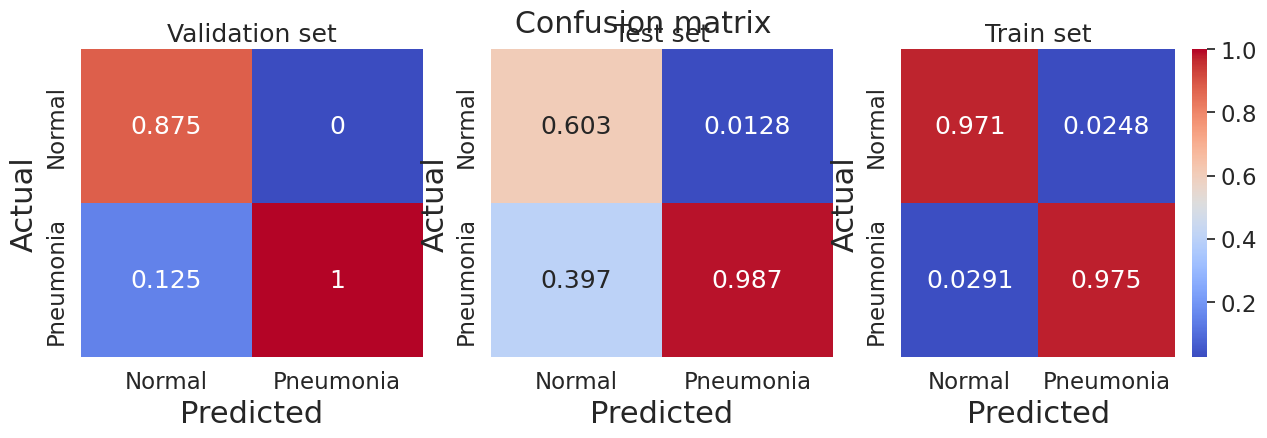

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


def plot_confmatrix(df, ax, title, cbar=False):
    normal_normal = evaluator.evaluate(df, {evaluator.metricName: "truePositiveRateByLabel", evaluator.metricLabel: 1.0}) 
    pneumo_pneumo = evaluator.evaluate(df, {evaluator.metricName: "truePositiveRateByLabel", evaluator.metricLabel: 2.0}) 

    normal_pneumo = evaluator.evaluate(df, {evaluator.metricName: "falsePositiveRateByLabel", evaluator.metricLabel: 1.0}) 
    pneumo_normal = evaluator.evaluate(df, {evaluator.metricName: "falsePositiveRateByLabel", evaluator.metricLabel: 2.0}) 

    conf_matrix = [[normal_normal, normal_pneumo],
                   [pneumo_normal, pneumo_pneumo]]

    xrays = ['Normal', 'Pneumonia']
    conf_matrix_df = pd.DataFrame(conf_matrix,columns=xrays,index=xrays)
    sns.set(font_scale=1.5)

    sns.heatmap(conf_matrix_df,
                cmap='coolwarm',
                annot=True,
                fmt='.3g',
                vmax=1,
                cbar=cbar,
                ax=ax)

    ax.set_title(title)
    ax.set_xlabel('Predicted',fontsize=22)
    ax.set_ylabel('Actual',fontsize=22)

#plt.figure(figsize=(10, 10))

print('Confusion matrix by x-rays set')
print('==============================\n')
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Confusion matrix')

plot_confmatrix(predictionValDF, axs[0], 'Validation set')
plot_confmatrix(predictionTestDF, axs[1], 'Test set')
plot_confmatrix(predictionTrainDF, axs[2], 'Train set', True)


It is observed that for the true positive and negative values there is a high number of cases, while for the false positive and false negative values, the number of cases is lower. This is a good sign, since it indicates that the model is able to predict a true value with high probability.

# BIBLIOGRAPHY
- What Is Pneumonia? (2022) National Heart, Lung, and Blood Home. https://www.nhlbi.nih.gov/health/pneumonia
- Pneumonia (2021) RadiologyInfo. https://www.radiologyinfo.org/en/info/pneumonia#:~:text=Chest%20x%2Dray%3A%20An%20x,infiltrates)%20that%20identify%20an%20infection
- Narkhede, S. (2021) Understanding confusion matrix, Medium. Towards Data Science. Available at: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62 (Accessed: December 18, 2022).


# Tutorials BigDL

__Docs__

Root for BigDL documentation

https://github.com/intel-analytics/BigDL/blob/main/docs/docs




__working with images__

Train/Predict with Image DataFrame

https://github.com/intel-analytics/BigDL/blob/main/docs/docs/ProgrammingGuide/workingwithimages.md



__MLlib / nnframes__

NNImageReader, NNClassifier, NNModel ...

https://github.com/intel-analytics/BigDL/blob/main/docs/docs/APIGuide/PipelineAPI/nnframes.md




__Models__

Predicted models

https://sourceforge.net/projects/analytics-zoo/files/analytics-zoo-models/




__Examples__


older ones

https://github.com/intel-analytics/analytics-zoo/blob/master/pyzoo/zoo/examples/nnframes/finetune/image_finetuning_example.py


